In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diamonds.csv')

# Display the first few rows
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# Get information about the dataset
df.info()

# Check for missing values
print(df.isnull().sum())

# Basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


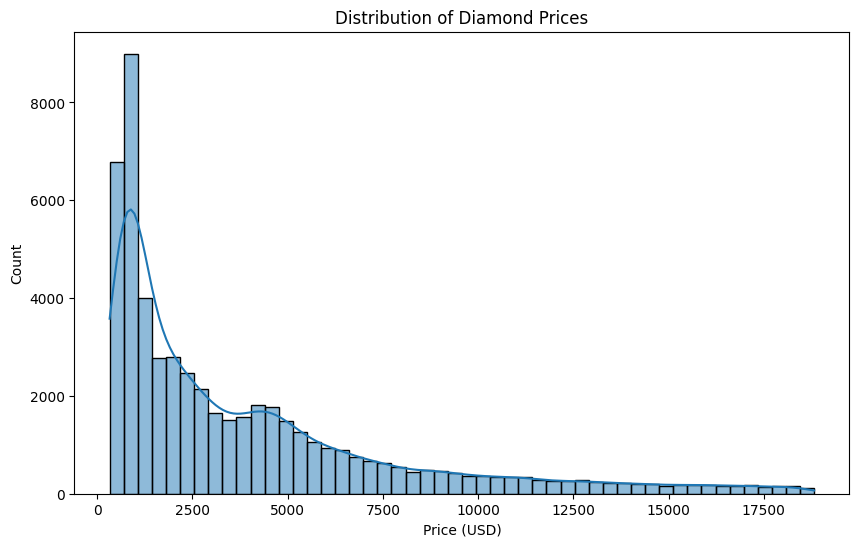

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.show()


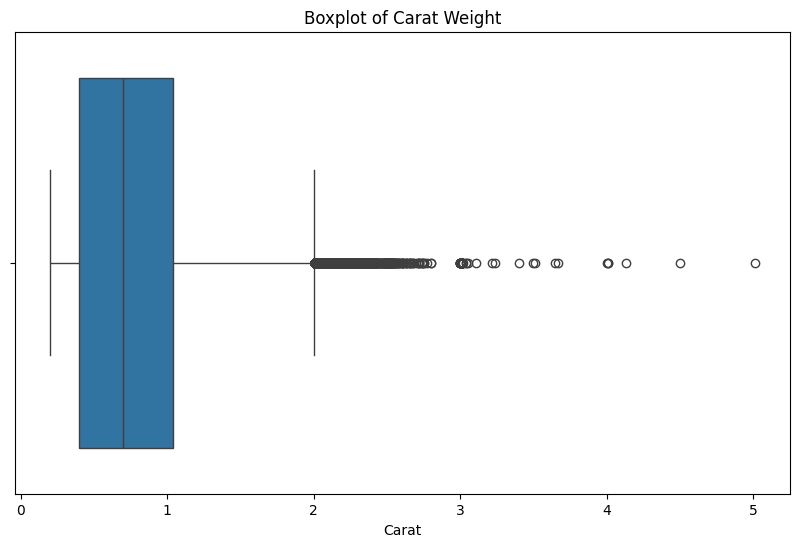

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['carat'])
plt.title('Boxplot of Carat Weight')
plt.xlabel('Carat')
plt.show()


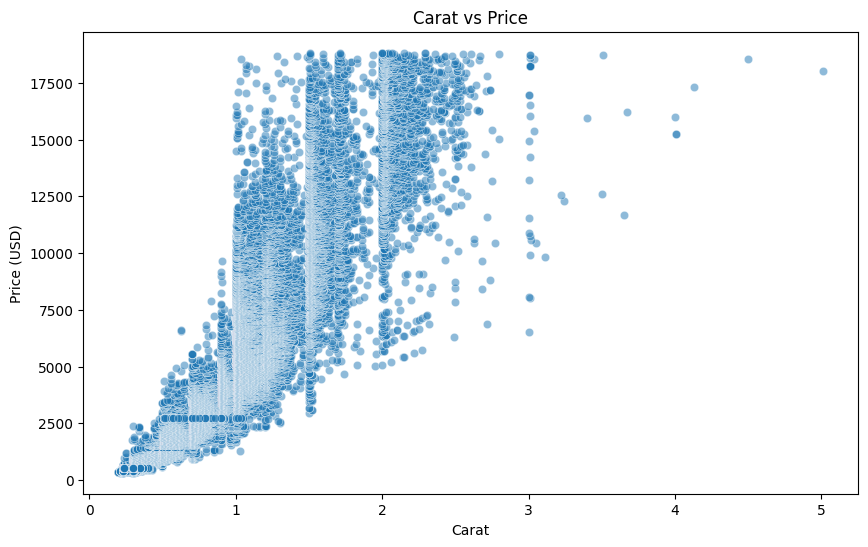

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price (USD)')
plt.show()


/var/folders/0m/lwlns68920dfl6t6t_1h9jf40000gn/T/ipykernel_25388/1209279452.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='cut', y='price', data=df, estimator=np.mean, ci=None)


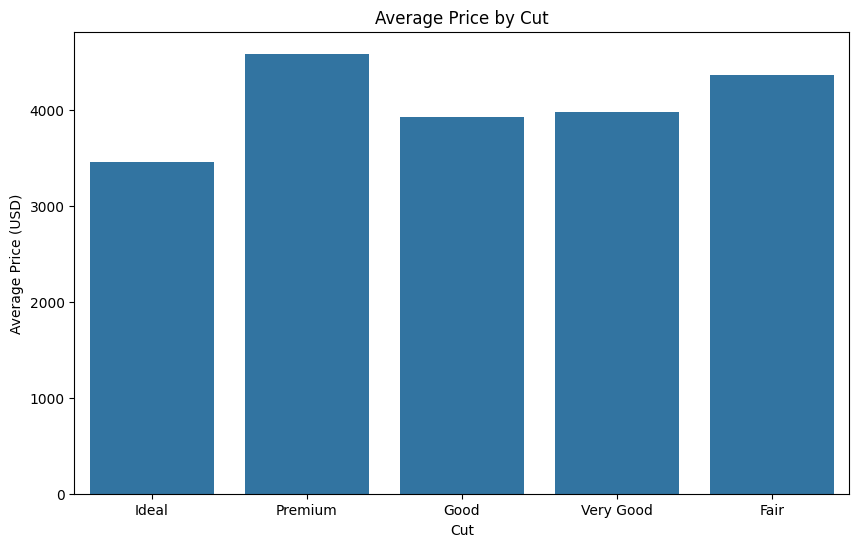

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cut', y='price', data=df, estimator=np.mean, ci=None)
plt.title('Average Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price (USD)')
plt.show()


In [7]:
avg_price_cut_color = df.groupby(['cut', 'color'])['price'].mean().reset_index()
print(avg_price_cut_color)

# Pivot table for visualization
pivot_table = df.pivot_table(values='price', index='cut', columns='color', aggfunc='mean')
pivot_table


          cut color        price
0        Fair     D  4291.061350
1        Fair     E  3682.312500
2        Fair     F  3827.003205
3        Fair     G  4239.254777
4        Fair     H  5135.683168
5        Fair     I  4685.445714
6        Fair     J  4975.655462
7        Good     D  3405.382175
8        Good     E  3423.644159
9        Good     F  3495.750275
10       Good     G  4123.482204
11       Good     H  4276.254986
12       Good     I  5078.532567
13       Good     J  4574.172638
14      Ideal     D  2629.094566
15      Ideal     E  2597.550090
16      Ideal     F  3374.939362
17      Ideal     G  3720.706388
18      Ideal     H  3889.334831
19      Ideal     I  4451.970377
20      Ideal     J  4918.186384
21    Premium     D  3631.292576
22    Premium     E  3538.914420
23    Premium     F  4324.890176
24    Premium     G  4500.742134
25    Premium     H  5216.706780
26    Premium     I  5946.180672
27    Premium     J  6294.591584
28  Very Good     D  3470.467284
29  Very G

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274


In [8]:
high_price_df = df[df['price'] > 10000]
print(high_price_df.head())


       carat        cut color clarity  depth  table  price     x     y     z
21928   1.70      Ideal     J     VS2   60.5   58.0  10002  7.73  7.74  4.68
21929   1.03      Ideal     E    VVS2   60.6   59.0  10003  6.50  6.53  3.95
21930   1.23  Very Good     G    VVS2   60.6   55.0  10004  6.93  7.02  4.23
21931   1.25      Ideal     F     VS2   61.6   55.0  10006  6.93  6.96  4.28
21932   2.01  Very Good     I     SI2   61.4   63.0  10009  8.19  7.96  4.96


In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


TypeError: Could not convert ['IdealPremiumGoodPremiumGoodVery GoodVery GoodVery GoodFairVery GoodGoodIdealPremiumIdealPremiumPremiumIdealGoodGoodVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodGoodVery GoodIdealIdealIdealGoodGoodGoodPremiumVery GoodGoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodGoodIdealPremiumIdealIdealPremiumIdealIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumPremiumPremiumIdealFairIdealVery GoodVery GoodGoodGoodFairVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodFairFairPremiumPremiumVery GoodFairFairIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodIdealPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealGoodIdealPremiumVery GoodIdealIdealGoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealGoodIdealVery GoodPremiumVery GoodGoodGoodIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumVery GoodPremiumPremiumGoodFairPremiumVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodIdealGoodPremiumVery GoodIdealPremiumPremiumFairPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealGoodGoodIdealFairPremiumGoodGoodPremiumPremiumVery GoodIdealIdealIdealGoodPremiumPremiumPremiumFairIdealPremiumIdealPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodVery GoodGoodIdealIdealVery GoodVery GoodPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumGoodVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealIdealIdealFairPremiumFairVery GoodIdealVery GoodIdealIdealVery GoodGoodPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealFairIdealIdealPremiumIdealPremiumGoodGoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealFairPremiumPremiumIdealFairPremiumIdealFairGoodVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodVery GoodFairVery GoodIdealVery GoodVery GoodPremiumPremiumFairVery GoodVery GoodIdealGoodGoodVery GoodVery GoodFairFairVery GoodVery GoodGoodVery GoodPremiumPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodGoodIdealVery GoodGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealFairPremiumIdealPremiumVery GoodGoodPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealFairFairPremiumPremiumFairPremiumVery GoodIdealGoodPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumFairVery GoodIdealGoodGoodIdealIdealPremiumIdealPremiumGoodPremiumPremiumPremiumVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealGoodIdealPremiumPremiumIdealGoodIdealIdealPremiumPremiumIdealVery GoodGoodPremiumIdealFairIdealPremiumIdealGoodIdealPremiumPremiumPremiumVery GoodPremiumPremiumFairPremiumGoodPremiumPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodGoodPremiumIdealIdealIdealPremiumPremiumGoodIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodPremiumPremiumIdealPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodFairIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodPremiumIdealIdealVery GoodFairPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumFairIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealGoodIdealVery GoodVery GoodGoodPremiumIdealVery GoodIdealFairGoodIdealIdealGoodPremiumPremiumPremiumVery GoodIdealPremiumVery GoodIdealFairGoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodPremiumGoodIdealPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumFairFairGoodFairPremiumPremiumVery GoodGoodPremiumFairFairFairIdealIdealIdealIdealFairIdealIdealIdealGoodGoodGoodGoodVery GoodIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealIdealGoodPremiumFairPremiumPremiumGoodVery GoodIdealPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealPremiumGoodFairFairIdealPremiumPremiumIdealPremiumFairPremiumVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumFairPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealVery GoodPremiumPremiumPremiumFairPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealFairIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumVery GoodGoodPremiumIdealIdealGoodVery GoodIdealVery GoodIdealGoodIdealIdealVery GoodVery GoodIdealGoodVery GoodVery GoodIdealIdealFairFairPremiumGoodFairFairPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumFairIdealFairFairFairPremiumPremiumVery GoodIdealIdealGoodGoodVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumIdealIdealIdealFairIdealVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealPremiumFairPremiumIdealGoodFairFairVery GoodPremiumIdealFairFairIdealIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumGoodIdealVery GoodIdealIdealIdealIdealGoodIdealFairVery GoodVery GoodIdealIdealVery GoodIdealGoodVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumIdealIdealGoodPremiumPremiumIdealIdealGoodIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealIdealFairPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodPremiumVery GoodIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumGoodPremiumPremiumPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodPremiumPremiumPremiumGoodPremiumPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealGoodGoodGoodGoodPremiumFairFairFairVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumGoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealFairVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumGoodPremiumPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealVery GoodFairIdealVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealGoodGoodIdealPremiumFairPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumGoodVery GoodVery GoodIdealFairGoodIdealIdealVery GoodGoodVery GoodPremiumFairIdealPremiumFairIdealIdealVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealGoodPremiumIdealIdealPremiumFairPremiumIdealFairVery GoodIdealIdealIdealFairVery GoodIdealPremiumIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumGoodVery GoodIdealPremiumPremiumIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodGoodVery GoodIdealGoodPremiumIdealIdealIdealIdealGoodFairVery GoodVery GoodPremiumIdealFairVery GoodVery GoodGoodIdealIdealIdealIdealGoodIdealVery GoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodGoodFairIdealFairGoodFairPremiumFairFairPremiumFairIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumFairPremiumPremiumIdealIdealPremiumVery GoodGoodPremiumIdealGoodFairVery GoodIdealIdealVery GoodPremiumVery GoodIdealIdealIdealVery GoodGoodIdealIdealGoodFairIdealVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealGoodGoodIdealPremiumIdealGoodIdealFairIdealVery GoodPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodGoodIdealIdealVery GoodIdealFairVery GoodVery GoodVery GoodIdealIdealIdealIdealFairVery GoodVery GoodVery GoodPremiumPremiumPremiumIdealIdealFairVery GoodIdealIdealIdealIdealIdealIdealFairFairVery GoodVery GoodFairPremiumIdealPremiumPremiumPremiumPremiumIdealGoodPremiumVery GoodIdealVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodPremiumGoodGoodIdealPremiumFairIdealFairPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealVery GoodVery GoodFairFairFairIdealIdealIdealIdealIdealIdealIdealIdealFairVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodPremiumGoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealGoodIdealPremiumIdealVery GoodVery GoodPremiumIdealGoodVery GoodGoodVery GoodPremiumIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealGoodGoodPremiumVery GoodGoodPremiumFairPremiumGoodPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealFairFairPremiumGoodVery GoodIdealIdealFairPremiumGoodVery GoodIdealVery GoodIdealIdealIdealGoodVery GoodGoodFairPremiumIdealGoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealVery GoodGoodPremiumGoodPremiumIdealPremiumPremiumVery GoodGoodGoodIdealIdealIdealPremiumVery GoodPremiumGoodVery GoodIdealVery GoodPremiumVery GoodIdealPremiumGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodFairVery GoodPremiumIdealIdealIdealGoodIdealVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodGoodVery GoodFairPremiumPremiumIdealVery GoodVery GoodPremiumIdealGoodVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealIdealGoodIdealGoodVery GoodVery GoodIdealVery GoodFairVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumPremiumFairFairVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealGoodGoodFairGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodVery GoodVery GoodIdealGoodFairPremiumIdealFairPremiumPremiumPremiumVery GoodVery GoodGoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodGoodIdealVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealPremiumPremiumGoodVery GoodFairIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealFairPremiumGoodPremiumPremiumIdealGoodFairVery GoodIdealFairPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealGoodVery GoodPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealGoodGoodVery GoodPremiumPremiumFairFairPremiumIdealPremiumVery GoodFairIdealVery GoodPremiumIdealGoodGoodVery GoodGoodIdealIdealGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodGoodPremiumIdealPremiumIdealIdealGoodVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodFairFairIdealPremiumIdealIdealVery GoodPremiumVery GoodGoodGoodIdealFairPremiumPremiumVery GoodIdealPremiumGoodPremiumIdealGoodVery GoodIdealGoodGoodIdealIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodGoodVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumGoodVery GoodPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealGoodVery GoodGoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealGoodVery GoodIdealIdealGoodIdealVery GoodGoodGoodPremiumGoodGoodGoodIdealFairPremiumIdealVery GoodFairIdealVery GoodIdealIdealPremiumFairFairIdealVery GoodIdealGoodPremiumVery GoodPremiumIdealVery GoodIdealIdealGoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealGoodGoodIdealPremiumVery GoodIdealIdealGoodVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumGoodIdealIdealIdealVery GoodPremiumPremiumFairPremiumIdealPremiumIdealFairFairPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodVery GoodIdealIdealIdealIdealGoodIdealPremiumVery GoodPremiumPremiumIdealFairIdealPremiumFairVery GoodIdealVery GoodGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealFairFairFairFairPremiumIdealGoodPremiumVery GoodIdealVery GoodVery GoodIdealIdealGoodIdealFairIdealGoodGoodIdealGoodGoodFairPremiumVery GoodVery GoodIdealPremiumIdealVery GoodIdealVery GoodGoodIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealFairIdealPremiumIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodVery GoodGoodVery GoodGoodVery GoodIdealVery GoodVery GoodIdealFairIdealPremiumIdealPremiumVery GoodGoodGoodVery GoodIdealGoodGoodGoodIdealIdealIdealFairIdealPremiumVery GoodGoodFairPremiumIdealIdealIdealIdealIdealIdealPremiumFairVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealFairIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealFairFairVery GoodPremiumIdealFairPremiumVery GoodIdealIdealPremiumPremiumPremiumGoodFairFairVery GoodGoodIdealIdealPremiumIdealIdealIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodPremiumGoodPremiumPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealGoodGoodVery GoodVery GoodVery GoodIdealIdealIdealFairFairPremiumVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealIdealIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumFairPremiumVery GoodGoodVery GoodGoodIdealVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumFairIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealGoodGoodPremiumFairPremiumIdealGoodGoodPremiumGoodPremiumVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealGoodIdealVery GoodIdealVery GoodFairPremiumIdealIdealIdealIdealPremiumFairIdealIdealVery GoodIdealIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodPremiumIdealGoodVery GoodPremiumIdealIdealFairPremiumFairFairFairFairFairPremiumPremiumPremiumIdealVery GoodIdealIdealIdealGoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumGoodPremiumGoodFairVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumGoodIdealFairPremiumPremiumIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodGoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumPremiumVery GoodGoodPremiumVery GoodIdealVery GoodPremiumGoodFairIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumGoodPremiumIdealPremiumGoodIdealVery GoodVery GoodIdealVery GoodGoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumVery GoodVery GoodIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealGoodPremiumGoodGoodVery GoodGoodPremiumFairFairIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealFairVery GoodIdealIdealIdealIdealIdealGoodGoodIdealVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealIdealGoodPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairVery GoodIdealGoodIdealIdealGoodGoodVery GoodVery GoodPremiumGoodFairGoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealGoodGoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodFairIdealGoodVery GoodPremiumVery GoodVery GoodIdealGoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodGoodIdealIdealFairVery GoodGoodFairFairIdealPremiumPremiumPremiumPremiumGoodGoodGoodGoodIdealGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealIdealVery GoodIdealGoodGoodVery GoodGoodIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodFairPremiumIdealIdealIdealGoodGoodIdealVery GoodFairIdealFairVery GoodIdealIdealVery GoodGoodFairPremiumVery GoodFairGoodGoodVery GoodFairPremiumPremiumVery GoodIdealIdealIdealIdealGoodGoodIdealIdealIdealGoodPremiumPremiumFairPremiumGoodVery GoodGoodVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodFairVery GoodVery GoodGoodIdealIdealIdealGoodFairPremiumGoodPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealFairIdealPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumIdealFairVery GoodIdealPremiumIdealPremiumPremiumGoodVery GoodGoodVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumFairVery GoodPremiumIdealIdealVery GoodIdealIdealIdealGoodFairVery GoodPremiumGoodGoodGoodGoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealGoodFairFairVery GoodGoodIdealIdealIdealVery GoodVery GoodGoodIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodPremiumGoodIdealGoodGoodGoodVery GoodGoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumGoodIdealIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumGoodPremiumGoodPremiumGoodIdealPremiumPremiumGoodPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealGoodIdealPremiumVery GoodGoodGoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealFairVery GoodIdealGoodFairGoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealFairPremiumIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealFairGoodIdealFairVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodGoodIdealPremiumIdealIdealIdealIdealPremiumVery GoodFairPremiumVery GoodVery GoodPremiumIdealIdealVery GoodGoodVery GoodGoodGoodGoodIdealGoodIdealIdealIdealIdealVery GoodFairPremiumIdealPremiumIdealVery GoodPremiumGoodIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealGoodFairPremiumGoodGoodPremiumVery GoodVery GoodGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealGoodGoodFairIdealVery GoodGoodIdealIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealIdealGoodIdealGoodPremiumVery GoodVery GoodVery GoodFairIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumGoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealGoodIdealPremiumGoodPremiumIdealPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumGoodVery GoodIdealPremiumIdealVery GoodGoodIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodFairPremiumVery GoodGoodPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumGoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumPremiumIdealGoodIdealPremiumVery GoodIdealGoodVery GoodIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodPremiumIdealPremiumVery GoodVery GoodGoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumPremiumPremiumGoodGoodGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodVery GoodPremiumFairVery GoodIdealIdealIdealIdealIdealFairPremiumIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumFairFairIdealVery GoodPremiumFairIdealVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumIdealGoodVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumPremiumGoodGoodPremiumVery GoodVery GoodPremiumGoodPremiumPremiumVery GoodIdealIdealIdealVery GoodGoodPremiumVery GoodPremiumVery GoodGoodGoodPremiumIdealGoodGoodGoodIdealIdealPremiumGoodPremiumIdealPremiumGoodGoodVery GoodIdealIdealIdealPremiumIdealFairPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodVery GoodPremiumFairGoodPremiumGoodVery GoodPremiumIdealIdealIdealPremiumVery GoodIdealGoodPremiumIdealIdealVery GoodIdealIdealPremiumVery GoodIdealVery GoodGoodGoodPremiumGoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealGoodFairVery GoodVery GoodIdealIdealIdealGoodGoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealGoodGoodFairGoodPremiumPremiumIdealIdealGoodGoodGoodIdealGoodPremiumVery GoodIdealGoodGoodGoodFairVery GoodIdealGoodPremiumGoodIdealIdealGoodIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealGoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealIdealGoodVery GoodVery GoodVery GoodPremiumFairPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodGoodIdealFairFairVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealGoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodPremiumGoodPremiumIdealVery GoodVery GoodVery GoodGoodPremiumGoodIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumGoodIdealVery GoodGoodIdealGoodIdealIdealGoodIdealGoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealGoodGoodPremiumIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealIdealGoodVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodVery GoodIdealVery GoodFairPremiumIdealPremiumPremiumGoodIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealGoodGoodIdealVery GoodIdealVery GoodVery GoodIdealGoodGoodGoodGoodGoodIdealVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealGoodPremiumVery GoodVery GoodIdealIdealIdealGoodIdealPremiumIdealVery GoodVery GoodGoodPremiumFairVery GoodGoodFairPremiumFairVery GoodPremiumPremiumIdealIdealVery GoodVery GoodGoodFairVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealFairVery GoodVery GoodPremiumVery GoodGoodGoodPremiumGoodGoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodPremiumIdealIdealGoodPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealGoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealIdealVery GoodGoodIdealIdealFairIdealPremiumVery GoodIdealIdealIdealIdealPremiumVery GoodIdealPremiumIdealIdealIdealIdealFairIdealGoodGoodPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumIdealVery GoodPremiumVery GoodFairGoodIdealGoodVery GoodVery GoodIdealVery GoodPremiumPremiumFairFairGoodPremiumGoodVery GoodPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodGoodVery GoodPremiumIdealGoodGoodIdealIdealIdealIdealIdealGoodIdealIdealGoodPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodIdealGoodPremiumGoodPremiumIdealPremiumIdealIdealPremiumIdealFairIdealFairVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumGoodIdealPremiumGoodIdealIdealVery GoodIdealIdealGoodIdealIdealVery GoodIdealGoodIdealGoodVery GoodIdealIdealIdealGoodIdealFairVery GoodVery GoodVery GoodGoodVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodIdealGoodGoodFairIdealIdealIdealIdealGoodFairGoodFairPremiumIdealPremiumVery GoodPremiumVery GoodGoodGoodIdealIdealFairVery GoodFairGoodPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumIdealFairPremiumPremiumGoodVery GoodPremiumPremiumFairIdealPremiumIdealIdealIdealGoodVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealGoodPremiumPremiumPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealGoodVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealFairVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodPremiumPremiumIdealVery GoodVery GoodGoodIdealGoodGoodIdealIdealVery GoodIdealIdealPremiumVery GoodPremiumVery GoodGoodGoodIdealPremiumVery GoodFairVery GoodIdealIdealIdealGoodGoodVery GoodPremiumIdealPremiumIdealGoodPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumGoodVery GoodPremiumVery GoodVery GoodIdealGoodIdealPremiumIdealIdealGoodPremiumFairVery GoodPremiumIdealGoodIdealGoodPremiumFairPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumIdealVery GoodIdealIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodFairPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealGoodGoodGoodGoodVery GoodVery GoodFairIdealGoodFairFairFairPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodPremiumGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumGoodPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodPremiumGoodIdealPremiumIdealPremiumVery GoodVery GoodIdealVery GoodIdealPremiumGoodVery GoodIdealIdealVery GoodVery GoodIdealPremiumGoodVery GoodGoodIdealIdealVery GoodIdealIdealIdealPremiumIdealGoodGoodIdealIdealIdealGoodVery GoodVery GoodIdealIdealGoodIdealGoodPremiumVery GoodIdealPremiumVery GoodIdealFairIdealVery GoodGoodIdealVery GoodVery GoodVery GoodFairIdealGoodGoodIdealIdealVery GoodGoodGoodPremiumFairPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodIdealVery GoodGoodGoodPremiumPremiumPremiumPremiumIdealVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealFairVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealGoodVery GoodGoodGoodGoodPremiumIdealIdealIdealIdealFairIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealFairVery GoodVery GoodGoodIdealGoodFairFairGoodVery GoodPremiumFairGoodFairPremiumPremiumPremiumGoodIdealIdealIdealIdealIdealIdealVery GoodGoodPremiumPremiumGoodPremiumVery GoodVery GoodFairPremiumGoodPremiumGoodGoodVery GoodPremiumPremiumGoodVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumGoodGoodPremiumIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodVery GoodIdealPremiumVery GoodPremiumGoodIdealPremiumVery GoodVery GoodIdealVery GoodGoodIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealGoodIdealPremiumFairVery GoodGoodIdealGoodGoodPremiumPremiumVery GoodPremiumPremiumVery GoodIdealIdealVery GoodGoodPremiumVery GoodVery GoodIdealPremiumIdealPremiumIdealVery GoodPremiumGoodVery GoodGoodIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumVery GoodIdealGoodGoodPremiumPremiumGoodPremiumVery GoodGoodGoodGoodGoodVery GoodPremiumPremiumFairIdealIdealPremiumFairPremiumIdealPremiumIdealPremiumVery GoodIdealIdealPremiumFairGoodIdealIdealVery GoodPremiumVery GoodGoodPremiumPremiumIdealVery GoodIdealPremiumIdealIdealFairPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumGoodPremiumFairPremiumVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodGoodIdealPremiumVery GoodPremiumGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealFairPremiumVery GoodVery GoodGoodFairFairGoodGoodPremiumPremiumGoodIdealGoodPremiumIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealFairIdealIdealPremiumIdealGoodGoodVery GoodGoodFairPremiumGoodPremiumPremiumPremiumGoodFairIdealIdealVery GoodIdealFairPremiumPremiumGoodVery GoodVery GoodGoodFairVery GoodPremiumPremiumGoodPremiumIdealIdealGoodIdealPremiumVery GoodVery GoodPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumPremiumGoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealGoodPremiumGoodVery GoodVery GoodIdealGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealIdealGoodPremiumPremiumVery GoodVery GoodVery GoodGoodVery GoodPremiumIdealGoodPremiumVery GoodIdealFairGoodVery GoodPremiumIdealGoodVery GoodIdealVery GoodIdealVery GoodVery GoodGoodFairFairGoodPremiumFairPremiumVery GoodIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumGoodGoodGoodPremiumIdealFairPremiumGoodGoodPremiumGoodVery GoodGoodGoodVery GoodGoodGoodGoodVery GoodVery GoodGoodPremiumFairFairIdealGoodPremiumIdealIdealGoodVery GoodGoodIdealVery GoodIdealIdealIdealVery GoodGoodIdealFairIdealPremiumPremiumGoodPremiumGoodIdealIdealGoodGoodVery GoodPremiumVery GoodPremiumIdealGoodFairFairGoodVery GoodGoodVery GoodIdealPremiumIdealFairPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodIdealPremiumVery GoodPremiumIdealIdealFairPremiumPremiumPremiumPremiumGoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumGoodPremiumPremiumIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumIdealGoodFairPremiumFairPremiumFairVery GoodPremiumPremiumIdealFairVery GoodVery GoodIdealGoodGoodPremiumVery GoodFairPremiumGoodGoodIdealVery GoodVery GoodIdealIdealVery GoodIdealGoodFairIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodFairGoodFairPremiumPremiumGoodIdealIdealPremiumFairVery GoodPremiumFairVery GoodVery GoodFairFairVery GoodIdealPremiumPremiumFairGoodGoodPremiumPremiumVery GoodPremiumGoodGoodVery GoodVery GoodPremiumVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealGoodIdealPremiumPremiumVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumGoodIdealPremiumIdealGoodIdealPremiumVery GoodGoodIdealIdealIdealPremiumGoodGoodVery GoodIdealVery GoodPremiumGoodPremiumPremiumFairPremiumIdealPremiumIdealPremiumPremiumPremiumFairPremiumIdealPremiumGoodPremiumPremiumPremiumVery GoodIdealIdealIdealGoodIdealGoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealFairFairGoodPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealVery GoodIdealVery GoodIdealVery GoodGoodGoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodVery GoodGoodIdealVery GoodIdealVery GoodIdealIdealPremiumVery GoodGoodPremiumGoodPremiumIdealGoodFairIdealFairPremiumVery GoodFairPremiumIdealVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumGoodVery GoodGoodVery GoodFairIdealGoodVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealGoodIdealIdealIdealIdealPremiumPremiumVery GoodFairGoodPremiumIdealFairVery GoodVery GoodPremiumVery GoodFairIdealGoodGoodFairFairPremiumFairVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodPremiumPremiumGoodFairPremiumGoodIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumGoodPremiumIdealGoodGoodVery GoodPremiumPremiumIdealPremiumIdealIdealGoodIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodFairPremiumPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealVery GoodVery GoodFairFairFairVery GoodGoodGoodVery GoodIdealIdealFairFairPremiumVery GoodGoodIdealFairGoodPremiumPremiumPremiumVery GoodGoodGoodIdealVery GoodVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealGoodGoodPremiumGoodVery GoodGoodIdealIdealIdealPremiumPremiumGoodIdealPremiumPremiumVery GoodFairPremiumPremiumVery GoodGoodVery GoodIdealIdealGoodGoodVery GoodPremiumIdealPremiumVery GoodGoodGoodGoodIdealGoodVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumIdealIdealGoodFairVery GoodIdealIdealFairPremiumPremiumIdealPremiumPremiumGoodIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumGoodIdealIdealPremiumIdealGoodPremiumPremiumGoodGoodIdealGoodPremiumFairPremiumPremiumIdealVery GoodFairFairVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodFairPremiumIdealPremiumGoodGoodIdealIdealVery GoodFairFairPremiumPremiumPremiumVery GoodPremiumGoodIdealIdealGoodFairPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumGoodVery GoodFairPremiumVery GoodFairPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodGoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodGoodGoodIdealIdealIdealFairGoodPremiumPremiumVery GoodVery GoodPremiumGoodIdealGoodIdealVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodIdealVery GoodGoodGoodIdealIdealIdealIdealVery GoodVery GoodGoodGoodVery GoodPremiumIdealFairVery GoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodIdealIdealPremiumGoodFairPremiumVery GoodPremiumPremiumPremiumPremiumPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealGoodGoodVery GoodFairPremiumGoodFairVery GoodGoodIdealGoodIdealVery GoodGoodVery GoodPremiumVery GoodGoodGoodGoodPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumGoodVery GoodPremiumGoodVery GoodVery GoodGoodPremiumPremiumPremiumIdealIdealGoodPremiumFairIdealVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumGoodVery GoodVery GoodGoodPremiumIdealPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodIdealGoodVery GoodPremiumIdealVery GoodVery GoodIdealGoodGoodVery GoodVery GoodPremiumVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumFairGoodGoodPremiumVery GoodPremiumGoodGoodVery GoodIdealPremiumPremiumVery GoodVery GoodGoodPremiumPremiumPremiumVery GoodFairGoodVery GoodPremiumPremiumVery GoodGoodGoodGoodPremiumVery GoodPremiumFairPremiumGoodIdealGoodPremiumIdealIdealVery GoodPremiumIdealGoodFairVery GoodPremiumIdealVery GoodVery GoodGoodGoodIdealPremiumIdealGoodVery GoodIdealVery GoodVery GoodIdealPremiumGoodIdealIdealFairPremiumGoodIdealFairIdealPremiumIdealPremiumIdealGoodPremiumIdealPremiumVery GoodIdealGoodIdealIdealIdealVery GoodVery GoodPremiumIdealGoodIdealPremiumIdealPremiumVery GoodGoodGoodGoodIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumPremiumFairIdealVery GoodVery GoodVery GoodIdealGoodPremiumIdealGoodGoodVery GoodIdealVery GoodPremiumIdealGoodGoodPremiumIdealGoodGoodVery GoodVery GoodGoodVery GoodVery GoodGoodGoodVery GoodGoodIdealVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumGoodPremiumFairPremiumVery GoodVery GoodGoodVery GoodPremiumIdealIdealVery GoodVery GoodIdealGoodIdealIdealVery GoodPremiumPremiumVery GoodIdealPremiumPremiumGoodPremiumPremiumGoodVery GoodGoodVery GoodPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodFairVery GoodPremiumGoodGoodFairVery GoodVery GoodGoodFairVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumFairPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodGoodPremiumPremiumIdealIdealGoodFairGoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealGoodFairPremiumPremiumPremiumPremiumGoodGoodVery GoodVery GoodGoodGoodPremiumIdealPremiumIdealGoodVery GoodIdealIdealGoodFairVery GoodPremiumIdealIdealVery GoodVery GoodPremiumFairPremiumPremiumIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodVery GoodPremiumPremiumIdealIdealPremiumGoodVery GoodVery GoodGoodVery GoodPremiumPremiumGoodIdealIdealIdealIdealIdealGoodFairIdealIdealVery GoodVery GoodVery GoodFairGoodGoodFairIdealPremiumPremiumVery GoodFairPremiumVery GoodGoodVery GoodIdealPremiumVery GoodGoodGoodVery GoodPremiumPremiumVery GoodIdealGoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumGoodPremiumPremiumVery GoodPremiumGoodPremiumIdealIdealVery GoodIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodFairGoodPremiumPremiumVery GoodGoodIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealGoodVery GoodIdealVery GoodGoodPremiumPremiumVery GoodPremiumIdealIdealIdealIdealGoodGoodPremiumVery GoodIdealIdealGoodVery GoodIdealPremiumVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealGoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumPremiumPremiumGoodIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealGoodPremiumPremiumPremiumPremiumPremiumGoodPremiumVery GoodIdealIdealVery GoodGoodPremiumPremiumPremiumGoodIdealPremiumIdealGoodPremiumVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumVery GoodIdealFairFairVery GoodPremiumPremiumGoodPremiumGoodPremiumVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealFairPremiumVery GoodPremiumIdealIdealVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumGoodIdealVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumFairIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumPremiumFairVery GoodVery GoodVery GoodIdealIdealGoodPremiumIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumFairPremiumIdealIdealFairFairPremiumVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodPremiumIdealGoodFairPremiumIdealVery GoodIdealGoodVery GoodPremiumGoodPremiumPremiumPremiumVery GoodGoodPremiumIdealIdealIdealGoodFairGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodPremiumFairPremiumVery GoodFairVery GoodFairVery GoodIdealIdealPremiumVery GoodGoodVery GoodVery GoodGoodPremiumGoodPremiumVery GoodIdealPremiumPremiumPremiumVery GoodFairPremiumVery GoodVery GoodGoodVery GoodVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumGoodIdealGoodVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealGoodPremiumPremiumPremiumVery GoodPremiumIdealGoodPremiumGoodFairVery GoodPremiumGoodPremiumPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealPremiumGoodGoodIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumPremiumFairGoodVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumGoodIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodGoodGoodVery GoodPremiumVery GoodGoodVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealGoodVery GoodGoodIdealGoodGoodIdealVery GoodPremiumIdealPremiumVery GoodVery GoodPremiumIdealGoodPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodGoodVery GoodGoodIdealPremiumIdealIdealPremiumVery GoodGoodIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealVery GoodIdealVery GoodFairIdealVery GoodIdealIdealIdealIdealGoodIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealGoodIdealGoodGoodIdealGoodVery GoodPremiumVery GoodPremiumIdealIdealPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealFairPremiumIdealVery GoodGoodVery GoodGoodVery GoodPremiumIdealGoodFairPremiumPremiumIdealPremiumIdealVery GoodVery GoodPremiumIdealPremiumGoodPremiumFairVery GoodVery GoodFairFairIdealVery GoodIdealGoodIdealVery GoodIdealVery GoodPremiumGoodVery GoodVery GoodGoodIdealFairPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealGoodPremiumFairVery GoodGoodGoodVery GoodIdealGoodPremiumPremiumPremiumIdealPremiumGoodVery GoodIdealIdealPremiumFairVery GoodFairFairGoodPremiumIdealPremiumPremiumGoodVery GoodVery GoodIdealGoodVery GoodPremiumIdealPremiumGoodPremiumVery GoodGoodVery GoodGoodVery GoodPremiumPremiumVery GoodPremiumFairPremiumVery GoodIdealGoodPremiumIdealGoodVery GoodIdealVery GoodVery GoodIdealGoodFairVery GoodVery GoodIdealIdealPremiumIdealIdealIdealFairIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealVery GoodGoodFairPremiumVery GoodIdealIdealGoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodIdealGoodIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealGoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumVery GoodPremiumGoodPremiumIdealVery GoodGoodGoodVery GoodFairIdealIdealPremiumPremiumPremiumFairGoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumFairPremiumIdealFairFairIdealGoodVery GoodGoodGoodIdealPremiumGoodGoodFairPremiumIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealVery GoodPremiumPremiumPremiumGoodVery GoodPremiumVery GoodPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumGoodIdealPremiumPremiumPremiumGoodGoodPremiumPremiumPremiumPremiumGoodVery GoodIdealIdealIdealPremiumPremiumVery GoodGoodGoodGoodVery GoodIdealPremiumPremiumFairGoodPremiumPremiumPremiumIdealIdealGoodPremiumPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodGoodPremiumIdealVery GoodFairIdealIdealPremiumIdealIdealVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodIdealVery GoodGoodIdealPremiumPremiumVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealGoodVery GoodVery GoodVery GoodGoodGoodPremiumVery GoodPremiumPremiumGoodVery GoodFairGoodIdealIdealPremiumGoodIdealIdealVery GoodFairGoodPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodPremiumIdealGoodGoodIdealIdealVery GoodPremiumPremiumVery GoodVery GoodIdealGoodVery GoodVery GoodPremiumIdealIdealIdealVery GoodIdealFairVery GoodPremiumGoodPremiumPremiumVery GoodGoodGoodIdealGoodPremiumIdealIdealPremiumVery GoodVery GoodGoodIdealIdealGoodFairVery GoodIdealIdealGoodPremiumPremiumPremiumIdealIdealVery GoodGoodPremiumFairGoodIdealGoodPremiumVery GoodGoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodVery GoodGoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealGoodPremiumVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodIdealGoodGoodPremiumVery GoodFairPremiumIdealPremiumPremiumPremiumVery GoodGoodIdealVery GoodVery GoodGoodGoodIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealFairGoodPremiumPremiumVery GoodGoodVery GoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumPremiumPremiumGoodPremiumGoodGoodIdealGoodPremiumIdealPremiumGoodVery GoodIdealIdealIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumVery GoodVery GoodPremiumGoodIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealGoodVery GoodVery GoodPremiumGoodGoodPremiumGoodGoodPremiumPremiumVery GoodIdealGoodFairVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodIdealVery GoodIdealVery GoodGoodPremiumIdealPremiumPremiumPremiumIdealGoodVery GoodVery GoodVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodPremiumVery GoodGoodGoodPremiumVery GoodIdealIdealPremiumVery GoodIdealGoodFairVery GoodVery GoodPremiumIdealPremiumIdealVery GoodGoodGoodGoodGoodGoodVery GoodVery GoodVery GoodIdealFairGoodGoodIdealIdealIdealFairPremiumIdealPremiumVery GoodGoodPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodPremiumIdealIdealGoodPremiumFairIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodIdealGoodPremiumPremiumFairPremiumIdealIdealGoodPremiumIdealVery GoodGoodPremiumVery GoodIdealGoodVery GoodIdealPremiumGoodPremiumGoodVery GoodPremiumGoodGoodPremiumVery GoodPremiumPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumGoodPremiumIdealPremiumPremiumGoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumPremiumVery GoodVery GoodGoodVery GoodGoodVery GoodIdealIdealIdealGoodPremiumGoodGoodVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumGoodPremiumVery GoodIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodGoodIdealPremiumGoodVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodPremiumVery GoodGoodPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealFairPremiumIdealVery GoodVery GoodIdealGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodGoodIdealVery GoodPremiumFairPremiumGoodGoodFairFairIdealFairPremiumGoodIdealGoodGoodPremiumVery GoodGoodGoodIdealPremiumIdealGoodVery GoodIdealPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodGoodGoodVery GoodVery GoodGoodIdealIdealIdealVery GoodVery GoodVery GoodFairIdealPremiumVery GoodFairGoodPremiumGoodIdealPremiumVery GoodIdealIdealVery GoodPremiumVery GoodGoodGoodPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodIdealIdealPremiumGoodPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodGoodPremiumFairPremiumVery GoodGoodGoodPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealGoodGoodGoodFairFairFairIdealPremiumFairFairIdealPremiumPremiumGoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumFairVery GoodIdealIdealPremiumPremiumPremiumPremiumPremiumGoodVery GoodIdealIdealIdealIdealVery GoodIdealFairFairVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealPremiumPremiumGoodGoodGoodPremiumVery GoodVery GoodPremiumFairIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealGoodVery GoodVery GoodPremiumVery GoodGoodVery GoodVery GoodVery GoodPremiumIdealIdealGoodIdealIdealVery GoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodIdealVery GoodGoodVery GoodFairVery GoodFairVery GoodPremiumPremiumVery GoodGoodIdealVery GoodPremiumGoodVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealGoodIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumGoodVery GoodVery GoodIdealVery GoodVery GoodGoodFairVery GoodPremiumPremiumVery GoodGoodGoodGoodVery GoodVery GoodGoodPremiumGoodPremiumIdealVery GoodFairIdealVery GoodPremiumVery GoodVery GoodVery GoodFairVery GoodVery GoodVery GoodGoodVery GoodGoodPremiumFairFairPremiumFairFairGoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealFairVery GoodPremiumIdealGoodPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealPremiumVery GoodIdealPremiumGoodPremiumFairVery GoodPremiumVery GoodVery GoodVery GoodPremiumGoodPremiumGoodVery GoodPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodPremiumGoodIdealVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodGoodGoodPremiumPremiumPremiumVery GoodPremiumGoodVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodVery GoodFairPremiumPremiumFairPremiumFairIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodIdealPremiumGoodPremiumIdealIdealGoodIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealGoodGoodIdealIdealGoodVery GoodIdealPremiumVery GoodGoodPremiumGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodGoodGoodVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealIdealGoodPremiumVery GoodGoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodPremiumGoodPremiumPremiumPremiumFairPremiumIdealIdealGoodPremiumPremiumVery GoodGoodIdealGoodPremiumVery GoodIdealIdealPremiumGoodVery GoodIdealVery GoodPremiumVery GoodPremiumIdealIdealGoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealFairFairIdealPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumFairPremiumPremiumFairIdealFairFairVery GoodVery GoodIdealIdealGoodVery GoodGoodGoodPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumGoodVery GoodIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodPremiumFairIdealGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodGoodPremiumVery GoodVery GoodVery GoodGoodVery GoodVery GoodGoodPremiumFairPremiumPremiumPremiumVery GoodGoodIdealGoodIdealVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumPremiumIdealPremiumGoodVery GoodGoodPremiumGoodGoodVery GoodIdealIdealIdealVery GoodPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumIdealVery GoodGoodPremiumPremiumGoodVery GoodIdealGoodPremiumPremiumVery GoodIdealIdealGoodFairVery GoodGoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodFairIdealPremiumPremiumIdealFairIdealVery GoodPremiumGoodGoodVery GoodGoodPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodGoodIdealIdealPremiumVery GoodGoodVery GoodIdealVery GoodIdealIdealPremiumIdealIdealGoodGoodPremiumVery GoodVery GoodVery GoodVery GoodFairIdealGoodVery GoodGoodPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealPremiumGoodIdealIdealIdealIdealFairIdealGoodVery GoodVery GoodVery GoodPremiumVery GoodPremiumVery GoodIdealIdealGoodGoodIdealIdealIdealGoodPremiumVery GoodGoodPremiumVery GoodPremiumIdealIdealGoodPremiumGoodPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealGoodIdealVery GoodPremiumGoodVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodGoodPremiumPremiumIdealPremiumPremiumPremiumIdealGoodVery GoodVery GoodGoodIdealIdealFairVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealGoodPremiumIdealIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealPremiumGoodFairPremiumFairPremiumIdealVery GoodIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumGoodVery GoodVery GoodPremiumIdealPremiumGoodGoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodGoodPremiumVery GoodVery GoodVery GoodGoodIdealIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumGoodVery GoodVery GoodFairFairPremiumVery GoodPremiumGoodVery GoodVery GoodPremiumGoodPremiumVery GoodVery GoodPremiumIdealIdealFairPremiumVery GoodPremiumGoodIdealPremiumVery GoodFairPremiumGoodGoodVery GoodIdealPremiumPremiumVery GoodVery GoodIdealGoodGoodVery GoodPremiumIdealVery GoodGoodPremiumPremiumVery GoodGoodPremiumPremiumGoodPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumGoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumGoodIdealIdealGoodIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealFairFairIdealGoodVery GoodGoodPremiumGoodIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealGoodPremiumGoodGoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairGoodPremiumGoodVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumIdealPremiumIdealFairFairPremiumVery GoodVery GoodGoodVery GoodGoodPremiumPremiumGoodVery GoodVery GoodIdealIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodGoodGoodVery GoodIdealIdealPremiumPremiumVery GoodGoodGoodPremiumPremiumGoodIdealIdealGoodVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealGoodVery GoodPremiumIdealIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumVery GoodFairGoodVery GoodPremiumVery GoodVery GoodGoodPremiumPremiumIdealGoodVery GoodGoodVery GoodIdealVery GoodPremiumGoodPremiumVery GoodPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumGoodPremiumPremiumPremiumVery GoodPremiumGoodGoodIdealGoodIdealVery GoodPremiumIdealPremiumGoodFairGoodPremiumFairGoodFairVery GoodFairPremiumPremiumVery GoodIdealPremiumVery GoodPremiumPremiumIdealFairPremiumVery GoodPremiumIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealIdealVery GoodPremiumIdealGoodVery GoodIdealIdealPremiumPremiumVery GoodVery GoodGoodVery GoodIdealIdealGoodPremiumPremiumIdealGoodPremiumPremiumPremiumPremiumIdealGoodPremiumIdealIdealIdealIdealVery GoodGoodGoodPremiumIdealPremiumIdealPremiumVery GoodFairPremiumGoodPremiumVery GoodGoodGoodVery GoodIdealIdealPremiumPremiumGoodIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumPremiumGoodIdealPremiumVery GoodGoodIdealGoodVery GoodPremiumPremiumGoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodGoodGoodIdealVery GoodVery GoodIdealGoodPremiumGoodVery GoodPremiumIdealIdealGoodVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumGoodPremiumPremiumVery GoodIdealIdealGoodVery GoodGoodIdealIdealPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodGoodVery GoodGoodPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodPremiumFairIdealGoodFairGoodGoodVery GoodIdealPremiumPremiumIdealVery GoodPremiumIdealGoodVery GoodVery GoodIdealGoodVery GoodIdealPremiumPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumPremiumVery GoodIdealPremiumFairVery GoodPremiumPremiumVery GoodVery GoodGoodGoodGoodPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodFairGoodIdealGoodVery GoodPremiumPremiumIdealPremiumFairIdealIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodFairIdealPremiumGoodPremiumVery GoodVery GoodIdealIdealVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealPremiumPremiumPremiumVery GoodGoodVery GoodGoodVery GoodGoodGoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealGoodIdealIdealPremiumPremiumGoodPremiumIdealGoodVery GoodIdealFairGoodIdealFairVery GoodVery GoodGoodPremiumPremiumIdealFairFairPremiumVery GoodIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealGoodPremiumPremiumPremiumPremiumGoodVery GoodIdealGoodVery GoodPremiumVery GoodGoodPremiumGoodIdealGoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodIdealGoodPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodFairPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealGoodIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealFairVery GoodIdealGoodGoodPremiumIdealIdealGoodGoodPremiumVery GoodVery GoodFairPremiumPremiumPremiumPremiumPremiumIdealGoodGoodVery GoodPremiumVery GoodGoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodGoodVery GoodGoodVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumVery GoodGoodIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodGoodIdealVery GoodPremiumIdealIdealGoodGoodGoodIdealVery GoodVery GoodPremiumPremiumIdealIdealPremiumPremiumVery GoodIdealIdealPremiumGoodIdealVery GoodIdealGoodGoodGoodIdealGoodPremiumPremiumGoodGoodFairIdealPremiumVery GoodPremiumPremiumIdealPremiumGoodPremiumVery GoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodGoodGoodVery GoodVery GoodPremiumGoodVery GoodGoodVery GoodGoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealIdealPremiumGoodPremiumGoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodIdealGoodPremiumIdealPremiumVery GoodVery GoodGoodPremiumPremiumVery GoodVery GoodIdealFairGoodVery GoodPremiumIdealGoodIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumGoodIdealIdealIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodGoodGoodVery GoodVery GoodGoodPremiumIdealGoodGoodVery GoodIdealGoodPremiumGoodGoodIdealIdealPremiumFairPremiumIdealPremiumPremiumVery GoodGoodIdealPremiumPremiumIdealIdealIdealVery GoodPremiumGoodPremiumVery GoodVery GoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodGoodVery GoodGoodVery GoodIdealPremiumIdealPremiumGoodGoodGoodVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealIdealGoodPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumFairPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealFairIdealIdealPremiumIdealVery GoodPremiumGoodGoodVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodVery GoodGoodIdealVery GoodFairPremiumIdealVery GoodPremiumGoodVery GoodPremiumVery GoodVery GoodGoodPremiumPremiumPremiumVery GoodFairPremiumIdealPremiumIdealPremiumPremiumVery GoodGoodPremiumVery GoodPremiumVery GoodVery GoodIdealGoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumGoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealGoodIdealFairPremiumPremiumFairFairIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealGoodVery GoodPremiumPremiumIdealGoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodPremiumPremiumPremiumPremiumGoodVery GoodIdealPremiumVery GoodGoodFairPremiumVery GoodPremiumPremiumVery GoodFairIdealIdealGoodVery GoodPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodFairVery GoodVery GoodIdealVery GoodIdealPremiumPremiumVery GoodIdealGoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodGoodVery GoodVery GoodIdealIdealVery GoodGoodPremiumPremiumPremiumPremiumVery GoodIdealIdealGoodPremiumPremiumGoodPremiumVery GoodPremiumVery GoodGoodPremiumPremiumGoodPremiumPremiumIdealPremiumPremiumGoodPremiumPremiumVery GoodIdealGoodPremiumIdealIdealIdealPremiumVery GoodIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodIdealVery GoodPremiumVery GoodGoodGoodIdealIdealVery GoodGoodPremiumVery GoodIdealIdealIdealVery GoodIdealGoodFairGoodVery GoodIdealVery GoodVery GoodVery GoodPremiumGoodPremiumGoodIdealVery GoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealGoodGoodPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodFairVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumGoodIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealGoodIdealIdealPremiumIdealFairIdealIdealVery GoodVery GoodGoodIdealFairPremiumPremiumIdealPremiumPremiumGoodPremiumVery GoodVery GoodIdealPremiumVery GoodGoodGoodPremiumVery GoodIdealPremiumVery GoodVery GoodGoodPremiumVery GoodFairFairFairVery GoodIdealIdealPremiumPremiumVery GoodFairPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumFairFairVery GoodGoodFairIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumGoodVery GoodVery GoodGoodIdealFairGoodIdealIdealVery GoodPremiumIdealVery GoodGoodPremiumGoodVery GoodVery GoodIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumGoodPremiumIdealGoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodVery GoodVery GoodIdealIdealGoodVery GoodGoodGoodVery GoodGoodIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumPremiumVery GoodFairPremiumGoodPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodGoodPremiumVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealPremiumVery GoodIdealVery GoodGoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumGoodIdealVery GoodFairPremiumIdealPremiumPremiumVery GoodVery GoodGoodGoodVery GoodPremiumVery GoodIdealGoodPremiumFairPremiumGoodIdealGoodPremiumFairVery GoodPremiumPremiumFairIdealIdealIdealPremiumPremiumPremiumPremiumPremiumGoodIdealVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodGoodPremiumPremiumPremiumVery GoodPremiumPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealGoodPremiumIdealPremiumIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealGoodPremiumPremiumPremiumIdealIdealGoodVery GoodIdealPremiumPremiumIdealVery GoodVery GoodFairIdealPremiumPremiumPremiumPremiumPremiumVery GoodGoodIdealGoodGoodVery GoodPremiumIdealIdealIdealPremiumPremiumIdealFairFairPremiumPremiumGoodIdealPremiumIdealPremiumFairPremiumIdealIdealFairGoodVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumIdealVery GoodPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumGoodPremiumVery GoodFairPremiumVery GoodGoodVery GoodVery GoodIdealVery GoodVery GoodIdealGoodPremiumPremiumVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodPremiumIdealIdealIdealFairVery GoodVery GoodGoodVery GoodGoodVery GoodVery GoodGoodIdealIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealPremiumIdealGoodPremiumGoodIdealFairPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealGoodIdealFairGoodVery GoodVery GoodVery GoodIdealIdealFairIdealPremiumPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumGoodPremiumGoodIdealPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealGoodIdealIdealGoodIdealIdealIdealGoodIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodGoodPremiumIdealPremiumPremiumGoodIdealVery GoodPremiumGoodPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodPremiumFairGoodVery GoodVery GoodVery GoodVery GoodPremiumFairFairFairIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumGoodVery GoodIdealFairVery GoodIdealIdealPremiumVery GoodIdealFairFairIdealPremiumIdealFairIdealIdealVery GoodIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumGoodGoodIdealPremiumPremiumPremiumGoodPremiumPremiumPremiumVery GoodPremiumGoodPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumIdealGoodIdealPremiumPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumIdealGoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodIdealGoodVery GoodVery GoodVery GoodVery GoodGoodIdealVery GoodGoodGoodIdealFairIdealIdealVery GoodVery GoodVery GoodGoodPremiumPremiumVery GoodIdealVery GoodPremiumGoodGoodIdealPremiumIdealIdealIdealPremiumFairPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealIdealGoodPremiumIdealPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodGoodPremiumIdealPremiumPremiumIdealIdealIdealFairGoodIdealPremiumVery GoodPremiumIdealPremiumFairPremiumPremiumIdealPremiumGoodPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumGoodIdealVery GoodVery GoodGoodGoodFairFairPremiumIdealGoodFairIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodIdealFairFairPremiumPremiumIdealPremiumIdealGoodVery GoodIdealIdealIdealPremiumIdealGoodPremiumIdealPremiumGoodPremiumIdealPremiumVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodPremiumVery GoodGoodIdealIdealVery GoodVery GoodIdealVery GoodVery GoodGoodPremiumGoodPremiumGoodFairIdealPremiumPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealIdealPremiumIdealGoodIdealIdealFairIdealFairVery GoodVery GoodGoodVery GoodIdealPremiumGoodIdealPremiumGoodIdealPremiumIdealPremiumVery GoodPremiumGoodPremiumIdealVery GoodVery GoodIdealPremiumFairPremiumGoodIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodVery GoodIdealGoodIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealIdealVery GoodPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumPremiumPremiumFairPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumIdealIdealGoodPremiumVery GoodGoodGoodVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealGoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealGoodFairFairVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodFairPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodGoodFairVery GoodVery GoodGoodGoodVery GoodGoodGoodGoodPremiumPremiumIdealIdealIdealVery GoodIdealGoodPremiumIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodFairPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumGoodPremiumGoodIdealPremiumIdealPremiumIdealVery GoodGoodGoodVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodPremiumGoodPremiumGoodIdealPremiumPremiumFairVery GoodVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealGoodGoodFairPremiumIdealFairPremiumIdealVery GoodIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumGoodPremiumVery GoodIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodGoodPremiumGoodPremiumVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealFairIdealFairIdealIdealIdealGoodGoodIdealIdealIdealFairPremiumPremiumVery GoodPremiumIdealIdealIdealGoodVery GoodVery GoodIdealIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodFairGoodGoodPremiumIdealIdealGoodIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodFairFairPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumGoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumGoodGoodVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodVery GoodGoodIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumGoodPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodPremiumPremiumVery GoodGoodIdealVery GoodVery GoodGoodVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumPremiumGoodIdealFairPremiumPremiumGoodVery GoodGoodIdealIdealIdealPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealPremiumFairVery GoodPremiumIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealPremiumFairPremiumIdealIdealVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumGoodVery GoodPremiumPremiumIdealGoodGoodGoodPremiumVery GoodGoodPremiumGoodGoodPremiumGoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealVery GoodPremiumPremiumGoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodIdealIdealGoodVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodGoodVery GoodGoodIdealPremiumPremiumVery GoodIdealPremiumIdealIdealVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealFairIdealIdealGoodVery GoodPremiumIdealIdealIdealGoodGoodVery GoodVery GoodPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodGoodGoodIdealGoodIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumPremiumGoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodPremiumVery GoodGoodIdealGoodIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealGoodGoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumFairIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealFairPremiumGoodGoodVery GoodVery GoodGoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodFairVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodGoodPremiumIdealFairIdealVery GoodPremiumFairVery GoodFairPremiumVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumGoodVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealGoodIdealVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumGoodPremiumGoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealGoodGoodIdealVery GoodVery GoodIdealGoodVery GoodPremiumGoodGoodGoodVery GoodVery GoodVery GoodGoodIdealGoodIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumGoodGoodVery GoodPremiumIdealPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumGoodIdealIdealFairIdealPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealGoodPremiumIdealIdealIdealVery GoodIdealGoodGoodIdealIdealIdealPremiumVery GoodGoodIdealPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealFairIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealPremiumVery GoodVery GoodPremiumFairIdealPremiumPremiumPremiumIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumIdealPremiumVery GoodFairIdealPremiumVery GoodGoodFairVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumIdealPremiumPremiumIdealPremiumFairVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealGoodIdealIdealIdealGoodPremiumIdealGoodIdealFairPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumGoodIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealPremiumIdealFairVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealVery GoodGoodIdealIdealGoodVery GoodVery GoodIdealPremiumIdealVery GoodIdealPremiumVery GoodGoodVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumIdealPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealFairPremiumVery GoodPremiumPremiumPremiumIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodPremiumFairGoodGoodGoodVery GoodGoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumIdealFairPremiumPremiumVery GoodIdealPremiumPremiumVery GoodGoodPremiumIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealFairVery GoodIdealIdealGoodIdealIdealVery GoodIdealGoodGoodGoodPremiumPremiumPremiumPremiumFairGoodVery GoodVery GoodPremiumIdealIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealGoodIdealPremiumIdealPremiumIdealVery GoodVery GoodPremiumVery GoodGoodGoodIdealGoodPremiumGoodVery GoodIdealIdealGoodIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealFairPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealGoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumPremiumPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealIdealFairPremiumPremiumIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealIdealGoodGoodPremiumPremiumPremiumIdealPremiumIdealGoodVery GoodPremiumIdealPremiumIdealPremiumIdealFairVery GoodPremiumPremiumIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumGoodPremiumPremiumIdealPremiumPremiumIdealFairVery GoodVery GoodPremiumFairVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodIdealVery GoodPremiumPremiumPremiumIdealIdealPremiumPremiumIdealGoodPremiumPremiumVery GoodVery GoodGoodGoodFairPremiumVery GoodGoodPremiumIdealIdealIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumGoodGoodFairPremiumGoodPremiumVery GoodPremiumVery GoodVery GoodGoodVery GoodVery GoodGoodGoodFairIdealPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumIdealPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumPremiumGoodGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumIdealGoodVery GoodIdealVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodGoodVery GoodIdealVery GoodVery GoodGoodVery GoodGoodPremiumPremiumIdealPremiumIdealPremiumPremiumIdealPremiumVery GoodFairVery GoodVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodGoodGoodVery GoodIdealIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodIdealFairIdealPremiumVery GoodVery GoodIdealIdealPremiumGoodPremiumVery GoodIdealGoodIdealGoodFairIdealPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealIdealGoodGoodVery GoodIdealIdealIdealGoodIdealIdealVery GoodGoodVery GoodIdealVery GoodPremiumFairIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumFairIdealPremiumGoodPremiumIdealPremiumVery GoodGoodGoodIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealGoodPremiumPremiumIdealIdealIdealIdealPremiumVery GoodPremiumPremiumGoodPremiumVery GoodGoodPremiumVery GoodVery GoodPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumGoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumPremiumGoodGoodVery GoodVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealFairPremiumPremiumPremiumPremiumPremiumFairVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumVery GoodGoodPremiumVery GoodPremiumFairIdealPremiumVery GoodIdealIdealIdealIdealGoodPremiumIdealPremiumPremiumPremiumGoodVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealIdealIdealVery GoodGoodGoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealFairIdealGoodIdealVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumGoodVery GoodIdealGoodIdealGoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealGoodIdealIdealPremiumGoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealIdealPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodGoodIdealPremiumIdealVery GoodIdealGoodFairGoodIdealIdealPremiumPremiumFairVery GoodIdealIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumGoodPremiumPremiumPremiumPremiumIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealPremiumFairVery GoodVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealGoodGoodIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealGoodIdealVery GoodIdealIdealPremiumPremiumIdealVery GoodIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodIdealFairPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumGoodIdealIdealIdealGoodIdealGoodVery GoodPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealGoodPremiumPremiumPremiumVery GoodIdealIdealFairFairVery GoodIdealIdealGoodVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodGoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumGoodVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodIdealPremiumVery GoodIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumIdealPremiumPremiumPremiumFairIdealPremiumIdealIdealVery GoodGoodPremiumGoodIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealGoodVery GoodPremiumIdealPremiumIdealVery GoodPremiumGoodPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealGoodFairIdealGoodIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodVery GoodPremiumIdealGoodPremiumIdealIdealIdealGoodPremiumIdealPremiumGoodPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumIdealIdealPremiumGoodPremiumVery GoodFairIdealFairPremiumFairPremiumGoodGoodPremiumIdealPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumGoodPremiumIdealIdealIdealPremiumPremiumIdealGoodPremiumGoodIdealVery GoodGoodGoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodFairIdealPremiumGoodVery GoodVery GoodGoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealGoodPremiumPremiumVery GoodIdealFairFairPremiumVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealGoodPremiumIdealVery GoodPremiumFairVery GoodVery GoodIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodGoodPremiumPremiumVery GoodGoodPremiumIdealGoodPremiumVery GoodGoodGoodFairFairIdealPremiumPremiumVery GoodIdealIdealGoodGoodFairPremiumPremiumFairPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumVery GoodGoodVery GoodVery GoodIdealPremiumIdealGoodIdealVery GoodIdealIdealIdealIdealGoodIdealGoodVery GoodVery GoodIdealGoodVery GoodIdealPremiumVery GoodGoodVery GoodVery GoodPremiumPremiumGoodVery GoodVery GoodIdealGoodFairIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealFairPremiumGoodVery GoodIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealFairGoodPremiumIdealIdealIdealIdealVery GoodGoodIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodGoodVery GoodPremiumGoodPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodFairVery GoodPremiumIdealGoodVery GoodIdealIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumIdealVery GoodFairVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealGoodPremiumIdealVery GoodVery GoodGoodFairPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealPremiumPremiumPremiumGoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumGoodVery GoodGoodGoodGoodGoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealGoodPremiumIdealPremiumIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodIdealIdealFairIdealPremiumPremiumIdealIdealVery GoodFairPremiumIdealPremiumGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodVery GoodPremiumPremiumIdealPremiumVery GoodVery GoodIdealPremiumGoodVery GoodPremiumGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumPremiumIdealVery GoodGoodIdealVery GoodIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumGoodVery GoodGoodIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodGoodPremiumPremiumIdealIdealVery GoodGoodPremiumGoodVery GoodIdealVery GoodPremiumVery GoodVery GoodPremiumVery GoodIdealIdealIdealVery GoodGoodVery GoodGoodVery GoodVery GoodIdealPremiumGoodPremiumGoodGoodIdealPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealGoodGoodPremiumPremiumGoodVery GoodGoodGoodPremiumIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodPremiumIdealIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealVery GoodGoodGoodPremiumIdealPremiumPremiumGoodPremiumVery GoodFairIdealIdealVery GoodIdealIdealGoodPremiumVery GoodPremiumPremiumVery GoodIdealIdealVery GoodIdealVery GoodGoodFairPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodGoodVery GoodVery GoodIdealPremiumPremiumFairIdealVery GoodPremiumPremiumPremiumIdealFairIdealVery GoodIdealFairIdealIdealVery GoodVery GoodGoodVery GoodVery GoodFairPremiumIdealGoodIdealPremiumPremiumPremiumIdealFairVery GoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealGoodPremiumPremiumVery GoodPremiumGoodFairVery GoodGoodVery GoodGoodPremiumIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodGoodGoodPremiumIdealIdealGoodPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealGoodIdealPremiumVery GoodPremiumIdealPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealPremiumIdealVery GoodIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodIdealFairVery GoodIdealPremiumPremiumIdealVery GoodFairGoodGoodVery GoodPremiumIdealIdealVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodFairPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodPremiumGoodVery GoodFairPremiumIdealIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodPremiumGoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodPremiumFairFairIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealPremiumGoodGoodPremiumVery GoodVery GoodGoodGoodVery GoodGoodGoodPremiumPremiumGoodGoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodPremiumPremiumIdealIdealIdealPremiumGoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumIdealIdealGoodIdealGoodIdealIdealIdealIdealVery GoodGoodPremiumGoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumVery GoodGoodPremiumFairVery GoodPremiumPremiumVery GoodGoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumFairPremiumVery GoodPremiumGoodVery GoodVery GoodIdealVery GoodVery GoodFairIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealGoodPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodGoodPremiumIdealIdealIdealPremiumFairVery GoodPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodVery GoodIdealPremiumIdealGoodVery GoodVery GoodGoodVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealGoodVery GoodPremiumIdealIdealPremiumIdealPremiumIdealVery GoodIdealIdealPremiumGoodIdealIdealPremiumVery GoodGoodPremiumIdealIdealGoodVery GoodIdealIdealIdealPremiumIdealGoodIdealPremiumGoodVery GoodVery GoodFairGoodVery GoodVery GoodIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodIdealVery GoodIdealPremiumVery GoodPremiumVery GoodGoodPremiumIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumVery GoodVery GoodGoodFairVery GoodGoodPremiumVery GoodPremiumGoodPremiumVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealFairIdealIdealVery GoodPremiumPremiumPremiumVery GoodPremiumFairPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumGoodPremiumIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodGoodIdealIdealIdealIdealVery GoodIdealGoodIdealPremiumVery GoodIdealPremiumIdealIdealVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumIdealVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealVery GoodGoodPremiumGoodGoodPremiumPremiumIdealGoodGoodVery GoodGoodVery GoodIdealIdealIdealVery GoodGoodPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealGoodPremiumIdealVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealIdealGoodGoodVery GoodIdealGoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumIdealVery GoodIdealFairGoodGoodVery GoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodIdealIdealFairIdealPremiumIdealIdealIdealVery GoodPremiumFairPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodPremiumPremiumIdealIdealFairVery GoodVery GoodIdealPremiumIdealGoodVery GoodIdealPremiumIdealPremiumVery GoodFairVery GoodGoodPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodGoodGoodPremiumGoodPremiumIdealPremiumIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealFairIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealPremiumVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumPremiumGoodIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumGoodIdealPremiumVery GoodIdealGoodPremiumIdealGoodPremiumPremiumVery GoodGoodVery GoodIdealPremiumIdealIdealVery GoodIdealGoodPremiumIdealIdealPremiumPremiumFairIdealPremiumVery GoodIdealIdealPremiumVery GoodGoodPremiumVery GoodFairIdealIdealVery GoodIdealVery GoodGoodFairIdealPremiumGoodVery GoodIdealVery GoodFairVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumFairFairGoodVery GoodPremiumPremiumGoodPremiumVery GoodGoodIdealIdealIdealGoodPremiumVery GoodPremiumPremiumPremiumIdealPremiumIdealGoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodPremiumIdealGoodIdealIdealPremiumVery GoodPremiumIdealPremiumIdealGoodGoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealGoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumIdealVery GoodPremiumVery GoodGoodPremiumVery GoodPremiumGoodVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumPremiumFairPremiumGoodPremiumPremiumIdealVery GoodPremiumIdealVery GoodGoodVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealIdealPremiumGoodPremiumIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealVery GoodGoodPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealVery GoodGoodPremiumIdealPremiumPremiumIdealIdealPremiumPremiumGoodVery GoodIdealVery GoodPremiumGoodGoodVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumVery GoodGoodGoodPremiumVery GoodIdealIdealGoodIdealIdealPremiumFairIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodGoodPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodFairFairIdealGoodIdealPremiumPremiumIdealFairGoodGoodGoodVery GoodVery GoodFairPremiumIdealIdealPremiumPremiumIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodVery GoodPremiumVery GoodVery GoodGoodPremiumPremiumIdealIdealGoodGoodIdealPremiumPremiumPremiumPremiumIdealVery GoodVery GoodGoodIdealGoodPremiumPremiumVery GoodGoodPremiumPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodGoodGoodPremiumPremiumPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumFairGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumIdealGoodGoodVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodVery GoodIdealVery GoodGoodIdealVery GoodPremiumIdealVery GoodGoodVery GoodPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealIdealGoodPremiumIdealGoodPremiumIdealVery GoodPremiumIdealPremiumPremiumGoodPremiumVery GoodVery GoodVery GoodIdealGoodIdealIdealIdealFairVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealPremiumGoodPremiumIdealGoodPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealIdealFairPremiumIdealVery GoodGoodFairIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumFairIdealPremiumVery GoodVery GoodIdealGoodGoodIdealGoodPremiumIdealGoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumVery GoodGoodVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodGoodIdealVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumFairPremiumPremiumPremiumGoodIdealVery GoodIdealPremiumGoodIdealIdealVery GoodGoodIdealVery GoodVery GoodPremiumPremiumFairFairPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumGoodIdealPremiumVery GoodPremiumVery GoodVery GoodGoodPremiumVery GoodVery GoodIdealIdealFairPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumPremiumGoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumFairGoodVery GoodVery GoodVery GoodPremiumPremiumPremiumGoodVery GoodVery GoodIdealGoodPremiumVery GoodPremiumPremiumPremiumFairVery GoodIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodPremiumGoodPremiumPremiumIdealGoodVery GoodGoodPremiumPremiumVery GoodPremiumPremiumPremiumIdealGoodIdealPremiumVery GoodIdealGoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumIdealGoodVery GoodIdealIdealGoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumPremiumIdealGoodPremiumGoodIdealPremiumGoodFairPremiumIdealGoodPremiumIdealIdealVery GoodPremiumVery GoodVery GoodGoodGoodIdealIdealPremiumPremiumPremiumPremiumPremiumGoodGoodVery GoodGoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealGoodPremiumVery GoodVery GoodGoodGoodVery GoodVery GoodIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodGoodPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumGoodPremiumGoodFairIdealPremiumFairVery GoodGoodVery GoodPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodVery GoodGoodGoodGoodFairIdealGoodGoodPremiumPremiumVery GoodPremiumGoodIdealIdealIdealVery GoodPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealGoodPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumVery GoodGoodGoodPremiumGoodGoodVery GoodVery GoodIdealIdealGoodGoodPremiumPremiumPremiumGoodPremiumFairIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumGoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodPremiumGoodVery GoodVery GoodFairVery GoodVery GoodFairPremiumPremiumPremiumPremiumGoodVery GoodPremiumFairPremiumPremiumIdealPremiumPremiumIdealPremiumFairGoodIdealPremiumGoodPremiumVery GoodPremiumIdealGoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealGoodPremiumIdealPremiumVery GoodPremiumGoodPremiumVery GoodFairVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodPremiumVery GoodVery GoodFairIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumFairIdealFairIdealIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodGoodIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumGoodIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealGoodPremiumVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodFairGoodVery GoodIdealPremiumIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodGoodPremiumIdealPremiumFairIdealGoodPremiumIdealPremiumPremiumGoodIdealGoodPremiumPremiumIdealVery GoodVery GoodPremiumIdealPremiumIdealGoodPremiumPremiumPremiumVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodIdealIdealFairPremiumIdealVery GoodIdealPremiumPremiumIdealIdealGoodPremiumIdealPremiumGoodIdealIdealFairFairIdealIdealIdealIdealGoodPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumGoodVery GoodVery GoodPremiumPremiumIdealIdealPremiumFairPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealGoodPremiumVery GoodGoodIdealPremiumIdealGoodVery GoodIdealFairPremiumFairPremiumVery GoodGoodPremiumIdealIdealIdealVery GoodVery GoodGoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodFairVery GoodFairPremiumIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealFairVery GoodPremiumIdealIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodIdealGoodGoodPremiumFairIdealIdealPremiumGoodIdealIdealVery GoodGoodIdealPremiumFairPremiumFairGoodPremiumIdealIdealVery GoodGoodGoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealVery GoodIdealPremiumPremiumVery GoodVery GoodIdealPremiumGoodVery GoodIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumGoodVery GoodPremiumPremiumIdealPremiumPremiumVery GoodPremiumPremiumPremiumIdealGoodPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumGoodVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealVery GoodGoodVery GoodVery GoodIdealIdealFairPremiumIdealIdealPremiumGoodIdealIdealPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumGoodVery GoodPremiumVery GoodIdealIdealIdealIdealVery GoodIdealGoodPremiumVery GoodIdealPremiumPremiumPremiumVery GoodIdealPremiumVery GoodIdealGoodPremiumIdealGoodPremiumGoodPremiumVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealGoodIdealPremiumIdealPremiumPremiumIdealPremiumPremiumVery GoodIdealGoodFairIdealVery GoodIdealPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumGoodPremiumVery GoodPremiumVery GoodGoodIdealIdealVery GoodIdealVery GoodVery GoodGoodPremiumPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealGoodIdealGoodIdealIdealIdealVery GoodIdealVery GoodPremiumGoodIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodVery GoodPremiumPremiumGoodPremiumGoodPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealIdealFairIdealPremiumIdealGoodPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealGoodGoodIdealIdealIdealPremiumIdealGoodIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumIdealVery GoodGoodIdealVery GoodIdealIdealPremiumPremiumGoodVery GoodVery GoodVery GoodGoodGoodVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodGoodPremiumIdealFairVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumFairPremiumVery GoodPremiumPremiumPremiumPremiumIdealPremiumVery GoodIdealPremiumVery GoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodGoodPremiumIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumPremiumGoodIdealIdealIdealIdealPremiumVery GoodPremiumGoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodIdealVery GoodFairGoodPremiumGoodVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodGoodPremiumVery GoodFairPremiumIdealVery GoodVery GoodVery GoodPremiumPremiumGoodVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodIdealIdealPremiumVery GoodPremiumPremiumPremiumIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodFairVery GoodVery GoodFairFairIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealIdealGoodPremiumPremiumGoodPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealPremiumIdealVery GoodGoodVery GoodVery GoodIdealGoodIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealGoodIdealPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodGoodPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealFairVery GoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodGoodFairIdealVery GoodPremiumIdealVery GoodFairPremiumPremiumGoodGoodPremiumPremiumIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumFairIdealPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealGoodIdealVery GoodVery GoodIdealPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodVery GoodIdealGoodPremiumVery GoodGoodPremiumIdealVery GoodIdealVery GoodPremiumVery GoodGoodGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodGoodPremiumVery GoodVery GoodVery GoodGoodPremiumGoodGoodGoodPremiumVery GoodPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealVery GoodIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodIdealVery GoodIdealPremiumGoodIdealIdealIdealPremiumIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodGoodGoodIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodGoodVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodGoodGoodPremiumPremiumIdealPremiumVery GoodGoodPremiumPremiumPremiumVery GoodGoodPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealPremiumIdealFairVery GoodPremiumPremiumPremiumIdealGoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumFairIdealIdealPremiumIdealGoodIdealIdealPremiumPremiumPremiumIdealGoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealFairPremiumIdealVery GoodGoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodIdealGoodPremiumVery GoodVery GoodIdealGoodGoodGoodPremiumPremiumIdealGoodPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodFairIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumGoodFairIdealPremiumVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodGoodVery GoodIdealVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealIdealGoodVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumIdealPremiumIdealVery GoodVery GoodVery GoodPremiumGoodPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealGoodIdealVery GoodGoodIdealIdealIdealVery GoodIdealFairGoodIdealIdealGoodIdealIdealVery GoodVery GoodIdealGoodPremiumIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumPremiumPremiumVery GoodPremiumIdealVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealFairPremiumVery GoodFairFairIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumGoodPremiumVery GoodVery GoodGoodVery GoodIdealVery GoodPremiumGoodIdealGoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumFairFairPremiumVery GoodGoodPremiumGoodPremiumGoodVery GoodPremiumIdealVery GoodGoodGoodVery GoodVery GoodPremiumIdealPremiumGoodVery GoodPremiumIdealPremiumIdealPremiumPremiumGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealGoodPremiumIdealIdealIdealVery GoodFairPremiumGoodVery GoodPremiumVery GoodVery GoodFairIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodFairGoodIdealVery GoodIdealVery GoodVery GoodIdealIdealGoodPremiumPremiumVery GoodIdealPremiumVery GoodPremiumGoodPremiumVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodFairIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealGoodPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealFairVery GoodPremiumGoodPremiumIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealGoodPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumPremiumIdealFairIdealPremiumIdealPremiumVery GoodGoodIdealVery GoodIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealPremiumPremiumGoodIdealIdealPremiumIdealPremiumGoodIdealPremiumVery GoodPremiumVery GoodGoodIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealGoodIdealIdealVery GoodIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumGoodPremiumPremiumIdealPremiumGoodIdealPremiumIdealIdealIdealVery GoodGoodPremiumPremiumPremiumGoodIdealIdealGoodPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumGoodIdealPremiumPremiumIdealIdealIdealIdealIdealGoodIdealIdealIdealPremiumIdealIdealGoodPremiumIdealGoodPremiumIdealVery GoodVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodFairPremiumVery GoodIdealIdealIdealIdealIdealGoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumIdealPremiumIdealVery GoodPremiumIdealVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodGoodIdealVery GoodIdealGoodPremiumGoodPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumPremiumGoodVery GoodIdealIdealIdealIdealGoodIdealPremiumIdealPremiumPremiumFairVery GoodPremiumGoodIdealGoodPremiumIdealGoodGoodIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodPremiumGoodIdealIdealIdealPremiumPremiumGoodIdealGoodVery GoodVery GoodGoodIdealPremiumIdealIdealPremiumFairPremiumPremiumPremiumPremiumIdealPremiumFairIdealPremiumPremiumIdealIdealIdealIdealGoodPremiumPremiumPremiumGoodPremiumIdealIdealGoodIdealVery GoodVery GoodGoodIdealPremiumIdealFairIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealIdealIdealVery GoodFairPremiumIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealFairIdealFairGoodIdealIdealIdealPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumGoodPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodGoodFairIdealIdealPremiumGoodGoodVery GoodVery GoodPremiumFairIdealPremiumIdealIdealIdealPremiumVery GoodGoodIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealGoodVery GoodPremiumIdealPremiumIdealVery GoodIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealGoodVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodFairVery GoodPremiumIdealGoodVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealGoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodFairVery GoodFairVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodGoodGoodIdealPremiumVery GoodFairIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodGoodPremiumVery GoodPremiumIdealIdealVery GoodVery GoodGoodVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodGoodIdealPremiumPremiumGoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealGoodVery GoodPremiumPremiumIdealGoodPremiumVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodGoodGoodVery GoodIdealIdealGoodVery GoodIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumFairIdealIdealFairIdealPremiumFairFairVery GoodVery GoodIdealPremiumGoodIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealGoodGoodGoodIdealIdealIdealIdealGoodGoodPremiumVery GoodIdealPremiumPremiumVery GoodPremiumPremiumIdealVery GoodIdealGoodGoodGoodIdealIdealIdealGoodVery GoodFairIdealPremiumIdealFairGoodVery GoodVery GoodIdealGoodIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumGoodVery GoodPremiumGoodVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumIdealGoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumPremiumPremiumVery GoodPremiumIdealGoodIdealPremiumGoodVery GoodIdealPremiumIdealGoodIdealPremiumIdealPremiumVery GoodVery GoodFairVery GoodPremiumPremiumFairPremiumPremiumVery GoodGoodPremiumIdealIdealPremiumIdealPremiumIdealVery GoodPremiumVery GoodIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealVery GoodIdealVery GoodPremiumPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodFairPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealGoodVery GoodGoodFairPremiumGoodVery GoodIdealGoodIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodGoodPremiumPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodGoodIdealIdealIdealFairIdealIdealIdealIdealFairPremiumPremiumGoodFairGoodVery GoodPremiumVery GoodGoodVery GoodGoodPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodIdealGoodPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodGoodVery GoodFairIdealPremiumFairIdealPremiumIdealFairPremiumPremiumIdealVery GoodGoodPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealVery GoodPremiumPremiumGoodPremiumIdealIdealVery GoodVery GoodGoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealGoodIdealVery GoodGoodGoodIdealVery GoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumGoodGoodIdealPremiumIdealIdealVery GoodIdealFairFairVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumFairVery GoodVery GoodIdealPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumPremiumGoodPremiumVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodPremiumVery GoodGoodVery GoodPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealVery GoodIdealIdealPremiumIdealVery GoodVery GoodIdealIdealGoodIdealIdealPremiumVery GoodFairGoodGoodGoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealFairVery GoodIdealIdealIdealGoodIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumGoodVery GoodIdealGoodFairFairIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodIdealGoodGoodVery GoodIdealPremiumGoodIdealVery GoodIdealGoodGoodGoodGoodPremiumVery GoodGoodIdealIdealIdealFairVery GoodVery GoodVery GoodPremiumIdealIdealIdealPremiumGoodFairIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealGoodVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodGoodGoodPremiumPremiumPremiumIdealVery GoodGoodPremiumPremiumGoodIdealPremiumGoodPremiumGoodPremiumVery GoodVery GoodIdealPremiumPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumGoodIdealIdealPremiumVery GoodFairVery GoodPremiumVery GoodIdealIdealIdealPremiumGoodIdealIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodGoodGoodVery GoodIdealPremiumVery GoodIdealPremiumVery GoodFairPremiumPremiumPremiumPremiumPremiumGoodVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumGoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealFairPremiumPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumGoodVery GoodPremiumPremiumFairVery GoodPremiumPremiumIdealPremiumIdealIdealGoodIdealIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealGoodPremiumIdealPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumPremiumGoodIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealIdealPremiumGoodPremiumIdealIdealIdealPremiumIdealIdealGoodPremiumPremiumVery GoodVery GoodPremiumIdealIdealPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumIdealGoodIdealIdealGoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealGoodIdealGoodVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumFairVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealGoodPremiumPremiumGoodVery GoodIdealIdealVery GoodGoodPremiumVery GoodIdealPremiumGoodIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealVery GoodPremiumPremiumIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealGoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealGoodGoodPremiumFairIdealIdealGoodIdealIdealIdealVery GoodFairVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumGoodVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumPremiumIdealGoodVery GoodPremiumVery GoodVery GoodGoodVery GoodVery GoodIdealIdealGoodPremiumFairPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealVery GoodGoodVery GoodIdealGoodIdealVery GoodVery GoodIdealIdealPremiumGoodPremiumPremiumIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealPremiumFairVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealGoodIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodGoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumIdealFairIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumVery GoodIdealPremiumIdealGoodIdealVery GoodVery GoodPremiumIdealGoodVery GoodVery GoodFairPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealVery GoodGoodIdealPremiumVery GoodGoodPremiumGoodPremiumPremiumFairIdealPremiumIdealPremiumIdealIdealPremiumFairPremiumPremiumIdealIdealVery GoodGoodVery GoodGoodGoodIdealVery GoodPremiumPremiumGoodPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumGoodIdealVery GoodVery GoodVery GoodIdealPremiumIdealPremiumIdealPremiumVery GoodIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealGoodIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodPremiumVery GoodGoodFairGoodVery GoodIdealIdealIdealIdealIdealFairPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodFairIdealGoodIdealPremiumPremiumGoodIdealIdealFairIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealPremiumIdealGoodVery GoodPremiumFairFairIdealPremiumVery GoodPremiumPremiumPremiumIdealGoodIdealIdealPremiumVery GoodVery GoodGoodGoodFairIdealPremiumPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealVery GoodFairPremiumGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealGoodPremiumPremiumPremiumIdealVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumFairPremiumIdealVery GoodPremiumPremiumGoodPremiumVery GoodVery GoodPremiumIdealFairPremiumGoodIdealIdealIdealGoodVery GoodIdealIdealIdealPremiumPremiumIdealPremiumGoodPremiumVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumVery GoodGoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealFairIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumIdealGoodPremiumIdealFairPremiumFairGoodGoodVery GoodIdealIdealIdealIdealGoodGoodGoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodGoodGoodGoodGoodIdealIdealIdealVery GoodPremiumIdealGoodGoodGoodGoodIdealVery GoodIdealVery GoodPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealVery GoodFairPremiumPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealGoodVery GoodIdealVery GoodIdealIdealGoodIdealVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodGoodIdealGoodIdealPremiumPremiumPremiumGoodIdealVery GoodPremiumIdealVery GoodGoodPremiumIdealGoodPremiumPremiumGoodGoodPremiumGoodPremiumPremiumIdealIdealIdealGoodPremiumIdealPremiumVery GoodGoodPremiumPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumFairGoodPremiumVery GoodVery GoodIdealPremiumPremiumGoodPremiumIdealGoodPremiumVery GoodIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealGoodIdealVery GoodPremiumPremiumGoodGoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumGoodPremiumPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumPremiumPremiumFairGoodVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealGoodVery GoodIdealGoodIdealPremiumVery GoodVery GoodVery GoodPremiumFairVery GoodIdealIdealVery GoodPremiumVery GoodGoodIdealPremiumIdealVery GoodPremiumPremiumIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodGoodGoodIdealGoodGoodVery GoodIdealIdealIdealIdealIdealGoodPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodGoodPremiumPremiumPremiumFairVery GoodIdealPremiumFairVery GoodIdealPremiumPremiumIdealVery GoodIdealVery GoodIdealGoodIdealIdealIdealGoodIdealIdealPremiumIdealGoodPremiumIdealGoodIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodPremiumPremiumPremiumPremiumGoodVery GoodIdealIdealPremiumFairFairIdealVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodGoodIdealPremiumVery GoodGoodPremiumPremiumVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodIdealIdealGoodVery GoodPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealGoodVery GoodIdealIdealVery GoodPremiumFairVery GoodVery GoodIdealGoodPremiumVery GoodFairPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumGoodPremiumIdealVery GoodVery GoodGoodVery GoodVery GoodIdealVery GoodGoodPremiumPremiumGoodIdealIdealGoodFairPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealGoodIdealIdealVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodGoodGoodPremiumIdealVery GoodGoodVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumGoodIdealPremiumGoodVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumVery GoodIdealPremiumGoodGoodIdealIdealPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealGoodIdealVery GoodGoodPremiumVery GoodPremiumGoodIdealPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumVery GoodFairIdealIdealPremiumPremiumIdealIdealVery GoodPremiumIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodGoodPremiumVery GoodPremiumVery GoodVery GoodGoodPremiumGoodGoodVery GoodIdealVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodIdealGoodIdealVery GoodVery GoodPremiumIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumVery GoodGoodPremiumIdealVery GoodVery GoodIdealGoodIdealIdealIdealVery GoodPremiumPremiumGoodVery GoodIdealPremiumIdealPremiumGoodPremiumPremiumPremiumIdealVery GoodIdealVery GoodVery GoodPremiumFairVery GoodPremiumPremiumVery GoodGoodIdealIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumPremiumVery GoodGoodIdealVery GoodFairVery GoodIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealGoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumFairVery GoodPremiumIdealPremiumPremiumGoodIdealIdealFairPremiumIdealIdealIdealPremiumFairIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodGoodPremiumVery GoodGoodPremiumIdealVery GoodGoodVery GoodIdealIdealPremiumIdealIdealIdealVery GoodFairVery GoodVery GoodIdealFairFairPremiumPremiumIdealGoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealGoodPremiumGoodIdealPremiumVery GoodGoodGoodGoodPremiumPremiumVery GoodIdealPremiumPremiumGoodIdealGoodIdealPremiumIdealPremiumFairPremiumPremiumPremiumPremiumGoodIdealGoodIdealIdealIdealPremiumVery GoodPremiumVery GoodPremiumGoodGoodGoodIdealIdealPremiumPremiumIdealIdealVery GoodIdealPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumGoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumPremiumGoodPremiumIdealPremiumGoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumGoodIdealIdealIdealFairPremiumGoodGoodIdealVery GoodIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodPremiumFairPremiumPremiumFairGoodIdealPremiumIdealVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealIdealPremiumFairIdealIdealFairPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumFairIdealIdealPremiumVery GoodGoodPremiumPremiumPremiumIdealPremiumPremiumGoodPremiumIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealGoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealGoodPremiumPremiumPremiumIdealPremiumGoodPremiumIdealVery GoodPremiumPremiumIdealPremiumIdealIdealIdealGoodPremiumIdealIdealIdealPremiumGoodVery GoodPremiumIdealIdealFairVery GoodIdealPremiumVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumFairPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealVery GoodVery GoodPremiumPremiumIdealGoodVery GoodGoodIdealGoodIdealPremiumVery GoodIdealGoodGoodGoodVery GoodIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealGoodVery GoodPremiumVery GoodPremiumIdealGoodIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumIdealVery GoodIdealIdealVery GoodPremiumPremiumFairVery GoodVery GoodVery GoodVery GoodIdealGoodGoodIdealPremiumIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealGoodVery GoodVery GoodIdealIdealPremiumFairIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealGoodVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealGoodPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodIdealPremiumIdealPremiumGoodGoodGoodIdealIdealGoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumIdealVery GoodGoodIdealVery GoodGoodPremiumFairPremiumVery GoodIdealPremiumIdealVery GoodVery GoodIdealPremiumGoodIdealVery GoodIdealPremiumVery GoodIdealGoodIdealPremiumVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumGoodGoodIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodIdealFairVery GoodIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodVery GoodPremiumIdealGoodVery GoodGoodIdealVery GoodGoodIdealGoodVery GoodPremiumGoodPremiumPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumGoodVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealFairIdealGoodPremiumIdealIdealPremiumVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumGoodVery GoodFairIdealPremiumGoodIdealIdealIdealVery GoodIdealIdealPremiumPremiumGoodPremiumVery GoodIdealIdealPremiumVery GoodVery GoodGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodGoodIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealGoodVery GoodIdealPremiumPremiumGoodVery GoodIdealIdealGoodVery GoodIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealGoodVery GoodPremiumIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumGoodVery GoodVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealGoodIdealVery GoodIdealVery GoodGoodIdealPremiumIdealVery GoodGoodPremiumVery GoodVery GoodIdealPremiumGoodPremiumGoodIdealPremiumIdealIdealIdealPremiumPremiumVery GoodPremiumIdealIdealPremiumIdealIdealGoodIdealVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodIdealGoodPremiumVery GoodPremiumIdealGoodIdealIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodGoodIdealPremiumIdealVery GoodVery GoodGoodGoodIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumFairPremiumIdealIdealPremiumGoodPremiumPremiumIdealIdealIdealPremiumGoodPremiumGoodIdealVery GoodPremiumPremiumPremiumPremiumVery GoodIdealPremiumFairPremiumIdealIdealIdealPremiumPremiumIdealVery GoodGoodIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealVery GoodIdealGoodVery GoodIdealIdealPremiumPremiumVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealGoodPremiumPremiumPremiumIdealIdealPremiumIdealIdealVery GoodPremiumIdealGoodPremiumIdealVery GoodPremiumPremiumPremiumFairVery GoodVery GoodIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodGoodFairIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodPremiumGoodIdealPremiumIdealGoodPremiumVery GoodIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealPremiumPremiumIdealVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealGoodGoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodIdealPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumIdealPremiumIdealPremiumGoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumVery GoodGoodIdealVery GoodIdealIdealPremiumPremiumPremiumGoodIdealIdealIdealIdealIdealVery GoodIdealPremiumFairPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealFairPremiumGoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealPremiumGoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodGoodFairVery GoodIdealPremiumVery GoodIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealGoodPremiumVery GoodPremiumPremiumPremiumPremiumIdealPremiumGoodIdealPremiumVery GoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealGoodPremiumGoodFairVery GoodVery GoodIdealGoodPremiumFairPremiumPremiumVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealGoodGoodPremiumIdealIdealPremiumVery GoodIdealPremiumFairVery GoodPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumGoodPremiumPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumIdealGoodVery GoodIdealVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodGoodIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumGoodPremiumPremiumVery GoodGoodGoodPremiumPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealGoodPremiumGoodIdealIdealIdealIdealIdealPremiumGoodIdealPremiumPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealFairFairVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodGoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodFairVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumGoodVery GoodPremiumVery GoodFairIdealVery GoodGoodIdealPremiumPremiumIdealIdealGoodPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealFairIdealIdealVery GoodPremiumIdealIdealIdealGoodVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealGoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealGoodPremiumVery GoodVery GoodPremiumIdealGoodGoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealVery GoodGoodIdealPremiumPremiumIdealPremiumPremiumIdealGoodVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodIdealPremiumVery GoodIdealVery GoodIdealVery GoodGoodPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealVery GoodPremiumFairVery GoodIdealVery GoodIdealGoodGoodIdealIdealVery GoodIdealVery GoodVery GoodPremiumFairIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodGoodIdealIdealPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealFairVery GoodPremiumIdealPremiumVery GoodGoodGoodIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealVery GoodIdealGoodPremiumIdealPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumPremiumPremiumGoodIdealGoodGoodPremiumFairIdealIdealPremiumPremiumGoodIdealGoodVery GoodPremiumGoodVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealIdealGoodPremiumVery GoodIdealIdealIdealGoodIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealGoodIdealVery GoodVery GoodIdealVery GoodGoodPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealPremiumVery GoodPremiumVery GoodPremiumGoodIdealVery GoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumGoodIdealPremiumFairFairGoodGoodVery GoodVery GoodIdealIdealPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumVery GoodVery GoodFairPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealVery GoodVery GoodGoodFairIdealPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealVery GoodIdealGoodIdealPremiumVery GoodIdealPremiumIdealPremiumGoodPremiumIdealVery GoodGoodPremiumIdealPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumIdealGoodGoodPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumIdealGoodPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumIdealVery GoodPremiumIdealIdealPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodGoodPremiumIdealPremiumVery GoodIdealIdealFairIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodFairPremiumVery GoodIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealPremiumIdealIdealVery GoodVery GoodVery GoodFairPremiumIdealPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumGoodGoodPremiumVery GoodIdealPremiumPremiumVery GoodPremiumIdealGoodPremiumPremiumGoodGoodVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealFairVery GoodIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumGoodPremiumVery GoodPremiumIdealIdealPremiumIdealFairPremiumFairPremiumPremiumIdealPremiumVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealGoodVery GoodPremiumVery GoodPremiumIdealVery GoodIdealVery GoodGoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumIdealFairIdealIdealIdealVery GoodPremiumIdealIdealFairPremiumGoodVery GoodIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealFairPremiumVery GoodPremiumIdealPremiumIdealPremiumPremiumVery GoodIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealIdealGoodVery GoodGoodPremiumPremiumIdealPremiumIdealFairPremiumPremiumPremiumVery GoodGoodPremiumIdealVery GoodIdealVery GoodIdealIdealIdealGoodPremiumPremiumVery GoodIdealIdealIdealFairVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodGoodGoodPremiumPremiumPremiumPremiumGoodFairVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumIdealGoodIdealVery GoodIdealPremiumIdealGoodGoodVery GoodIdealVery GoodVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodIdealIdealPremiumVery GoodVery GoodIdealFairPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealPremiumGoodIdealFairIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealPremiumPremiumFairPremiumIdealFairIdealIdealPremiumVery GoodVery GoodIdealFairIdealGoodPremiumIdealPremiumVery GoodGoodPremiumPremiumGoodIdealVery GoodFairFairVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodGoodIdealGoodIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealVery GoodPremiumIdealPremiumPremiumPremiumGoodPremiumIdealIdealVery GoodVery GoodIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumFairVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealGoodPremiumPremiumGoodIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumPremiumPremiumGoodPremiumIdealGoodIdealIdealFairFairIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumGoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodPremiumFairPremiumPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumIdealVery GoodIdealGoodIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodPremiumPremiumIdealVery GoodFairPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumPremiumGoodIdealIdealPremiumIdealPremiumVery GoodIdealPremiumIdealGoodIdealPremiumIdealPremiumIdealVery GoodPremiumPremiumFairPremiumIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumPremiumGoodPremiumVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealGoodPremiumVery GoodIdealIdealIdealGoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodIdealPremiumFairIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodIdealIdealGoodVery GoodPremiumIdealIdealIdealVery GoodIdealIdealPremiumGoodVery GoodPremiumPremiumVery GoodPremiumIdealIdealVery GoodPremiumVery GoodPremiumGoodFairPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealGoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumFairIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumVery GoodFairPremiumIdealIdealPremiumIdealFairFairIdealIdealPremiumVery GoodVery GoodPremiumPremiumPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodGoodIdealIdealGoodGoodIdealIdealPremiumPremiumPremiumPremiumFairPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumPremiumFairIdealPremiumIdealIdealIdealPremiumPremiumIdealGoodFairVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealGoodIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumVery GoodIdealGoodIdealIdealPremiumIdealPremiumIdealPremiumPremiumGoodIdealPremiumPremiumIdealIdealPremiumIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumFairVery GoodVery GoodPremiumPremiumVery GoodPremiumPremiumIdealVery GoodPremiumPremiumVery GoodVery GoodIdealGoodIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodGoodPremiumIdealPremiumGoodPremiumGoodIdealIdealPremiumFairPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealPremiumGoodIdealVery GoodIdealPremiumPremiumVery GoodPremiumVery GoodVery GoodFairPremiumPremiumPremiumPremiumIdealPremiumGoodIdealIdealGoodPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodGoodIdealIdealPremiumPremiumIdealVery GoodIdealPremiumPremiumVery GoodPremiumGoodIdealVery GoodIdealPremiumGoodGoodVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumPremiumGoodGoodIdealPremiumIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumVery GoodIdealPremiumVery GoodGoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumGoodIdealPremiumPremiumIdealFairPremiumPremiumIdealIdealIdealVery GoodIdealGoodGoodPremiumVery GoodIdealIdealIdealVery GoodGoodVery GoodPremiumVery GoodPremiumPremiumGoodPremiumGoodIdealIdealPremiumGoodIdealIdealGoodIdealVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumGoodPremiumIdealGoodVery GoodGoodIdealVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumIdealPremiumIdealGoodGoodPremiumPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumVery GoodIdealVery GoodIdealFairIdealVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodVery GoodIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumVery GoodGoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealVery GoodPremiumIdealPremiumPremiumFairVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodFairVery GoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodIdealGoodIdealGoodVery GoodIdealVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodGoodVery GoodPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealPremiumVery GoodVery GoodPremiumFairPremiumGoodGoodPremiumVery GoodGoodVery GoodGoodVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodGoodIdealVery GoodGoodVery GoodIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumPremiumPremiumPremiumGoodVery GoodPremiumPremiumIdealVery GoodGoodPremiumVery GoodIdealIdealPremiumPremiumGoodPremiumGoodIdealPremiumVery GoodPremiumVery GoodGoodIdealPremiumVery GoodIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumVery GoodPremiumGoodIdealPremiumPremiumGoodPremiumIdealIdealPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumIdealGoodIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodIdealIdealGoodIdealVery GoodVery GoodFairIdealVery GoodPremiumIdealIdealVery GoodVery GoodFairVery GoodIdealIdealVery GoodIdealPremiumFairPremiumGoodIdealIdealGoodIdealIdealPremiumVery GoodPremiumPremiumPremiumIdealPremiumFairPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealGoodIdealVery GoodVery GoodIdealVery GoodIdealVery GoodIdealIdealVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealGoodIdealIdealVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumIdealIdealPremiumGoodIdealGoodGoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealGoodGoodPremiumVery GoodPremiumPremiumVery GoodPremiumVery GoodGoodVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealVery GoodGoodIdealVery GoodVery GoodGoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumFairIdealVery GoodGoodIdealVery GoodIdealVery GoodVery GoodGoodPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodGoodIdealIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumGoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodIdealPremiumPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumGoodVery GoodIdealIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealPremiumIdealVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumGoodPremiumVery GoodGoodVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealFairVery GoodPremiumFairPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealGoodIdealIdealIdealVery GoodIdealVery GoodIdealGoodGoodPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumFairPremiumIdealFairPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealGoodVery GoodGoodPremiumPremiumVery GoodIdealVery GoodGoodPremiumFairIdealPremiumGoodVery GoodIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealGoodVery GoodFairIdealPremiumIdealIdealIdealFairPremiumVery GoodVery GoodPremiumVery GoodIdealFairIdealIdealPremiumIdealVery GoodFairVery GoodIdealVery GoodGoodIdealIdealFairVery GoodIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealGoodFairPremiumIdealVery GoodGoodGoodGoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealPremiumPremiumFairVery GoodVery GoodIdealIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodIdealFairVery GoodIdealIdealGoodVery GoodPremiumPremiumIdealPremiumPremiumIdealVery GoodPremiumIdealPremiumIdealIdealPremiumGoodPremiumIdealPremiumVery GoodVery GoodIdealIdealPremiumPremiumGoodIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealGoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealPremiumGoodIdealIdealVery GoodIdealIdealVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumGoodGoodIdealPremiumGoodPremiumVery GoodIdealIdealFairVery GoodPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodGoodIdealPremiumGoodPremiumPremiumFairIdealVery GoodIdealPremiumPremiumIdealVery GoodGoodVery GoodFairPremiumIdealIdealIdealFairPremiumIdealIdealVery GoodPremiumIdealPremiumVery GoodPremiumPremiumPremiumIdealGoodIdealFairIdealVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealVery GoodGoodIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealFairIdealIdealVery GoodVery GoodGoodPremiumFairGoodGoodPremiumPremiumIdealVery GoodIdealPremiumPremiumIdealGoodIdealIdealFairPremiumIdealIdealIdealIdealPremiumIdealGoodPremiumGoodGoodVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealPremiumGoodPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealVery GoodPremiumVery GoodVery GoodPremiumIdealIdealFairVery GoodPremiumPremiumGoodVery GoodPremiumVery GoodFairIdealPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodGoodIdealPremiumIdealGoodGoodVery GoodGoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodPremiumGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumPremiumIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumPremiumGoodIdealVery GoodIdealVery GoodPremiumVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealGoodPremiumVery GoodIdealIdealGoodIdealIdealPremiumGoodVery GoodIdealPremiumIdealIdealIdealVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealGoodVery GoodIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumIdealPremiumIdealGoodPremiumIdealVery GoodGoodIdealGoodVery GoodPremiumPremiumIdealIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumVery GoodGoodVery GoodFairFairIdealPremiumVery GoodGoodVery GoodPremiumGoodPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumGoodVery GoodPremiumGoodPremiumPremiumPremiumIdealVery GoodGoodIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealVery GoodGoodVery GoodPremiumIdealVery GoodIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumIdealVery GoodPremiumFairPremiumVery GoodIdealIdealPremiumIdealVery GoodVery GoodFairPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealFairPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealFairPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealIdealGoodVery GoodIdealIdealPremiumPremiumIdealGoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealVery GoodGoodGoodVery GoodVery GoodVery GoodFairVery GoodPremiumPremiumIdealIdealPremiumGoodVery GoodIdealPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodGoodGoodPremiumIdealGoodPremiumFairPremiumIdealVery GoodVery GoodIdealIdealIdealIdealFairPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodPremiumPremiumPremiumPremiumIdealGoodPremiumIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumVery GoodPremiumVery GoodFairGoodFairIdealIdealIdealIdealIdealVery GoodGoodVery GoodIdealVery GoodPremiumPremiumPremiumPremiumGoodIdealPremiumVery GoodPremiumVery GoodPremiumPremiumIdealPremiumGoodVery GoodVery GoodGoodFairVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealGoodIdealIdealGoodVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumFairPremiumPremiumIdealVery GoodPremiumPremiumIdealIdealPremiumPremiumPremiumGoodPremiumFairIdealVery GoodIdealVery GoodPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumPremiumFairPremiumIdealPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealIdealFairFairPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodGoodPremiumPremiumPremiumIdealPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodPremiumIdealVery GoodPremiumVery GoodPremiumPremiumIdealVery GoodGoodIdealPremiumIdealIdealPremiumVery GoodFairPremiumPremiumIdealPremiumPremiumPremiumIdealIdealPremiumGoodIdealFairVery GoodGoodPremiumIdealGoodFairPremiumVery GoodPremiumVery GoodPremiumVery GoodPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodGoodIdealGoodVery GoodPremiumIdealPremiumIdealIdealPremiumIdealGoodPremiumPremiumPremiumIdealVery GoodIdealGoodIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodIdealIdealPremiumVery GoodGoodVery GoodVery GoodIdealIdealVery GoodGoodGoodPremiumPremiumIdealPremiumPremiumPremiumPremiumGoodIdealIdealIdealPremiumVery GoodPremiumGoodIdealIdealIdealPremiumGoodIdealGoodVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodPremiumPremiumIdealVery GoodFairIdealGoodIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumIdealVery GoodIdealPremiumGoodIdealGoodVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealPremiumIdealVery GoodPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodPremiumFairPremiumIdealIdealPremiumPremiumFairPremiumPremiumPremiumVery GoodFairPremiumGoodPremiumPremiumIdealVery GoodGoodIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodPremiumPremiumIdealVery GoodIdealIdealPremiumGoodGoodVery GoodVery GoodPremiumIdealGoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodIdealGoodIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodPremiumIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumGoodPremiumPremiumPremiumVery GoodIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumPremiumIdealGoodPremiumVery GoodFairVery GoodVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealPremiumIdealVery GoodIdealIdealPremiumPremiumGoodVery GoodGoodIdealPremiumIdealIdealIdealFairIdealVery GoodPremiumPremiumGoodPremiumPremiumGoodIdealPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodGoodVery GoodIdealIdealPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealVery GoodPremiumIdealPremiumVery GoodGoodPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodIdealGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealFairIdealVery GoodPremiumPremiumGoodIdealVery GoodIdealIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodFairVery GoodPremiumIdealFairGoodGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodPremiumFairIdealIdealIdealVery GoodPremiumVery GoodGoodVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumGoodIdealVery GoodIdealPremiumPremiumVery GoodIdealVery GoodIdealVery GoodIdealGoodPremiumVery GoodPremiumFairIdealPremiumIdealPremiumVery GoodIdealVery GoodPremiumPremiumGoodIdealVery GoodIdealIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodFairVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealGoodPremiumIdealIdealFairPremiumPremiumPremiumIdealPremiumPremiumGoodIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealPremiumPremiumGoodPremiumGoodPremiumVery GoodPremiumIdealVery GoodGoodPremiumVery GoodPremiumPremiumPremiumPremiumFairPremiumPremiumGoodIdealIdealPremiumIdealGoodPremiumGoodPremiumFairVery GoodIdealPremiumPremiumIdealGoodIdealPremiumIdealPremiumIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealFairPremiumIdealPremiumIdealPremiumIdealIdealVery GoodIdealGoodVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodIdealPremiumPremiumGoodIdealVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodGoodIdealVery GoodIdealGoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealIdealGoodVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodIdealIdealIdealVery GoodGoodPremiumPremiumPremiumFairPremiumVery GoodPremiumIdealPremiumGoodVery GoodPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumIdealGoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumGoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodIdealPremiumGoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumIdealPremiumIdealGoodVery GoodIdealIdealVery GoodGoodVery GoodIdealIdealPremiumVery GoodIdealIdealFairGoodIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealFairVery GoodVery GoodVery GoodPremiumGoodPremiumIdealFairVery GoodVery GoodPremiumIdealPremiumPremiumGoodPremiumIdealIdealPremiumIdealGoodIdealPremiumGoodPremiumGoodVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumGoodPremiumVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumVery GoodGoodIdealVery GoodPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealFairFairPremiumVery GoodPremiumPremiumFairIdealVery GoodPremiumIdealIdealPremiumIdealFairIdealVery GoodGoodIdealIdealVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodVery GoodGoodGoodFairIdealIdealGoodVery GoodPremiumPremiumPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumVery GoodIdealPremiumVery GoodPremiumIdealVery GoodIdealVery GoodFairVery GoodIdealVery GoodIdealPremiumGoodPremiumIdealIdealPremiumIdealIdealIdealGoodIdealFairIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealPremiumFairGoodIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealFairPremiumIdealIdealIdealGoodGoodIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealFairVery GoodVery GoodIdealFairVery GoodIdealGoodPremiumPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealIdealVery GoodPremiumPremiumIdealVery GoodPremiumVery GoodPremiumIdealGoodVery GoodIdealIdealVery GoodIdealVery GoodIdealGoodPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealGoodFairPremiumPremiumPremiumPremiumGoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodGoodPremiumIdealVery GoodGoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumVery GoodIdealVery GoodIdealPremiumGoodFairVery GoodPremiumIdealPremiumIdealIdealGoodPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumGoodPremiumGoodIdealPremiumPremiumPremiumPremiumGoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealGoodVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodVery GoodVery GoodGoodVery GoodFairVery GoodPremiumVery GoodPremiumPremiumPremiumPremiumIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealVery GoodIdealIdealPremiumVery GoodIdealIdealGoodGoodPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodIdealPremiumPremiumVery GoodPremiumPremiumPremiumPremiumPremiumGoodVery GoodPremiumVery GoodPremiumGoodIdealGoodGoodPremiumPremiumIdealPremiumPremiumGoodGoodVery GoodIdealIdealIdealGoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumFairVery GoodVery GoodPremiumPremiumIdealIdealGoodVery GoodGoodGoodIdealIdealIdealVery GoodGoodPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealVery GoodVery GoodPremiumPremiumIdealVery GoodFairIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealFairVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealGoodPremiumVery GoodIdealGoodVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumGoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumGoodVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealVery GoodPremiumIdealPremiumGoodIdealVery GoodPremiumIdealGoodVery GoodVery GoodIdealGoodIdealVery GoodIdealIdealVery GoodPremiumIdealPremiumFairIdealGoodIdealIdealPremiumGoodIdealPremiumIdealPremiumVery GoodIdealGoodPremiumIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumGoodIdealIdealIdealVery GoodVery GoodGoodPremiumPremiumIdealIdealGoodIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealGoodVery GoodPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumVery GoodPremiumVery GoodIdealIdealPremiumGoodIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealGoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealVery GoodGoodPremiumPremiumPremiumIdealGoodPremiumPremiumGoodVery GoodPremiumVery GoodIdealPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealGoodIdealIdealVery GoodIdealPremiumIdealPremiumIdealVery GoodIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealVery GoodPremiumIdealVery GoodIdealVery GoodGoodPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumIdealIdealPremiumFairPremiumPremiumIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodFairVery GoodVery GoodPremiumIdealVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealGoodIdealVery GoodPremiumVery GoodPremiumVery GoodIdealVery GoodPremiumIdealVery GoodPremiumIdealPremiumVery GoodPremiumIdealIdealVery GoodPremiumVery GoodGoodIdealVery GoodPremiumPremiumVery GoodFairIdealGoodIdealIdealGoodPremiumVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealPremiumPremiumPremiumGoodVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodIdealPremiumVery GoodGoodIdealIdealIdealIdealPremiumPremiumPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealVery GoodPremiumIdealIdealIdealPremiumPremiumVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodIdealVery GoodIdealPremiumIdealPremiumPremiumVery GoodIdealIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumPremiumPremiumIdealVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodPremiumIdealFairIdealGoodPremiumGoodIdealIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealGoodIdealIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumPremiumGoodIdealPremiumIdealIdealFairGoodIdealFairIdealPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumIdealIdealGoodVery GoodGoodPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumPremiumVery GoodVery GoodGoodPremiumPremiumIdealPremiumGoodGoodIdealVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumVery GoodGoodIdealIdealPremiumPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumPremiumIdealVery GoodGoodVery GoodGoodIdealPremiumPremiumIdealPremiumGoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealIdealFairPremiumVery GoodPremiumPremiumVery GoodIdealIdealGoodPremiumPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodGoodGoodIdealPremiumIdealPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodIdealIdealVery GoodPremiumGoodPremiumIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealGoodVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodIdealIdealGoodGoodPremiumPremiumPremiumVery GoodIdealFairVery GoodGoodPremiumGoodVery GoodPremiumIdealPremiumGoodIdealIdealPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodGoodVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumPremiumIdealFairVery GoodIdealPremiumIdealPremiumPremiumVery GoodPremiumVery GoodIdealFairPremiumGoodGoodIdealFairPremiumVery GoodGoodVery GoodVery GoodIdealPremiumPremiumPremiumIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodVery GoodGoodVery GoodPremiumIdealIdealVery GoodPremiumPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealVery GoodIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumFairFairGoodGoodPremiumIdealPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealIdealPremiumVery GoodIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealFairPremiumIdealPremiumIdealPremiumIdealGoodPremiumGoodIdealPremiumIdealIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodPremiumPremiumIdealGoodGoodPremiumVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealGoodIdealGoodGoodIdealPremiumVery GoodPremiumVery GoodPremiumPremiumVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodFairPremiumVery GoodPremiumVery GoodIdealIdealFairIdealIdealGoodIdealVery GoodVery GoodVery GoodPremiumPremiumPremiumGoodVery GoodFairIdealGoodFairPremiumIdealGoodPremiumPremiumIdealIdealIdealPremiumIdealPremiumGoodVery GoodGoodVery GoodIdealPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumIdealGoodVery GoodPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumGoodVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumGoodIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodIdealPremiumIdealVery GoodIdealIdealVery GoodPremiumIdealGoodPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumPremiumVery GoodGoodIdealVery GoodPremiumPremiumIdealIdealPremiumVery GoodPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealGoodPremiumPremiumVery GoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealGoodIdealVery GoodVery GoodIdealGoodPremiumGoodGoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodGoodGoodGoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealGoodGoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumIdealVery GoodPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealIdealIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodIdealGoodFairGoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodVery GoodVery GoodIdealGoodPremiumIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodFairGoodIdealIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumGoodVery GoodPremiumIdealIdealIdealPremiumIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumGoodVery GoodPremiumVery GoodVery GoodGoodPremiumIdealVery GoodPremiumVery GoodPremiumIdealPremiumPremiumVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodGoodPremiumIdealVery GoodPremiumPremiumGoodVery GoodVery GoodPremiumIdealPremiumVery GoodIdealIdealPremiumIdealGoodIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodVery GoodIdealGoodGoodIdealVery GoodIdealIdealGoodFairGoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumGoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodVery GoodIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodGoodPremiumGoodGoodIdealPremiumGoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealGoodIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumGoodIdealPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumGoodVery GoodIdealVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealGoodGoodGoodGoodIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumPremiumGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairPremiumPremiumIdealPremiumVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealFairPremiumVery GoodPremiumPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealVery GoodIdealPremiumPremiumIdealPremiumVery GoodPremiumGoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumGoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodIdealGoodPremiumGoodPremiumGoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodGoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumGoodVery GoodPremiumIdealVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodIdealPremiumVery GoodIdealGoodVery GoodPremiumPremiumGoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodPremiumGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodGoodPremiumPremiumVery GoodPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodIdealIdealPremiumVery GoodPremiumGoodIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealIdealVery GoodPremiumPremiumPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealGoodPremiumVery GoodGoodIdealIdealVery GoodGoodPremiumVery GoodVery GoodVery GoodPremiumPremiumVery GoodVery GoodGoodPremiumGoodIdealVery GoodVery GoodVery GoodGoodVery GoodIdealVery GoodVery GoodGoodVery GoodPremiumVery GoodIdealVery GoodIdealGoodPremiumIdealVery GoodGoodIdealGoodIdealIdealVery GoodIdealPremiumGoodVery GoodVery GoodPremiumGoodPremiumVery GoodPremiumPremiumGoodGoodVery GoodPremiumGoodIdealVery GoodIdealGoodGoodIdealIdealPremiumVery GoodVery GoodGoodGoodVery GoodVery GoodPremiumGoodPremiumPremiumVery GoodIdealVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodVery GoodGoodVery GoodPremiumIdealPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealGoodIdealIdealPremiumIdealVery GoodIdealIdealPremiumIdealGoodPremiumIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodGoodVery GoodGoodPremiumGoodIdealVery GoodGoodGoodVery GoodPremiumVery GoodVery GoodVery GoodGoodVery GoodGoodVery GoodGoodGoodGoodVery GoodGoodVery GoodGoodGoodGoodGoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumGoodIdealVery GoodPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumVery GoodPremiumPremiumIdealVery GoodGoodGoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodGoodFairIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodGoodIdealIdealVery GoodVery GoodGoodIdealIdealVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealFairVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodVery GoodVery GoodPremiumVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumGoodIdealPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumPremiumVery GoodGoodPremiumIdealPremiumPremiumGoodPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealGoodIdealIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodGoodVery GoodPremiumPremiumIdealVery GoodGoodVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealFairVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealFairPremiumGoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumGoodVery GoodVery GoodGoodGoodIdealGoodVery GoodGoodIdealVery GoodGoodGoodVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodGoodGoodIdealIdealIdealIdealIdealGoodIdealIdealGoodGoodPremiumIdealIdealVery GoodPremiumPremiumVery GoodIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodGoodIdealGoodVery GoodIdealGoodGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealPremiumVery GoodPremiumGoodIdealPremiumIdealIdealGoodIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealGoodGoodIdealVery GoodGoodIdealIdealIdealGoodIdealGoodVery GoodPremiumPremiumPremiumIdealIdealVery GoodGoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealPremiumIdealVery GoodIdealPremiumPremiumPremiumGoodPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodPremiumIdealPremiumVery GoodGoodPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumFairVery GoodIdealIdealPremiumGoodIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealVery GoodGoodGoodIdealPremiumGoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodGoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumGoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumGoodVery GoodGoodIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodFairPremiumVery GoodPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumIdealIdealIdealIdealIdealGoodIdealIdealPremiumPremiumIdealPremiumPremiumIdealPremiumVery GoodGoodIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealGoodGoodVery GoodGoodVery GoodGoodVery GoodVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodGoodPremiumIdealIdealIdealIdealIdealIdealIdealFairIdealPremiumVery GoodVery GoodVery GoodGoodGoodPremiumGoodPremiumPremiumGoodGoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealGoodVery GoodIdealPremiumPremiumPremiumGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumPremiumGoodVery GoodVery GoodIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodPremiumGoodVery GoodGoodGoodIdealPremiumVery GoodVery GoodPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodVery GoodIdealPremiumVery GoodIdealPremiumIdealPremiumPremiumIdealPremiumVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealFairFairIdealPremiumIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealPremiumGoodFairVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumIdealVery GoodGoodIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumPremiumVery GoodPremiumIdealIdealIdealGoodVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodGoodIdealIdealIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealGoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealGoodVery GoodIdealPremiumVery GoodIdealIdealIdealIdealIdealGoodIdealVery GoodVery GoodPremiumPremiumIdealIdealGoodVery GoodGoodVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodGoodIdealVery GoodVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodGoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealFairGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealPremiumPremiumVery GoodPremiumVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealGoodGoodVery GoodPremiumIdealPremiumVery GoodPremiumVery GoodIdealPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodVery GoodPremiumIdealPremiumGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodFairFairGoodVery GoodGoodGoodVery GoodGoodGoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodGoodPremiumGoodGoodPremiumGoodGoodIdealPremiumGoodGoodVery GoodVery GoodIdealIdealIdealFairPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodVery GoodVery GoodFairIdealIdealIdealIdealIdealIdealGoodPremiumIdealVery GoodIdealPremiumGoodVery GoodPremiumIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumGoodPremiumIdealPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealVery GoodIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodPremiumIdealPremiumPremiumVery GoodPremiumGoodPremiumGoodPremiumVery GoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealGoodVery GoodVery GoodVery GoodIdealGoodIdealPremiumGoodPremiumPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealVery GoodPremiumGoodGoodPremiumVery GoodIdealIdealIdealVery GoodIdealIdealGoodIdealPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealGoodPremiumIdealGoodIdealIdealVery GoodPremiumIdealPremiumPremiumIdealIdealPremiumGoodVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealPremiumIdealGoodVery GoodIdealVery GoodVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodGoodIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodVery GoodGoodPremiumIdealGoodPremiumPremiumIdealPremiumGoodIdealIdealVery GoodVery GoodGoodVery GoodVery GoodIdealPremiumGoodVery GoodGoodPremiumPremiumPremiumGoodVery GoodIdealIdealIdealIdealGoodGoodPremiumIdealPremiumIdealIdealPremiumIdealIdealVery GoodGoodIdealVery GoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodGoodVery GoodPremiumIdealGoodIdealFairGoodGoodVery GoodGoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealFairPremiumVery GoodPremiumIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodIdealPremiumGoodVery GoodVery GoodIdealIdealVery GoodIdealVery GoodGoodIdealPremiumVery GoodIdealPremiumGoodIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodIdealIdealIdealIdealPremiumGoodVery GoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumGoodIdealPremiumPremiumGoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumPremiumIdealPremiumGoodVery GoodGoodPremiumPremiumVery GoodVery GoodFairVery GoodIdealIdealFairIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumVery GoodGoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealGoodVery GoodFairVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumGoodPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealGoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumGoodPremiumIdealPremiumVery GoodIdealGoodVery GoodIdealPremiumIdealIdealVery GoodVery GoodGoodIdealVery GoodIdealPremiumIdealVery GoodIdealPremiumPremiumIdealIdealIdealIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealPremiumGoodPremiumPremiumPremiumIdealVery GoodGoodIdealVery GoodIdealVery GoodIdealPremiumGoodPremiumIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumGoodPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumGoodVery GoodPremiumPremiumPremiumVery GoodGoodIdealVery GoodVery GoodPremiumPremiumIdealVery GoodGoodPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumFairIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealGoodIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealGoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodPremiumVery GoodGoodVery GoodGoodPremiumPremiumIdealVery GoodIdealIdealIdealPremiumGoodIdealGoodIdealIdealIdealVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodGoodVery GoodGoodVery GoodPremiumGoodVery GoodVery GoodPremiumGoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumGoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumGoodGoodPremiumPremiumVery GoodVery GoodIdealGoodPremiumGoodIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodPremiumGoodVery GoodVery GoodIdealIdealVery GoodIdealIdealVery GoodIdealIdealPremiumIdealPremiumPremiumIdealPremiumVery GoodGoodPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealGoodIdealIdealPremiumIdealVery GoodIdealPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealFairFairPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealFairVery GoodPremiumGoodVery GoodGoodIdealVery GoodGoodPremiumGoodVery GoodVery GoodIdealPremiumIdealVery GoodIdealIdealIdealVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealFairPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodGoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumGoodGoodVery GoodPremiumIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodGoodVery GoodPremiumGoodVery GoodPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodGoodPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealVery GoodIdealVery GoodPremiumGoodIdealPremiumGoodVery GoodGoodVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumVery GoodFairPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealVery GoodPremiumIdealIdealVery GoodIdealVery GoodIdealIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealFairPremiumVery GoodGoodVery GoodVery GoodVery GoodVery GoodGoodFairIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealGoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumFairIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodGoodIdealPremiumIdealVery GoodIdealPremiumIdealIdealPremiumPremiumIdealVery GoodPremiumGoodIdealIdealPremiumPremiumGoodIdealIdealVery GoodPremiumPremiumPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodGoodPremiumVery GoodFairVery GoodGoodVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealVery GoodIdealIdealPremiumFairIdealVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumGoodVery GoodGoodVery GoodIdealIdealGoodGoodGoodVery GoodPremiumGoodVery GoodVery GoodVery GoodGoodVery GoodIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumGoodIdealGoodIdealGoodPremiumGoodVery GoodVery GoodIdealIdealGoodGoodGoodVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealFairIdealVery GoodGoodVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumPremiumGoodIdealGoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealGoodIdealPremiumIdealPremiumPremiumGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealGoodPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealFairIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealGoodIdealPremiumIdealVery GoodIdealIdealIdealIdealFairIdealPremiumPremiumPremiumIdealIdealPremiumGoodPremiumPremiumGoodPremiumIdealPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumIdealFairIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealGoodVery GoodGoodVery GoodGoodPremiumPremiumPremiumGoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodPremiumPremiumVery GoodPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealGoodIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealPremiumVery GoodPremiumGoodIdealIdealPremiumIdealPremiumPremiumIdealIdealGoodPremiumGoodPremiumIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumGoodIdealPremiumIdealIdealIdealIdealVery GoodPremiumVery GoodGoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodGoodPremiumPremiumIdealIdealPremiumVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumVery GoodIdealIdealIdealGoodPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealGoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumFairPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumVery GoodIdealGoodIdealPremiumIdealPremiumPremiumPremiumPremiumGoodPremiumPremiumPremiumPremiumPremiumIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealFairIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodIdealIdealGoodPremiumVery GoodVery GoodIdealPremiumGoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumGoodIdealIdealIdealIdealIdealIdealIdealFairGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodIdealIdealIdealIdealVery GoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealPremiumVery GoodIdealIdealPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealPremiumVery GoodIdealPremiumVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumFairVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealGoodPremiumIdealIdealVery GoodPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodGoodGoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumGoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealFairVery GoodIdealPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealGoodVery GoodPremiumIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumGoodIdealPremiumIdealGoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealVery GoodPremiumVery GoodIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumPremiumVery GoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumIdealPremiumIdealPremiumGoodIdealPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumVery GoodGoodPremiumPremiumVery GoodVery GoodIdealGoodPremiumIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealVery GoodVery GoodIdealGoodGoodGoodGoodGoodGoodGoodVery GoodVery GoodGoodIdealGoodVery GoodGoodIdealGoodGoodVery GoodVery GoodVery GoodVery GoodGoodGoodGoodPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodPremiumVery GoodIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodGoodIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumGoodIdealVery GoodPremiumPremiumGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodPremiumVery GoodGoodGoodVery GoodPremiumGoodGoodGoodVery GoodIdealVery GoodGoodPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealGoodPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumIdealGoodIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumPremiumGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumGoodFairFairVery GoodIdealGoodIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodVery GoodPremiumGoodVery GoodIdealIdealIdealIdealPremiumIdealGoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumGoodPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumVery GoodGoodGoodIdealPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodIdealVery GoodVery GoodPremiumIdealPremiumPremiumIdealIdealVery GoodPremiumIdealVery GoodVery GoodIdealGoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealGoodPremiumFairVery GoodVery GoodGoodIdealIdealIdealVery GoodGoodIdealVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumPremiumIdealGoodPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealPremiumIdealVery GoodGoodPremiumIdealPremiumVery GoodIdealGoodGoodVery GoodPremiumVery GoodVery GoodPremiumVery GoodGoodGoodPremiumVery GoodVery GoodVery GoodGoodVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealVery GoodIdealPremiumVery GoodIdealVery GoodPremiumGoodVery GoodFairPremiumIdealIdealVery GoodIdealVery GoodVery GoodVery GoodGoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumGoodIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumFairIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealPremiumGoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealPremiumVery GoodVery GoodGoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealFairPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodGoodIdealIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodIdealVery GoodPremiumVery GoodIdealPremiumVery GoodPremiumPremiumFairVery GoodIdealIdealIdealIdealGoodGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealFairIdealVery GoodIdealIdealPremiumVery GoodIdealIdealPremiumIdealGoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumGoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodVery GoodIdealGoodVery GoodIdealIdealPremiumIdealVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealVery GoodVery GoodVery GoodIdealPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumGoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodGoodPremiumPremiumIdealIdealGoodVery GoodPremiumPremiumIdealVery GoodGoodVery GoodIdealVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodIdealIdealGoodPremiumVery GoodVery GoodIdealFairVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealGoodIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodPremiumPremiumGoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealGoodIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealFairIdealPremiumGoodIdealIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumPremiumIdealVery GoodIdealGoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumGoodPremiumPremiumPremiumPremiumPremiumIdealPremiumGoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealPremiumIdealPremiumPremiumIdealGoodFairPremiumFairFairIdealIdealPremiumVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealPremiumIdealIdealIdealIdealGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealPremiumGoodGoodPremiumVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumFairIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumFairVery GoodIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealVery GoodPremiumVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumPremiumIdealIdealIdealIdealGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumGoodIdealVery GoodPremiumPremiumFairFairFairFairFairVery GoodVery GoodIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumIdealVery GoodGoodGoodVery GoodIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodGoodIdealIdealIdealIdealGoodIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumFairIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealGoodPremiumVery GoodVery GoodPremiumGoodIdealIdealIdealIdealIdealVery GoodIdealGoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumGoodPremiumVery GoodPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumVery GoodPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealGoodPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodGoodIdealIdealIdealIdealIdealGoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealIdealGoodIdealGoodIdealPremiumPremiumPremiumPremiumIdealIdealGoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumFairVery GoodIdealIdealIdealGoodGoodPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumFairPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodVery GoodFairIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumGoodPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodPremiumGoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumFairIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumGoodPremiumVery GoodIdealPremiumPremiumIdealFairVery GoodVery GoodIdealIdealVery GoodIdealPremiumIdealIdealGoodGoodIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealPremiumVery GoodPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealGoodIdealFairGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumGoodIdealIdealIdealPremiumIdealIdealIdealIdealGoodPremiumVery GoodIdealVery GoodIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumFairGoodPremiumFairGoodVery GoodIdealIdealIdealIdealPremiumIdealIdealVery GoodIdealGoodGoodVery GoodVery GoodPremiumGoodIdealIdealIdealIdealIdealIdealGoodGoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumIdealGoodIdealIdealIdealPremiumGoodIdealPremiumVery GoodGoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodIdealGoodIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealFairFairFairIdealPremiumIdealVery GoodIdealIdealPremiumPremiumVery GoodGoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealPremiumIdealFairGoodFairFairVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealGoodVery GoodPremiumIdealFairVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumFairPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealGoodIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodFairPremiumIdealVery GoodGoodGoodIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealFairPremiumVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealFairVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealGoodGoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodIdealPremiumIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodGoodGoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumFairFairPremiumIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodFairIdealGoodPremiumPremiumIdealIdealIdealIdealIdealGoodIdealPremiumIdealPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumPremiumPremiumIdealVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealGoodFairPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealFairVery GoodIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumIdealVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodIdealIdealIdealVery GoodIdealIdealVery GoodGoodVery GoodGoodGoodPremiumIdealIdealIdealPremiumGoodVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealGoodVery GoodGoodVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumPremiumGoodVery GoodIdealIdealFairIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumGoodIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealFairPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealIdealGoodPremiumFairPremiumFairIdealPremiumFairIdealVery GoodVery GoodIdealIdealIdealGoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealFairPremiumVery GoodGoodIdealIdealIdealIdealIdealVery GoodPremiumFairIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumPremiumFairPremiumIdealIdealIdealPremiumPremiumVery GoodIdealIdealGoodFairPremiumIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealGoodPremiumIdealIdealGoodGoodIdealVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodPremiumFairIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumPremiumGoodPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealGoodIdealVery GoodGoodIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealVery GoodIdealVery GoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodGoodVery GoodVery GoodIdealFairFairVery GoodIdealIdealFairPremiumIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumPremiumGoodIdealVery GoodVery GoodIdealIdealIdealFairIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealVery GoodIdealGoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumGoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumIdealVery GoodIdealGoodIdealGoodVery GoodGoodGoodVery GoodGoodGoodPremiumGoodPremiumGoodIdealIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealIdealIdealGoodPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealVery GoodIdealPremiumIdealIdealVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealVery GoodIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealVery GoodGoodVery GoodPremiumPremiumIdealFairVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealVery GoodPremiumIdealIdealFairPremiumPremiumIdealVery GoodPremiumIdealGoodIdealIdealGoodIdealIdealIdealIdealPremiumVery GoodGoodPremiumIdealPremiumGoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealPremiumPremiumIdealIdealPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealGoodPremiumPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumGoodIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodPremiumIdealFairIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumIdealFairIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumIdealIdealIdealGoodIdealGoodIdealIdealGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealFairFairFairFairPremiumPremiumPremiumIdealVery GoodVery GoodIdealIdealFairVery GoodPremiumIdealGoodVery GoodIdealIdealFairIdealPremiumPremiumPremiumIdealIdealPremiumIdealGoodVery GoodPremiumPremiumPremiumIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealPremiumPremiumIdealPremiumIdealPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodFairIdealPremiumIdealIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumIdealGoodVery GoodVery GoodGoodVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumFairVery GoodVery GoodVery GoodIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealVery GoodIdealVery GoodIdealIdealIdealGoodGoodIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodPremiumGoodPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumFairIdealPremiumPremiumPremiumGoodVery GoodIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealPremiumIdealGoodIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealGoodPremiumVery GoodGoodVery GoodPremiumVery GoodVery GoodGoodVery GoodPremiumIdealIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumFairVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealPremiumFairIdealPremiumPremiumIdealVery GoodIdealPremiumVery GoodPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumGoodGoodGoodIdealIdealPremiumIdealIdealFairVery GoodVery GoodGoodIdealIdealPremiumPremiumGoodIdealFairVery GoodGoodVery GoodGoodVery GoodVery GoodPremiumIdealGoodGoodVery GoodIdealIdealVery GoodIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealFairIdealPremiumPremiumIdealGoodPremiumIdealIdealGoodIdealPremiumIdealIdealFairIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealVery GoodPremiumPremiumPremiumPremiumIdealIdealPremiumIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealGoodFairVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealGoodPremiumFairIdealIdealIdealPremiumPremiumFairVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumFairVery GoodVery GoodIdealIdealIdealIdealFairVery GoodVery GoodIdealVery GoodIdealPremiumIdealIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodGoodGoodGoodGoodGoodPremiumIdealIdealGoodIdealGoodPremiumIdealGoodPremiumGoodVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodGoodFairIdealIdealIdealIdealGoodIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealVery GoodGoodVery GoodIdealIdealIdealPremiumVery GoodFairVery GoodPremiumIdealIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodPremiumGoodVery GoodIdealIdealGoodVery GoodPremiumGoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumPremiumFairFairFairIdealIdealPremiumVery GoodIdealIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumVery GoodFairPremiumVery GoodVery GoodVery GoodPremiumGoodIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealPremiumGoodIdealPremiumPremiumPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealPremiumVery GoodPremiumGoodGoodIdealIdealGoodVery GoodVery GoodIdealIdealIdealGoodGoodPremiumIdealIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodGoodVery GoodPremiumIdealIdealPremiumPremiumFairIdealIdealPremiumIdealVery GoodPremiumIdealIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumGoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealVery GoodPremiumIdealIdealPremiumIdealIdealGoodGoodFairIdealVery GoodIdealIdealVery GoodGoodIdealVery GoodVery GoodPremiumPremiumIdealPremiumIdealIdealGoodIdealPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealPremiumGoodIdealIdealIdealIdealIdealGoodPremiumVery GoodPremiumVery GoodGoodIdealIdealIdealIdealIdealIdealPremiumGoodVery GoodIdealIdealIdealPremiumGoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodFairPremiumIdealIdealIdealGoodGoodIdealIdealGoodFairFairFairFairGoodIdealVery GoodIdealIdealGoodIdealIdealIdealGoodFairIdealGoodPremiumIdealGoodFairGoodPremiumGoodPremiumPremiumFairVery GoodIdealPremiumVery GoodVery GoodFairIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumGoodPremiumPremiumVery GoodPremiumGoodGoodVery GoodIdealIdealGoodGoodPremiumFairVery GoodIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodPremiumIdealIdealPremiumVery GoodIdealGoodGoodVery GoodGoodGoodIdealIdealIdealIdealPremiumVery GoodGoodIdealIdealVery GoodVery GoodGoodGoodIdealIdealFairFairVery GoodPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodVery GoodGoodIdealIdealGoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealPremiumPremiumIdealFairIdealIdealIdealIdealIdealFairPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealPremiumIdealIdealVery GoodVery GoodGoodPremiumIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumPremiumPremiumPremiumIdealFairPremiumPremiumGoodGoodPremiumPremiumIdealGoodVery GoodPremiumGoodGoodPremiumFairPremiumFairVery GoodGoodGoodIdealGoodIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealFairFairPremiumGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodFairIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealGoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodGoodVery GoodIdealVery GoodPremiumFairIdealIdealIdealGoodFairGoodPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumGoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodVery GoodGoodIdealPremiumIdealIdealIdealIdealGoodIdealPremiumPremiumVery GoodVery GoodGoodIdealIdealIdealGoodIdealIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodGoodGoodIdealGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealFairVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealGoodFairFairVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumFairFairIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodVery GoodIdealGoodPremiumIdealIdealIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodGoodGoodGoodGoodPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumVery GoodIdealIdealPremiumGoodIdealPremiumVery GoodVery GoodGoodGoodGoodIdealIdealIdealIdealGoodPremiumIdealIdealPremiumFairVery GoodVery GoodIdealGoodPremiumIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodGoodIdealIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumFairVery GoodGoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodGoodPremiumGoodIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodGoodPremiumIdealIdealIdealIdealGoodFairVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumPremiumGoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumFairPremiumPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodGoodVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodVery GoodIdealIdealIdealFairGoodVery GoodVery GoodIdealIdealGoodGoodVery GoodIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealGoodVery GoodGoodVery GoodIdealVery GoodIdealIdealVery GoodGoodIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealVery GoodIdealIdealPremiumPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumVery GoodPremiumPremiumFairPremiumIdealIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumPremiumIdealIdealVery GoodGoodIdealIdealGoodPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodGoodIdealFairPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumGoodGoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodGoodGoodVery GoodPremiumGoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodIdealVery GoodGoodVery GoodPremiumPremiumFairVery GoodGoodVery GoodIdealIdealIdealGoodPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodGoodVery GoodVery GoodPremiumPremiumPremiumFairGoodPremiumIdealIdealIdealGoodGoodIdealFairVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodPremiumGoodPremiumPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealGoodGoodPremiumFairVery GoodIdealIdealIdealPremiumPremiumVery GoodIdealFairPremiumFairVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumGoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumGoodPremiumGoodPremiumGoodFairVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealFairPremiumVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealIdealFairPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodIdealVery GoodIdealVery GoodVery GoodPremiumPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealFairIdealGoodFairIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealIdealIdealIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealGoodGoodPremiumVery GoodPremiumGoodPremiumPremiumGoodVery GoodGoodPremiumGoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodGoodGoodGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealGoodVery GoodIdealIdealIdealGoodPremiumIdealGoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumVery GoodIdealIdealIdealPremiumPremiumVery GoodVery GoodGoodPremiumPremiumFairIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealGoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealIdealFairIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealGoodPremiumIdealFairPremiumPremiumIdealPremiumVery GoodIdealGoodIdealIdealGoodVery GoodVery GoodGoodIdealIdealIdealIdealIdealGoodIdealPremiumGoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumIdealPremiumVery GoodIdealFairFairGoodPremiumVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodVery GoodGoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodGoodFairGoodGoodIdealVery GoodPremiumIdealIdealPremiumPremiumIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodIdealPremiumPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodGoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealGoodIdealPremiumGoodIdealIdealIdealIdealIdealVery GoodIdealIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealPremiumPremiumPremiumVery GoodGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumGoodGoodIdealGoodGoodPremiumVery GoodIdealIdealIdealIdealIdealGoodGoodGoodIdealVery GoodPremiumIdealIdealGoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealVery GoodPremiumPremiumFairIdealPremiumVery GoodGoodGoodIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealFairPremiumVery GoodIdealPremiumIdealIdealVery GoodIdealPremiumIdealGoodGoodFairVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodGoodVery GoodFairGoodIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumGoodIdealIdealGoodPremiumPremiumFairPremiumVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealIdealGoodGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumGoodIdealVery GoodGoodPremiumPremiumPremiumFairPremiumPremiumPremiumVery GoodGoodGoodIdealPremiumIdealIdealGoodVery GoodVery GoodGoodVery GoodVery GoodGoodVery GoodIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodGoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodGoodGoodGoodFairPremiumGoodGoodGoodGoodPremiumPremiumIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodPremiumPremiumIdealVery GoodVery GoodGoodVery GoodIdealIdealPremiumVery GoodPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealGoodIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealVery GoodVery GoodIdealGoodIdealIdealGoodIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealVery GoodVery GoodPremiumPremiumGoodIdealIdealPremiumIdealVery GoodVery GoodGoodPremiumFairIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumFairIdealVery GoodIdealIdealIdealGoodGoodPremiumVery GoodIdealIdealGoodPremiumPremiumPremiumVery GoodPremiumGoodIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumGoodIdealGoodVery GoodGoodIdealVery GoodIdealIdealVery GoodIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodGoodIdealGoodIdealGoodGoodIdealIdealGoodVery GoodPremiumGoodPremiumGoodVery GoodIdealVery GoodGoodVery GoodPremiumPremiumIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodPremiumGoodIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealIdealGoodVery GoodPremiumIdealIdealFairFairFairFairPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumPremiumGoodPremiumPremiumIdealIdealFairFairVery GoodIdealVery GoodVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealFairGoodVery GoodGoodPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodPremiumIdealGoodIdealVery GoodPremiumVery GoodPremiumVery GoodPremiumIdealVery GoodPremiumPremiumGoodVery GoodIdealPremiumPremiumIdealIdealVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodIdealIdealIdealGoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumFairPremiumIdealIdealVery GoodIdealGoodPremiumIdealVery GoodPremiumPremiumIdealIdealVery GoodGoodIdealIdealIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealFairFairFairPremiumIdealVery GoodVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealVery GoodIdealIdealPremiumVery GoodGoodVery GoodPremiumPremiumGoodPremiumVery GoodIdealGoodVery GoodPremiumIdealVery GoodIdealGoodIdealIdealIdealFairVery GoodPremiumPremiumIdealIdealGoodPremiumIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodGoodIdealIdealVery GoodIdealGoodGoodPremiumGoodGoodPremiumGoodVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealGoodFairPremiumVery GoodVery GoodVery GoodPremiumGoodIdealGoodPremiumGoodPremiumVery GoodIdealIdealGoodGoodIdealIdealGoodFairPremiumVery GoodVery GoodVery GoodIdealIdealPremiumIdealGoodIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealGoodPremiumGoodIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodVery GoodIdealIdealGoodVery GoodIdealIdealIdealVery GoodPremiumIdealIdealIdealIdealPremiumFairVery GoodVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodPremiumGoodGoodGoodGoodVery GoodFairGoodPremiumPremiumVery GoodPremiumIdealVery GoodIdealIdealGoodGoodIdealGoodGoodIdealPremiumFairPremiumVery GoodGoodIdealGoodGoodVery GoodIdealPremiumIdealPremiumVery GoodVery GoodPremiumIdealPremiumGoodVery GoodIdealPremiumPremiumPremiumPremiumVery GoodVery GoodPremiumVery GoodIdealPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumGoodPremiumIdealPremiumVery GoodIdealIdealIdealGoodVery GoodIdealPremiumIdealIdealIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealFairFairGoodFairVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealVery GoodVery GoodFairVery GoodGoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealGoodIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodIdealIdealGoodPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumPremiumIdealPremiumIdealVery GoodIdealPremiumPremiumIdealIdealFairIdealPremiumVery GoodIdealIdealIdealGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodGoodIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodPremiumPremiumGoodGoodPremiumVery GoodGoodIdealIdealGoodIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealFairIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodGoodIdealIdealVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealGoodPremiumGoodVery GoodGoodPremiumVery GoodPremiumIdealIdealIdealIdealGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealFairFairGoodIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumVery GoodVery GoodFairIdealVery GoodVery GoodIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealGoodVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealIdealPremiumPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealGoodGoodVery GoodPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealFairPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumGoodIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodFairIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealIdealGoodVery GoodIdealIdealPremiumPremiumGoodIdealGoodPremiumIdealIdealIdealPremiumVery GoodGoodGoodGoodIdealGoodPremiumVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodFairGoodIdealIdealPremiumPremiumVery GoodIdealGoodIdealPremiumIdealGoodVery GoodVery GoodIdealIdealGoodIdealIdealIdealIdealIdealFairVery GoodFairPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumFairFairVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealGoodPremiumIdealPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumGoodIdealPremiumVery GoodVery GoodGoodVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealGoodGoodVery GoodVery GoodPremiumPremiumFairPremiumVery GoodIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumIdealGoodPremiumGoodIdealVery GoodIdealGoodIdealIdealPremiumIdealPremiumIdealVery GoodVery GoodVery GoodGoodVery GoodIdealGoodVery GoodVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodGoodIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealPremiumPremiumIdealPremiumPremiumVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumGoodGoodGoodFairIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumFairFairGoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodGoodGoodGoodVery GoodPremiumPremiumVery GoodIdealVery GoodGoodPremiumVery GoodPremiumGoodVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumPremiumIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumGoodPremiumGoodIdealGoodPremiumPremiumPremiumGoodIdealIdealIdealIdealIdealIdealFairPremiumFairVery GoodIdealGoodPremiumVery GoodIdealVery GoodIdealVery GoodGoodIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodIdealPremiumGoodGoodVery GoodGoodGoodGoodVery GoodVery GoodGoodVery GoodPremiumVery GoodPremiumGoodGoodVery GoodGoodVery GoodVery GoodVery GoodGoodIdealFairVery GoodPremiumPremiumPremiumIdealIdealIdealIdealGoodFairVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumIdealVery GoodVery GoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealGoodGoodFairIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealPremiumGoodIdealIdealIdealPremiumPremiumIdealIdealGoodPremiumIdealVery GoodGoodVery GoodPremiumPremiumVery GoodGoodIdealPremiumVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealFairPremiumGoodGoodGoodGoodVery GoodIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealGoodPremiumGoodGoodIdealIdealIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodGoodGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodVery GoodVery GoodGoodIdealGoodPremiumIdealIdealIdealIdealGoodPremiumGoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealGoodPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealGoodIdealGoodPremiumIdealGoodGoodGoodGoodPremiumGoodVery GoodVery GoodVery GoodPremiumPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumVery GoodGoodIdealIdealVery GoodIdealPremiumIdealFairVery GoodVery GoodIdealVery GoodIdealGoodPremiumVery GoodVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumGoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodPremiumPremiumIdealVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealIdealPremiumPremiumVery GoodGoodPremiumIdealPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealVery GoodPremiumPremiumPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodGoodIdealGoodPremiumIdealIdealIdealIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealGoodGoodGoodIdealIdealFairVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodGoodGoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealIdealPremiumVery GoodVery GoodIdealGoodVery GoodIdealIdealIdealIdealIdealIdealFairVery GoodIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealPremiumIdealVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumGoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodPremiumGoodIdealIdealPremiumVery GoodGoodPremiumVery GoodPremiumIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealGoodPremiumIdealVery GoodIdealIdealIdealPremiumGoodIdealVery GoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumPremiumFairVery GoodVery GoodVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodIdealGoodPremiumVery GoodPremiumIdealIdealPremiumGoodPremiumVery GoodIdealGoodPremiumIdealPremiumGoodPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodVery GoodIdealPremiumPremiumIdealGoodIdealPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodPremiumIdealIdealPremiumVery GoodPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealPremiumIdealIdealPremiumIdealPremiumPremiumVery GoodGoodIdealVery GoodVery GoodIdealIdealGoodPremiumIdealVery GoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumGoodIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumIdealIdealGoodIdealVery GoodPremiumIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealGoodPremiumIdealPremiumIdealPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodVery GoodFairPremiumVery GoodIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumGoodIdealPremiumIdealPremiumPremiumGoodGoodIdealIdealVery GoodVery GoodPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealIdealVery GoodGoodVery GoodVery GoodIdealIdealIdealGoodVery GoodGoodIdealIdealIdealIdealPremiumPremiumIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealPremiumPremiumIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealPremiumPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodIdealVery GoodGoodPremiumIdealIdealPremiumPremiumGoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumGoodVery GoodIdealPremiumPremiumPremiumIdealGoodPremiumIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealPremiumIdealIdealIdealGoodGoodGoodGoodPremiumPremiumIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodIdealGoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealGoodIdealPremiumIdealPremiumPremiumIdealIdealPremiumIdealIdealVery GoodIdealVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumVery GoodIdealPremiumPremiumVery GoodIdealVery GoodIdealVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealVery GoodIdealVery GoodPremiumVery GoodVery GoodPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealGoodGoodIdealIdealGoodIdealPremiumPremiumGoodPremiumVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealGoodGoodFairVery GoodIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealFairVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealFairIdealPremiumVery GoodIdealIdealIdealPremiumPremiumGoodGoodGoodVery GoodGoodIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodPremiumGoodPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealPremiumIdealPremiumPremiumPremiumIdealGoodIdealPremiumPremiumPremiumVery GoodPremiumVery GoodVery GoodIdealIdealVery GoodIdealGoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumIdealPremiumGoodPremiumFairVery GoodVery GoodIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealGoodPremiumPremiumVery GoodVery GoodIdealIdealVery GoodPremiumFairPremiumPremiumVery GoodFairVery GoodIdealGoodPremiumFairVery GoodIdealVery GoodIdealGoodVery GoodIdealIdealIdealIdealGoodIdealGoodPremiumIdealGoodPremiumVery GoodVery GoodIdealPremiumIdealIdealIdealGoodPremiumPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumGoodGoodVery GoodIdealIdealPremiumPremiumPremiumFairFairVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealVery GoodPremiumIdealPremiumIdealPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealPremiumIdealIdealIdealIdealPremiumPremiumGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealFairIdealPremiumFairGoodIdealIdealIdealGoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealVery GoodVery GoodPremiumVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodIdealIdealIdealVery GoodVery GoodPremiumIdealGoodIdealVery GoodVery GoodVery GoodGoodGoodGoodIdealPremiumIdealVery GoodGoodIdealPremiumGoodGoodPremiumIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodGoodIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealPremiumPremiumPremiumVery GoodIdealIdealVery GoodIdealPremiumPremiumPremiumVery GoodPremiumPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealGoodVery GoodGoodPremiumGoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealIdealFairVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealFairVery GoodPremiumIdealIdealGoodGoodIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealGoodPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealGoodIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumIdealGoodVery GoodIdealFairIdealIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodGoodIdealGoodIdealIdealIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodGoodGoodPremiumIdealFairPremiumIdealIdealIdealIdealIdealIdealFairFairVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodIdealIdealIdealFairVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumVery GoodIdealGoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumFairVery GoodVery GoodIdealIdealGoodFairVery GoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumPremiumVery GoodIdealPremiumPremiumPremiumGoodGoodIdealIdealIdealPremiumPremiumPremiumVery GoodIdealIdealIdealGoodVery GoodGoodIdealGoodFairIdealIdealIdealVery GoodIdealPremiumPremiumFairIdealIdealFairFairVery GoodVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealVery GoodIdealPremiumIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealGoodGoodPremiumPremiumPremiumIdealVery GoodPremiumIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodFairPremiumPremiumGoodPremiumPremiumPremiumVery GoodIdealIdealGoodIdealIdealIdealVery GoodPremiumVery GoodIdealIdealIdealIdealIdealGoodGoodGoodIdealIdealPremiumPremiumVery GoodFairFairIdealIdealIdealIdealGoodIdealIdealIdealIdealPremiumVery GoodVery GoodGoodGoodVery GoodGoodVery GoodIdealGoodIdealIdealIdealIdealGoodPremiumIdealVery GoodPremiumVery GoodVery GoodFairPremiumPremiumVery GoodPremiumFairVery GoodIdealIdealVery GoodPremiumPremiumIdealPremiumIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealVery GoodIdealPremiumIdealPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumGoodIdealPremiumFairPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealVery GoodPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodGoodPremiumGoodPremiumVery GoodVery GoodVery GoodPremiumIdealPremiumGoodVery GoodGoodGoodIdealVery GoodPremiumGoodGoodVery GoodIdealFairFairIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealPremiumPremiumPremiumIdealIdealGoodIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumPremiumPremiumIdealIdealIdealPremiumGoodPremiumVery GoodIdealIdealIdealPremiumIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumIdealIdealFairVery GoodGoodPremiumVery GoodPremiumPremiumVery GoodVery GoodIdealGoodIdealPremiumPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealFairVery GoodPremiumIdealGoodIdealIdealIdealIdealPremiumFairFairIdealIdealPremiumVery GoodVery GoodIdealVery GoodIdealIdealGoodVery GoodIdealIdealIdealIdealVery GoodIdealVery GoodIdealIdealIdealGoodIdealIdealPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealPremiumGoodPremiumIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumPremiumVery GoodPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodVery GoodPremiumGoodIdealPremiumIdealVery GoodPremiumIdealPremiumIdealIdealFairPremiumGoodPremiumPremiumFairVery GoodVery GoodVery GoodIdealVery GoodIdealGoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodIdealIdealGoodVery GoodPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealPremiumIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealGoodPremiumGoodVery GoodIdealGoodVery GoodPremiumGoodVery GoodVery GoodIdealVery GoodGoodVery GoodIdealGoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealIdealGoodVery GoodGoodGoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealGoodIdealVery GoodIdealGoodPremiumIdealGoodPremiumPremiumIdealIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodIdealGoodVery GoodFairIdealIdealIdealIdealIdealGoodIdealVery GoodPremiumIdealIdealGoodFairIdealIdealPremiumIdealPremiumVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealVery GoodIdealFairIdealGoodVery GoodIdealIdealPremiumVery GoodVery GoodVery GoodGoodIdealPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodIdealIdealIdealGoodGoodIdealIdealIdealIdealVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealGoodPremiumVery GoodIdealPremiumFairPremiumPremiumVery GoodGoodGoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumFairPremiumVery GoodPremiumIdealIdealGoodIdealIdealIdealIdealIdealGoodGoodPremiumPremiumPremiumIdealGoodPremiumVery GoodIdealGoodVery GoodIdealIdealIdealFairVery GoodVery GoodVery GoodVery GoodIdealGoodVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealGoodPremiumFairIdealPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealGoodVery GoodPremiumIdealIdealIdealIdealPremiumIdealIdealGoodGoodVery GoodVery GoodIdealIdealFairIdealFairVery GoodVery GoodVery GoodPremiumGoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodIdealGoodPremiumPremiumPremiumIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealVery GoodFairIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealVery GoodIdealVery GoodGoodVery GoodVery GoodGoodIdealGoodPremiumGoodVery GoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairVery GoodVery GoodGoodFairVery GoodIdealIdealPremiumPremiumIdealIdealIdealIdealFairVery GoodIdealGoodGoodIdealVery GoodIdealIdealIdealIdealVery GoodIdealIdealIdealIdealGoodFairIdealIdealFairPremiumIdealIdealIdealFairPremiumPremiumVery GoodGoodIdealIdealIdealIdealGoodGoodGoodGoodPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealPremiumVery GoodGoodVery GoodVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealFairGoodFairPremiumPremiumPremiumVery GoodGoodGoodGoodIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodIdealGoodVery GoodIdealIdealPremiumIdealFairIdealPremiumFairIdealIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodIdealIdealFairVery GoodVery GoodVery GoodGoodGoodGoodVery GoodPremiumPremiumPremiumGoodGoodVery GoodGoodPremiumPremiumIdealIdealFairPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumFairPremiumIdealPremiumFairFairIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealGoodVery GoodIdealIdealIdealIdealGoodFairIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumGoodVery GoodVery GoodVery GoodIdealVery GoodIdealGoodPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealPremiumIdealIdealIdealPremiumIdealPremiumPremiumVery GoodPremiumIdealFairIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumPremiumPremiumIdealIdealVery GoodVery GoodFairPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodPremiumPremiumVery GoodPremiumVery GoodIdealIdealPremiumFairGoodIdealGoodVery GoodIdealIdealIdealIdealIdealPremiumGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealVery GoodGoodIdealIdealGoodGoodPremiumVery GoodVery GoodVery GoodIdealPremiumIdealIdealVery GoodIdealIdealIdealIdealIdealPremiumGoodGoodIdealIdealIdealVery GoodPremiumVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumVery GoodIdealIdealGoodGoodGoodIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealPremiumIdealGoodGoodPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodPremiumVery GoodFairIdealIdealVery GoodIdealIdealPremiumIdealPremiumIdealFairPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealIdealGoodPremiumVery GoodVery GoodPremiumFairFairPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodIdealPremiumIdealIdealVery GoodPremiumPremiumGoodIdealIdealIdealIdealGoodIdealIdealFairIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealVery GoodIdealPremiumIdealVery GoodVery GoodIdealIdealVery GoodIdealGoodIdealIdealIdealVery GoodPremiumPremiumIdealPremiumPremiumPremiumPremiumVery GoodIdealIdealVery GoodVery GoodIdealIdealGoodFairGoodFairVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodPremiumPremiumPremiumIdealGoodIdealIdealIdealVery GoodIdealPremiumPremiumIdealIdealVery GoodIdealVery GoodVery GoodPremiumVery GoodPremiumGoodIdealPremiumGoodVery GoodIdealPremiumIdealIdealIdealIdealIdealGoodPremiumIdealIdealIdealIdealVery GoodVery GoodGoodVery GoodPremiumGoodVery GoodVery GoodVery GoodGoodGoodGoodPremiumPremiumGoodGoodGoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealPremiumPremiumPremiumPremiumIdealIdealPremiumIdealPremiumIdealPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealGoodPremiumPremiumPremiumIdealIdealIdealFairPremiumVery GoodVery GoodIdealFairIdealGoodIdealPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodGoodGoodIdealIdealVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealIdealPremiumIdealIdealVery GoodIdealIdealVery GoodGoodIdealIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumIdealIdealVery GoodIdealIdealVery GoodGoodVery GoodVery GoodIdealIdealGoodIdealPremiumGoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealFairGoodFairIdealFairPremiumGoodGoodIdealVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodPremiumIdealFairVery GoodIdealVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodGoodIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodPremiumIdealIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodIdealIdealPremiumIdealPremiumVery GoodIdealIdealIdealGoodIdealVery GoodIdealIdealPremiumPremiumVery GoodIdealIdealIdealIdealVery GoodIdealGoodIdealIdealIdealPremiumIdealIdealPremiumPremiumPremiumFairPremiumIdealVery GoodIdealGoodIdealIdealPremiumIdealIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumPremiumGoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodIdealVery GoodIdealPremiumVery GoodIdealIdealIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumFairPremiumVery GoodIdealIdealIdealIdealVery GoodIdealVery GoodIdealVery GoodPremiumIdealPremiumIdealIdealFairVery GoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumIdealVery GoodVery GoodIdealGoodVery GoodVery GoodFairVery GoodVery GoodPremiumPremiumIdealIdealFairIdealIdealIdealIdealGoodIdealPremiumVery GoodVery GoodGoodGoodIdealIdealIdealIdealIdealIdealIdealIdealFairIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealGoodIdealIdealFairPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealGoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodGoodPremiumGoodPremiumIdealIdealPremiumVery GoodIdealIdealVery GoodPremiumPremiumGoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealGoodIdealPremiumIdealVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealGoodVery GoodVery GoodIdealIdealPremiumFairPremiumPremiumPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealPremiumPremiumPremiumIdealPremiumIdealIdealPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealGoodPremiumPremiumFairVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodPremiumVery GoodIdealIdealPremiumIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodFairPremiumPremiumIdealPremiumPremiumVery GoodGoodIdealIdealGoodGoodGoodIdealVery GoodPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumPremiumGoodPremiumIdealVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodIdealIdealIdealIdealIdealGoodVery GoodPremiumIdealIdealVery GoodIdealPremiumPremiumVery GoodIdealIdealGoodVery GoodIdealIdealPremiumFairFairPremiumIdealIdealIdealVery GoodIdealIdealGoodIdealPremiumIdealPremiumPremiumPremiumIdealIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealVery GoodGoodVery GoodGoodIdealPremiumIdealVery GoodIdealIdealFairGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealGoodPremiumVery GoodIdealPremiumPremiumVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealGoodPremiumIdealIdealGoodFairVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealIdealPremiumFairIdealGoodPremiumVery GoodGoodIdealGoodIdealIdealPremiumPremiumFairIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealGoodPremiumVery GoodIdealIdealVery GoodIdealIdealIdealFairIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumPremiumIdealIdealPremiumPremiumPremiumIdealIdealIdealGoodPremiumIdealVery GoodFairVery GoodIdealGoodGoodVery GoodVery GoodVery GoodVery GoodPremiumIdealFairPremiumVery GoodIdealIdealPremiumPremiumFairVery GoodIdealGoodIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealFairIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealGoodIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealPremiumPremiumVery GoodVery GoodIdealGoodIdealVery GoodPremiumPremiumIdealPremiumGoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealFairIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealIdealIdealIdealVery GoodVery GoodIdealGoodIdealIdealGoodPremiumIdealPremiumVery GoodIdealPremiumIdealGoodVery GoodIdealVery GoodIdealGoodPremiumPremiumVery GoodIdealIdealIdealPremiumGoodVery GoodVery GoodGoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodVery GoodVery GoodPremiumIdealGoodVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodIdealIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealPremiumVery GoodPremiumFairIdealVery GoodIdealIdealPremiumVery GoodPremiumPremiumVery GoodIdealIdealGoodIdealGoodPremiumVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodGoodVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealIdealPremiumFairPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealFairFairVery GoodIdealIdealIdealPremiumFairPremiumFairVery GoodVery GoodIdealIdealVery GoodIdealIdealPremiumIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodIdealGoodVery GoodVery GoodGoodIdealPremiumPremiumIdealVery GoodPremiumGoodIdealFairVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumPremiumIdealPremiumPremiumIdealIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealFairVery GoodGoodFairVery GoodVery GoodFairFairIdealIdealPremiumIdealPremiumPremiumVery GoodFairVery GoodIdealFairFairIdealIdealIdealPremiumPremiumIdealFairVery GoodVery GoodPremiumGoodPremiumVery GoodIdealGoodFairVery GoodVery GoodVery GoodFairPremiumGoodVery GoodGoodVery GoodIdealIdealPremiumPremiumPremiumPremiumIdealIdealIdealPremiumGoodIdealPremiumGoodPremiumPremiumPremiumGoodPremiumVery GoodPremiumPremiumGoodGoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealFairPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealPremiumPremiumFairGoodIdealIdealPremiumIdealVery GoodVery GoodGoodIdealVery GoodVery GoodGoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodGoodIdealGoodVery GoodIdealPremiumIdealPremiumIdealIdealPremiumVery GoodIdealPremiumFairPremiumIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealIdealVery GoodIdealPremiumVery GoodIdealGoodGoodGoodPremiumPremiumPremiumVery GoodIdealIdealIdealIdealGoodGoodFairIdealIdealIdealPremiumIdealPremiumPremiumGoodPremiumVery GoodIdealIdealIdealIdealIdealPremiumPremiumVery GoodPremiumGoodIdealGoodPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumPremiumGoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealIdealGoodIdealVery GoodIdealPremiumGoodPremiumVery GoodVery GoodIdealGoodGoodGoodVery GoodPremiumGoodIdealGoodIdealIdealPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealPremiumVery GoodIdealIdealFairVery GoodFairIdealPremiumGoodGoodGoodIdealIdealIdealVery GoodVery GoodGoodGoodVery GoodGoodVery GoodIdealIdealVery GoodVery GoodGoodFairPremiumFairVery GoodVery GoodVery GoodPremiumVery GoodFairVery GoodPremiumPremiumPremiumPremiumFairGoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealVery GoodVery GoodPremiumIdealPremiumPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumVery GoodPremiumIdealIdealPremiumPremiumVery GoodIdealVery GoodVery GoodPremiumFairPremiumVery GoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealIdealVery GoodPremiumPremiumVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealVery GoodIdealGoodIdealPremiumPremiumIdealPremiumIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodGoodFairFairVery GoodPremiumIdealFairVery GoodFairPremiumPremiumPremiumVery GoodIdealIdealIdealIdealFairPremiumVery GoodIdealVery GoodIdealPremiumVery GoodIdealIdealPremiumIdealGoodIdealIdealIdealPremiumGoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodIdealIdealGoodFairPremiumVery GoodIdealPremiumGoodIdealIdealGoodPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealGoodVery GoodVery GoodVery GoodIdealPremiumGoodVery GoodIdealIdealGoodPremiumIdealPremiumIdealIdealGoodVery GoodVery GoodIdealPremiumFairPremiumIdealVery GoodIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodGoodGoodIdealVery GoodVery GoodIdealIdealGoodFairVery GoodVery GoodIdealIdealIdealPremiumIdealIdealPremiumPremiumIdealIdealGoodGoodPremiumVery GoodVery GoodVery GoodIdealVery GoodGoodVery GoodGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealIdealVery GoodVery GoodIdealGoodFairIdealIdealFairPremiumVery GoodIdealIdealVery GoodPremiumIdealPremiumFairVery GoodPremiumPremiumPremiumVery GoodGoodPremiumIdealVery GoodVery GoodVery GoodPremiumGoodIdealPremiumGoodGoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumFairIdealVery GoodVery GoodVery GoodGoodVery GoodIdealIdealVery GoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealFairIdealIdealIdealGoodIdealIdealVery GoodIdealIdealVery GoodVery GoodPremiumGoodPremiumIdealVery GoodVery GoodVery GoodIdealVery GoodVery GoodGoodIdealIdealIdealIdealIdealFairPremiumVery GoodIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodVery GoodFairVery GoodIdealIdealIdealPremiumPremiumIdealGoodVery GoodIdealVery GoodVery GoodFairGoodFairIdealPremiumPremiumIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealPremiumGoodIdealIdealVery GoodVery GoodIdealIdealGoodFairVery GoodIdealVery GoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumGoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodIdealPremiumPremiumIdealVery GoodIdealPremiumVery GoodIdealIdealVery GoodIdealGoodFairPremiumVery GoodVery GoodVery GoodGoodVery GoodIdealIdealIdealVery GoodVery GoodPremiumGoodGoodGoodVery GoodPremiumVery GoodPremiumIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodPremiumFairPremiumIdealVery GoodIdealGoodVery GoodVery GoodIdealFairPremiumPremiumFairIdealIdealIdealVery GoodVery GoodGoodFairIdealIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealPremiumVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealPremiumIdealVery GoodVery GoodIdealIdealGoodGoodPremiumIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealGoodIdealIdealPremiumVery GoodPremiumIdealFairIdealIdealFairPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodIdealGoodGoodIdealIdealGoodFairVery GoodGoodIdealGoodGoodIdealIdealIdealVery GoodFairFairFairIdealIdealIdealIdealIdealVery GoodIdealIdealGoodGoodFairVery GoodIdealGoodGoodFairIdealVery GoodPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealVery GoodIdealVery GoodIdealPremiumVery GoodGoodPremiumIdealVery GoodIdealIdealGoodVery GoodFairPremiumFairVery GoodVery GoodGoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumFairPremiumGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodGoodGoodFairPremiumPremiumIdealVery GoodVery GoodIdealIdealIdealFairIdealIdealVery GoodPremiumFairVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealGoodGoodGoodVery GoodVery GoodVery GoodIdealIdealIdealFairGoodIdealFairIdealIdealGoodGoodIdealVery GoodIdealVery GoodGoodPremiumPremiumPremiumIdealPremiumPremiumPremiumPremiumPremiumPremiumVery GoodPremiumPremiumVery GoodPremiumIdealPremiumGoodIdealPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealGoodGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealVery GoodPremiumIdealIdealGoodIdealGoodGoodPremiumIdealPremiumIdealGoodIdealIdealIdealVery GoodGoodFairPremiumIdealVery GoodIdealVery GoodVery GoodIdealIdealGoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealPremiumIdealPremiumPremiumFairVery GoodIdealPremiumPremiumVery GoodFairIdealPremiumPremiumFairGoodGoodFairFairVery GoodIdealPremiumPremiumIdealPremiumIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealPremiumPremiumPremiumIdealGoodIdealGoodIdealIdealVery GoodIdealIdealVery GoodIdealVery GoodPremiumGoodIdealIdealGoodPremiumVery GoodIdealIdealIdealPremiumPremiumPremiumIdealIdealIdealPremiumFairVery GoodPremiumGoodVery GoodIdealVery GoodVery GoodIdealVery GoodIdealIdealGoodIdealIdealIdealVery GoodPremiumPremiumGoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodIdealIdealIdealFairFairGoodIdealIdealIdealIdealIdealGoodVery GoodIdealIdealFairIdealGoodIdealIdealIdealIdealGoodFairFairIdealFairPremiumPremiumPremiumFairFairVery GoodVery GoodPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodPremiumIdealIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealGoodGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumVery GoodGoodFairPremiumGoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealIdealIdealVery GoodIdealVery GoodIdealPremiumIdealVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealGoodPremiumVery GoodIdealPremiumVery GoodPremiumIdealGoodFairVery GoodVery GoodPremiumIdealPremiumPremiumPremiumIdealPremiumPremiumVery GoodVery GoodGoodIdealGoodGoodVery GoodVery GoodVery GoodVery GoodGoodIdealGoodVery GoodIdealIdealPremiumPremiumPremiumIdealVery GoodIdealVery GoodPremiumIdealGoodVery GoodPremiumVery GoodPremiumPremiumPremiumVery GoodPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodIdealPremiumIdealIdealGoodGoodGoodVery GoodGoodIdealIdealIdealIdealPremiumPremiumFairPremiumPremiumIdealIdealFairPremiumFairPremiumIdealVery GoodGoodIdealGoodPremiumVery GoodPremiumIdealPremiumVery GoodVery GoodPremiumVery GoodPremiumVery GoodVery GoodGoodIdealIdealVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodPremiumVery GoodVery GoodFairFairVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealVery GoodIdealIdealIdealVery GoodPremiumPremiumIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumPremiumIdealFairIdealIdealIdealIdealPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealPremiumPremiumIdealIdealVery GoodPremiumVery GoodVery GoodGoodFairVery GoodIdealIdealIdealFairPremiumVery GoodVery GoodIdealIdealGoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodFairIdealIdealIdealPremiumVery GoodPremiumGoodVery GoodPremiumVery GoodPremiumVery GoodGoodVery GoodIdealPremiumPremiumIdealGoodIdealIdealPremiumGoodGoodPremiumPremiumPremiumPremiumIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodGoodPremiumGoodIdealIdealIdealPremiumPremiumVery GoodVery GoodVery GoodGoodIdealIdealVery GoodGoodVery GoodVery GoodIdealGoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumVery GoodGoodIdealIdealVery GoodVery GoodIdealGoodGoodVery GoodPremiumPremiumIdealIdealIdealVery GoodVery GoodIdealGoodGoodGoodVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodGoodPremiumPremiumIdealGoodIdealFairPremiumPremiumPremiumPremiumPremiumPremiumIdealFairPremiumVery GoodIdealIdealPremiumIdealIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealPremiumVery GoodVery GoodGoodGoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodIdealIdealPremiumIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodGoodPremiumPremiumGoodPremiumIdealFairVery GoodIdealIdealIdealIdealIdealGoodVery GoodVery GoodIdealFairIdealGoodIdealPremiumVery GoodIdealIdealIdealGoodGoodVery GoodPremiumIdealIdealGoodGoodGoodPremiumIdealIdealVery GoodIdealPremiumGoodVery GoodPremiumFairIdealVery GoodIdealPremiumPremiumVery GoodPremiumIdealIdealIdealGoodIdealIdealPremiumIdealIdealPremiumVery GoodIdealVery GoodIdealIdealGoodPremiumFairVery GoodGoodVery GoodPremiumIdealIdealIdealGoodPremiumVery GoodVery GoodIdealIdealGoodVery GoodVery GoodGoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealPremiumIdealVery GoodIdealIdealPremiumIdealIdealGoodGoodGoodIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodPremiumGoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealIdealGoodGoodGoodPremiumVery GoodPremiumVery GoodVery GoodPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumVery GoodIdealVery GoodIdealGoodPremiumIdealIdealIdealGoodPremiumGoodPremiumPremiumPremiumFairPremiumPremiumPremiumPremiumIdealIdealVery GoodVery GoodIdealIdealIdealGoodIdealGoodVery GoodIdealIdealIdealGoodGoodPremiumIdealIdealVery GoodVery GoodPremiumPremiumPremiumIdealIdealFairVery GoodVery GoodVery GoodVery GoodIdealVery GoodPremiumVery GoodGoodFairPremiumPremiumIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealGoodGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodVery GoodGoodPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodVery GoodVery GoodGoodIdealIdealIdealGoodFairIdealPremiumVery GoodPremiumIdealIdealVery GoodVery GoodFairVery GoodVery GoodIdealGoodVery GoodGoodVery GoodGoodGoodIdealPremiumVery GoodGoodPremiumIdealIdealIdealPremiumIdealFairVery GoodPremiumPremiumIdealIdealIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodGoodGoodIdealIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumGoodGoodIdealIdealVery GoodIdealGoodGoodPremiumGoodVery GoodPremiumIdealVery GoodGoodGoodVery GoodIdealIdealVery GoodGoodIdealVery GoodVery GoodGoodIdealPremiumIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumFairVery GoodVery GoodIdealIdealIdealGoodIdealIdealIdealVery GoodGoodPremiumIdealVery GoodVery GoodFairIdealIdealIdealIdealGoodPremiumPremiumIdealIdealIdealVery GoodPremiumPremiumIdealIdealFairVery GoodVery GoodIdealIdealGoodPremiumFairVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealPremiumIdealPremiumVery GoodVery GoodIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealFairPremiumVery GoodVery GoodVery GoodIdealGoodIdealIdealIdealIdealIdealPremiumGoodPremiumVery GoodVery GoodVery GoodPremiumPremiumIdealIdealPremiumFairPremiumGoodFairFairIdealIdealIdealVery GoodIdealIdealVery GoodPremiumIdealIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodFairIdealGoodVery GoodGoodPremiumGoodIdealPremiumPremiumPremiumIdealIdealFairPremiumIdealIdealVery GoodVery GoodPremiumIdealIdealGoodPremiumPremiumIdealIdealIdealIdealIdealGoodIdealGoodIdealVery GoodVery GoodPremiumIdealGoodGoodIdealIdealVery GoodVery GoodPremiumVery GoodVery GoodPremiumIdealFairGoodGoodVery GoodVery GoodGoodGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodFairIdealIdealGoodPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodIdealPremiumIdealPremiumVery GoodVery GoodGoodPremiumPremiumGoodIdealVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumPremiumVery GoodPremiumPremiumIdealPremiumPremiumIdealPremiumFairIdealIdealPremiumVery GoodVery GoodVery GoodIdealFairFairGoodFairFairIdealIdealPremiumPremiumVery GoodIdealIdealVery GoodGoodPremiumVery GoodVery GoodIdealPremiumPremiumPremiumIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodGoodIdealIdealPremiumVery GoodIdealVery GoodIdealIdealIdealIdealPremiumPremiumPremiumGoodFairIdealIdealVery GoodIdealVery GoodPremiumIdealPremiumVery GoodIdealVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodGoodVery GoodGoodVery GoodPremiumVery GoodPremiumPremiumVery GoodIdealGoodGoodPremiumGoodIdealVery GoodIdealIdealIdealGoodGoodVery GoodVery GoodPremiumVery GoodPremiumVery GoodPremiumGoodVery GoodVery GoodPremiumIdealGoodPremiumIdealFairVery GoodIdealIdealIdealIdealGoodPremiumGoodIdealVery GoodGoodFairGoodVery GoodPremiumPremiumIdealIdealFairPremiumPremiumIdealIdealPremiumVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumGoodGoodPremiumVery GoodVery GoodIdealFairPremiumIdealGoodPremiumPremiumPremiumPremiumPremiumIdealPremiumVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumIdealVery GoodVery GoodPremiumGoodIdealPremiumPremiumIdealIdealGoodPremiumVery GoodVery GoodVery GoodIdealFairIdealPremiumVery GoodVery GoodPremiumIdealIdealIdealGoodVery GoodVery GoodGoodPremiumIdealVery GoodFairPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealGoodPremiumGoodIdealGoodVery GoodIdealFairFairIdealIdealVery GoodFairPremiumFairIdealIdealPremiumIdealIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumFairIdealGoodPremiumVery GoodVery GoodIdealIdealPremiumVery GoodPremiumGoodPremiumGoodFairPremiumIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealPremiumGoodPremiumVery GoodPremiumIdealGoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodVery GoodIdealIdealGoodIdealVery GoodVery GoodPremiumVery GoodPremiumPremiumPremiumGoodIdealVery GoodPremiumPremiumPremiumIdealVery GoodVery GoodFairIdealIdealFairGoodGoodIdealPremiumPremiumPremiumVery GoodVery GoodPremiumPremiumIdealPremiumIdealPremiumIdealIdealIdealPremiumGoodFairFairPremiumFairPremiumFairGoodPremiumFairIdealIdealPremiumVery GoodVery GoodIdealIdealIdealGoodVery GoodVery GoodPremiumIdealGoodPremiumVery GoodPremiumGoodPremiumIdealIdealIdealIdealPremiumVery GoodIdealIdealFairIdealIdealIdealPremiumIdealGoodIdealIdealFairFairVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealFairIdealFairVery GoodVery GoodPremiumIdealIdealIdealPremiumIdealPremiumIdealIdealPremiumPremiumGoodIdealIdealIdealPremiumVery GoodGoodIdealPremiumVery GoodGoodPremiumIdealPremiumVery GoodPremiumGoodGoodIdealIdealPremiumIdealIdealGoodIdealPremiumGoodIdealPremiumGoodVery GoodVery GoodGoodIdealVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealIdealPremiumPremiumGoodFairVery GoodPremiumPremiumIdealGoodFairIdealGoodPremiumVery GoodPremiumPremiumIdealPremiumPremiumPremiumPremiumFairPremiumVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealGoodPremiumGoodVery GoodVery GoodIdealGoodPremiumPremiumGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumFairVery GoodPremiumPremiumVery GoodVery GoodVery GoodGoodPremiumPremiumPremiumIdealFairVery GoodPremiumIdealGoodIdealPremiumPremiumPremiumPremiumIdealGoodIdealIdealIdealIdealIdealVery GoodPremiumIdealGoodFairVery GoodGoodGoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealIdealPremiumPremiumPremiumFairIdealIdealIdealPremiumPremiumPremiumFairFairIdealIdealIdealIdealIdealPremiumPremiumPremiumFairFairFairPremiumFairVery GoodPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumIdealIdealIdealPremiumGoodVery GoodIdealIdealIdealIdealPremiumIdealIdealGoodPremiumPremiumPremiumPremiumGoodFairFairFairVery GoodVery GoodIdealIdealGoodIdealVery GoodIdealPremiumIdealIdealPremiumIdealPremiumVery GoodFairIdealFairFairPremiumIdealVery GoodIdealIdealPremiumVery GoodVery GoodPremiumGoodVery GoodIdealIdealPremiumPremiumIdealPremiumIdealIdealIdealPremiumIdealPremiumIdealGoodPremiumFairPremiumIdealIdealPremiumPremiumIdealIdealIdealPremiumPremiumPremiumGoodIdealIdealGoodPremiumVery GoodVery GoodPremiumIdealPremiumVery GoodGoodGoodIdealIdealGoodFairPremiumVery GoodPremiumPremiumGoodVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumIdealPremiumPremiumIdealPremiumIdealPremiumGoodVery GoodVery GoodGoodPremiumIdealGoodGoodGoodGoodPremiumPremiumGoodVery GoodPremiumFairPremiumPremiumVery GoodPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealFairVery GoodVery GoodVery GoodGoodPremiumVery GoodFairPremiumFairPremiumFairVery GoodPremiumGoodVery GoodVery GoodVery GoodIdealPremiumGoodIdealIdealIdealGoodPremiumGoodPremiumIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumPremiumIdealPremiumPremiumGoodPremiumFairVery GoodVery GoodIdealIdealIdealVery GoodPremiumFairPremiumIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealFairIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodGoodPremiumGoodGoodIdealIdealVery GoodIdealPremiumGoodIdealFairIdealFairFairPremiumIdealPremiumVery GoodIdealIdealVery GoodVery GoodIdealPremiumVery GoodVery GoodIdealGoodIdealIdealVery GoodVery GoodPremiumIdealGoodPremiumVery GoodPremiumIdealGoodGoodIdealPremiumIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealGoodVery GoodPremiumPremiumPremiumIdealIdealIdealPremiumVery GoodGoodVery GoodIdealVery GoodFairIdealFairPremiumPremiumFairIdealVery GoodVery GoodGoodVery GoodIdealPremiumGoodPremiumPremiumPremiumPremiumVery GoodPremiumIdealPremiumPremiumVery GoodGoodIdealIdealIdealIdealIdealIdealVery GoodPremiumIdealIdealIdealPremiumIdealGoodVery GoodPremiumIdealIdealVery GoodVery GoodVery GoodIdealGoodGoodIdealVery GoodVery GoodIdealIdealVery GoodIdealFairVery GoodVery GoodVery GoodIdealIdealGoodPremiumPremiumIdealPremiumPremiumVery GoodIdealPremiumPremiumIdealVery GoodGoodIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealIdealFairVery GoodIdealIdealGoodGoodVery GoodGoodPremiumGoodVery GoodGoodGoodVery GoodVery GoodPremiumIdealIdealIdealPremiumVery GoodGoodIdealIdealIdealVery GoodIdealIdealIdealVery GoodVery GoodIdealVery GoodPremiumIdealVery GoodIdealIdealIdealGoodIdealPremiumIdealGoodGoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealVery GoodGoodFairFairIdealGoodFairIdealVery GoodGoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodGoodPremiumIdealPremiumPremiumPremiumIdealVery GoodPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealFairVery GoodIdealIdealPremiumGoodPremiumPremiumVery GoodVery GoodVery GoodPremiumPremiumPremiumPremiumIdealIdealIdealIdealGoodGoodPremiumPremiumVery GoodVery GoodIdealGoodIdealVery GoodGoodPremiumIdealIdealIdealPremiumPremiumGoodPremiumVery GoodVery GoodIdealGoodVery GoodPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumIdealVery GoodPremiumVery GoodIdealPremiumVery GoodIdealGoodGoodIdealPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealGoodGoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodIdealPremiumIdealIdealIdealIdealGoodPremiumPremiumIdealPremiumIdealIdealPremiumVery GoodFairIdealVery GoodVery GoodIdealPremiumPremiumIdealIdealIdealIdealGoodVery GoodIdealIdealIdealIdealGoodPremiumGoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodIdealPremiumPremiumIdealPremiumIdealGoodVery GoodVery GoodIdealPremiumVery GoodPremiumIdealIdealPremiumIdealIdealGoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodGoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealGoodGoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumPremiumGoodIdealVery GoodVery GoodVery GoodIdealPremiumVery GoodGoodVery GoodIdealIdealIdealIdealIdealFairVery GoodIdealPremiumPremiumPremiumPremiumPremiumPremiumIdealGoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealVery GoodPremiumVery GoodVery GoodPremiumPremiumGoodIdealPremiumPremiumFairPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodPremiumGoodVery GoodIdealIdealIdealPremiumIdealIdealIdealIdealVery GoodIdealPremiumFairPremiumPremiumVery GoodPremiumPremiumIdealIdealIdealPremiumPremiumVery GoodIdealIdealFairVery GoodGoodGoodVery GoodIdealGoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealGoodGoodPremiumIdealIdealVery GoodVery GoodIdealIdealPremiumPremiumGoodVery GoodPremiumVery GoodVery GoodVery GoodIdealPremiumVery GoodGoodIdealPremiumPremiumPremiumPremiumIdealPremiumPremiumGoodIdealGoodGoodVery GoodVery GoodPremiumPremiumIdealGoodFairPremiumVery GoodIdealIdealPremiumVery GoodFairVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumVery GoodVery GoodIdealGoodVery GoodIdealGoodVery GoodPremiumIdealPremiumIdealVery GoodVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealPremiumPremiumIdealVery GoodVery GoodIdealIdealFairVery GoodIdealIdealIdealIdealPremiumIdealPremiumVery GoodIdealGoodGoodIdealIdealIdealIdealIdealVery GoodPremiumIdealPremiumPremiumGoodPremiumPremiumGoodVery GoodPremiumFairVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodVery GoodIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealVery GoodIdealIdealPremiumPremiumVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealIdealVery GoodPremiumPremiumIdealFairPremiumIdealGoodVery GoodIdealVery GoodVery GoodVery GoodIdealGoodFairIdealPremiumVery GoodFairPremiumVery GoodIdealPremiumIdealPremiumPremiumPremiumPremiumIdealIdealIdealIdealVery GoodGoodIdealIdealGoodIdealIdealIdealPremiumVery GoodPremiumIdealIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumIdealIdealPremiumPremiumIdealPremiumPremiumVery GoodPremiumIdealIdealIdealIdealIdealPremiumIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealIdealIdealFairVery GoodIdealPremiumVery GoodVery GoodPremiumVery GoodIdealIdealPremiumIdealGoodPremiumPremiumIdealIdealVery GoodPremiumPremiumIdealPremiumIdealIdealIdealPremiumPremiumFairPremiumPremiumFairIdealIdealPremiumPremiumFairPremiumVery GoodVery GoodIdealIdealIdealIdealVery GoodPremiumFairVery GoodGoodIdealIdealFairFairVery GoodVery GoodGoodFairIdealGoodVery GoodVery GoodGoodIdealVery GoodVery GoodPremiumIdealVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodIdealIdealIdealGoodPremiumGoodPremiumVery GoodVery GoodVery GoodGoodIdealVery GoodVery GoodIdealIdealVery GoodPremiumPremiumVery GoodIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodPremiumGoodGoodVery GoodPremiumGoodVery GoodVery GoodVery GoodPremiumIdealPremiumIdealIdealPremiumPremiumFairFairVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodVery GoodPremiumVery GoodIdealIdealIdealFairPremiumPremiumFairPremiumIdealPremiumPremiumPremiumPremiumPremiumVery GoodPremiumIdealPremiumIdealPremiumIdealIdealVery GoodVery GoodIdealIdealIdealIdealVery GoodVery GoodVery GoodGoodIdealIdealVery GoodVery GoodVery GoodIdealIdealGoodIdealPremiumIdealIdealIdealIdealIdealIdealGoodPremiumIdealFairPremiumIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumIdealVery GoodPremiumVery GoodIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealPremiumVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodIdealIdealPremiumVery GoodVery GoodIdealIdealVery GoodVery GoodGoodGoodVery GoodVery GoodGoodIdealVery GoodIdealIdealGoodIdealPremiumFairPremiumVery GoodPremiumGoodPremiumPremiumPremiumPremiumIdealPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealPremiumPremiumGoodVery GoodIdealIdealPremiumGoodGoodIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealIdealFairPremiumIdealIdealGoodFairPremiumPremiumVery GoodVery GoodIdealIdealFairFairVery GoodVery GoodPremiumFairPremiumIdealIdealGoodIdealPremiumIdealIdealIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodVery GoodPremiumVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumVery GoodIdealIdealIdealIdealIdealVery GoodIdealPremiumPremiumGoodVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodVery GoodIdealGoodGoodGoodGoodPremiumVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealIdealGoodVery GoodVery GoodPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealPremiumIdealFairIdealFairFairPremiumIdealIdealIdealIdealFairIdealPremiumPremiumPremiumPremiumPremiumFairPremiumIdealPremiumIdealPremiumIdealVery GoodIdealIdealGoodGoodVery GoodVery GoodGoodPremiumVery GoodVery GoodFairVery GoodIdealVery GoodVery GoodIdealIdealPremiumPremiumVery GoodVery GoodVery GoodVery GoodVery GoodIdealIdealIdealGoodIdealGoodVery GoodVery GoodIdealIdealIdealGoodPremiumIdealIdealPremiumIdealIdealIdealPremiumPremiumPremiumVery GoodGoodIdealIdealFairVery GoodGoodGoodIdealIdealIdealVery GoodIdealIdealIdealPremiumVery GoodIdealIdealIdealGoodIdealVery GoodVery GoodIdealIdealIdealIdealIdealIdealPremiumIdealVery GoodPremiumVery GoodIdealPremiumIdealPremiumIdealIdealIdealIdealGoodIdealIdealIdealVery GoodPremiumIdealPremiumVery GoodIdealIdealIdealVery GoodVery GoodVery GoodGoodIdealIdealPremiumFairVery GoodIdealIdealVery GoodVery GoodVery GoodPremiumIdealIdealIdealIdealVery GoodIdealIdealGoodPremiumIdealIdealIdealIdealIdealPremiumPremiumFairVery GoodVery GoodIdealIdealIdealGoodPremiumFairVery GoodPremiumIdealGoodIdealPremiumIdealIdealPremiumIdealGoodVery GoodIdealPremiumPremiumPremiumPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumIdealIdealVery GoodIdealGoodPremiumPremiumPremiumVery GoodIdealIdealIdealPremiumVery GoodGoodVery GoodIdealIdealVery GoodIdealPremiumVery GoodIdealIdealIdealIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodIdealIdealIdealIdealVery GoodPremiumGoodIdealIdealIdealVery GoodVery GoodIdealIdealFairGoodVery GoodGoodGoodIdealVery GoodGoodGoodIdealIdealIdealIdealIdealVery GoodVery GoodIdealVery GoodIdealIdealPremiumIdealPremiumIdealPremiumIdealVery GoodPremiumPremiumPremiumVery GoodGoodGoodIdealGoodPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumPremiumIdealIdealFairVery GoodVery GoodVery GoodIdealGoodGoodIdealGoodIdealVery GoodPremiumPremiumPremiumVery GoodIdealVery GoodGoodPremiumGoodIdealGoodVery GoodIdealGoodIdealVery GoodIdealVery GoodIdealIdealPremiumPremiumIdealGoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealVery GoodIdealGoodVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealPremiumFairVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealPremiumFairPremiumGoodPremiumGoodIdealIdealIdealGoodPremiumVery GoodPremiumPremiumIdealPremiumPremiumPremiumVery GoodPremiumPremiumIdealIdealPremiumIdealPremiumIdealIdealIdealIdealIdealIdealIdealPremiumVery GoodVery GoodIdealIdealIdealGoodVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodFairPremiumIdealPremiumIdealVery GoodVery GoodIdealPremiumVery GoodIdealIdealIdealPremiumIdealPremiumPremiumVery GoodVery GoodIdealVery GoodIdealPremiumPremiumVery GoodVery GoodVery GoodPremiumVery GoodIdealIdealIdealIdealIdealIdealIdealGoodPremiumVery GoodFairVery GoodVery GoodPremiumPremiumGoodIdealVery GoodVery GoodGoodPremiumIdealIdealIdealVery GoodIdealVery GoodVery GoodGoodIdealIdealVery GoodVery GoodIdealIdealIdealGoodIdealVery GoodPremiumPremiumIdealIdealIdealGoodIdealIdealIdealIdealIdealGoodVery GoodVery GoodVery GoodGoodIdealIdealPremiumVery GoodVery GoodIdealIdealIdealIdealIdealVery GoodPremiumVery GoodPremiumIdealPremiumFairPremiumPremiumPremiumVery GoodVery GoodPremiumIdealGoodFairVery GoodVery GoodIdealPremiumPremiumPremiumPremiumIdealIdealIdealFairVery GoodPremiumVery GoodVery GoodIdealPremiumPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealIdealIdealIdealFairGoodIdealIdealIdealFairFairPremiumFairIdealVery GoodIdealPremiumVery GoodVery GoodVery GoodGoodIdealIdealVery GoodIdealIdealIdealPremiumIdealPremiumPremiumPremiumPremiumVery GoodPremiumVery GoodPremiumIdealGoodPremiumPremiumVery GoodVery GoodIdealIdealIdealGoodFairFairIdealVery GoodPremiumIdealVery GoodPremiumVery GoodIdealPremiumIdealIdealIdealIdealGoodGoodFairPremiumGoodIdealIdealGoodPremiumFairIdealIdealVery GoodIdealIdealIdealGoodPremiumIdealVery GoodVery GoodVery GoodPremiumIdealVery GoodVery GoodIdealIdealGoodPremiumGoodPremiumIdealGoodVery GoodVery GoodPremiumPremiumVery GoodIdealPremiumIdealIdealIdealIdealVery GoodIdealIdealVery GoodVery GoodIdealPremiumPremiumVery GoodIdealIdealIdealVery GoodGoodPremiumIdealIdealIdealGoodPremiumIdealPremiumIdealFairIdealVery GoodVery GoodGoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealFairVery GoodPremiumPremiumPremiumIdealIdealIdealVery GoodVery GoodVery GoodVery GoodVery GoodVery GoodIdealVery GoodIdealPremiumPremiumGoodIdealIdealGoodPremiumFairFairPremiumIdealPremiumGoodIdealIdealIdealGoodPremiumIdealVery GoodGoodIdealIdealIdealIdealIdealIdealIdealPremiumIdealIdealVery GoodVery GoodGoodIdealPremiumPremiumFairPremiumIdealIdealVery GoodVery GoodPremiumPremiumIdealIdealIdealIdealGoodPremiumGoodIdealPremiumIdealFairVery GoodVery GoodVery GoodIdealIdealIdealPremiumPremiumIdealGoodFairFairVery GoodPremiumVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealVery GoodIdealIdealIdealIdealIdealGoodIdealPremiumPremiumVery GoodVery GoodIdealIdealIdealIdealIdealGoodPremiumGoodIdealIdealIdealVery GoodIdealVery GoodPremiumIdealIdealIdealIdealIdealFairIdealPremiumGoodPremiumIdealPremiumVery GoodVery GoodIdealIdealIdealVery GoodVery GoodGoodPremiumPremiumVery GoodVery GoodPremiumPremiumPremiumPremiumIdealVery GoodVery GoodPremiumPremiumVery GoodIdealIdealIdealIdealIdealPremiumPremiumPremiumIdealGoodIdealGoodVery GoodIdealIdealVery GoodVery GoodVery GoodIdealIdealIdealVery GoodIdealIdealPremiumIdealIdealPremiumPremiumVery GoodPremiumPremiumPremiumPremiumFairVery GoodVery GoodVery GoodPremiumPremiumIdealIdealPremiumPremiumVery GoodVery GoodVery GoodIdealPremiumIdealFairPremiumIdealFairVery GoodIdealVery GoodGoodIdealPremiumIdealGoodIdealIdealIdealIdealGoodIdealGoodVery GoodIdealIdealPremiumVery GoodVery GoodPremiumPremiumVery GoodVery GoodVery GoodVery GoodPremiumPremiumPremiumGoodGoodIdealGoodVery GoodPremiumIdealVery GoodVery GoodVery GoodIdealIdealIdealIdealGoodPremiumIdealPremiumPremiumVery GoodVery GoodPremiumIdealGoodVery GoodPremiumIdeal'
 'EEEIJJIHEHJJFJEEIJJJIEHJJGIJDFFFEEDFEHDIIJDDHFHHEHFGIEDIJIIIIDDDIGIGGEDHHHHFEDDEEDEIEGHHHIEEGEGEFFEHDEGGIGGIFEFEIGFFFGEFDEFFFFHDHHHDDEHEFFHGGGDFDHGDDEDIDGFDFGGDGHFGFHFGFEDDJEEIFGEEEEGGGGDFFFFEEEEEEEEFEEEEHFEFHEFGFGGFHHHDGEEDDDDGFFFHFFDHIIDGFEHFEEEJGEGGEEHJGIFFFIEEEEFFHFGEEIHEEIFFDIHGIEHEDDDFDGHHGFEHIEFDGIEIGGHGIGGFFFHFFFFGJGFEFFEGEGFFGGGGGDEEEDFFHDDDIFFEEFGFGGHFFFJHFGGEDFDFFFFDFGFDJIGFEFIIIIIIHHHHHHHIHEEFHHIIGFGEFIGEFFDJEFGEIEEEDFGHHHHJFHEEGIGDFHHEIEEFEEEEJEEEEHFHEEFEHGHFFGEEEEEEEDEEEEEEFIFDDDDJDEEDEDDEFDDIEEHEDIEFEGHGHJHEEIEDEIFFDDHHHDHFEEFEEEHFFFIGEEEEGFIGGHFJIEDDFHFGHDFIJGEFFEEEFHEEEFHFFFFGFEFFGEFFFFFFFGEGGFGFHFFFDFHFDDFFFFFGDFGIFEEEFDGFEFGEEIIHEEHHDFHHHEEFEGGHEDGDDEEEFJHFDFHFEIGEIFGDDEIHEHEJJJHEFFJDEIGHFGFIEEHGEEEGEEIIIIIIGHHGFGGFJJJIIIHFFEGEIEGFFEEEEJEDDEGDDDFGDFEFJEDFDGGIFEDDFDFFHEHEEEEIDGFDDDDDDJJHEFEEEIDDDEHIHDHHFFFFFFGFIGEEDEGGHFEEGHFHEIEEJIGDDIGDEDDDEEGFEEIHIJJIIJFDFFGFFFGHHJIHEEHEGHFFFDIFFEFFGGJFFJDHEHHFFFFDHHIFIDEDEEDEIGEFHFEEFFEFFFFGEFEEDDHHFGGFHGGGGEGFGFGGGGFDEDEIIDEDEFDJDDHGGGGGGGFDFEEEEEGEEDDDDEFDEEGGGGIDJIJDIEEEEHFFGEGHDFFEEIIIIHHEEEIIIIIIIHHHHHHEHIDDHHIDIEGFEEEEHIHDDGDDDDIEGFEIGGFHIFEFFHHIDGHGFHGEFFFHEEDFIEEFFDEEEEEHEDFEIIDFEIIIDFFHIHFDEGGEEEEFGGEEGGFFGFFGDFFDHDHIHGHFDEEGGHHEFGFDEFEGEIHFJFFEHEEEFFFGFDGDFHGDHDGEEHHIEHEHDHHIIDHIGEIIIIEEEDHJIGDFDHFEEEEEGGEEEIEHFFEDEDDDGIFHHIJFFDFFHIGFDFGIGHDDDFGGFGHHEFFFHEFHEDEGFEEEEDEEEFFJJGHEJIIIIGGGEIFFEEGHEEGHGGGGGGGGEEGGGGGGGEEFFGFIHHEHHDIGGEGFEHIFEGGHHJGDEEEFFHDGFFEFGHEFEIGFDFGEEEHEFEDFEIIEGEEGEEJGDEHGIIGGDEFGIFDGEEGDEHJFHEGFEDGFGGJGDDGFIDIHDHFJGDGHFFGEEGEJIIIDDDDGHEEDHFGGFEDDFFHEGFDEFHIHIGEEDIIEGGGGGDFDGFHEEEEFFIDGGJIIEFFFFDHHEGEGEEFFFFEEDEHDGGGEHEDEEFHEHGFGGDGFGFFHEFFFGDDFEGHHEJJEHEDEGDDGEEHJGGHFHHFGEHFDGEEDDDIHIIGEEGDDHEDDFGEGHGGGIGGHGGGHHGGHGHHEGGEGGGHHEHHEGFDIGFFIGGFIFGFFFDDJEDGFDGGIFDHGEEJDDEDEDEHHEEEGDFGGDEFEFEEEGGEDHIIIEDEGEIDFFIHFDJFEEGGHEEJGIGFDFEEJEEEEEFFFEGHDIFFFFEGEEEIGEJGIGGFGGEEGDGIHGDDFDHIDEEEEDDDEDEIDEHJHHFHHDFFEFHEEDJFHFFDFFHDEIEEGEEEEEEEEHGEIFDEEDDHDEDJJFHGGGGGGDFFDEJGEHDDDFEDEGEGFHDDHFIFEDIIDGIFEEDJGJEDEDHFGGIFIIHHHEEJHDGHFHHFEEEEDEIHGHGIEGGEHGGEGHEHGEHEGIHGEGEEIGEHFEEEFEHEHHFJDEHEGGIHGGGHGHEHFFFFFFHGFHHJFFJJEEIGGIIIIEHHIGGFGGGGHEEDHEJDGDGGGGGEEDFEJIGGGDDEHGEIDDFDDFEGEEDEEGHFHHDGEDDEEEEGDFGEDHEJGEGHGGGEHEEDDIJHHEGGGGHGEFDFHJEFEEIFGEEIGJJJFEEEFHDHDHDEEEEJDGGFFJDJEFDGDEFHDHHHHJHHDFEDDDEIGHFEEFFHHHGHDFIHGHEHEHFHHFHJFFGJJEEFFFFFFGHGGGEHHHGEFGEGDGHFHJEGJEJHIIGFGGHGHIIGGGGHEEHGGGGGEHGHGGGFGEDEDGHGDDDDGEJHHHHHHHJGEJGIDDGGEIHGDEGHHHDGEJEJJGEGEHEDDJHGIJGGFEEEDEEEGEHHEHGFJDGHDGDGDGFFFIFJEGFFEEEFEJFFEFDHFFEHEEEIFDHHFFGJFHGGFDDDDDDDDEEEDGGFFDJHGDHJHIGDDDGFFFFJFIFFFEEDEEGEDDDJIGJIEDDDIFFEFDFEEEFFFDDIIFHHDDDEIHJGGFFEDGHFEHDEFDDHHHHIHEHFEEJDEDJHEGDFHGEGHEEHEDIGIFFGEEEDDDIEGDDFHGEEDGFDIGIGGGGJIGGGGGHHHFGGDGGHHEEEDEEEEFGEEDDGIFFDGEEDDFFFGEHHEEHFGHHHFEGGJDIGEFIIIDDFGGGGGDFGHHHJDGJEFHHJDIFFEEFEFHHDDGEHFIIFEFFFDIIJFFFHDJGFFFFJDFFIGFEJGFEFEDGEDIIGEHGEEIEHHHFJEDEGIGHIIIEJEIEEDDEHGIGFJEHHIGFFGGFFFFIEEHFGDFDEEFHFJIGGHDDIIGGIHJHFHHJIEEDIIGJEJFEJDEFEDHEEGEJHDHJGEEFJDDDIJIFJGGGDGGGEFGGHEEHHJGGIGIGGGGEFEEEEGDGDDEDDDEGGGGIIDFEDEHIDDHHJGGGFGGGFGGGGGGGGGHGHFFFJFFEGHEEGFEDDDGDJIDEDDJFHJHEIEGDFEFFEGDFGDDDFGFDEGFEEGIIHFDHHHHHGJHDFHGGGEDEGEIIEFEEEFDGHEEEJGFDFIIEEHHDDHFDFFIEIDFIIEGEGIGFGFIFEGGEEFGFFEFGGIEEDHDDEFFFDFFHIGIDHFGGDGFDGGGEHHDEGDIGHDFFGEHIGHEFFFIHDDEEJEGFJIEDEEIHIIEHIFIDFFEGHGFHHFHHDEJEEDDFHFFFFDFFEEEGEDDHHHFHGDEDEEEDDHFEFIEEGFEGGEHIDDJHGIEEEEGEEGEIHDIGIIIGGEEIIGHHGFHGGIIJIGIGJIFIFEEHFIIHFIIFDJDDDDFFFFFJFIDHHHDIGGGGEDHDEIGEGGHHHHHHIFHHFEGHHHGEGGDDEEGIIJIGIEEFFFGHEIHHJGDGFHIGIIIIDGJIIFFFEGFEEEFDEGGEJEGDHFFFEFGFFDDIIGEJGDHFEEEDDGIIHDGGEHEHFFGJEEHHHHHJJFGEDEDEEEDDFEDHFFJEFEIFEJJFGHHHJJGHDDGGGHJJGEHGFGFDIDDDEFFFFEEHIIEGGGGGGGDGGEEFGHHFFHHEEIFFDEDFDDGIDDFJJFHFJEIGGGJFGFDFDEHHIIHHHHGHEDGIEEEEDEEEEGFEGJHGEEFHFFEHIIHIDHEHIIIEJJFFIGFEFFFFFFFIDDDHEJIEDEFFFJFFFHJGJGDGFFFGGFIDGIEEJDGFDHDEEIDEEIJJDDFEFHIGEDFDDDFHIIEFDFFEDDEEHIHGHHHDDDDDIDHHIDDFFJFGGGGGGGGGGEGGIDDHFHHFEEFHJIIIHIIEHFGDGEIIDDGFHJFGGEHGDFFEDGEEGFDFJGDFEHEEGDJHJJJFFHHGFHHDDGDDDFIEFGEEEHIDGEGHGFFFFEEEEDDEGEEEDHHHGIGGJFFGHIFFFEHEHDDFEDIFFFFFFFFFEEEHIGGGDGFHDJGGEEEFGGDHJIEJEJHIDGIIEHHHIIGGGGDEDDDDDDDDDIDDDDDDDDGFFFFFEDDDDDJJFIGGEDJFGFJHFGJIEHHHEEGEIGFDDGFEGGIFGEDFFGIIGGHGHIGIGEHFFHGGHGIHGGEDDFFEEFIIDGHEJGFFDFDDFGGHJFFGDIFFDIFIJFJJFEGFDGEEEGDDHDGDFFDFDEHDIIGEDHIGGIGHEJDIEHEGEHDGEFIIIDEIIIJIDGGHFHHEDGEHEGEEEHHIHEEFEEDEJFEFEDGEGFFGEJHGDHJFGHHGGDEEEEGGFDFIFFFFJJEEGFEJHHEEJFEEEEEDGFGHIJFFIFDDIFIDFEDIHGHEFDFFFEDDDDIDDDDDDIDDDDDDDDDDDIDIDDIDGHIIFHHEHFEEDGFGGJGGGGFDGGJJEFJJHFHGIDDDFFFDFJIGDIHFEFFDDFDDEEFEFHHFFFDFDEEEEFGGHEIIIDGHHHHHFFEGEDEEFGFFDDDDGGGJDFHHGGJEJEEIFFJHHHHIHIJGHEFGFJDDEHDIHIGFEFDGGHFEHFGGEEGGEGJJGGHFFFGJFDGGIHHJHIJHFFEEDIEEEEEEFHFIIDGIEHHIEJJIGDDFDFFJDGGGJHGIGIGHGGGIFHIGIHHHIGDGHHGDGEDGDFJFGGDGDDEEFEEHDHEGHHHIIJIHFFFDEJFHIDDDEEFJFFFHIIIIIIIGGFFFFFFFFFEFGGFDFFIDJJFIFIFDEFDDDDDFGDEJHFDFFGIFHEHFJFHEHFEGEGIJIHDEEGHEJJFFFGGGHHEFFFFEEIFFFFFFFFFFFFDDHHIIIIFHDHFIFFFFFFFFFFFFGDIJDIEGFGIHHGHHHIFEEEEFDJFIEGGIDFEFIFFIDJGDGEEIFGEEFFGFIEIGGHEFJIHEEJHJIHDDDIHHHJHDDHHIFFJGFHIHJGGGGHIHGGGGHIHIFFDIHDGEHEDGJGGGHGFFJDDDDFDIJIDDEHDEDEFDJHFFIFJFEGFFDFFIEEFJIFFHHJHIFIFIGGGIHHHHHHHHHHDGGGFFFFGGGGGGFFFHFGHEJGIDGGDGEEJFFDDFGJDEHFJGEEDFFFFFFFFFEGEHIFHJFEGGDFFDEEIIEIHHIEEGGEIHGIGIEDFFHDIHJFFFFIHHHHEHEGDEIIIFGGEDFGGGHGEHJHGGIGFEFFFEDDJGJJIGDFJIFDDHDDJHIJGFHIIIGHDGFFEFGFFFDJGFFDJHJHJDIIGJJFHEHEFEJEGJDEFFFHEEDDFDDDFFFHHIEEDEEGEDFEJIEEIGHFFFEEEHEGIGIDDDFGFFEGEIIDJFHJHHHIDFFFDDDDDDDFDEEDHDDFGGGGGHEGDDDDDDGJIIIIIIGFFFGGGGGGDDDDDDDDJIIIIIEHHHIGGFDGFJHHFIJIDJGFEGJFEEDEGDEFGGHEFJHHEIGFEGEHIDEIGIGHJIDDEFFFHEDEIGDHEDDDGGGGGFGFFIDEDIJGHFFFJHEFFDIDDDFIGIHHHDGGGGGDJHHFFFFHHHHDDDIGIJJJIIIEEEJFFFDIFGFFFFGFGIEGJEDHHEEJHDEEEFJHFFDIIEHHHHFEEGGDFDHIEEEEFIDEGIHFEIEEEJDDHHHHHIIFJGGGFIDDDDJJEFGFHFFFFFFJIHFHHFIFDJGGEHFFIFIFFFEEDJHFHIIHIIFEDEEHDDDDDDEFFFFFFEEEEEEEEEEEEDDDEEHDEHDGEGHIFFJFGEDEDEGFEIFDGGFFFFFJFEFFEGEEEGIDFJEFEEEHHEFHFEGJHFFFJIGEEIJGGDDGDFEEDHIGFEJIEHDEHHEJDGFEFGDIFIGHHHHFFIIGHHHIJIFDJFHHJGFGJDGGGHHEEEJFFIIJHIHHIGEGJEFIGGDJGGFIDIJHGDEFEGFEFGDJEDHFHGGFEEEEEEIEDIDFFFGGEHGIIEEFIHEGDGGFFFFFFFFFFFFFDFFFFDFEJJFIEGFFJDFIFFIFJGIJDHEHHHHIDHIGIGDEDDFEHHHIGEEDDGDDGDEEIEIIFDEFGHEEEEIIIIIIIIIIIIIIDHGGGGEDEEFFHIEEEDIDHIIEHIHEFFFHDDEIHFGGGGGDFFGFFEIEHIDDJJGGJIFDGJHEHFJHIGGEIJIHHHHHHHDDEFEEDDDGHFGJHFEHHFIHFIFFFFFFFFFFEFFIHFHHFEJDDDDDDIIJHHIGHHGHHIEIGHGGJDEGFFEEEEHHFFGDHHEFHDHIDDFIJGGGGFFEGFFEEEEEIFFJHDFFFIFDHEEHIGHFIFFFJIGHFHGHHJFDGDIGJGGDHHFHEHDFFFHEEEJFIHHHDDDDDGEFEHHJJHDGEGIHHEHIEIHFEEEEFGFFIIIIIHHHHHHEEEHFFEEEEEEFEEEEEFJDFFFFHGGGIHGGGHHHEDHEDDHHEDIFFFJHHEEGDHDGDGGGGGGGJHIFDGGGHFGFFHDDDDHFGEEEFFJEEFFFJFFGEEJFGEJGGJGGGGDHHIFFEGGEFFFHHDGGHHJJJHHHEFDHHJGDFDDDDDDGEEFEEEEDIGFDHHHHGIFFIIIJFFIIEEHFEGEHEEEHEHHIEIEDDDHIHIHHEEGGGGGIGGFIFFFFFFFHHFEDDHHHHHHJIGGIDGJHEDHDFHGHIIEEGIIEFIIJEEEEEGGHIJJEGDFEHGDDFIJEJHIJFIJHJHHHFGGEEJGIIGGIGIGJJEHDJJJDEIJEDGDJJJFDDHGFFEFEHHHHFHHIEFFGEEGGEEEEGHFGEHFFIFGJJEEGEJIDDFFDGHGHHHDFEGDHHIIJEIEFFIDHGHHDGHHGJJEDEIEEEEEDEGIGHFFFHFJIHIDIFIFFFFDDDJDFEGGFHEIIGEGEFIEJIGFFFDHHHFHGHHIJHIDGIFHJIIEJDIJIIGEHEFDDGEDDGIGHHHHHGJGGGGFHEEEGEEGEDGFFEHFFDDGEGIFFEGFGHFJJEGHFHJGJJEEIHEHDGGHGDHFFEGJEJHJGFGHHHHHHIFFIFFFFFIDDFFIHHFIJHFFDDFHIGGJGEFFGDGGGEJIGGDFFFFGFFFFIGGEIGHHEGEEIGIGIGIHGIEGIGGGHEHHGIHEGEEEEDEDIIHFHHHFFFHIDFGEDDIDEDGEIFFEIHDHHGHJHEHHJGIJIJFGEDEJEDEEFDFFDFEGGEEEGGDFFGFEDEGEFEEEIHGIGGHFEIHFIIFDDEFFDIEIJGIEHDJEEEDHHHHHHHHHIJDIHDHHGIHGJFJIGHGIGGDIHEIFFIJFFFFIFFDJFGFJEIIHIIIGGGGHIHIHIFEEJHHGGGEHHHEHJEIIEIEDEFGFDEHDJIGHHFHHIDHHDGEEEDGGGGGGGDEEEEEGDIJHHDHEEDDJDEDJGGDDDGFFHEFFJDGHJDFFGHGGGEGHGIHEGGHHEHGHIHHGGGEIEGEHFHJHJFFFFGIEHHHGEFDHDEEEFFEEFFEFFFEFFJHGGHHDFDGHHHHHFFHHFIFFDJJFIJHIIFHGFFFFFGFFIFIFDEIEEGEEGGGGFGGDDIFGHHHIIHHGHGHHHDHFFIDHGDFDIIFEDFHHGIGGGGHHHEEEHHEGGDHFDIDDDJFFEHFFIFFJGFHEEEEEHHFGGGFEFHEEEEDEGJFGEGDGDDDDDDHGGJHEIHHGEDJEHHIHFFGHFFJFGGGGGGGFFGIJJGFFIGEGEIIIHIIIGFDHJFHDHDFDJFGHHIIJHFFFFDFEGDGGGEJEEHGEGHHFFFEEEEEDIEHHGHHDFHEIIJGGEEGFFDFIIGDGIEFFJJJHHFEGGGDEFGJEGHIHIFHHHFEEEEGEDEDIIHGEHGGGGDIJIFDHJHJHDDDGGGDDDGGHGFHFEEFFGIHGFEDHJFEEFDDDDDDDDDDHHHIEIEGEFEGGFHHHFHHGEGGGHFDEEDEJEEIIIHHHGFDHHIIHEGIEGEEEHDIEJGHJIHHFIHFFGFDGGGGGGFEFFGHFIGGDHHHFGHEEEFFIEDGGJDDHHHHFFFEDDGJHHHHGFIJIEGGDDGGGGGGGGGGGHHFEEIEIHJDEHHJHEHFFIHFFFFFHEDEDIJJGIJGGGEGFFFFFFFEEHFFFFJJGGFFIFJHIDDDDGJGDGDGEFFGFIGHFGDHIEGJDJJIJHDIHHHDDGHDEDHJGHEJHFIHEEEEEEEFIIHHIHHGGFIGIFHFGGHGFDDJDIGGFFDEDEFGEFFFJEDFFGEIIIHHHFIIHHHHGHHHHFGHDHFHFFGGEGGJEJHIFFFFFIFFDGFIHFGDGGFEIEHGGGIIFHGIDFDIEHFDGHDDDDDDDDDDHDDDDDEGHDEFHGFFHHEJEEIEEGGHFGIHGDHHHHHHDHJFEIEEJGFJIEEEHHFHJGGGFJJGHEEEEEEEEDGGFFDHFEEEEEFGGFEGFFFFFFFGFFFFFFFFFFFEEEFDHHHIDEGFGHIGGGHFHFHFEEHHIIIJJHGGIGEHHDDFFDGDGHJHHFIHFHEHJHHGIEHGGEEFHFFGFEFFFFFFFFFFFFFGHFGDHIFEDDEGDFGGHJJJIFIJJIIGGGGFJFGFEIGGFGFDDGDGHGHIDDGGEHHIHFHHHHHHIEEEEFEEEHDGHGGGEFEJIEFEEGEFEEGFFFIIDHFEDHDJEEEFDIDDIHGGGGJEEDEJDEEHEIFFFFDEDIEFFGHHJIFGGIIIFFHFFFFFHGEFFHHHIJHHHGGGHGFGGGHGIHHHGDFIGIFFFIHFGFFIGHDIGGGGFIGGGGHJGEEGGGGFFHHEIHHDEDEEJIGGGHHFEGEEEEEHGIHEJHJGDDDDDDJIFGDHEGGGHDDFFHGJDHHHHHDHHHJDGGDGFEEDGGFEFFHIHJDIIJHHHHFFIHHGEIDGEEEEEGIEEEEEFEEGGHFEFEEEEEEEEGFGHIFEDEGEEHDHIGEFIHHGHGJGEJFGGHGFFIIHFFGHJEFIHJJIHHEFFGGIHHHEEHEEHIHDFJFHIFFFFFFFFFFFFHHGFJIIIJIFEGGGFFEHGGFFFFFFFFFHFGEGDEIFJHFFHGJIGHJHGGIIEEEEHDDGHEHHHHHHHIJDHHHHGHHIGHHIDIJHHHHHIGGFIEFHFEEEIIIIIIIIIDIEJHEJHHIGIHHDHDGDIHDEEGHJDDHFDEGGEJIEIGGDDGGIHFEIGGFEIEEFIFGHHEGFIJJFHHHHIHHHHHEJHIDDHHGDEEJHGGGGEEDDGFFFFGJGGDDGDDDDIDHGGGJDFEGFFDGHEHHJHGFFJEIGIFHHGJGIFIDGHHHGFGHIHHHHHHDHGHHHHHHHHJHFHHGFFEGDDIFGHDGDEFEEEEEIEHEEHDDHHGJEEGEHEHFHHFEEJGFGGHHEJHFHHJDEEHFGHHHHHHHDDIFGEEJEFEEEJDHEEEEEIGJJDDIHHHIGHEGGIFDDDDDDDDDDDDDDIDDIDIGDDDDDDDDDFDIFFFHFFFHFFFDFFIHHJDGDGDGGGGGDGGDDHGJFEGIFIHIHHHIHFDFFFFFDIFHIIFEDJGEGJHEDGIJJIHHHHHHHHHHEHHHGFDDHEHHHGFEEIHIEEHJJGDIDDIJDDFIEEHFHFFFFHHHJJFJGFFFEHDHJEIDEEHFEEEIIIHHHFHHEEEHHJIIEIDGDDDDGGGGGGFDDDEHHFEIIFFGFGHDFFFDGGGDGGGDJJFFGHJJJFGHHHHDIGGEIHHDHIDIIDIIIGHHHIHFFFHHHHHHHHEFJGEFEIEIGGEHHHIHIIJGFEJHHEDDIDDDDIJDDDDDDDIFEHFFEIHHHHHGGGHEFHFFDJEEEFFIJHJFFJJHIHIIIJEEEEHGFHDDHHIHIFGFHHHHIDDDHIEHEGIHIEEDEEEEEEJEGJGFGDGEEEIHFIGHHHGGDDGGGGDGGGDGGDGDGDDDHGFJGEFIDJEHFEHFFFFFFFGFHJDGDDDGDEIFFGHHFIHFDDDDHFHFFHHGEIIHEJIJJJEFHIFHHEGHEHHHEHHFDJJFEEIHHHGHHDJDDDDIJHHDEGDFIDIGDFEFFHEFFHEJHHHJIHHHEJGHHIGDIIFHIEIIIJHFEDEEEDDDHHFEEEEEGGHHHJGHEHIDDIIIDGGFFJHIHFEFHGJFGGJIIIIIIHHFFFFEFFFHFHHHHHHHHHHJFJFFIHHDGEHGGEFFEEDFGGDHEIGFFJFDHJHJHDDFGGGGGDDDGGDGDEHFIHDFDFFHHIDGIHFDIHIGGDIHDFDHDJIEDFFDGEGGHHFHHHHHGGIIDDIGGJFFEEIIDHEEFEHHHGGFHFGGEHEEIEJHHHEHFGEFIIJJGHIHIFDGDHIHHHFFHHHHIFIHGGEGDHEEEEEEEDDEEDIJDGGDDJHFFGGGGIIEEGDDHGEFFIHEDEIJHIIIHEHJEDGDDDGIDGHDFFDJIIGEEEFHEHHGGGEHHFJEEFFEEFFHIHHGHIIGHHIFDFFGGIEJJFFDFHEEIIFGGGGGGGGGGGGGGDDDDGGGGGJHHGEEDGIIHHGJHHHHHIHHDHIIGFDIEHHHEGHHIIHIHHHIHEHHJIEEDEIIHIFFFEHJGIGEEIFFHHHFDEHFHEIEDHGEFHEFGEDDEHDHFFHFEGDEEIDGDGIEGGDIDEEEEGEEGIEFFGDIDIFHEHGGJGFHFFFGHHDDDIDDDIHHHFFDHHHHDDEFEEEEEEEJGGFHIHIHHHIHHGHFGFFHIEEFHEHHHHEJHIHEHIHJEHFFEGGHIHHHHHHIHDGGGIHIJHIJJFFJHHDEIHJIJHHHHHFGGFFEEIIHDEEFDIFEGHGIGHIFGGGDDDDDDDDDDDDDDDIDHEIIIIIIIHEJIEFFFFFFHGFFFFEEIGEEEEEEDFJEHIHFGFJEGIEFEIFGGEGJHGDGJDGGGHHFFFFGGGFEEEEEGIHFGDHIGIIDFHJHHHEGHHHHHGIIHHHIHHIDGEIHGHJHEHHJGHGEHHFHGDIIJEHEFGJHHIIIIGIGGGHJFGHGIHHHEEHGIIGGEHHHFGIGIHFFJGEIGEEFEIJFIFFHFFFFFFFFFFGHGHHFGGGHFEDDFDGGEDJGDJHFDDDDHHHHIHHEEEEDEGHIEEHHEGDIHHIFEFEHHGGDDGDHDEEHHGEHHFHHGDEGHIHIEEHEGHFFFEHIHFEEIDHGHHFDFFEEEGEHEEEHEGGGFHHFEIFFEEJGDEDGGGFDIHJFGJHHHDHHHIEGHEFEIGHHFIGHFFHHHDEHFFFJIFFFEDIEIFIFEEHHHHHDDDFDFIGHDGGDHIHFFFFHIIEFGFGHHDGIHHIGGGGDHIHIHIHHHHHHHIJHHJFFFFFFIHJIDGGDDGHHIHIHHHGHGEEIJEJFJJJFFFFJEEEGDEGGHGDFEEDEHHGHEJEEEEGIEHGHDFHHHHHFHHHHHHHDFFEHFEHFGJJIEEJIIGFIGGEIEJFFGEFFFFFFFFIFFFFHJEGHEGJDJHFHHFGGGGGIFGEEGHEEJEEGHGGIEGHGGEGEGIGEEHHIHIHJIIIGEHHFIFHEEGEDIHJGGEEEIHHHEHDDDHHEIFFIGGDGDDGGGEJHIFGIHEFFHIJEGIDHHHDFFEEHIJJDHJFGIFFGEHHIGHFGFFFIHFIHHGGDJFGIGEGGEHJDIEFHEEHHFDHHHDFJIJEJDHFJHHIFHFDEEEGJHEEEEIHGGIGFIFFJGHDIIJIHIEFIHFDDEDJGDGGGGFJHHIFHHJHHDHHGIGGHHIHHHHDHGHEEGJJDDGEFFEDJHJIDDDHHDEGGHHHHEDEHIIJHEEEGDFFFIEFEGGHHHJHHDHEJIIFJEEJEGGHGEGGGGJJEGGGGIEEGEHGHGGGGHEGEHGJHIFIHJEIIIHDFFEEGHFFHDHIJIEGDEIHEEEJHHHGHJJJHEHHEDFGFFFFFGGEDGGIIDGFFEHHFGHIIGGFIHDEEIHIHEEDDIJFHHJDDGIGHIHJHDIEEHGEHHHIHIDIGDHFGFFDIGJJIIJHDJGIGHHFEGEGGGJHFGGIEGFIEHIFHJFFDFDIDHHHHIJJIHHHHJEJHGGGEEEEJHHHHGFHEEDEEEEDDDHDFGJDFDGHHHHFHGJFHJJGIFHIGFFFJHFGHFEFHHDGEEDDDHDDDDGGIIIHHHEEIFFFFHJIFEGIIFGIGGGGGIEGEGIGGHEEGIIHHGGIFFFEFFFHDHGGHFDJDJJHIJDFDGJFFGEHHFGEIEDDFGFFIEIIDHHHHHHDGJIHFIFGDGEDDGGHJHHHHHGHIJDEHIFFIJEDDHEEEIJEEFJDGHHHEHIJEGJJJIHGEGEEGHFIGIEHDDFIHHEHEHHIGGIHGHHGJHHEEHHDFIFFFFFFFFIFFFGHDIDDGHIIHHEDFFJHHGGGDHDGEIDIIIDJHHHHIHJJDEJJHIIIEFHJFEIJHHHJHHFFHIIHHHDHHHHEIHFHIFFIFHFEGGEEEJFJGDIEEEEIGGIGEDEFFEGDHFEEIHHEGJIGEEEDDFFEEEEFFFFEEEJGGIIIJGEHFFEGJGEFIHIGDDEEJEEDDEHIEHHFJHEHHEFJFHFFGGGGGFJJIGHHGEGEGJIDGFEIGDFHDHFIFFIGIDEGGGHIHEHEJDJJEIGDHHDHHGFGDFJHEEIHDFDDGEDIIGDHHHHHHHHIFHEEEHFJJDJHHHDJDHEJEJJIIIHDEIJGGGFJIHFGJHHEHHEEGEGEFIDGHHHHIEJHGIDFJFEHJHIDHFFFHHFFGFJIFFFJGIHHHIHFGGFDFHIIFFFFFFFFFFIIDIHGHGGHGHGJEEEGJFFFFJEGIIFIHGEJHEGDHIHHFJFGFGIJHEEEGJJHHDFEEFEEEEEFEFDDEEEFDEEDDGHHEEHHFDFHIDHHHHIIEHFHJGIEHDDHGHFEEIGHHHIJFEHGHJFJEIDGIFFEEFEDEHDDIHIFHHGEHJHGEEHEEJEJDDGHFHEFFFFFGIGGHGIFFEEEDJHIIGDGGIFIGHFJEIGJHHEEEGGGGJJHIHHHIGDHHHHHFEFGHHGIIFJHHHJIEGEDEIIEHHHFHHHEIJHEDGHIIHHHHEIIIFFEEDJHHFFHEFGFGGIDDDFHJEHHGHFIHHIHJDDDDJGIIJGHHEDEDGDIHHHGJEEEEEGFIFFJHEIGHIJFGFDHHGIJGFHDIIIGEGGEHHHHHFHGIJFFFFFFFFFFFFEIFFGGDFDHFEEHEEEHHHIIIJJDIDDDEHHEHFHHHHHGHIDFGGIHIJIDDHEHHGDGHHJFGHEHGFJGEEDEEIJEHHHEHHHHGFEFGGEHGJGEGEGIHJDDDDDDDDHJEIGEEEEFGJIHEIHHJEDIGGJJIGEGGHHJIHJFIIHEDHHIFHEHIHEEIGHHJHDGEEGHHIJIHIIIHHHHIHDEEGIGDIEEHIIEHGFHJFGFHGFGGGGGGEEHIFFHGGFJDDDDDDJJIHFFDDEHEEEFHGDEDIGGGDHHEEEEJEGIFHDFDHIHHFGFJJDDGGIFFHGIHEDDEEEEEEEFFFFFFFFFEEDDDFFFDDHHFFFDEJEDDDGGFFFGFFGFFGHFFHEFJIHHEHIHHIIJIGDJFHHHEHIEHJGGGJGIFHGIFHHGIHHHIHJFEEDGFFFEGJEIEJDGDGEGIJFEEFEGIDGJEHGGGGEDDDDDGIJDDDDDDDGDDDEEEFGGEHDHIEEEIHGJEDJIIDDEGDGHDFHHGIHHDDGEIDDGEEFHHHHGGEEEIGEIIGJFIIDFFFFGHGFFFFFHIGDGGGHEHDJJHHHFIGEEHHJGIHFEJHGHHIIHIHHFGGFIHHFIFIHJFHGIIJJIIHEHFHHHIEGHHHGEFFDGHHDDEEGDGGEEEEEFEEGGDIGIGEGHEJHEFIHHHEEEEEIFGFEGEEEEEEEDFEFGGFFJIIHHIJJDDFDJFFFJGJJEGHGIHIEIJHFHDEFDIJJDHDGEHEGFDDGFDEIHHGGJHHHEIHHHIFHEEJJDEEEHHGIHGEIFHHHJHIFDGFEFHHDEDIDGHEGGDEIGFDIDDHHEEJFEHIDJIGHHFFDGIIHGJDDGIDGFIGEEDDDEFHHDJHGEFFFFHHHIIHFJGHGFHEHFFIGHJHHHGHDDIHHIGHHHJGHJHHHGHHGEIHHEGHFFHHHEGDIIIIJHFIDHHDGFIGHIIIIGHGHHHIIIIFIHFDGFGGGGGGGDGGGGEIDDHHHDFDEHHHGJFGGJGGGEIIHGGEFGFFGFFHHGFHFGFHDDFDEEHIIFHFDFGIGHJFIFEHDIIHHEFIEFDIHGJHJGGHGDDIEFHIHJFEEHEFHHFDDHFDJIHHGIGEDIHJHGFEFGHHIIHFHHHGDIJIIEIHGEHHEHEGDDDHGDDHGHDEFJGGGFGGGGGEIIGJEIIFJFDJIIHHEIJIGGEGJEDDFIHHHFJFFEHGEIJHFEHFDDDDHDHEHEHDIJGHDHHDJEHDDHFJJIHHHGEFJFGJGEFIFHGGDHFDGJFIHIDFEHDGJEHJGHEDFDDDDDEHFHGGGGGEIIHHIGJHEDHDDGIFEHGDJHGGGFFIHHFGHHFGHGFFGGHHFGHGHGGGGHHGGFFGDHHIIFEHHIIDDGDEFHHHHEEHGDFHHGGFHDEFHHJJHHJIDDDIIHHHFHIIFIDFFEHGGDHEFDFDFFHHJGHFHHHFDGGJHGHHHFIGIIIJHHJGGHDHFHJHIGGGGGGGFFFGGGIIEIJIHHGGIHDEHFDDJEHGEDDHFIDDDDDEDHEHHFFEHEHHIIHIEJHHHGHHEGGGGHGHHDIHHFIHFDDIJFHFEHDJGDEHGFFJHHHIHIGEHGEEGFJHHDJJDHHHDDGFEEJIGJDGIJGGDGGGIHFGIEIGIDGGFFIFDHFFJIHDGDFDHFFFEFFGGGFGGGHGFFGHHGFFHGGGHGGHGHGFIHIDIHFEEHHDHGFHHHHHFHEEGDDDDDGGGIGIFGGHFDGGGGFDDGDHHDHHHHGJGEHHDHDIEIIEEGHIEHIIGGEIDGGGGGGJJDEIHEEEEFFIIJFHGHEIIHGGIDHJDFFEDIEHHIHDGGDFFHFFFFFFHGHIEEHHHHIGGGFGJGHEDHHDFGDFDGGGGGHGJDHHDEGHGEJGGGFIHEJGEIIFIHJGIEGHHHHHHGGDFIHHHGIGHFGGHGGGGGFGHFDJIFGEFFGGHFFFHFFHFHFDDGGIDFHEEEFIHGGDHIIGFDFGGHEGGGGJGJGGGGFHGFFGHFGGFGFFFHGHFGFGFHGFGFFEHJFFDHDGGGGHFGIIEIFHGDDIDFHGEGFGDDIIHIIGGDHHEEFFEDEFIHDHIGHIDGHHJGDHFHJIHFEHHEFGGHHDDJFHIHJEFHIHFGHHHHHGGGDGIJFHFFFFFFFIFFFEEHHEIJJGEIJGGFHDGGGGGGGGGGGGFGGGGHFFDJDGHDEDIGGFFHDGIGJEEEGIGGHDFJFDFGDGJGEGDHHHHHHEHEDHGGFEHIGHHGDDIHIFJDEGJHDIIIIDHIGJGGGFGGEIJGFFIHHGGGHDHFGFIIDDJDGFFFFFFFFEHGGEHDGHGIHFHIHGGGGGGFGFFFEJGJIIIIDDJEGGGGGHIFHFIGEGHEGGGGGGGGIIJEIGDDGFJDDFGDDGGGGHGGEFHHGFGFHFFHFGIEFHGJGIHHDDDGJDIDIFFHHJFFFDDHHIHIHFJJHIDGFHGIEGDGGFFDFGFIIHFGGGGGIHEJHGIGFFGEEEEEEHFJEJEGIIIHHGGHEIEGFGJHGJJEGIGFGGGGHGGDFFEIGIGEDHFDEHHFIDHHJJHHHIGDEIFFGDDEJGFEEEFEHFGHHEIGFFEEDDGFFFFFFFFDFGFEIGFEGGEEGFHEFIGFHHIIEIJHFIGGEEGGGFFFEJHFFGEFJDDIGGGGGIHGGFHHHGFFFFEEFFFFHGGGGGHIGGGGGGGGHHFHEIHGGGGGGGHFFFJDGGIIEHIIDEGGGFHIGIDDIFJJHFIHEGGGEGEJEIIHIFFDHIJFIGGGIHHEHGEIGGGDHJGHEDFGFFFJFFHGGGJJGGEEEEEGHJHIFJFGDHIGFEEJIEDEHHDEEGGGHGGGIHHHJGIEFDFFFGIDGGGGGGGHHIGGGGGGJHEFGGFHGHFIEJFEDJGJHHHHGHGGGGDIDEIEGGGJEGGIGIIGFIEHGJHGGHGHGIDFIFFFFJJIEEHEFEGFGHIEEEEEGFDFEGFIIIIFHEEFIJHGGHHGGGGHIIIIIIIIIIIIIIIIIIIIIHHHHHHHHHGGGGFGGIGFFFFFFFHHHGGGGIIIHGGJHGFHHEHDIDJIHGGHIGFIGGIFGGGHDHFEEIGDGJFIIDDHDEGFFDFGGGGGJIDHGIIHHGGGHIFFHHFGFFHHEHHIFDEEGGGDGGGEFFFHFFEDFIIGFHGGGGGGHHEIHGHEGFFFFFFHGEGHGHGHFHGGGGHEEGHGGGGJEIGHGGGGGGGGGGHGFEGHGFGGHGIGGGHHDDFGEIFGHIJHGFHHIDEEEGEEEEHFHFJEEEEJGGFGGHGGGGGHGGFGDGGGGIGFGFFFFFFFFGGEGHHGIGGDDFHHHHHHHHDHEDDDIDDIDDDDDIDDEIFEIFGHGHGFFFEFIHFIGGJHJHGGDGHEGFGGGFGDGIHGGIGGFHGEGGHGDEGEDGIHGDHIFHHDGHHHGIHHIEHIHJDDHHGEEGFIGEGIGHGGHGEFGDHHHHHGGFGGHGGHGDFDGGHIFFHFFEEEEEEEEHDHGGGFGGFGEEEEEHDHDGHFFGGDIGEDGGHGFHHIGGHGGGGGGGGGGGFDHGHHHFEGDHHFFJHFGGGHGHJIDHHFGGJHJHDHJIIIHFFGHGGGGHGGGFHFGIFDIHGIEFGEGGHIGFFGGJFFGFHHIFJJHFFGGGIHDGHEEEEEHGIIHHHEHHHJHIHGFJHHJHHJHHFHFEFHHHIFFFDEHFHHIHHDDDDEEGJGJIGEEEHHGGFEGGGEEGHJFGHHFFEFHFIIFGJGHEGGGGGGHIGHIFJDGIIFFHGIGEHGFHHJGFHEHGEGGFFFEGHGGGDHHHJHIGGGGFEIHEHIFEEGGGEEEEEEEHHIHIHHGJFGGHGGGIEEEHFGGDGGFGIEDGGDGGIEHGEGGHDJJHGGGIJJGHHFEIEFHIEJJIHEIHHIGGFHIDEFGIIJIEGGHFFGFHHEHGFJGFFGIGGEEHDDHHGGGGDGGGHGFHFHHHDFHGEEEEEEEFGEFFFGGHJFHIIGHGJGHDFGGFGGJDHHHEHEGFEFDJIIEEFFFEEFFFFIFFJJEEEGGGGGGGGGGDJEGGFHEGGFFIFDDFGGHHDHFEGEHGIIGGFIIHFFEJFFFIGGDFFEDFGJGHGHDHDHGGHIEHHDFFGEEGGGHGHGHDHEHJJJEGEEEGIGDHGGGGDHJHFEEHEEGFGDFGEGIHDHJHEHEDFFIGFEEHIDGGGFIFIFEHHIIFGIFJGGJGEHHIGEJFFFEFGHDDGGIGGGFFFDGDFFEDGGGIEDGFIGHGJIIFEFEFFFFHFJGEEGGIIFGFFGHDDJGGGDDEGGJDFHHIHFHGGGGGGHFGGEHEFHGEHGIHFHHHGDIIEEGDJJGEGHGEHEGFDDDGIIHHEEEEEEEEGGGGDDDDDDDEGGEDHFFGHFJDDHGJJJHJIIGGDJGGGGFJFJHDGIGEFFGEJHGEHGDIFDFFDFGDFFDEIGFGGEHGGEFFIFGFEHEFGGJEHFIGDFGGIDDGGJFHFFIGEEIEHDGGIGDEGHGGHFHGHGHFFFFFFEFFFIGGIHFFGFJGGGEDHHFHGGGGFHJHHGGGEFGGDGFGEIFIHHHGFFGIGIGDEHEIIIDHEFHIIEHFHHHFDEHEJFGIEEFFGGHHHGFHDDIGIHGDHFGHGGJHFIGHGDFFGFIFDHGGFFEFHIJHFFFDEDFHGGGHGGDGEGGGIGFJHGGGGDHHFFIFJJJJJEFFHFHHHHEHGEDHGGFGIJGIIIIHEIJEGDIDIGHGIDDIGEHHDHFGFGJGGIIFGGHHEIIJFGHGGGEEEFHGGGFGFHEHGJJJEFGHGGGGGFIHEIHIJGHHHGHEJEHDEGHGEHFHFFFEGGGDHEHGJGFHFHFIJIFEIFHIHGDHGEGFEGHDHIEHHGDGHHHGHGGGEHGFFDDGEFIFHEGGGHHHHHIFJJFEEGEEFGGGHFFJHHGEHIEEIJGIGIIFDFGFGGFJEGEEHHEGIHGIHGFEGHHEEEGGEFFHHFHFEGHDHHGDDDGDFHGHIEFEGEEEEGGFHHDHHGGGIHEHEEHEEEEEEEEEHEEEGHFIIDFGGFIIFEHGGFGFHIGHIDIIHDEGJJJEFHEEIHHEJHGGHJFGHGGHIEFIHFIHEGIHFEFEFFHDGFHHHHIEFFDFIIFFJFDFFGFHEJGJGGGJHGGEIGHEIFHGGGEEIJFFJJEGGFFFGGGFGGHGDFIIHIHHHHFGIGDGGEEIIFGEEDDEEHGFGIHJGIGGGGGIEJHHFFFFGFGGGHGGGDHGGJGGJJJJJJHHEEEHGDGHJEHDHHJHFGEIHFHGDHIFHHHDGHGGIFJIGEHEDFGGEGGJEFDGFJGGGEHIFHEEHGFJIFFFFEGHEGGEJGGEDGFFFFFFFJDJDJJDGJEEDEGEFGFFFEEDHFHHIJHEEHJFIDFIEGGFHIDIGFFDFDGJHJGDHFFGHHHHDIHHFDJGEJJHFFFJJIHGFDJFDGFHGIFHHJJDHGJFEEGGHGFIIIIHGEGEGEGFEEHFHGGHFIDFFGDDJIFGGGEEGHJJGHJGDFGGEJJJJJJHJHEJGHEFEHFHHHEFDGEGHFDGFEHGHHHGDDIGGGHIIIJIIIGHGIIHGGFGGGDFEEEIFIGGGJGFDIJFJGGGGEGEFGHGFGEGDDFFFDGGHEEHGHEGGFEHFIHEHIGHFFFGHFHIEFFGHGGJIHHFJFJGGJFEDGFFHFEEEFFEEDDDDIFFEEEEDDFEEEEGGGIHGIGFDGGJHJDJDFJHGGIGFHGGIGDHEGGEGEGEFGGGEDEHHHEGJEEEFFEDFIHDDFHGFFDFGGHGGHEIJJGJJHFGGDDFFHHEIDJEFGGHFGDJHHHIDFGDDGJDIIHHHGGGEFIIIFGEGGHGJJFGHJJEFEHGGJFFJFJGGGGHGHJEGFHIHEGJGEIDDFHIFFJJGHJIFDFEGJHIFEHEJGJHHIFEEEDGHFFGDDDFHGEHGFDFGGFDGEIGGIDGGHEHFGGGGJHHJHDDJFHDJEEGIGHHEFFJGEEGHJGGHFDFEFFFGGFJJHFJGFEFEEFHHHHEGEEEEEDFFFFFDJGGEEEEIGFJHEFJHGIJHGJJGEJJJGGFIHFGHFDGHIGIGGHDHDGFGDHHHFIHFHGGFGEDFIFGGIFGGGEIFHDIIFHGJEGHEJJDDFFJGIFHDEGJJFIFDDFGGFEHEGHGHFDGFEFDEHHGGHGGGIGHIIGJGJJHGHGGHGFGIGGJGJDHDFEIHFIHFGGEEGEEEHDDIEGIGIGGGGIDEIGHDEFHFGHJGGHJJGIGIHHJGGGGGGGHIFHHGGGHGGDFGDHIFFEGJJHHHEGFFEGHGGGDEIGFFGGGHGGGGHFJGGHJHIHDHJHGGIGGEGHIHIJJEEEGEEEEDDEEDEEDDEDDDEEDEEDEEDJFGJJIGGFJJGHJJGGFHGGIHIFGHGEDGJGHIHGFEIFHHJJDFDIHFGIFGJFFJIGGGGHGIEIGGHHGFDHGHJHGJGDDJGHJJHHGHGDFGHFHDGGGGGGHDHIGGFJHGFFHHJEGDJGFGGGJHGGGGGFGFFFEIGFGFHHEHGFGJFIHJEGGFDDDJHHGDGEEIGEGDFGIHIFDJDGJFJJJJIFGFGGIIFJFJGJEGHEIHJIHHHGEGFFJIGFFFFGHGFHGDIIHEIFGGFGEIIFDDFGIHJIIJJHHHHDFFDFHDGEIJJJHJDDEFGGGJGGHEGDEGHHHFGGGGGGGGIGIIJJGGFFHEEDIHDFIHEHEIIGGHGGGGJFIEHHGHJEGGGDDIGFEIGEEHGFGGFJJJEFHHDDFFJDGDDIFFGEDGJEEFGEIFEGEDGJGGJJGHHIJGDEJIHGDFGIFEGGHGHGFHJHGGIIFGFIGFEEGGGGFEEHFGHIIEGHEGGEJGFFGDFJGGDEFHIJJJHHEFDHFIGFFDHGGGGGGJHFHFGGDGFFGGGEGGDIGFDIGIJFHDIFHIJFIJEDGGGFFFJGGHHGGIEJJHHHGIGGFJHHGGDJJHDEDDDEIDFJJJJFJFFEHGFGIFFFFDGIFJEJHHGHGGEGJHGGIIHHHGHEIGGGFFEHJHGHGEHIEHHHHHHEDEEDDGGFFHFFGGHFGFFFFGHFGGGJDHFFFIIGFHDGHEGGHEJEGGIEGIGFFHGHFGIGGIGGJFFGHHGIGHIFIIFGGGGJHJGHGGGGDHGEGFFGJJGGJFIDHGGFHFHHGJGDHGDGFGHFEEIIHDIFDGDGIGGIGIFIEGJFGGGHIHGGGDHGFGFDGHJHHHEGIDDFJIIGHIDEHFFHGFEHFJHFIGJDGIHJGJFFGFFGJJJFHFDIEGGFGGGFIGIJGGJDFGDGHHHFGGJHFDIHHIGFGGGHGFIFIFFJIJIIIFIFGIIHGGGGIDGDGGDDFGIIEHEJHEEIIHJGGIJGGHGJJGGFGFGHFHFFFHHFGFHFFFGHGFGHHHHFEGEJJJFFHFGFHGGGGFHIGGHFGIIHIFFEJHHGGGIGGIIGFGIGGFFFFDEGGGIGFJIGFEGEEHGIHFGHEDGEFFIIDGIEDGHEFJFHGGIJHIEIEJJIFGGHHGJJEGGEEHIIIIGGHFHIDIGGIFFJGEGHIDDGGGEJFJJJFFGGGGGHFIEIFFEJEHHJEEJGJHFIDGGIIJDIJGIEFHJFFIEEIEDGIIIFEGHHEIIGHIGFFGGFFJFGFHGFJJJDHGGHHGFIFGGHDDJFGGJFHDHHIIGFFHEHGGFGFFDJHEGFGDIGGGGGFIEGGIGGHGFHFHFHFGGGGFHHGGHFFFFFFFFFGIIIDEFGHIDGGJIEFFGEHFFEEGEIIFEDGDEGGHFFFGDGFGGGGFFJFHIGGGIEFFFDDGGGGJFFIDHGFGGEGGGFHHFHHHGGEEGGJGIFFFIEGGFFIJGIIGDFGFGEEEEFFGEHFDGFHHEFGGEHEIGGFEGGJIFFHGJGFFHIGEFIGGIGIIIFIIFGGFGFGGIGGIIFFHGGDFFEEEEGEFHEEJIFEGGFJEHGHEJGHDGGFHJJGDDHFIEFIIEIHDIIGGIIJEEGDHIDFFFGFJEIJIFGGJEGGHHHHHFEHJGGHEFGIFHGIIDHGIHFGHFFFGFGHFHFGHHGHFHGHFGGFFFFFGGFHJFEDFGGFFFGGGJGJHGEDFHIGDFGFGGHGGEGHJHDHFDJGEIIFHIEEEFGGGGIJGGGIHFFGIEDGGIIIJGIHHEFIIFGEIGGJEHJIIFDFJGEHGIIIFFFHHGFFFJGIFHHHGGHIHIGEIEEDFIIIJFEFFIIIFGEGIGGEGGHGGFGGGFFIFFGJJGGIJHHDHHGHFGHGGJEGGIHGIFFFFJIHFFGJFDGHGJGFFFJIIGFIIHHEDHFEEEEDDFHHGIIFHFHGGIIIGGIIIFFFGIIFFEEIGEGGFIIEJIEFGFDGFFFIJFEEIGDEHGEDDHHFIDDIDDDDDDDEDDDDDDDIIDDDFGJHIFEEEEIGEJGIDFGHGGGEGEIHHHEGGGGIIIFGFEIJGJEGGFDFFFHEDFHFHHHFEGIDJIGEIDHHDFFHIGHGHHGFEEIHGGEFFDIJIFFGGJDGIGJFEFFFIGIHHGIIIIGIIHHHEHEGGDHDFGHFFEIIFFEHGGGFEFDIFFIIIIFIFFDHJGIGIFFFDGGHEDJHIHGGIJIJGFFHDHIHHDGGGHHIIFGGJIGHDEEGHJGEGEEEEIGGFDDFJGEJFGIGIIEGHEDFGDDGGEHGHDFDFGIFIIFIHHHHHFHIGGHIDGDGFIIFGFIGIDIIDDDIDDGJIGEGGGGGGFFEEFHHHHFDGGDFJGEFDGGEIEIGIFFFGIJEFDFHJGGHHHDIJIIIEIEGHEHJDDFGGEIFFIIIIIGIJGGIEEGHFFDFGGGDDGIGHDFIEJFEJGGGGIIGDDHFEHHIEEEIIGGDIIJEFFEGGFIEFIDFDGDDFGGIFIFEFGEDDDEJGIHHFGGGGGGGEJDDIHIIEDFEFGGGFIFHIHHIIGGFGHGFFGIFEIGFGHJEGFIFIDFJHGEHHIFFFGGEGGHGGGHFFEGFIFFGGGGHIIIEIHEFFDFIDFGHGEGIGFFJHHDFGFGGGGGHFJHHHHDEIIEHHEHIJGGEEFEGHHHHHHHIIIIIIIIIIIIIEEGGDHGEGHGEJHFFIEDGIFEHIHGIIIGFIEIIJJGEIDGEDDGDDGHHFIDEHFEJEFFGFDHHIDEHGIHGDIHIIIIIJJGIFFJEGIHHHIIHEHGIFFIFHGEGFHHDIFEFEIEEEIHGFGGGDGGGEIHHHGGIGGIFIHDFGFFHHHGEFDGGHGHDFHHIDHDIIFEHFEIFEHHHHDEEGEIGDGGGGJDGIJGJEGHEDEFFEGGHGFFHHIHHIEIHHHDIHIFFEEHFIFGGFHIFHIIIEDJGFEGDHEJEGIEDIEGFGGFDFGGGHIEEEGIGIGGIFHIJIHHHHHHHHHHHHHHHHHHHHHHHHHHHHGIIDDDHJFIGGGGIGIFHHHGGGIGHJJEFDGFJFIFDDGEHIHFFDEEGGIHIFEGHHHEIGFGHGFJFHHFIIGIGIEIHGFDJFFIHGIGEDGIIHFGGDEFFDIHIHHIDIFHHHGDEGHGHDDFHHHEIEGGEGGHIIIDHEHGEFGGGFGIEFIIDEFFJGGHHEJHIIDFDHGFIGFGHGGIFJEGIDFEHJGGIIGGHIEGEIHGGDIGFHGGHIGFJHHJIFIFFJHHIFGIEIGHJDIJIFDGGGHHFHFGGIHHEFFDEEGEFIHHEEDGFDJEIEIDGJFGHGHDFHHJJEEEEGJFGFEIEGHGIHEJEHGFIIHHEIIDEDDGFGIHHHGDFHIFHHDDIHEFHEIDHHHGFEFFGEHEFHHHDHEJEEFGFGEFEIIDDDJEDFIDFIFGGJFGHFIHEIJHIEIIIFHHHGHGGIFEFGGFGDGFGEIEFGDEFHIFEEIHFIFHHFHHEJGHHEGGGEHFEEEGHFDJIDDIHHHIGGEGEHIGFIGDEFIFFHFIGDDIEIFHFHJGGGFHHGEEFIFIHHHHGFFFGEIFDDIIFHIFHGFGFDHHEGHFFGGGIGFJIHHGGFJFGDIFIDIFIIDEHGEGGGIFJHHFIHGGHFHJIFDDIGGEHIHIHEEHHHGGGFGEIIEGGHHHGGDDDGDDDDDHEGEEHDHGGGDIHDIHHHEGEFHGHGEDEGIHIHGIJGGHGHJIGFGGGHIEEIFGHIIGFHEEGFFDDFHHFDFGHIGDHFEHJIGGFFHEIIGEGHHGHHHGHEJHEFDIHIIEFGEJHFHEHGGFGEJHGHJGHJHGIFIGEHJFDFFFHHHFHHEGJGDDJGEGIGHDEHFIFHGIFFGGFEFDDFJGFIIGGGHEIEFGIGGIIIHGHEHHHHFFHHEEHHJEHDFGGEHFEFFGHEGIDIIIEJFIHEEJEHHHGDGJGFHGHGDDGGHIIIIHFHEFIFGFFGHHFHGEFEEHHHGGGGGGIIIIIIIIGGGGGHEJJIHFFDDDDDDGGGGHEEEEFIIJEEEJEEEJEEHEGIIJFEFIEIGFJFFJJEDHFHFHFGGHEEGEHDHFFIDIFGHHHIEEHHDDDJGHFIFHHEGHEEJHGGHEIHEJDGDGIFGEGGDEEHEHJEHGGGHJGDGIHIHEIIGHIGFFGFFJIHGGGHGGEFIEEHHHHGEFDJIEHHIFFFFHHEEEEJHGGDGIHGJGGHHFGGEIFGGHDGHGFHGHHEFJGEGFIHGHEGFHGHHFFEEJGGGEEHEHIHFFFFIGHFDEIHJDJHFFFFFHDHHHHHEEHFGJGGGHHJGHDFFHFFEGGGHIFEFFFDHGFJGGHIDDJJDEJDDEIJHJEHJHIEGDFFFFFFEFFFFFEFEHEHGIFHHEIFGFJJJDFEEEDEGHFHHHGDEGFGIHIFFHHHHIFHDGDEEEIGJDFHFGHIHEGHGJHHGGDDDGIGGIHFEEDDFIFEIFIIFEFJJFFHFEHFGGIHDGGEFGGFDHGEDFFHEGIEFJIGGFFFIFIFJJHJJHJGFFGHIDHHGGIHJGGFFEHGGGDHGDFGJFEIIEEHEEGGHHJJJJDDHHFDHFDHGGDFHHGJJHGGHJJHGFHIHGGGJIHHEIFEEGIJHDFEFHHHHHIJFHIGDDGHDFFGHGEHGIIIHHHIFDHDJIFFDIDEFEGJJFGHIDFGJJJEFIDIHDIFHIHDIDEFGIIIIIEDEDFGGIJJHGEHEJHHIIEHEHDHGHGHFDHEFEIHIHEDFEGHJJGGDDDEJJJHHGIFFFIHFJHIIHGHHDEHGJGGGGJFIDDFJGEGFGJHHHHEIIIDHHHGJDIDEFGIIGDHDFJJJJJFDGFFHIEFJJJEEGFDJJHDIFIHJIHFJIJJHFIHDDEHHHHGJEFJHGJJHEGIHEHGGHHHFGEFEGGJEFHHGEEJHFJIGEJEFDGGIFGGGFIGEIJEFJHFDFIHEGFGGGGHJHJJIFFIHJHGGGDFEDEFEHHJIGGJGGHDIJHFIFIFEFFFHHIIGHIFFFHJDGDEDEJJEGHEEFGEEFFFGDEEDEEIIGFHHGJDHFEEEGEEHDFGHJGJEHDFEFGIJHFHHIGHFJHIDJHFJHGDFGHDDDFEJIJGEIHHFHEIGHFFJIIEDGDDFFFHEHEIJGGGGHHHDIJJDJHFJEEEGGGEGGDHEGGDGJDEGGHHJFJGEFGGIDDDFHFEGHIHGGGJJHIGGFIHEIJDGDHEJGFGJHEFEFGGGGHHHIGJGDEEHEFGFGFIGHEIHDJGDHHIGHHGIIIHGIHGGGGFFFGGJJIEJGEJIHEFJIHDDIIFEHDGFHHDIHHFEIEIGGGGFFGEDDIFEGGGGFIJJJEIGIFEEEEGGGGHHHHIEEFIGGEEHEGGGEEEFFGHIIEJGIHJGFHGHGFHFIFJIHGIEDHHIHDIJGDGJGIIHGGHIJGJHEFGGGFHJFGGGDEGFGDJGDGHEFGGIIIIFGHHGDGIHFJFJGJHGGHJGFJHFGJGJDIHGDHGGGIHGFHIGIGJEEGFGJIFFGIHHEGGIDGEFFEGGFDFHGHGDDGGGFHHEHEIEFDJDDDFFGJJHEGFGJJGDFFIIGHHHIDFHHGGGFHEEFIJHIGJJIHDGGGGHHFHGEFGHGHHDFHHGJIIIEFJHHGEDDHIJGJFFGIHHHFFGIEGGEFHGEFFGJJJJHJJGFGGGFEEEEEDEGFDFGFJEEIFFFFFFFFFFFIEJEJEIJJIIGJDIHIHDDDFEJGGEJGEHJDGGIGJHFHJGJFFFEFGHDHDDHGJIIFEDFJHFIEHGJIFJGJEEFHGGJIIJIJGJJEGIGDIGGGGGGEJFDJJGJFGFGJJJGIIHEEEFGHIHFGGGIFFGIHJJIEEHGHHHGIHDJDIGGDGGGJJIGFFGIHFEJFJGGGHIHIHEGHIHHFFFFDJIDDHFDHIJHEHHEIEGGHHGGIGIFHGHFIHGHDJJIJIGGFFFFJHHGFIEGDDEIGHHEGIIHIEGGDJJGHHEGEIIGHHEHDJFGHHHHFIIHIJIFFFFFEEEEDGGFFFEEDDFFFFFFJEEEEEEGFFIFFFGHJIFIFIGGGGGEGJDJIJHGJJHIGHHFHDGGFFFFFHEGIEGHHFIFEGEGFFFFIHFFGDGIIIGHFJFGJDJGGGDEGIIIFFFIFFHGEEJHIIGHIFGFFEGIHGFFFFFDIHEFEFHFHEEHIJJGJFEHHGIGHIJIFDHGJGIHHDFFFGGGIGHHGFEEEIFIIHJFJJGDEHFJFEHFDIGGGHHDDIIEEHFGGIGGGIIHEGHFGHIEFEGEEGGEFFIIHDFHDJJFHEJIGGGIEIJEEIIGGGFHHFFIJHIIDEEHEFJIIHDFJEEJGIIHHIFFFFGGDFDIGFEDEFDEDDDDDDDDDDDDDIGGEIEGHDEIGGJEHEGGJFGHJIIDJJDFGGGGDDFGGJGDGIEEEEJIJHFHHHHIHJGIDIGGEDHJGIFIEJHDIHFHIGGGGEFIHGJJIHIJEFFIHFJFHIIDGFEEEEEEGIHGHHJIEHIEEFHGHEFGGJFIEEJHGFIGGHIEEHEHGIFHHIJJGFGIIHIGEFIDGGGFFGIEEFIIFIHJHHGIIIDIIGJHHIJIIJFDDIIIGIGIEIHIDDGGHHJGJEIGIIIIIGFGIIHGIIGHGDFIGGGGGIIJGEIEJEFGIEHGDJHHJFGIDIJGFGDJJIIDEDDDDDHDIJGGFFFGGGFGFGGFGHFGFHFDGIJGFFHIEDFIEEIJGFGIGEGGIIJHIGGFEGGGDIFHHJEGJIGJEHEGDIFIIEFIEGGGDIIFFIJEFIEIDIEGHHIEGIHGHIGGIFFFHJGFFGHJHHHGFHFEJGHHIIHFGGIEIFGIGGFIIIGDIIIFHIIGHDDEDIDIGGHGGDEFGEFFIHFDDHFIHGGJIHEHFDIIEFGHIIIFEFHGDHIIIIDFEIHHHGHIIIFIJIGIEIIIIIGHGHGIGGIGHHIJDIHHFDJHIHDEEFFGGGHGFDFEEGEEIFDGIIIFFDGJGIIFGHGJIHEGFGEGDIEHGGFGGFFFFGFGGFGGHHGGFFFGFGHFFDGIHFIFFIHEEHEGEDHHGIGGJIHIIHHHIIHJDIDHHIHGGIIGGGIGEGHGIFEGGEDIFFGFHGGGHEHIHFJDGHHEDIJDHIJFIHEJHHJIJFEGFJJHEEEGIGDHHIFFGDDGHIHJGGHGFFGJIEDFDHHIGIIHGGEHIGJIIGEIGIIIIIHJJJEFGGGGGFFEDGHFHHHFHGIIGDEEFFGJJEJFHDHHIFIFIGGHHIIJIIGGGGGHJHGIGIGHFGHHFGEIFFIJFIEIFDGHIIHIJIHFDDDIEFEIIDGJJJHGIHGJGIGEJHJDDHHIDEGIHDDGHFDGGIGJJEEEEEEGHHHHHFJJGIHGFFGFFHGFHGFFFFFGGFGFFFFGGGFFGGGFEHIFEFFGHJJJIIFGIFIDEIIJHEIDFHEFGFJIGGFIFIJGDIIIIEEHHEGEJHGHHEEHFHEFHHHJDJHIIIIHIIIIIIIFFIEIIHIFIHHHHEGDHGHDFIJDDGIIIIIIEEFEGFGFIFIJFJIDJFHIGFGGFIGGFIEFHJHGFIDHIGGFFDIHHHHIIIIJJEDGGGJHHIGIGHGIEHEGGIEIIFHGIEHJHIHHFHGJGGHFHEEGGJIFGIIGDFIGFGJGFJFGIHHEIIIIHGHGFDEIDGHHGDHFDFIEEEGGIDGEHIEEJIDIHIHJHJJFFGGGFFHFGFGHGFGHGHHFEFIHGHHHGFDEGEEGHJHGDIIFIGFFGGGJJIJDIGHFHDIIGIHDHEFFHHIIFHIDEGHHHEIFEIIHIHIFIFIEJHGFGGGGHFEHIGGFIJFHHEIHHEGEHGHHFGHIFIIFIHHIDGHIEJJFHHHHJHIGHDHGGDIDIFGFDIHHIGFIJFHHDEEHHGGHIIGIFDHIGFFFHGGJIIGGGGHHIIEGFDFEHEHIGDEIFEHEGGFFIHIIIDGGFGFFIIGJEHEHEDGHHGFIDDHIFJEFGHHHGHEEIJDIHFGHEHHIHFEFIHHGIJJHFHIHHEIGGGGIDIGJIDGDIIDGEEEEEEEFEEGHGGDDHHHHJFJJJJJJJEFHHDIIFHHJGGFFIIHGFGGDGGJJHHHHIHEDHIEIHIIHHFEIIHFEIFFGGGGHIFHGEHDJDEHHEHIDEFGEIEFGEHHIHHGFGGGFGEGFFGFGHHEIIEGHIHHGIFDEHHHEIIIIIIFHIHIGGFHGGDIFDEGGHHGIHFHEGHDFIJIHIEGFGIIIJDIHHHGFGHFFHGFDDFGFGHJEFJFFGIFGHHHHGIIFHJDHFHHEHIFJFHFHIHGHJFGHGGDHIJGFIHDFEIJHHHHFGGDFHJFGHGFFJGGHFHIHHGDFFGFFGJFDEGJGJIEJJFGEGIJJJJGGGDFFGGIHIIEHHHIHHEEEIIIEFGGGGHIGFHIGFIFHFGGFGHIIHGGGIIIIIIIIIIHHHHHHHHHHHHHHHHHHHHHHHGHFHEEEEGGGGGGEGGEHGGGHDGFHHHGGGGGGGGGGGDDDDIHEHGHHHJHIHGDEEEGEEDDGHHGGEGFFFFFDIIDGEEEDFHDEEFHGEIIHEGHIGGGGHFIIIIEIGGGGGEGDDDFFFFFEEGFDDDEGGDJGGJEEEHHEIHGFFJHHGGGGHGGGGGGIIIIIIIIEEEEFEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEFEFEEEEFEEEEEEEFEEGFHIEGDGGGEFHHFFFDDFFEEEEEFHGHEFGGDDDDHJJJJEDDDDDDFEEEFFFFFFFFFGFFDDDDDJDDDDDFDDDDDEDDDEFFFFEDDFEDGJEGGGGGGGGGGGGHHHHHHHHHHHHHHHGGGFGHHHEFDDGHIIIHEDDHDHDEDHEGEDGEDEHDDGGHIDEGHDJGHDGGGFFGFGHGGFHGFFGGFFGFGHGFHHGGGGFGFFFFGFHGEDHEFIHIGEEDDEEHGJJJJGGGJJEDIIIIIGGGGIJHIIIIHHHHHIIHHIIHHHHHGGFGHGGFGFFGGHGGGGGGFGFGGFFGGGEFEDHHFIIIIIEHDFDDHFGHIIEEDDHIIIIIIIHHHHHHHHHHHHEEGGGGDDGDDDDGEFEDDEDHEDHJHDDDDDDDDEEEEIDFEEGGGHHHHGDDHGGGGGGGGHHHEFEJGHHHGGGGGEEEEEEEEHGDJGGGGEEFFFEEFEGGGGGGFFFFGEIIDIIHEEJJJFFFFIGIIIDJGEEEEEEEHIIIIIHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEHGGHHHHEHHIHHHIGJGGIGFJIJFJEEIEEEEGGGGFFEEGGGFEEEFFFFEEFFFEEFFFFGGGFGFIFFFJGEFFFGGIFIJHHEEEEEEEEDEEEEEEEEEEEEEEEEEEEFEEEEEEEEEEEEEEEEEEEEEEEEEFFEEEEEEEDGGFHDGFHEIDDEDDDDDIDDFFFFFFFEEEGGEEGEFIEFIGHDDDDDHHDHHEDEEHEEHEDHDHDDEEHHEDHHDDDDHHEHEEFFGFHEHHFHFFFJJJDDDDDDIFEGGHGEGGGHGGGGGGGHGGHHGHHGGGGGHEHGGHGHGHHGGGGGGGGGHGGEHGHHGGGHGGGHGEIHHFEIIEIIIIHHEHIGEHHFHIEIHEFFEEDDEIFEGFFFFFFFGFFFFFHFHFFFHGHHGJGGGGGGGGGGHHHHHHHHHHDGEEEGEGFEEEIEEEFGEGEEEEFEEFEEEFEEEDDEEFFGGDEDHEGGGHHHHGGGDDDDDDIIIIHHHHHHHHHHHHHHHHHDDDIFDGGIHEFGGHDGHEDDDFEEEEIGDIIEJGHFEHHGEEDFFEEFFFGEDFFFFFFFFFFEEEEGFFFEEEIIIJIIIJJIIFHIFEFFFFFGGIIIIGGGGGDIFFDHGDGEIFGFFFEEEDHFFDGGGHHIFHGGGGEEEEEEEEEEGIIIIIIFFEDFGFGGGIIIIIIIIIIIIIIIGGGGFHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEIGGEEEGFGGGGFIIHFHHEHHHIHHEHHEDEDHHDHHDHHHIDFGEDGGFEEEEEEEHIEGHDGEFEEGEEEEGEEEEGEEFGEEEEEGEGEEGEFEEEEEEEEEEGEGGEEEEEGEEEGHJJIIIIIIIIEEFFFEFFFJHEEDGHEGGGHDHFEFEHHHFFFFEGEFFEEEFFEFFEEFEEEEEEEFJDEDFDDDDDFGGHHHGFGFFFHFGGGGGGJJIJIEJHHHHJDHGIEHJGHFIIJFFFHGGFFFFFGFGFFGFGGFFGFFFFHGGFFFEEFEDHJDFFFFDFEEEHGGGHGGHHGGGHEEGGGGHGGHGHGGGGGHHGHHHHGGHHHGDDGGGGGHHHHHHJGGFDGGIDDDDDIIIIIHHIIIIIIIIIIIIIIIDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDFHDEGGHFJEEGGFEDDDDDDDDDDDDDDDDDDDDEDDDDDDDDDDDDDDEDDDDDDDDDDDDEEDEDDEDDDDDEDDDFGFFFFFEEIGFIDGGGGHDDEEDDDDFEFIHDGGEEEEFGHIEHIHHIIIIIIIGFEJJGGFHHHHHHHFDDDDIIIGFGFIIIEFFFFFFDEHEDEDHEHHHHDEDHEFFIEHFGHDDDDEDDFGGEEFJHFEFJJDDEIDFFGGGGGGGGGGGGGGGGGEGDDHGGGGFEEEEEHIIIIIIHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEEEEEEEEEJEEDDDDDDDDDDFEDDIEGGHGHGHIGHEEHDGEGFEEFFEFEEFFJDJFGGEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEFEFEDFFEEEEDFGGEEGDEEHHGFGEFGGHHHIIFFDDDGIIFFJFGDGGFDFIGDDDDGGGGFEEJGFFEDDIGFHGGGHGGGFFFFGGDIHJFFFFFGGDDEEDDEEIFFDDDDEFDHHIIIIIIIHHHHHFGFEHFFFFIGGGHHHHHHHHGGGHGHHGGGHGDDHHGGGGGGHGGGHHHGGHGGGHGGGHHGGHGGGHFFJEEEJFFFFFFFEEHGIDJDDDDDDDGIIIIIIIDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDHEGFEFHHDDDDGEJGGGDDDEDEDEDDEDDDEDDDEDDDDDEDEEDDDDDDDEDDDEDDDDDDDDDEDDEEDEDDDDDEDDGDDDIFDGGGDDDFGGGIGIGGDIIIHHHDDDGGGGEDIIIIDDFDIIIEDGDDDDIEGFEFFEFIIFFFGFEFEFEEIEEGFEEGFEFEFIFFEGEGHEGFGFGEIEEEEEEFFFFEEDDDDDDDFFFEDFEGDHEEEEFFFFDGEHHJFFFFEEEEEEEEEEEFFIGFFHGGGGDDEDEGEEDDDEEEEEEEIEDDDDFFFDEGFEHGHGGGGGEEEEEEIIIIIIIIIIHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEIEEDDDDFFGGEEGGFEEEEEEFEEEEFEEEEFHFEEHHHHHHGGGHHEHHHDGDHHEIHIIEEIIIHJGGFGJIIIJJGDFFFFFFFFFGGGFFHHFFGFGGIFEEEFEHIGFFFFFFFFFEGEFFIHHGGFFFFFFFFFFFHGDDDIIFIDDHGIGFHHEIFEGDFEEEDDGGGGGGHGFGGGGGDHEGHGHDGGGGDGGHGEIGGGDIEFGGFJFFDDHGHFIIEIFGGGGEHHEEEEEGGGEEEGGFEEHEFFFEFEEEEEIFEFFEEEEEFEFEIFGHDGEEDDDDDDDDDDDJGEIIIIIIDDDDDDDDDDDDDDDDDDDDDDDDDDDDDEGEFDEDDDDGFFFFFEEEIIDEFFJDDDDEHIHEHHIIIIIEIIEIIIIEIHIGGGFFFIDDDEDDDDDDDDDDDEDDDDDEDDEDDDDDIDDDDEEEDFGFFGGGHHHDFDEFFEEFHEFEHFFFFFEFEGHGFFFFFGDFDHHGGFHGFEDDEEDDDHGEEHGGJHGGGGGGGGGGGGGGGGGGGGGHFFFFHHHHHHHHHHHHHHFEFJIGGJIIIGGGGGEEEEJJIIGGGIIIHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEGEEEEEEEEEEEEEEEEDDFFIGGGGHGGGDDDDFDFJFEEFEEEEEEEEEEEEEEEJEEEEEFDEEDDHJHJJJHGHGFIIEIDEFIIHHHHHHHHHHHHHIJJJJHHHGHJJJEEEFEEEEEEIIGGEHEFEEFFEEFFFFEEEEEEEEEEDDEHEIIHFFFFFFFFFFFFFGJIEIIIEEEDGDDJGGGEFGGGGGGGEHHEDDDGDDDGDGGDGDDDDGGDGDGDFHHEHGGGFFFFFFHFEEFFFEFEHHEEEEEFEFEFFIDJGHGGDDFDDDDDDGFFEEJFDEGHGGHHHGGGEGEGGHJJJJHHGGDFGGFHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFFFFDGIIIIIIIIDDHEFEDFEFEEIEEFFFFFFFFFFFFFFFFFFFFFGGGFDIDDGJDEDFDDDDDJEFFGDHHHGGHGIIEEEFEEEEEEEDGGFFEDDIDDDDFEDIIIDDDDDDDDDDDEEFFFDDDDDEDEDDEDDDEDEDEEDEDEDDDDDDIFEHHFHEHHGHEEDFGGFJJJIGGGFIGEFGHHFDGFFFFDFFIFFFFFEEEGDDHFFFHHFGGHHDGGHGGIGGGHFIHGHIHHHHEEEEEEEEEEEEEHFFDEGGGGGGGGGGGGGGGGGGGGGGGGGGGFIGHHHHHHHHHEGEEEGEHEGEFGHGGEGGEGEEGGFFEGFFEEJJFGFFJJHHIGGEEEDJJEIGFFJGEGEFEGGEGGHEEGEGEGEEEEGEHEEGEGGEHGGHEEEEEEEEEGEGEEGGFGEEEIIFFDEEDHGGJJJJDDDDFDIEEEGEEEEEEIFFFFFFFDDDDDDDDDDDDDDDDDEDGGGEHEDFEEFFFFFFFFFHFEFEEEFDHHEHHGGGHHGGDDDFFDGGGIFHFFEEGFGGDGGGGFEHFFHDJGGFFGGGGEEEEEDDDDDDDGHHGGGHHHHGGHHHGGEEEEEEEEEDDDDDEFGGFFFFIHDEEEGFFFGFFFEFFFFGEDEEFFGEEEDGGGFFFFFFFDGFFFFGHHHHGEIGGIHHHIIIHIHEDDDFEEFIJGGGGIHHHHHHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEGGFDDFFFFEIDDDDIIIIIDDDDDDDDDDDDDDDDDDGIDDDEDFDDGFEEDDEIDIEDDEEDEDEEDDEDDEEDDDDDEDDEEDGFGEHFHIGIIGHEFFDIIGGHHHGHGHGGHHFEEDDIDFIDFGFDGGEEEHHJJJJJJFHHEEEEEEEEEIIIFHDGFDFFDEDFIDGEDDDEDEHEDDDDDFFIGEEEEEEIIIIIIIIGFGFFJEFFEJIGGFFHHHHHHEEEEEEFEFEEEEEEEEDDDIIIIIHHHDEIGEEEGGEFGEEFFEFEFEEEDDDDDDDDDDGGGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFHHHHHHHHHHHDFEEEIEEEEEDFFGEDDHHHFFFHEDEEEEEGEGEEGDDFEDGGHEEIGGGGEGEEHGGGEEEGGGGGGHGGGGGGEGGGGGGHHEGGEIFFGEDGGDGEEEEEEEEDDEEEHEGGFGHHHGGGGGGDGIGGJHGFGHFFFEGGFFGIFFHGGFDGFDHGHFFFIIFEGFFFFGIIIEEEEEFDDDEEEEEEIGGHHHHIHHFDEGGDDDDDGGGDDDDGDGDGGEEFDJHDDFEDDDDDDDDDDDDDDDDDDFFIGIGFGGGGGIGGHGGGGGGGGGGGGGIGJIGGGHGGHGHIHGGGIIGIGIGJGEEEHFDDFFFFFJFDIEEFEEEEEEEEGFHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFGGFGJJJFJDFIEFFHGEEEEDDDDEDDDDDDDDEEDDEEDEDDDFFHGGHJJJJJJJJFIEDDDDGGDFFFDHHHHGFFEGFIGGEHGGGGGGGGGGGDDDGDDDGDDGDGGGGGEGGGIIEEIHGGEEEEEGGGGGHHGGJFGDHIHEEEDDDGFEEEHEGGEIGGHEFEEEEEEIIEEEIDHEEEGGGGGGGGEEEEEEEEEDFFDHHHHHHHEEDDFEHHFFHEEFGGDEGEDDFFFFFFFFFFFFFGEGGGGGGGIEEDFDFGIIDGFEDDGGFGFHFIHGGEIFEFEGGFFFEFGEIGEFGIFEIIEIFEGIGGGEHIEEFFGDGGEIFFEHGGGFFEEFFFEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEFEEEEEGEEGIIIIIIJJJHHHHHHHHHHFFFEEEEEFEHIDDGDFEEEEFEGFHFDHIDFGFHGGGHGHGGGGGHGHGGGGGGGHGDDEFIFDDDDEIIEEIGGDDEIDDDDDGGHEEEIGGDGJFEDDDJFDDDDDDDDDDDDDDDFEEEEDFEDHHEEDEDDEEDDFEEDIGIDDEDGDDDGGHHDDGFDGEEEEEEEGGGFEGGJDIFFFFFFFFEFFFFHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFGFFFDDGGHGIHHHGGGDIHHHEEEEEEDDDDDDDDDDDJGGGGIHDFJDFFFHHEJJJJHIIIHHHHGEIDJJDHFHHHHHHFFFHGDEFEGFEDGFEFEFEHEEDDDFFFGHEGEFEGJGGGGEEEIEEEEEEEEEFFDDIDHDGFDDGFFFFFIFEFFFFFFFFFFFFIIIIFIFFFFFFFFGGGGFEEHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGIEEEEEEEEEEGGIIIIFHHHDIEEEEEFFIEEDEEEEEEEEGEFGGGHGGGHGGDDFFFFFFIJGGDGFHHGGEHGFGHGFEGHGGGGGFFGGGFGGGEHGHHGHEGFGFEIFFGFFGGHDGDDDHFDDFEGGGGGGGGGFFFEFGJFFFDFJJIGEEEEFFEEEEDDDFDFEFEEHEEEDEFEEFEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEHHGDDGEGEEEGGGFFFFFFFFFFFFFFJIFFFFIEHFDIIDDDDDDDGIIJFEEEEDGDEDEEDDDFFFEGHHHHHHHHHHHHHHHEEEEEEEEEEEDDDDDDDDDDDHHGGGHHGHGGHHHGJFDGHDDDDDEGFFEGEIFEEEHHHHHHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEGEGGEFDFFDDDGFFFFFFFFFFFHHHHGGFFFFFFFFFDJFFFEEJIJJIGJHFGEIHEEEEHHHIIEGGGGFHFGHEIIEGFFDEEEEEDEFEHIIFFFFFIFHEDDDEFHDDDFGEGGGGGIFFFFFEEEEEEEEEEEEEEEEEEEEEEFEFEFDGEGFFIIFIGIIFFIIIDDDEDDDDJHFFFFFGEFFFFFFGEFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFIFFEGGGHHEEGHFGDFFEEEEEDEFEFJDEEEEDDFEGEGGDIGDFHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFEIIJJJIIIIIIGGEEFFHEEDFFFFFIDEHFFEIGFFEHFFFFFEGEGEEGGEGGEGGEGGGEGGGGGEEGGGFDFIJIIHHJJJJGHHGIHIHIHIIHIHHHIGIHIIHFFFEEJHGFFFFFFGGHDEEFGEEEGGGHHHHHHHFEEHHHEEDDDDDIIHHHHHHHFGGGGGGGGHGGGGGGGGGGGGGGHGHGFIHEGEFFFEEEEEEGGGEGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEJEDFFFFFFFFFFHGGGGGEFFGHFEEGEGGFEFEFFFFFFFEEEEEEEEEEEEEEHEEIIFFFFFFFHFDEEGGFGFFEFFFEEIFFFFHHHHHHGGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFFDGDEEEEHHHHHHHHHHHHHHHHGGHHIIIIHGIIGIHHIIHIHHIIIEHHHDHHGGGGGGGGGGGGGGGGGGGGGGEFDHGEFFEGGDFDDDEFHDDEDGDDHIEHEDDEEEEEDEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDGEGFFDIEEEEEEEEEEEEEEJDEEFFFFFFDDDHEHHGFFDIHFEFFFFEDFFFFFFFFFFFFFFFFFFFGIDHDFGJGFFGIEEFFEGGGGGFFEEEEEEDDDFFFFGIEFHIDGDEEEDEFGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGFFHIDGFIHHHHHHHEEEEEDDDDDEDFEGDDDHGGFFFFFFFFFFFFFFEHHDJHHEEHGGGDFDFFFGGHHGGFEHGHHGGGHGGGHGGGGGGDEEFFFFFFFEJHEEIJJHIEGFHEIGGGGGGGGGGGGGGGFDGGEEGGEGEGGGGGGGEGDEEJDDDDDDDDDGEEEDGGGFDFIIFFFFFHFFFFIEHGGFFFFFFEEEEEFDDHGEDDEEFEFEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEIGGGGGGDFFFFFFFFGJEJGFIEEEEEDFEGGGGGGFEEFEHFGGGDFFHHGGGGGGGFFFFDDEEDFFDFDFDGDEDGDDGIIEEEEEEEEEEEEEEFEGGEEHHHFEGFGGGGGGGGEDGGEDEEEGIGGDGDIHDHEGHHHHHHHHHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGHHIEGDEHFEFFFFDIGFFFFFFFGEDDEGGFDHFHHDDDDIIGJDDDEGGIEEEEEDEEDDEEEEEEEEDEDDDDGGGDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDHGGFGGGGGHGHGGGFFFFFFEEEEHFEDEIEGGEHEFFFFDFFFEIFFFFFFGGGHFEIIIIIGGFFIIIHFFFFFFFFFFEEEEEEEEEEEEEGIGGGGEEFJFEEDFGFEEGGGGGGGGGGJIFFFFHEFGDDDEDGGEDDGGGEGGDEFFEEEEEDDHFEIDDDDDDDDEEFFFFEEEEFJJEEDEEEEHGDGEEGDFFEHJEDDEEIDFFFEEGEEGEEEDGGGGGGGDJDGGIJJJFIEEEFEEGHEEDGGEEGGGEEGGEGEEGGEGEFDEDFFFFDFFFDGHDFHHIFEEEEFEFGEEFFGEEEJGFHGGEEEEEEEEEEEEEEEGGGGGGGGGGGGGGGIFGGGGGEEIJEDFFEEEEDHHGGGGFFFFFFFFFFFFFDEDDEEEEEFDDEEEEGEEEEFDEEHHFEEIFHGGJFFFFFHHHEEGFFGGEGDIIIDHHHGGGGGGGGGGGGGGGFFFEEEEEEDDFHJGDHHDHEFIIIIHHHJGGGGGGGGGDEGHGDFDGJFFFFFJEHHEEFIHHJGGDFGJIJDDHHHHGGGGGGGGGGGGGGGGGGFHGFFGGDDDHHHGFFDDEEEEEEHEEGGIIGGFFFFFFGHGJFIIFFFFFFFFFEEEEEEEEEEEEEEEEEEEEEGGGFFFGHIGIEFEFDDDDDEEEDFDFEDHGFGFFEEFFEEDDEEEEEDDIDDDDDDDDDDDDDDDDDDDDDDDDDDDDHIHDDDDGEEIGIFIGGGFIGGGGGGGGGGGGGGFEHFFFFEEEEEEEEEEEEEEEEFHFEGGGGDJDDGDFFHGGHFJIIJEHDFHHHHHHJJFGGGHGIFFEEEEEFGIIIJGFDDJFGGEFFFFFFEEGEEDGGGGHDDEHFGGEFEEEEEEEEEEDDDDFDFGGDFDFFDFGFGFFGFDDGFFGDFFFDDIFFGFDDIDFDDGJIIIEEFGDGDHDDDHHHFGIHGGGGGGJFHEEGEEGGEDGEGGGEGGEGEEGJIJIHDGGFEEFEEEHHHHGGGGGGGGGGGGGGGGHHHGEEEEEEEEEEEEEEEEEEFJEHFHFFFGGFFFFEHEGDEEDDFFHEEEIEFFIEEEEEFFFFFJFDJEEEEEDGGGGGGGGGGGGHDDHDJFFEGFFFDDFFFFFFGGGEEEEEEEEEEEEEDDDDFFEEEEEEEEEEEIIIFGGGDDDDDDDDDDDDHHGHFFGGHHDIJDGFIFFFFFFFFEEEEEEEEEEEFFFHHHDGGDDDDDDHFFFJJJJFFFFIDDFGDGEGHHHHHHHGGGGGGGGGEFFJFFJFFDGFIEDDDDDFGIEDFFDFFDDGEFJFEEEEEEEEEEEEEHEEEFEEEGIEEDEEDEEEGGGEHIIHJGFEGGGGGEGGDGEGFJEDEEEEEEDDDDDDDDDDDDDDDDDDDEEEGDGDEEEEEEFFGDFFDGFEEEEJEGEDGGEEEIDGHDGDFFGDDGFDGDFFFGDEFFFIGFDDFDFFFEEEDFIEHHHDHHGGGGHHIEHHHIIEEEEFGFFGGDFGGFFFFDFFGGFFEFDGHEGJJHGGEDGGGIFFFFFHHGGGGGGGGGFGFHDDDDGIIHGGGGGGGEHFDDFFFFEEGDHFGFDHGFHFHDEEEFEFFDFEEDFEGFEEEFFEEEEEFEEEFEEEFEEFEEEEEEIFHEEEEEEEEEEEEEEEEHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGIIFIFFEDDJFEEEEEGGEGGEGGEIDFHFDDDDDDDDDDDDDDDDEDDDFFHGHHFFFFFFFFFFFEEEEEFFEEEHHHHHHHHHHHDDDEDDDEEEEEEDJJJJJFGIGGIHGIHFIEJJGJIEEEDDDDEFFFFFFFEEEEDDGGGFEDJDEJFGFGIJJJFFFEJDIGFFFEHHFEEEEEEEEEJGGGGGGGGGGFGGFJFFFFDFFFFFDHDJDIJJJJGJFHIHFFEEEEEEEEEEEEEEEGGDDHHHHHHHHHGGGGGEDEGEEEEEEHGGFHDFFFFFFFGGEFEEGDEGFGHFEGFFEGGGGDDFDEEEDEEJDIGHFFDGGGFDFFGDFFGFFDFFGDDGGEHFHHGFFFIGGGEGFDGIDEEEEEEEEDEEEHHHDDDDDDDDDDDDDDEEHJJEEDDDIIGDHHHFHEHIIHHHHHGGGGGEGGJFFDFFJGHHFEJEGIDEEEHHFFDIJJJEFFJJHIHHIIHHHHHHIHHHHIHHHHEFFFFFHIFEEDDDDDDDDDDDDDDGGGFFFEEEIIDDDDFFFFFFGEEEFFEEEEEEEEEEEEEEEGEHEJDFGJEGEFHHHHHGGGGGGGGGEDIEEJHGEEGGGGEGEGEFDHHIEIFIEFFEEFFEEEEEEEFFEEHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGFGGIJEIGIIIDGHEEEEEEFFGGGFIEDIDGJIIGGGGGGGGGFFFFFFFFFFFFFFFFFDDDDDDDDDDDDDGGGEGIEFFHIEEEEEDEEEEEIGGGGGGGGGGGFFGDEEIEEEEEEEEEEEHHHIHHIHIHHIHIHHIIHHIIHGGGGFGGEEEEEEEEDIEFFIFFHGGGGIEDJHHJEGGGGGHGEEEEDIDGGGDFFDIFFDDGGGHEGIHHHGGGGGGFDEGFEEEEHIIIFFFEEHHFEFGGGGDFEEJJIFFHEDDFEEEIEHIFFEIJJIIIIIIIIIHHHHHHGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGEFEJDFDGIFFEEEEEEDEGJJJJDDDDDDDDDDDDDDDGFEDDEDDHHDDDDDFDGGHDJFFHEHEGDDFDIFHDJDEDDDDDDGDDDDFIIFHHHIFFEGGGGDFEEEEEEDDEHGGGGGGGGFFFEHHHJHHHHHHHHHHHHHHHHHHHIIEEEHHHGGGFGDEHFGDFEHDDJJEEGEGEGDFGDIJFGEGHEEEEEIHFIIIEEEEEEFFGFEFIGGGFDHGDFGIHHHGEEDEEIDGGIIGDIGGGGGGGGGGGGFFFFFFFFFFFFFFFFFFFFFFFFFFDDDDDDDDDGGEEGHEEEEEEHDGGDDDFFGHGGIEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEFEJGJJGFDFFEEEEEEEEEEJJIIIIIIIIIIFFFFFFFFFFFFHHGGGGGGGGGGGGGGFEFGFEFEGGDFGGEIIHEDJEEGEEEFEGHGHGGEEEEEIIIHFFHGHEHHIIGEEHGGEGIFGIJEHHEEGGGGGGGEIEFFFGGFFIIGEGHHHHHGGGGGGGGGGGGGGGGGEEFHEGDIFFFFFFFFFFEEGFHHHHHFFHIFJDDIHDEEEEFHGGEEJEEGGEEHGDEDDFGGGFFIJGGFFHDHHHJEDDGIIIDEEEEEEEDDFFDDDDDDDDGDGJGDEDEGGDEDDFDDFFFFFFFHFIEFGGGGGEEEEEEIHGGEEEEEGEEEEEFHEEHJHDFJEEEEEJDEGFJHGFFJGEFJHEHEGFEEFGGGGGGGGGFFFFFFFFFFFDDDDDDHHGGEEEEFGHIIGEDDDDDEEGEEEEIFHHFDDEEDDGEFFEFEEFDDDGDDDDDDJGIHEJEEEFFFGEDIEGGIIIIIIFFFFFFFFFFFFFFFFFFFFFFFFFFFIEDDHDFIIEDDDDFFIIGGGEFFFFHHDEIEFEEDEEEEEEEEJGIFGHHHGGGGGGGJIIFFFEFFDEEFHHHHHGGGGGGGGGGGGGGGGGEFEDFFFFFFFFFFFFFFFFFFFFFEHHHHHGGGHEFFHHFEGEEEEEGGGGGGJHHGEFGFDDFDDDGHGFEDHHHJHEEEIFEGGGGHGFFGEFFGJJJIFFFHDFGEDGDGGDGDDDGGGGDGGDJHFFFFFEEDDDDFFFHIIHGEEHHHGDGDDGGDGDEFFGGGGGFJJIIIIGEEHHHHHHHGGGGGGGEEEEEEEEEEEEEEEEFDJJDHEGIGEGGEFFDHEJEEDEEFGGIIGGGGGGFFFFDDDDDDEDEEIHGEFEFHEJIDFFHHFDDDDHFGIDGGHDEDDDJGGGEEEFEIIHJJGJHFHHEFEIGHDJHGEHFEGFDGGHEGGHHFFEIHFFEHHHHHEDDDDDDDDDGDDFDIJEEEGFJJDHEEFFFFFFFFFFFHDHGFHGJJHEFFEFFEIGDDEDFEFJEGIHIGHGFFGFGGGGEJIDGGFEIDFDGDDGGGDGGDGGJHHGGDDHEIIGGGGHEEEEEEEEFFIGHHJJGFFFEEGHFFFHIGFEEJDFFFEEEEEEEEEEEEEEEEEEEEEEEFGGFEFEEHHHEEEHEEEEHHGGFGGGFFEHEEEEGEDEEEEEEFHDEDDFFEEEEEEEHEEIDFFDDHHDEHEGGFFEHFGHGIHHDEDFIEEEEEEEGIHHHGHFFFFFFFFFFHEFIJHJFEJGEDFDEEEDDDDFDEFFFFFFFFFFFFDFFFFFFEHEHGHEGIIFDEDEEDEGGGDGFGGDGGGJEGDFHFEIGGFEEDIGGFIGGDEDFFEJEIHFFFHFGGDHIIEFEDIEEEJFFGFFEEEEEHHDDHHHHIHDJGHGGGGGDGGGEGEEFFFEEEEEEEEEEFJEDIGHHHFFFFFFDDDGDGGGGFGGIGEFIEDHDFFEGIDDDDFEEEEEEGGEEEEJEEGHIFFGEEFFEEHEDDEHFFEFGGGFGGGEEEEEHHEEEEEEEEEEHEGEJGGJEFEHEGHEIDDDDHEFFFGHIFFFFFFFFFFFFFFFFFFFFFHGDHGIGFIFHHEEEFFGHFEHHFFFFFHJHDDEGGGGEEDGHGGGGFGHGHGGFDHGGDGDGGGEFDFDDEFDDFFEGGGGGGGGGDDDDDDHGGHGGIIDGDFFDFFEDFHHHEEEEGEHFFDGGGGGGGGGDGGEDDDGEEEEDJFEDIEFDHGHFIFFFFIFFHHDIEHIIIIIDIGIIHGFHGEFGEIDDDGDGFGEDDDDIEEDFIIFFFIFGGFGGHFGGFIIJJHHEEEEHEFFFEDGEEEHHIIIEFIEHHHJIIFHGHHHHFIHHFGGGFGGFFIFEFEJFFFFFFFFFHFEHEDFFHFFFIJFEDGFFFDDFDHGGFFFHJHHHEEEGFHEEFGJGFGIGEJEEGGGGGGFEEEFEHGGGGGGGGDDDDDDDFFEJJGFDDDFDIEFFEDDEEDFJJFEEHDGJFEHDGGGDDDDIFFFGGGGGGGGGGGGGGGDDDDDDGDDDHIGFIHFGGGGDFIGGEEDEFDEGDJHIHGEEEDDDGIHIHHJHGGGEHIIGIFFHHJJEJJHGGGHGFFFEEEHJHHFHHHFHHHJJJJJJEHEEEEEEEEDDEHHHFDDHHDJGGEIEIIDGGJFFFFEEHHHHFFEEEEEGFGFHGGGEEDEIHHHFFGFEIDDDFFEEEEDDHHHEEEEEEEEEEEEEEEDDFEFGGGGGFFEIEHEHEEGEEIHHGEEEEGHGEEFDDHHDFHEHEDGEEDGGDEEEEFFFFFGFEHFEEEEFFFFFGHDDHHFDGEHEDGHDJFFHHGDEEGFFDHHGGHDEGHFEIJDIGGFFDDFFFDDDDGGDFFDIGIIEGGGGGGEEGFFIFJJFFGGGFFFEFEJHHIDEGFEDEFFFDFFGDDFDFDDGFDHGHHHHDHFFFFEEEEEEEEEEEEEEEEEDFDDIFHFFFDDDDDDGGGGGGGGGGDDDDHFFEEHFEEHEJEDIIEGFIEFFGGGEEEEEFFGFGFIHHHHFDDEHEHGEHJHDDFHHHHFFIGGEGDDFDDDFDDFFGGGGEEHHEEEEEHHIEEEEEFFFFHEGGJFFFFIEEEEEFFDIHFDEFFFIFDDDFGJIFGGGEIGGIFFFIEHEHFEEEFGGFEDFDEGIIFFFEFGGGGGHHGGGGGFFEFEGJGEGGGGFIEHDHHDDDHDDGGGGGGEDFEFDDDFEEFDEHHFGGGHDDDHHHHFDEEEEDHEIEFFFGGGDDFFEEEEEEDFGFGGGGIIFEEHHIHIEHHHHHEDDDFDDFFFFFFFFDFFFDDFDDFFFGFIEDGGJIEDFGHEIFEHEHEGEEIEEIIFHEFIFEEDEEEGDIHFFHEEEEJGFDGHGJFGDEFFGEDFFFEFGGIHHIHGDDFDGGFFEFGGGGFFFHFFGFHGDDDDHDHGEIEEDEIIEEEEEFEGEEEFEEEGEIGJDIIFEEEDGGGGFEDDDHGEFFHEEFFEDIEEDGGGFFIFGFEDEFFFDDDGGFFFFFFFFFDDDDDDDDFFFFJJHHEGFEDDFFDFDDDDIGHEGFEEEEIGEHEFHGGJEEDEDDGFHEEEDEEEEEHIIIIHIEHIHHIIHEHIHHIHGHHHHHHHHEHHHHFDDDHFFHHEEEEFGGEGEFEFDEGDEEEFEEEEEFJHGFDGGEGEHHHEDEFEEEHHHHDFGGGGGFFFGFGGFGGFEEEEEEGIEJHGFDDIGEEEEEEGEEEEEGEEEGEGHGGIHDDEGGFGGFFIEGFDJFGGEFEHEDDGHFFDFIGGFGDDGGFGGEIFEGDJIDHHHHFFDDEGGDHHGFFEIEEGFIDDEFFFFFFFFFFFFFFFFDDDDDDGHEFEEIFEFFFFFFGGGDEDFFFFGHEEDEDDDDDDHFFGEHHFEEJHEGEHDJEEDGFFFFDEGDGGFGFFHHHHIIHEIEGFIIFFFFFJJJJJJJJJJJDEEIHFEGIFEEEGEEEEEGEGGGEIGFFGFEFEGGFDDDDIEEGGEGGFFEFFFIHHHHFIFGEEEEIFGGFDFGIHFEEEEHHHEDFDDDIHFIGEEGFGGGGFDGIJGIDDHHGIFFFFGEDIEEHHGEEHHGDFEIIEHGGIEFFEFHEFHHHHDDDDDJEEHHDDEHEFDGGHHGDDDHHEEEFEHGEEEEGGGFFFFDDDDDHHHGFIGIFIFFHIIGGGEIEGIEGFFGFFDEGEDHDGJGEGFGEFHHEEEEFGGGGEEEEEEEEFEFDGDDDEEDEEGGDDGGDEGEGGEFJJJJIIIIIIIIIIIIIGGGGGFFDIHHHHHFFDHHGIHIFIFIEIFHHFFDHHHEEFEEEFEDFDFFGFFFFGDEEEIFFFFFFEFFFDEEEEGGEGGGEEIGHDGDHGFEEJFEFFFHEGFEEFFHEEDIIIEEDHIFGFGGEHHDDDDHHGEDDGDDHEHIGGEDDDDEJIEDFGFFGEEEEEEEEEEEEEGEGHGEEFIHGGGFFEDDDEEFGDEEGEEGFHGFHHFFFGEGEGGDEEFFFFFFGGGDFIDFEEFFFGFDGDHEEFEEEHHHGIDDIFGFDHFHHDGFHGDDEEEDDFGFGDDGGGGGEEEEEEEEEEDDDDEHEFHHHHHGIIIHGEGEGEDGGGDGDEDGGHGGFFGGEGEGEGGGEGEEEEGFFFDFFDHGEEIHHHHEGJFEDFDFDFDFFFFDDDFDFFFFFFFDFDDFDDFFDFFFDFDDFFHEDIFEEGIGEEGIHDEGGHEGGGEGHHGHEGEGGEEEGHGEEEGEGEGDEEIFFFFFFFGFFFFHHHGHFEEEIHDDGFGGGGFGGGFGFDJEHHFIGFDDGGGHGGGGEEEEEEEEEEEEEEEGFEDIIHGGGEHDHFFHGFFGFFEDIEGGIFFGDGGGGGGHHFGHGGEFFEEDFIEGHHIDIHHGDDJIIGHHHFIGHHEDDHEIHFHHJIIEEJDHHGHHIIIIIHFGDDDDDHHHEEEEEEFFFFFFFFFFHHGFHHHGEFFFEHIIGFEHHJJHGGGGFEJJFFIJIFIJGGIIJJIGFFGGGGGGGGEEEEEEEEEEEEGEJDDDDFDGHHDGGFDEEDGEGJFFFFHEEEEEDDFGEEEEEHEGIFDDEEFFGEGEEEHHEGDEEEFGIGEIGGHGGGFHGGFEEEEEEEEEGEEEGHEGHHEEEDFFFFFFDEGGHFGDFFDIEFIGGGDFJFGGEFDDDEEEFGEEHEDHDGDFDDDDDFDFDDDDDFFFFJGGFDGFEGEHDFFFFFFDGEHIHHDDDFGFHHHGDFFFFFFFFDDDDDDDFHGDIEHDEGEGEEHEEEEEEHEEGGHGGHGHHIGGGGGGEEEEFFDDDEGEEJHDFHGGJHIHHIHIIHHHDIHIIIHHHHDEJDGGHFGEEGGGIGGFDGIEIFEDGIIGFFEFFFEFFGHEEFJHDDDDDDDEEFFGEEGEDDEHHDGGEEHEGGIEFEDHGFJGHDFHGEDIHGHEGEEEDEHFHHFFFGEGGGFGGJDDIIIHHDFEEFEFDDGFGDFEEHEHDDDDFHHFGHFDGGGGFFHFDDFDDDFDEDDFDHFHFFDEEEGEHFEDFDGEIEEFGHDGEHIGGEGGGGFFFFFDDDDDDDDHEJJEFFEGGEEGEEGGEEEDEDHIHHHHHHGGGGGGGGGEEEEEEEGGGHHGGEGEGGGEDFEIIEEGEEEEDEHHHHGGGGHGGGGDGDDDDGDIIIIHHHFJEHEEJJFFDDDDDIGHDEDEEFHGGEEEFFGHEEEEEFDEEEEDIIIFFGFGGFEDIHGHDGGEFEGGGHFJFEFDIIFFDDFDFFDGEEGEFEEDFDDDDFHDIIFGEGGDEDEEEEEEEGEEEGGEEEEEGEGGEEGEEEGEGGEEGGFFGFFFFEEEEEEEGFEEHHHGFFEDIJIHHFFDDFFIDHHHHDEDDGGEGDFDGEGGGGEEEEEEEEEEEEEEEEEEEGGEEHFEDDDFFFDFDFFDGFEFGGGGFDGDHDHGFEGGFEGHGFFDDDDDDGEEIEEGIFFFDIGDGGHHHHIIIIHHIGGGGGGGJJIIIIIIIIIGFFFFEEGDDDHFHGGGHIHHHHHHGGGGGEEEEGGEHEEEFHHFFHEIGEEEGGHEEFEEGEGGFDFHEJFFEDEEEJGDEDGGDDEEDFDFFGGEIGGGHHHHHFFEEEDFDDGIIDEDFFDDGEGFHEEFFEHDEIEEFGFFFFFFFFFFFFDDDDDDDDDDDDDFEJEEGHFFEEGEGGEEGEGGEGGGEGEEGGEEEEEGGEGGGEGEEEEEEEEEFEEEFFJJFEFEDDDGHHGDDEGEGGGIDDGEGFDEFFEFDDDDFFDDDFDFFFHDFDGGGGGFGGGGGEEEEEEEEEEEGFDDDDDDDFFFGGHGGHGEGEFFEEEHEGEEEEEEEGGGFJHDDGEGEGEEEEFDDDEHEGEGHDEIGEGDGFJIJFJHHFFHFEEGGJFDDFIEHGHHHHDDDEDEEHHGGGGGEEEEEEEEEDEHFIFEEEDHDEEDFDJIEDFEHHDGJEEEEIEEGGEFEEEEEEEEEEEFGFDDDDDDHHHEFEHFFDFFFFIFFFFIFJDEDGFEFEEEEGFDDDEFGDHDGEFGGHHDHFFFFFFDDDDDDDDDDDDFEHDFFEGEGEEGEEEEEGGGEGGGGGEGGEEFEGEEHDGIEDDGGEEJDGFGFHGGEGJFDDFFFDFFDJGIFDEHHGGGGGGFJGGGGGHHGGJJJHEEEEFFFGDDGGDGEEEEEEEEEHHEEGFFEHHIDFEFEHIGHEIEEDIIIGGHGGGGGGGEEEEFFFDDEHFDEFJIEHHEEHDEFEDDDDDGHFIDDGEEGFHHIFFHFHHDFEDGEEIEFEGGEDIDEEHJIEFFHGEEEHEGHHFFFFFHFFGGFFEEDGIHFFFIIIGDGGJIEEEEEEHFFGGGGGGHIIGFHEDDHFGGGFIDEFDDDDDDEDDEEGGDDGFEGGHIJDHFFFFDDDDDDDDDDGEHIDEEGGEEEGGEEEEGEGEEGGEGEGDGFFDGGGGFHFDDDFDDDDDHFFDDFEEDFHEJDEGHEEGHHHHEEHHHHHGHEHFJEEEGDGFIEFGDHEHHEGEGGGGEEEEEEGEEEFGIIGGGGGGEEEEEHDGFDHDHFFEEEEIEEGEHDDJJEGFGEEFFFFFDDGFGEEFEEDFFEEEHHDFGGFGGEHFEEIIEGDDHHEDIFIGEEEFHEFFFFFIIHFFEGGEDFFDEGGFGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEGGEGIEDFEFIHHHDDEFFEIFFGHGDDDGGGGGFFFDGGDDEDDDDHDDDDDDDDDEDEDFFFFFFDDDDDDDFDHGDEGGFGEGDEEEEEEEGFDDGFGDEEEEFEEDEGJHGGEEEIHEGHGGHGEEHGEGIHGHHEGEHHDHHGGEDEEEGFDIIGEEEDDDDEEDHHHEEFDGJFGEEHFFFGEEGGFFFGGFEGHJGIIDIEFJGGEJDHFGGDEFGGHHFFEDEHFJHDEEEDGGEEEGDEGFEHDDFGHHEEDFFFEHGGEIEFHIFDDDJHGEFDIIDEJHDEIFEEHHEFDDFFEGDFGDEDFEFHFFFFFEEEEEEFFGDDIFEDGHHHHHGGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEEFGJGDDDDDEEGFGGFEJEEDJGIEGGEGEEHHFFFFFFFFDDDDDDDDDDDIGDDDDDDDDHGHHHHEHGEHEGEEEGEIEIEEJEEGEGHDDDDDDDDDDDDDFHFJJIFEEGGEEEEEJIJHIIGEFFHGGEEGGGEDDGGEEFJFFFEEEDGGEEEDDDHGGEDDIIGEDIGFFHHHGDFHHIDIFGGGGEGHFGHHIEGFIEEEDJDFHGGDFGIDGFJFIIEEEEFFGGGGGGDFFFFHDDFEHJGDDDDDDGDHEDHHHHEEHFEDGFFGJGGDDFGHFEFFFFFEEDEFFFGGDGGGGGGGGGEEEEEEEEEEEEHHIGGFGJGIFFHFDFDDDDDDDDDDHIJFFFFGGGJJGGGGGGGGGGGGGGEEEEEEEEEEEEEEEEGHGIEGHIIHGJFFEHJIHIIIEIDFFFFFFFDGDDDGEEGEFGJDDHHEIGGGFFDFGEEEGEEEEEGGEGEEEGEEHFEEEFFFFFDDDDDGGDDDHDFFEIJGGHGGDDEEDDDDDDDDDDDDDDDDDGHHEGGJJHEEGDEEDDHEJDJGGGHEJEJEJGIGDJFHGDDDIHEEDEGGDEHFEEGEEEDHJFJHDFHJFFGGGFGGJEGHFEEEDGGDDJGIFFFFFEFFFHGGGIFFEFGFEDGGGGGGGGGGGGGDIEHHHFFFFFJEGGEHDDHHIIIHEJDGEEGGGFFHGDGHDDGGGGGGJJJJJJFEGJGDEHHEJDDHHIJIIGIJFJJFJGJIFJIIIJIGGJJGIGHFFFEEEEEEEDDDDDDDDDFFEEEEEEEEEEDDDDDDDDDDDDDEDDHHHJHHHHIHEDDGEGFFDDDGGGGGGEEEEEEEEEDHDDGDDHDIEFDFGFGEEGGEGEEGEEEFFEEEEGGGFFEJJGDJGFIHGEEDDDDDDDDEDDDDDDDFGGGGDIGJJEGDEGJGGFEEEHHDJJJEGGGGGFDHHHHHFEDGGGJIFFHDGGIIDIGEGGDDDJFFJHFIGFGFFGGFEFHFFFFGDDDEJJJIEIGGGGGGGGGGGGGGGEHFFEGJIGHDHGHDDEJDDGGHGGFGGHHJDFHHGGHFJFFGGGGEEEFFDDDIHDDDDDDDDDDDFFFFFFFEEDFHDDIEEEEEEDGGGGGDDDDDDDDDDDDEEEFEEHHEFEGGGEIEEHEGGEEEEGEEDGDDGGJEHGGEHEGHFDJHHIIDEGFIIEFFGDDDDDDDDDDDDEIDGHGDEEDGDDEHGGGGDJDDDFJJGGEGFEDIEHIJGGGFHJFJEHFFFJIIGGGJFGEGGJJDDDJHHJFEDGGGEGJDIFFHFFFFFEEJJIGEHDFFGDDEGGGGGGGGGGGGGGGGGGHGGFJDDDGJDDDHFJGGGIGFDDGGGFIGGFGFFFFFGHEGGGGGEEEEEEEEEEEEEDGGGIGJJEDEJIFFIEDDHGGEDDDDDDDDEIIIJGGIEEEDIHFEDFFFJFJJFHHDDDDDDDDDDDDGHHEFEHHEIJJGDJJIHJIJHHDFDDEFJGGGDEGIEFJJGDIDIHEDDDDDEEEFDFHHHJDEJEEGEHFJJGJEHFGHGGGGGGGDDGGGGGGGGGGGGGGFGHFDJIEGDEEEDFDGHGHFGFFFEDJFJJJJDEGJHHEEDEHGGFHGGEFFFGFFFIDDJHHHHHHJJDJDJJHGGFEFIEDGDGGGGGHEGGDGFJFHEGHHGGGGEEEEEEEEDEDJFFHEGJEFGEFFJJEIDEFHJFJJGEGFEDDGHDDDDDDDDDDDDDDDJEEEJGGHGGGGGGJJDDDDDIHHIIHFFFEEEFGIGGGGGGFFFEHJJDJDGEFFHGFHHHHFIHGDEHDDDDDDDEDDDDDDDDGGJDDFEDJEEJIGGJGGGGGGGJGIFDDHEJFJDGGHHHHEEFGFFFIFGJFGEHFHGIHJJGGGGGGGGGGGGGGGHFEDEEDFGGEGGGGHDDIGDFJHFDEHFHJJGFFEHFFFDDGHGGDFDFHHHJEGDHJHGGEFHDEGGEEEHGGGGGGEJDEJGDHDGGDGFJGJDIFFJHEFEDDGGGFHEDDGDIGIGDDDJEGGGEDDDDDDDDDDDDDEGDIHHIGIEDDJHGJIDDEEFFFHJGGHIHHGFJEEFJJDJFGDHIFIIIIIIEDGHIHHGDGHHIHHHGHEEGJJDFEEFEJIDGDGGGGGGJJJEHJHHDDIGEIEGDFGGDIEIGEGEHGDJJFDEGGGGGGGGGGGGGGGIHFDGGGDJDGFJDGFFFIGGFFFFFFEFIHFDGDEDEFHFDEHHEGEEIDDDGGGGJJJFFGHGIEGFFFJDDIJJFEDEGGGGJIGEIIIHGGHDFFGEEDDDDDEEJHGFFGEEEJJDDDIFIIHIHJEFJJFGIEFFFJEEEDJJIEFIGGGFFFDEGFHGGDFFFFFEGGGGGEEDEEEJGHGGGGFGFEIEFDDDJJFGGEGJFFEHJJDDIHHHHHJIDGHHGHHHHHGIGIHHDDDHHHFFJFHHHHIIHHHJHIHGGGGIFGGGGHFIHFFFFFFFJFHFFJJDHFIFJDIEHGGGGEEGGHDIHFGDGGIGDEHGIFFFFGEJHEGHFFHGGFGEGJEEDGEDEEJFJDGIGHFFFFGGGEFIIIGFDEFJJIGHHHHEDDDDDDDDDDDDDDDDEEDDDEGIGEEEEFGGGGGGGIIGGGFFFIGHHGGJFGDHFIFIEFEFFEHHHFHGGGDFGEEIGGDEEEEEDFGGGGGFGGGGEEFEJHFFIIIFJGHFIEEJFFEHJDGDHFGDGIGDFFFHFFJIFGEEGGGGGGGFGDEFFGEEIFEHHHHHHJIIHGIFFJIIIHHGGGGGGGGFFFJFFHFGDDEGHIGGGGIGGHHHHHDEFJJHGFFFIFFFIJFEJFDEFEFDJFDHGEJJGFGEFEHFDDDDGIIJGIEEEGGEEEHHJGGGIGHDDGHEEFGHHHHFFJHHHFGIFGFFGEHHIIIIGIFIIIEGGGEHEHHJIEGDEFHEGGGDGFEGIEGEIGGFHIEEEGGJIHFFFDIHHFEGFJFGFHFIIDHHHJEGGGDFFFEEDHGGFEEEEFHFIGIHFGGGGGIJFFGIGGFFHGHFGHIFGGEIGGGHDHFDFHGEEHGJIJGGIHGFFEGHHGHFHFFHEFFHJGGDFFIHHHHEJJJJIIIIGGGGGFFHHHHHHHFFJJHGGGIIIHIEGHIIIIHIIFFHFFEEGJIFHEEIHHDFIEDGFEFIIDGDGGGJGGDGDEGJIFFJJGGGEDHFGGGIIHJJFGJFGHHDGGEHEEGHHFFIEEJGJHHFFFFFFFFFFFGFFFFFFEFJFIGJGIGGJFEIFGFJEEGGFFEGHEFFIIGGDJFIGGGFFFGDGDEDGEHJFFFFGHFJFJDGGDGFGGEHFEFEEHGIFDIJGFFFHDIHHHHHHHFGGHFHGEDGIDEGEJGHGHIEEGHIFGHGFFEFGHGGGJIIGEHHFFFHHEIIEIHHGIDHFFFFFFHHHHHHHHHHHEEEEEEHEGHHHGGGGGIGFEFGEFFFFEEEEEEGEEDHFHIHEGFJHFJHEFFFFFFFFFFGGDFIFHHFHHFFFDFIFJEJIDEHEFFHFGHFIIEEGIIJFDFHFGIFJFFHFFFFDFEJGGHHGEGGGGDHIDHHHHHIJFEGGGGGHEGHDHFFGHHDGEDEDHFDFFGGHFEIHEDEGGIEEEDGEGGFIFDGJGIHHGFIIDFIFDJEEFDEHFFHDFJEDDFEHEEEDJIJGEDHJFFFHIIEDFEFFFFFFFEEGFFFHGIIGGGFHIEGHGHHIGIIIFHFFIIFGDFEGGGHFEFGEGEFEEEEEEEIGHHEHDDJGHEGGGGEFEEJFEDGFIHHEEEFFIDEIGGIIIHGFGEEFGJJDGFGDFEDDDEFGHGFEFHGHIGFGGGGFFGGGDEFHJIDFGFEHDGGFJDHFFDGDHEHFHEDDGFFIIGEGEEEJJFEJGFDHHHFFGFGGIFEHFGFDFIJHIEEEEHFEDDFFFFFFGGDIFJHGHGEEIIDHGDGGFIFIFGGHFIGIGIGFIHGGGFHFFEIGHEIIIEGGIIEDIIHIEEEFGEFGGEFFIIGGEGEEEGIFEFGHFHHGGIIFFGGIJHHHGHIEFFFEEGEJHHEHEGJDEFGEFFEGGFHEFJIGFFEJGHDGGEHGHHGHDGFDJJEEFFEEEEHDDDEEEFFFFFFGGEHGEEEHEEGHGEEGEHGEEGHEEGIGIGDDIIIGFGIIEHFDHGGDFFFFEGDDFFFFFFFFDDJJDIGHGGFHHIDHIFFEHHHHJGGIFHHIDGEDFEEGGIEFEEFDFFHGGFFDJIJIHJFIGIFGFEEDFDIGEHGEHEEIGFJFEHIIIIEDEFEGFFHFEEDJEEDJGIEEEEFHFGFGFFGDDGEEDFGGEDEDGJHJEJHFFFEFIGDEFEJGIHHHFDIHHFGEFGHIIHIHGFFHHGGGFDEIEHFFDHGGGIDEDGFHFEFFDDGFFFFFFDIIIIIIDEEEEFGHEFGJFGGGDJEGJFGHIIEDDEEFDGIFIHEHEHGEGGGHEEGEHHGHGEGEEGGGIIEFFDHIGHGIIIHIHIIIIIFGIFFDHHGGEEGDIIEEHFIEHHHHGHHIHGFDHHHHFFGEIIDIHEEEFFFFIFHEFFGIFGFFIDHHEEIGFIEGHEGGIHIIIHDIEFDHGHGHFGFFHGDDFEIIEFFFDEFEEFIGEEFFIFEEFGHGEEFFEIFEGFFFFFHFHEEFDDFFFFGEHIHIDHFFFIFEEJFGGFIIIHHHGGFIIIHFGGGGGDHIFEDGGGDHGEEGGGGIIIGIHFHHFDDHEEFFIDFFFIGEGDIFFIDHIEHFFFHHIEGIFEIFFFHDEFEFEHGEFFFGEHEIHGGEEHGGHHGGHGHEHEGGEHGIEFFFFFIEDDHGHGEHHIGFIEFGFGDHHGFDGEFJFFFIDFJEDHIHIDHHGHGEIHHGEHDGFDEIIHFDHDFFEJEEHIIFEEHGFHGFEEJDFFGEDDFDFDEIEEHHHHGIGGEDFFHHDHHGIIEEEIIGHGEEEJHHHGIDGDGEJFFFFGFFIFFFFFFFFGFIFDGEGGIGFHHIGDGGEGGFDFIIEEEFFIGGGIIFGGGGGGGEIIIDGGGDGDEEFDGIHGGHIIFIIEJGEFGEIDFJIHEFIFFFHIHHIEGGIIEHHEHIIFFFGFFEEFHFHHHGFFEIEIEGFEEEHHGHHGGGGGEGIGGGGHGGGHGGGGGEIIIIGHIIFEEEEFHHHHGHHGGGEIGGHGFEIIHFFIFFFFFFFDGGFIFGEFFFFFFFFFFDFFEGFGHHFDGFDGFFFFFEHHEIHIEEGFHFEFEEDEEFFDFFFEHFEHFFEGFIGIIGDFFHGIIEIFEFDGDHHIDGGFEEDDFIIHHFFFEIEEHGHIHEFHFDHGFFGIIHGEGGFFFFFFFDDFGIGIFHDIHDDIJEFFFEHHIIGHIHHDGGEHDHDEIIDEEFHIIGEEGEEEEDHHFDFFEIGGFFGEEEJHJGIFHIDFFFGIIEFFFEGEEHEEEEGEJEIGGGGHHHHHGHHFEDFEFEEHEDGHFFFEEEEGFEHGGIGFJIHFEEEIDIGFDGGFFFFFHFFEEFGEGFIGGIIIEEGIDHEHHEGIGGGIIIFDFHHFEEEEEIFGGFDIEJFFIIGGEJFJHHHDFEHFDFFIEGFGIDFEEFDDGHDFFGGHFIHFEFEGEEEGFGGEEDEHJDGEFFFFIHFFEFHHDFFGFIEGEDDGEIHGHGGDHIEEIHEDEEEEFHGGGGGHGEHGGGGGEEFGGDGGGDHEHJGGJJHGDGFIHHGGHGDFHDFGEHEGHIEGJHIIIHGDHFGJGEFIGHEIIEIFFDFFGDFIHEFFGIJIEEFGEFIEDDDDFEEGFIEEFFDGEDDDIFFGDDFFFEHFGEEIIHHIGEEGHHEGHHDIEEHEEHHFHEGIGEEHFHIEEFEIHFDFFGHDFDGGGGFGEGIEIFHDDGFDFFGGEFGEIEEEGGEEGGGGGDGEGEDHIHGIHIIEHIEIIHEEGGEDFEDGFDGGEEFFGGGGFEDFEFGEHGHJGEEDDDEEIIIHHIFHGEEHEDGEFIDDIIIFDEGEGFEDFFFFEGGFFFGGFFEFIIEIIIHFIHEHEDHIJHFEGHEHGEFFGGGGGHGIIIFIIJHHHHIDEEGEEEGDJGDIIDGHFIIHDDEEEGGGGJGEFGGGEFDDHDDHDDDFIFHFHHGGGIGFFFFFFEEEEEEEEEEGHHGGGGFIHIIIIGIHFGGDDEGGIDIDFFIDDFGEFFEGGFFFEEEHHEGDGHHHHHFGEDDFEFEFFFEHHIIIDHHDIFIIFHIEFEEEIIHHHEFEDFGIIGHEHDDIDGGDEFEGFFIDFIIEDEHHEFGDIEFHGHEEEEEFEJGDFFEIIIIIHHHHHEEEEFFFDFFFFGGEEFFEGEEGEFIDDDEEGGEEGGIEEGEGHEEEGDGEEEIEGFFIEIFFGDHGGFDHIGFDEGHHEGHIFGIIFFGGGGGHGFFHDFHEFEEDDHEEFIGHIFFFGEEEEEFFFHHEEGHDDDFFFFFEEEEEFFFFFFFJHHHFFDHDDEHHIIIHEEHHFGHGIIIEDFFDFFDFHFFFDFGIFGGGHHFIHEIGIIIIJHEGGDFEGGDHEEEIIIEFHFFFFFGFEEDEHHEHEEEIEDFDHGFFGHJDDDGDEDHEEGHEIGFEIEEEGEEEGIEGIEIHEEGIDEEEEHEEEDEHFDDDEIDGEHFFFHGFIEFIIGGGFEFGFEJEHHGDFEEEEHFGEEEEGGIEFFGFGEDFFGGEGGEGFDFDDFFGFFFGHIFFFHHFIIEEDDEEHDIEEFDFIIHFEFEGFEHDFHEFEGFIGFGDFEFGGGFFFFIFHFGGHGGGIDDDDDIDDDHDDIDIDIDIDIIDDDIDDDIIIIIGFEEEGFDFIIEIGGEEFEIFGDDGEDFHEEEFFGFHEDJGGEGGGGFFGGGGEFDGGDIGHFIIEFFFFFFGHHEEEDFIIEHEEFEFFEHEFFFFIGHGFDDFFGEGGDFFDFFFFFFHFEEEHEGDEEFFEFEGGIFFDDEIEGIEGEFIEIEIEEEEGDDDIEFIEFDFEFHDDFDJJGFJFEGHFGDDGFFGFFIGHJFEEEFEEGGDHIGDDDDEJEEHFGDHHDGIFDJJHEIEIFFDGGGGHHEEEEEEFDEEEEEEFFEFEDIGHGFEDHGHGFFJIIFFFIFIFEGIHDDDIDDDIDIDIDIIDDIDDIDDIDDDDFDEEEIEEEJFDGFDFDIFDFEGDGIJHFHJEHGGEEEEIFDDDIFEIGFIJFFEEHHHJFFJDDFFDFEDDDFFEEEGDHGGFIDDEHFDEGFEGGGGEEEGFDGDDEGGFFFFFGFFFGFGGDDFFFFDDDDGFHEGEGFEEEEFJFDFEFIIEEEDFIDDHEFHGGHIFFDHEEEEEGEDIFFEEEFFFFFEGDHDGHHHEDGEHJDFHJFDDDDDEDDEIFFFGFFGFHFDIEFEGGGDGDIDFGGEEFFGFGHDHHEEEEEEEEEEEFGIEDJIIEEDIIIEFEGEFEEDDDDHD'
 'SI2SI1VS1VS2SI2VVS2VVS1SI1VS2VS1SI1VS1SI1SI2SI2I1SI2SI1SI1SI1SI2VS2VS1SI1SI1VVS2VS1VS2VS2VS1VS1VS1VS1VS1VS1VS1VS1SI1VS2SI2SI2SI1VS2VS1SI2SI1SI2SI2VS2SI2SI1VS1SI1VS2VS2SI2SI2SI1SI1SI1VS1SI1SI1SI1SI2VVS2VVS1SI1SI1VVS1VVS1SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS2SI2VVS1VVS1VVS1VVS1VVS2SI1SI1SI2VS2VS2SI2VS2VS1SI2SI1SI1SI1SI1SI1VS2VS1SI1SI1VVS2SI2VVS2SI2SI2VS2SI1VS2VS2SI2VS2VS2SI2SI2SI1VS2VS2VS2VS2SI1VVS2SI2SI2VS2SI1SI1VS2VS1VVS1VS1VS1SI1VVS1VS2VS2VS2VS1SI2VVS2VS1SI1SI1SI1SI2SI1VS2VS2SI1SI2SI1VS2VS1SI2VS2VVS2SI1VS2SI2VVS1SI2VVS1VVS1VS2SI2VS2I1VS1SI1VS2VS2VS2VS2VS2VVS2VVS2SI1SI1VS2SI1VS1VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI2SI1SI1VVS1VS2SI1VS2VS2VS2VS1VS1I1SI1SI1VS1VVS2VS2VS1VS1SI2SI1SI1SI1SI1SI1IFVS2VS1VS2VVS1VS1VVS1VS1VVS2VS2VS1SI1I1SI2SI1SI1SI1SI1SI2SI2SI1IFSI2VVS2VVS1VS1SI2IFVVS1SI2VS1VS1SI1SI1SI1SI1SI1VS1VS1VVS2VS1SI1VS2VS2VS2VS2SI1VS2VVS2SI2VS1SI2IFVS2VS2SI2SI1SI2SI1SI1SI1SI1VVS2VVS1VS2VS1VS1VVS1SI2SI2VS2VS1SI2SI2SI1IFSI2VS1SI2SI1SI1SI1VS1VS1IFVS1I1VS2VS2SI1VS2VS2VS2VS2I1SI2SI2IFVS2VS1VS2SI1VS2SI1VS1VS2VS2VS1VS2VS2VS2VS1SI2VS2VS2SI2SI1VS1VS1VS2SI1SI1SI1SI1VS2VS2SI2VVS1VS2VS2VS2VS2SI1VVS1SI1VS1VS1SI2VS2VS1I1VS2VVS2SI1SI1SI2SI1I1VS1VS1SI2VS1SI1SI1SI1VS2SI2VS1VS2SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS1VS1SI1VS2VS2VS1VS1VS1VS1SI1I1VS2VS2VS2VS1VS2VS2SI1SI1VS2VVS1SI2SI1VS2SI1SI1SI1VVS1SI2VS1SI1SI1SI1SI1VS2SI2SI2VS2SI2I1VVS2VVS2VS1SI1SI2SI1SI1VVS2VS2VS2VVS2SI1SI1SI1SI1VS2SI1VS2VS2VS2I1SI2SI1VS1VS1VS2VS1SI2VS1VS1VS1SI2VS1SI1VS2VVS1SI1SI1SI1SI1SI1SI1VS1VS2VS2VS2VS2VVS2VVS1SI1SI1SI1SI1SI1VS2SI1VS2VS2SI1SI1SI1SI1VS2VS2SI1SI2SI1VS2VVS2SI2SI1VS2VVS2VS1SI2SI2VS1SI1VS1SI1I1SI2VS1VS1SI2VS1VS2VS1SI2SI1I1SI1VS2VVS2VVS1VVS1SI2SI2VS1SI2VVS1VS1SI2SI2VS2SI1I1VVS1VVS1VS2SI1SI2SI1SI1SI1SI1VS2SI2VVS2SI1SI1VS1SI1VS2IFVS2VS2VVS2SI2SI1VS2VS2VVS1VVS1VS2SI1SI2SI2VS1VVS2VS2VS2SI1VS2SI1VS2VS1VS1SI1SI1SI1VS1VS2VS2VS1VS2SI1VS2VS2VS1SI1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS1VVS2VS1VS2VS1VS1SI2SI1VS2SI2SI2VVS1VS2VS1SI1SI2SI2SI2VVS1I1SI1SI1VS2VS1VS1VS2VS2VS2VS2SI2SI1VVS2VS1VS2SI2VVS2SI1VS1I1I1VS2VS2VS2VS2SI2SI1VS1VVS2SI2I1SI1SI1VS2SI1VS2VS1SI1SI1SI1VVS2VVS2SI2SI1VS1VS2VS2SI1I1SI1VS1SI2SI1SI1IFVS1SI1SI1SI1VS2VS1SI2SI2SI1VS1VS1VS1I1VS2VS2VS2VS2SI1VS1VVS2VS2SI1VS2SI2SI1SI2SI2VVS2SI2I1SI1VS1VS1SI1VS2SI1SI1SI1VS2SI1VS2VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1VS1SI2SI2SI2SI2SI2VS1VS1VS1SI1SI1SI1SI2SI1SI1VVS2SI2SI1VS2SI1VVS2SI1SI1VS2VS2VS2VS2SI1SI1SI1VS2VVS2SI2VS2VS2VS2VS1VS1VS2VS1SI2VS2SI2VVS2VS1VVS1SI1VVS2VVS2SI1IFSI2VS1SI1SI1SI2SI1VVS1VS2VS2VS1VS2I1SI2VS2VS2SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1VS2VVS2SI1VS2SI1VS2SI2VS2SI1VVS1VVS1VS1VVS1SI1VVS1VS2VVS1VS2SI2SI2VVS1SI2SI2SI2SI1SI2VS1IFSI2SI1I1SI1IFVVS2VVS2VVS2SI2VVS2SI1SI1SI1VS2VS1I1SI1SI1SI1SI1SI1SI1SI1I1SI2SI1SI1SI1SI1SI1VS2SI1SI1VS2SI1SI2SI2SI1SI1SI1SI1SI1SI1SI1VS2VS2VS1VS1VVS2VS1VS1VS1VVS2SI2SI1VS1SI1SI2VS1VS2VS1VS1VS2VVS1VS1SI1SI1SI2VS2SI1SI1IFVS1VS1SI2SI2SI2VS1VS1SI2SI1VVS1VS2I1IFVVS1VS2SI1VS2SI1SI2SI2SI2SI1SI1SI2SI1SI2SI1SI1SI1VS1VS1VVS2VS2VS1SI2VS1VVS2VVS2SI1VS2SI1SI1SI1SI1SI1VVS1VS2VS2VS2VS2SI1VS2SI2I1VS1SI2VVS2VS2VVS1SI2SI2SI1SI1SI2SI2SI1VS2VS1VVS2VS1VS2VS2VVS1SI1SI2SI2SI1I1I1VVS2SI1VVS2SI1VS1VS2SI2SI1SI1SI2SI1SI1SI1SI1SI1SI1VVS1SI1VS1SI1SI2SI2VS2VS2VS2SI1VS2VS2SI1SI1SI1SI1VS2SI1SI2VS1VVS2VVS2VVS2VVS2VS2VS1VVS1SI1SI2SI1VS2VS1SI1VVS2VVS2VVS2VVS1VS2VS1SI1SI1SI2SI2SI1VS1VS1VS1VS1VS2VS2VS2VS2SI1SI1SI2SI2SI2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI2SI1VS1VS2VS2VS1VS1SI2VS1SI2VVS2VS2VS2VS2VS2VS2SI1SI2SI1SI2VS2SI1SI2SI1SI1SI1SI1SI2SI1SI2SI1SI1VS2SI1SI2VS2VS1SI1VS1VS2VS2VS2VS2VVS1VS2SI2VS1SI1VVS2VS1VS1VVS2VS1SI1VS1VS1VVS2VS2VS2SI1VVS2VS2VS2VS2VS1VVS1SI2VS2VS2SI1SI1SI1SI1VS1SI2SI1SI1VS2VS1SI1VS1IFIFI1I1SI2SI1SI1VS1SI1SI2VS2VS2SI1VS2VS2SI1VS2VS1VS1VS2VS1VS1SI2SI2VVS1VVS2VS2VS2VVS1VVS2VVS2VVS2VVS2VS2VS2SI2SI2SI2SI1I1VS1VVS2SI1VS2SI2SI2SI1VS1SI2VVS1VVS1SI2VS2VS1SI2SI1SI2VS2SI2VS2SI2VS2VS2VVS2I1VVS2VS1VS2I1VS2VS2SI2SI1SI2VS1SI2VS2SI1SI2SI1VS2VVS2SI1VVS1VS2SI1SI1VS1VS1VVS1VVS1SI1SI1VS1VS1SI2VS2VVS1VVS1VS1VS1SI1VS2SI1VS1SI1SI2SI2SI2SI2SI2VS2SI1SI1VS1SI1VS1VS1VS2VVS1VS1SI1SI1SI1VS2VS2VS2VS1VS2VS2VS2VS2VS2IFVS1VS2VS2VS1VS2SI1VS2SI1SI1SI1VS2VS1VS2VS1VS1SI2SI1VS2VVS2VS1VS2VS2VVS1VS1VS1SI2VVS1VS1VS2SI1VVS2VVS2VS2VS2VS2VS2VS2IFVVS2VS1VS1VVS2VS1VS1VS1VVS2VS1SI1VS1VS1SI2VVS2VS2VS1SI1VS1SI2VS2SI1SI1VS1VS1SI1SI2SI2VS1VS1SI1I1I1VS1VS1VS1VS1VS1SI1SI1VS2SI2VVS1SI1SI2VS1VS1SI2VS2SI2SI2SI2VVS2VS2VS2VS2VVS1VVS1VVS1VVS1VVS1SI1SI1IFIFIFIFIFVS1VS1VVS2VVS1IFIFVS2SI1SI1VS1VS1SI1SI1I1VS2SI2SI2VS2VVS2VS1VS1VS2VS2SI2SI1SI1VS1VS1SI2VS1SI2VS1SI2VS1SI1VS1SI1IFSI1SI2VS2VS1VVS2SI2SI1SI1VS2SI1SI1SI1SI2VVS2SI1VS2VVS1VVS2VS1SI2SI2VVS1VS2SI2VS2SI1IFVS2SI2SI2SI2VVS1SI2VS2VS1VS2VS2VS2I1VS2SI1VS1VS1VS1VS1SI2VS1SI1SI1IFI1IFVS2SI1VS2VS2VVS1VS2VS2VS2VVS2SI2VVS2SI2SI1VVS2VS1SI1SI1SI1VS2VS1VS2I1VS2SI2SI1VS1SI2VS1SI1VS2SI1VS2VS1VS1VVS2VS1VS2VS1I1SI2SI1VVS2VS1VS1VVS2SI1VS2SI2SI2SI2SI1VS1VS1VS1VVS1VVS2SI1SI2VS2SI2VS1VVS2VS2VS1SI1SI2VVS2SI1SI1VS1VS1SI1SI1SI2SI1VVS1SI1VS1VVS1SI2SI2VS1VS1VVS1VVS2VVS2VVS2SI1SI1SI1SI1SI1SI1SI1VS1VVS1VS2VS1VS1VS1VS1SI1SI1SI1VS1SI1VS1I1I1I1I1VVS2VS2VS2VS2VS2SI2SI1SI1SI2VS2SI2VS2SI1SI1SI1VS2VS1VS1SI2SI2SI1SI1VVS1SI1I1SI2SI2SI2VVS2SI2VS2VS1VS1SI2VS2SI2SI2VS1VS1I1VS1VVS2I1VVS1I1VVS2VVS2VS2VS1SI2VS2VVS2SI2SI1VS2SI1VVS2SI1SI2SI2VS2VS2VS2VS2SI1VS2SI1SI1VS1SI1VVS2VS2VVS2VS2VS2SI1SI2SI2VVS2VVS2VS2VS1VS1VS1I1SI2VVS1VS2VS1SI1IFVS2VS2VS2VS2SI1SI2SI2VS1VS2VS2VS1SI1SI1VVS2VS2SI1VVS2SI1VVS1SI1VS2SI2VS2VS2VS2VVS2VS2VS2VS1VS2VS2VS2VS1VS1VS2VS2VS1VS2VS1VS1SI1VS2VS2SI1VS2VS2VS2VS1VS1SI1VS2VS2SI1VVS2VS1SI1SI2VS1VS1VS1VS1VVS2VVS2SI1SI1SI1SI1VS1VS1SI1VS2VS2SI1SI1SI1VVS2SI1VS1SI2SI2SI2SI1SI1IFSI1VS1VS1VS1SI1SI1SI1VVS2SI2VVS2SI1SI1SI1SI2SI2I1IFVS2VS2VVS2SI1VS2VS2VS1VS2SI2SI2SI1SI1VS1VS1SI1VS1SI2SI2SI2SI2SI1VVS2VVS2SI1SI1SI2SI2VVS1VS1SI2SI1SI2SI1VS2VS1SI2VS1I1SI2VVS1VS1VS1SI1SI1SI2VVS1VVS2SI1SI2VS2VS2VS1VS1VS1VS1VS1VS2VS2VS2SI2VS2VS1IFSI2VS1VS1VS1SI2SI2VS2SI2SI1VS1VS2VS2SI1SI2SI2SI1VS1VVS1VVS1SI1VVS1VS2VS2VVS1I1VS2VS2VVS2VS1SI1VS2VS2SI2SI1VVS1VS2SI1SI1SI1SI1VS2VS2VS2SI1VS2SI2VS2SI2SI2I1I1VS1SI2SI2SI1VS2VS2SI2VS2SI1VS1SI1SI1VVS1VVS1VS2VS1VS1VS2SI1SI1SI2SI2VS1SI2VS2SI2VVS2VVS1VVS1SI1VS2SI2SI2SI2SI2SI2SI2SI2VS2VS2SI2SI2VS1SI1SI2VS1VS2VS2SI1VS2SI1VS2SI2SI2VS2SI1SI1SI1SI1SI1SI1SI1VS1VVS1SI2VS1VS2VS2I1SI1SI2VS2VS2VS2SI1VS2VS1VVS2VVS2VS1SI1SI2SI1VS2VS2VVS1SI2SI1SI1VVS1VVS1I1SI2VS2SI2SI2VVS2SI2VS2SI1VS1VS1SI1SI2VVS2VS2SI1VS1VVS1SI2SI2SI2VVS2VS1VS1SI2SI2SI2I1I1VS2SI2SI1VVS1SI2VS1SI2SI2VVS2SI1SI1VS1VS1VS1SI1VVS2VS1VS2VS1VS2VVS2SI1VS2VS2SI1VS1VS2VS2SI1VS2VS1SI1VS1VS2VS2VS1SI1VS2VVS2VS1VS2SI1VS2SI1VS2VS2SI2VS2VS1SI1VS2VS2VS1VVS1SI1I1VS2SI2VS1VVS2VS2SI1VS1IFVS2VVS2VS2VS1SI2SI2VS2VS2SI2SI2SI1VS2SI2SI1VS1SI2SI2VS2SI1I1SI1SI1SI2VS2VS2SI1SI1SI2SI2SI2VS2SI1VS1VS1SI1SI1SI1VS2SI1VS2VS2SI1SI2VVS1VS2VS1VS1SI1VS2VVS1SI2SI2SI2SI1VVS1VS2VVS1VVS2VVS1I1VS1VS1VVS2VVS2VS2SI1VS2VS1SI2VS2VVS2SI1SI1SI1VS2VS2SI2VS1SI1VS1SI2VS2VS2VS1VS2SI1VVS2SI2VS2VS2I1VS1SI2SI2SI2I1SI1VVS1VVS1VS2SI1SI1SI1VS2SI2SI2SI2SI2VVS2VVS1VS1VS1VS2SI1I1I1SI1SI2VS2SI2SI2SI2SI2IFSI2VS1I1VS1VS1SI2VS1VS2VS2VS2VS2SI1SI1SI1SI1SI1VVS1VS2VVS2SI1VS2IFVS2SI1SI1SI1VS1SI2SI2VS1VS1VS1VS2SI2SI2SI2SI2SI2SI2VS2VS2VS2VS1SI1VS1SI2VS2VS2SI2VVS2VS1VS1SI1VVS1VS2VS2VS1VS1SI1SI2SI2VVS2I1SI1VS1SI2VS2VVS2SI2SI1SI2SI2SI2SI2VS2SI2SI2SI2SI1VVS1VS2VS2VS2VS2VS2SI2SI2VS1VS2VS2VS1SI1VS2VS2SI2VVS1SI1SI1VVS2VS2I1VVS1VS1VS1SI1SI1IFVS1SI2I1I1I1SI2SI1SI1VS2SI1SI1SI1SI1VS1VS1SI2VS1VS1VS2SI1VS2VS2SI1SI1SI1I1I1SI2VS2VS2VS2SI2SI1SI2SI2SI2SI2VS1VVS1VS1VS1SI2VS1VS1SI1I1SI1SI1VS1SI2VS2VS2VS1VS2VS1VVS2VVS2VS2VS2VS2VS2VS1SI1SI1SI2VS2VS2VS2VS2VS2SI1VS1VS2VS1VS2VS2VS2VVS1VS2VS2SI2VS1VS2VVS1VS2VVS2VS2VS2VS2SI1I1VS2VS2SI1VVS1VVS1VVS1SI1SI1SI1SI2SI2VVS1SI1SI2VVS1VS2VS2VVS2VVS2SI1I1SI1VS2VS1VS2VS2VS1VS1VS1SI1IFSI2SI1SI2SI2VS1VVS1SI1SI2SI2VS2VS2SI1SI1VS2IFSI1SI1VS2VVS2VVS2VVS2VS2VS2VS2VS1VS2VS1VS1SI1VS2VS2SI2VS2SI2VS2VVS2VVS2VS1VS2SI2VVS1VS2SI1VS1SI1VS2SI1SI1VVS2SI1SI2VS1VVS1VS1SI1SI1VS2VS1VS1SI1VS2SI2VS1VS1I1VS1SI1I1VS1VS2SI2SI1VS2VS2VS2VS1VS2VS2I1I1VVS1VVS1SI2SI2VVS2I1VVS2VVS2IFSI2SI2SI2SI2SI2SI2SI2VS2VS2VS2VS2VVS1VS1VS1VVS1SI1SI2SI1VVS2VVS1VS1SI2VS2VS1VS2VS1SI1SI2VVS2VVS1SI1SI2SI2SI2VS1SI2SI1VS1VS1VS1SI1VVS1VS2VS1VS1SI1SI1SI1VS1SI2VS2VS2SI2SI2SI2VS2VS2VS2VS2SI2SI2VVS2VS2VS2VVS1VS1SI2SI1I1VS1VS1VS1VS2VS2SI1SI1VS1VVS1SI2VS2VS2VVS2VS2IFSI1SI1VVS1SI2VS1VS1VS1SI1SI1VS2VS2VVS1SI1VVS2VS2VS1VS1VS1VS1VS1VS1VS1SI2SI1VS2I1SI1VS1VS2VS1VS1SI1VVS1SI2IFI1VVS2VS2VVS2SI2VVS1VS2VVS2VS2VS1VS1VVS2VS2VS2SI2VS2VS2VS2VS2SI2VVS2VS1VS1VS1VS1VS1VVS1SI2VS1SI1SI1SI1SI1VS1SI1VS1VS2SI2VS2SI2VS2SI2VS2SI2SI2SI2SI2SI2VS2VS2VS2VS2VS2VS2VS1VS1SI2VVS1VS2SI1VS1VS2VS2SI1SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS1SI2SI1SI1SI1SI1SI2VS2SI2VVS2VS1VVS1VS2VS2VVS1VS2VVS2VVS2VVS2VVS1VS1SI2VS2VS2VS2VVS2SI1VS2SI2SI2SI2VVS2SI1SI1SI1VS2VS2SI1VS1SI2SI1SI1SI1SI1SI1SI1VVS1VS2VS2VS2SI1SI2SI1SI1VVS1VS1VS1SI2VS2VS2SI2VS2SI1VS2VS1IFVS2SI1VS2VS2SI2SI1VS1VVS1SI1VS1I1I1SI2SI1SI1VS2I1VS1SI1SI1VS1VVS1VS1SI2VS1SI1VS2VS2VVS2SI2SI2SI2VVS2SI1SI2VS1SI2SI2SI2SI2VS1VVS2SI1SI1VVS2SI1VS1VS2SI1SI2VVS1VS2VS1SI1VVS1VS1VS2SI1SI1SI2IFVS1VS1VS1VS2VS2SI1SI1VS1VS1VS1VVS2SI1VS2VS2VS1SI2VS2VVS1VS2SI2SI1SI2VS1SI1VS2SI2I1VS1SI2VS1I1SI1SI1SI1VVS2VS1VS1SI1SI1SI1VS2SI2SI2SI2SI2SI2SI2SI2SI2VS2VS1VS1VS1IFVS2VS1VVS2VS1SI2SI2VS2VS2SI1VS2VS2SI2SI1SI2VVS1VS1VS1VS2SI1VVS2I1VVS2SI2VS2SI1SI1IFIFVS2SI2VS2VS2VS2VS2VS2SI1SI2SI1SI2SI1I1SI2VS2SI2VS1VVS1VS2SI2VVS2SI1VVS2SI1VS2VS1VVS2SI2VS1SI2SI1SI1SI2SI2SI2VS2VS2VS2VS2SI2VVS2VS2VS2VS2VS2VS2SI2VVS2SI1I1VVS1VS2VS1SI2VS2VS2IFVS2SI2SI2SI2VS2SI2VS2SI2SI2SI2VVS1VS2SI2VS2VS2VS2VS2IFSI2SI1SI2SI2VS1VS2SI1VVS1VS2SI1VVS2VVS2VS2SI1SI1VS2SI1VVS1SI1VS1IFSI2SI1SI1VVS2VVS2VS2VVS2VS1VS1VS2VS1VS1VS1VS2VS1VVS1VVS1VVS1VVS1VVS1IFVVS2SI2IFIFSI2SI1SI1SI1VS2SI1VVS1VS2IFVVS1VS1VS1VS1SI1VS1SI1VVS2SI1VS2SI2VS2SI2SI2VS1VVS2SI2SI1VVS1SI2VS2VS1VS1SI1VS2VS1SI1SI2VS1SI2SI2VS2SI2VS2VS1I1VVS1VS2VS2SI1SI2SI1SI1SI1VVS1VS2VS2VVS1VVS2SI1SI1SI1SI1SI1SI2VVS2VVS2VVS2VVS2VS2VS2SI2SI1SI1SI2VVS1SI1SI2VS1SI1VS2VVS1SI2SI1I1SI2VS1SI1SI1SI1VVS2VS1VVS1VS2VS1SI1SI1VS1SI2VVS1VS1SI2VS2VS2VS2VS2VVS2SI2SI2VS1SI2VVS2VVS2SI1SI1SI1IFSI1SI2VVS2VS2VS2SI1SI2VVS2SI2VS2SI2SI2SI2VS1SI2VVS1VS2VS1VS1SI2SI2VS1VS2VS1VVS1VS2I1SI1VS2SI1VS1SI1SI1SI2VVS2VS2VS1SI2SI2VVS1SI1VVS1VVS1SI2SI2I1SI2SI2IFVS1SI2SI2VS2SI2VVS2VS2VVS2VVS2VVS2VVS1SI2SI2VS2VS1SI2VS1VS2SI2SI2SI1VVS2I1VVS1VS1IFVS2SI1I1SI1SI2VS1VS1IFSI1SI2SI1VS1VS1VS1VS1SI1VS1SI2SI1VS1VS2SI1SI1SI2SI2SI1SI2I1SI2SI1SI1SI1VS1SI1SI1SI1SI2VVS1IFVS2SI2SI2SI1SI2VS1VS1VS2VS1SI1VS2VS1VS2I1IFSI2SI2SI2VS2VVS2VS2VS2VS1VS1VS1VS2VS2SI2SI2VVS2VVS2SI2SI1VS2VS1VS2SI1VVS1SI1VVS2VS2VS1VS1VS2I1VVS2SI2VS2VS2SI1SI2I1VS2SI2SI2VVS2SI1SI1IFIFSI2IFIFSI1SI2SI2SI2SI1VVS1VS1VVS2VS1VS2SI1SI2VVS2SI1SI2VS2VS2VS2VS2VS2VS1SI1VS2VS2SI2SI1SI1SI1VS2SI2SI2SI2SI1SI1VS1SI1SI2SI1SI2VS1SI1SI2SI1SI1VVS2VVS2VS2IFVVS2VVS2VVS2VS2VS1VS1VS2VS2VS1VS2SI1SI1SI1VS2VS2SI2SI2SI2SI1SI1VS1VS2VS2VS2VS2SI1VS2I1VS1VS1VS1SI1SI2IFVS2SI1VS2SI2VS2SI2SI2SI1SI1SI1SI1SI1SI1VS1VS1SI1SI1SI1I1SI2SI1SI1SI2VVS1VVS2VS1VS2SI1SI2SI2SI1SI2VS2VS2SI2VVS2SI1SI1SI2SI2VS1IFVS2VVS2SI2I1SI1SI2SI2SI2VVS2VVS2VS2VS1SI1VS2SI2VS2VS2VS2VS1SI2VS2SI1SI2SI2VS1VS1SI1SI1VS2SI1VS1SI2SI2VS1VS2SI1VVS1VS1VS1SI2IFSI1SI2VS1VS1VS1VS1SI1SI2IFVS2I1VS1VS1SI1SI1SI1SI1SI1SI1SI2SI2VS2VS1SI1SI1VS1VS2VS1SI2SI2I1VS2VVS2VS1SI1SI1VS1SI1VVS2I1I1SI1VS1VS1SI2VVS2VVS2VVS2SI1VS1VS1SI2VS2SI2VS2VS1VS1SI1VS1VS1SI2SI2VVS2VS1VS1VVS1SI1SI2SI2VS2SI1VVS1VS1SI1SI2VS2VS2SI1SI2SI2SI2VVS1VS2VS2SI2VS1SI2VS1VS1SI2SI2SI1SI2SI1SI2VS2SI2SI2SI1SI2SI1VS2VS2VS2VS2VS2VVS2VS2VS2VS2VS2VS2SI2IFVS2VS2VS2VS1VS1VS1VS1VS1VS1VS1SI1VS2SI2VS2VS1VS1SI2SI1SI1SI1SI1SI2SI1SI2SI2VS2SI1I1VS2SI2SI1VVS2VVS1VS2SI2VVS1VS2VS2SI2VS2SI2I1IFI1SI1VS1VS2SI2SI2SI2SI1VVS2SI1VS1IFVS1IFVS1SI1SI1VS1VS1SI1SI1SI1SI1IFSI1VS2VS2VVS2SI2SI2SI1SI2SI2VS2SI2SI2SI2I1VVS2VVS2SI2VS2VVS2SI2SI2SI1SI1VS2SI2SI2VS2VS1VS2VS1VS1VS2VS1VS2VS2VS1VS2VS1VS1VS1VVS2IFIFVS2VS2VVS1SI2VS1VS2VS1VS1VS1VS1VS1VS1VVS2VVS2VS2SI2SI1SI2I1SI2SI1SI2VS2SI1SI2VS1SI2SI2SI2SI2SI2I1SI2I1VVS2VS1VVS2VS1VS1SI2VVS1SI2SI2SI2SI2VS1SI2VS2VS1VS1SI2SI1VVS2VVS2SI2VVS2VS1VS1VS1SI2VS2VS1VS1SI2SI2SI1VVS1VS1SI2VS1SI2SI1SI2SI2VS1VS2SI2VVS2VVS2VVS2VS2VS1SI1SI2VS2SI2VS1VS2VS1VS1SI1SI1VS1VS1SI2SI1VS2VS1SI2SI2SI2SI2SI2SI2SI2SI2VS2VS2SI1VVS2VS2VS2VS1VS1SI2VS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI2SI2SI2VS2VS1SI2I1VS1SI2SI2SI1SI1SI2SI1SI1SI1VS1VS1VS1SI1VS1VS1I1SI1SI2VVS2VS2VVS1VS1VS2VS2VS2VS2SI2SI2VS1VS1VS1SI2SI2VS1SI2VVS1VS2VS1VVS2VS2VVS1VS2VS2VVS2VVS2VS2VS2VS2SI1SI2VVS1SI2SI1VVS2VS2SI1I1VS2VS1SI2SI2SI2SI1VVS1VVS2SI1VS1SI2SI1VS1SI2VS1SI1VVS1SI1SI1SI1VS2SI2SI1VVS1VVS2VS2VS2VS2I1I1SI1SI1SI1SI2SI2VS1SI2SI2SI2I1I1SI1SI1SI1IFVS1SI1I1SI1VS1VVS2SI2SI1SI1SI1SI2SI2SI1SI1VS2VS1VS2VS1SI1SI2VS2VS2VS2VS1SI2VS2VVS1SI1IFSI2VS2VS1VS2SI2SI2SI2SI2SI2SI2SI2SI2SI1I1I1SI2SI1SI2SI2SI2SI1VS1SI1VVS2VVS1VS1SI1VVS2VS1SI2SI1SI2SI1SI2VS2VS2SI2SI1SI2I1SI2VS2VS1SI2SI1VS1SI2SI2SI2SI1VS2VS2VS2VS1VS1SI1SI1SI1SI1SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS2VS2SI2VS2SI2SI2SI2SI2SI2VS2SI2SI2SI2VS2VS2VS2VVS2VS1VS2VVS1IFVVS1SI2SI2VS1VVS1SI2SI1SI2VS2VS2VS2VS1VS2SI1VS2VS2SI2SI2SI2VS2VS1SI2VVS2SI2SI2I1I1IFVS1VS2I1I1VS1SI1VVS2VS2VS1I1IFSI1VS1SI2SI1SI2SI2SI2SI2SI2SI1VS2I1SI2VVS1VS1SI2VVS2I1VS2SI1SI2VVS2SI2VS2VS2SI2SI2VS1VS1SI2SI1VS1VS2SI2SI2SI2SI1SI2SI1VS1VS2SI2SI2SI1VVS2VS1SI1VS1VS2VS1SI2SI2VS2VS2VS1SI1SI2SI2SI2SI2SI2VS1SI2VS2SI1SI2VVS2VVS1SI2VVS1SI1VS1VS2SI1SI1SI1SI2SI2SI2SI2VS1SI1VVS1VVS1VS2I1VS1I1SI2SI2SI1SI1SI1SI1I1SI2SI2VS2VS1VS2SI1SI1SI1SI2VS2SI2SI2VS1SI1IFVS2VS2SI2SI2VVS2SI1VS1VS1VS2VS2VS2SI2SI2VVS2SI2VS1SI1VS2VS1IFVS1SI1SI2SI2SI1SI2VS2SI2SI2SI1SI2I1I1SI2VVS2VVS2SI2SI1VS1VVS1SI2SI2SI1I1VS1SI2VS2VS1SI2IFVS2SI2SI2SI2SI1VS2VS2VS1SI2SI1SI1SI2VS2VS2SI2SI2SI2SI2VS2SI1SI2SI1SI2VS2SI2SI2SI2SI2SI1SI2SI2SI2SI2I1SI2SI2I1VS2VS2VS1SI2SI2VS2VS2VS2VS2VS2VS1SI2VVS1VS1I1SI2SI2VS1VS1SI2VVS1SI2VS2SI2SI1VS2SI2SI2VS2SI1SI2SI2VVS1I1VS1I1SI2I1SI2I1SI1SI1SI1SI1SI1VVS1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1VVS1SI1SI1VVS1SI1SI2VVS1SI1SI1SI1SI2VVS1SI2SI2VVS2VS2SI2SI2VS2SI2SI2IFSI1I1SI2SI1SI1SI2SI1SI1SI1VS2SI2VVS2VVS2SI1VVS1SI1SI1SI1SI2VVS2VS1VS1VVS2SI2SI2SI2VS1SI2VS2VS2SI2VS1VS1SI2SI2VS1VS2SI2VVS2VVS2VVS1VS1VS1SI1SI1SI1IFI1SI1SI2SI1VS2VS2VS2SI2VVS1SI1VS2VS2SI1VVS1SI2SI2SI2VS2SI2SI2VS2VS1SI1SI1SI1SI1VS2SI2SI2SI2SI1SI1SI2SI2SI2VVS2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI2SI2I1SI2SI1VS1VS1VS2SI2SI2SI2SI2SI1SI2VVS2SI2SI2SI2SI2SI2SI1SI2SI1VS1SI2SI2VS2VS2IFSI2VS1SI2VS1SI1SI1I1VS1SI1VS1SI2VVS2SI2SI1VS1SI2SI2SI1VS1VS2VVS1VS2VS1SI2VS1SI1SI1SI1VS2SI2VS1VS2SI2VS1SI2VS2SI2VS2VVS2VS2VS1I1SI2SI2VS1VS2VS2VS1SI2SI1SI2VS2SI2SI1VS1SI2SI2SI1SI2SI2SI2SI2SI2SI2VS1I1SI1VS2VS2SI1SI2SI2SI1SI2I1I1SI1SI1VS1VS1VVS1VS2VS2SI2VS2SI2VVS2VVS2SI1VVS1SI1SI1SI2SI1SI1VS1SI1IFSI1VS1SI1SI1SI1SI2SI1SI2VS1SI1SI2I1I1SI1SI1SI1VVS2SI1SI2SI2SI1SI2VVS1SI1SI2SI2VS2SI2SI2SI2IFVS1VS2SI1SI1SI1SI2SI2SI2VS2SI2SI1SI2VVS1VS1SI2SI2VS1SI2SI1SI1IFVS1I1I1I1SI1VS2SI2SI1SI2SI1VVS1SI1SI1SI1VVS2VVS2VVS1VS2VS1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS1SI1SI2SI2SI2VVS1SI1SI1SI1VS2VS2SI2I1SI2SI2SI2SI1SI1VS1SI1SI1SI1SI1SI1VVS1SI2VS1VS1SI1SI2I1SI2VVS1VS2SI2SI2SI2SI2I1SI2VS1VS2SI2SI2SI2I1SI1SI1SI2SI1SI2SI2VS2I1SI2VS1VS1SI2SI2VS2VS2SI2SI1SI1SI1SI1SI1SI2SI2SI2VS2SI2VS1VS1VS1SI1SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS2VS2VVS2SI2SI2VVS2VVS1VS2VS2VS2VS2SI2SI1SI1SI1VVS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI1I1SI2SI1SI1VS2VS2SI2VS2SI2SI1SI2SI2SI2SI2SI2SI2SI1SI1VVS2SI2SI2SI1VVS2VS1VS2SI2VS2VS2SI1SI2VVS2VS1I1VVS2VVS1VS2VS1VS1VS1VS2VS2SI2SI1SI2SI2SI2VS1SI2SI2VVS1VVS1SI1SI1SI1I1VS1SI2VS1IFVVS2VS2I1SI2SI2VS2SI1SI2I1SI2SI2VS2SI1SI1SI1SI1SI1VVS2SI2SI1SI2SI2SI2VVS1SI1VVS1I1I1SI2SI2SI2SI1SI1SI2SI2VS2SI2SI1SI1SI1SI1SI1IFVS1SI1SI1SI1SI1SI1VS1SI1SI2I1I1VS2SI2SI2VS2VS1SI2VVS1SI2VVS2SI2SI1IFSI2SI2SI2VVS2SI2VVS2SI2SI2SI2SI2SI2VVS2VVS1VVS1SI2SI2SI1SI2SI2VS2SI2SI1SI2SI2VS1SI2SI2I1I1I1I1SI2VVS1VVS2SI2I1SI2SI2VS1SI2SI2VS2SI1VS1SI1SI1SI2SI2IFSI2SI2SI1SI2SI1VS1SI2VS2VS1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS2SI2SI2SI2SI2SI2SI1SI1SI1SI1SI1SI1VS1SI2VS1SI1VS2SI2SI1SI2VS2SI1VS2SI1SI1SI1VS1SI1SI2SI2SI2SI2SI2SI1SI1I1SI2SI2VS2SI2SI2VS2SI2VS1VS1SI2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VVS2VVS2SI2IFSI2VVS1SI1SI2SI2SI2SI1VVS1VS2SI2SI2SI2SI2SI2VS1VS1SI2VS1I1SI2VS1SI2SI2SI1SI2SI2VS2I1SI2VS2SI1SI2VVS2SI2SI2SI2SI1I1SI2SI2VS2SI2SI2SI2SI2SI2SI1SI2SI2SI1SI2SI1SI2IFSI2VS2SI2SI2VVS1I1SI1SI1SI2SI2SI1SI1SI1SI1IFSI1SI1VS2SI1SI2VS2SI1SI2VVS2SI2VVS1SI1SI1SI1VVS2SI2SI2SI1SI1SI1SI1SI2SI1SI2VVS2SI1SI2SI2SI2I1VVS2SI2SI2SI2SI2SI1SI2VVS2VVS1IFVS2SI2SI2VS2SI2VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2SI1SI2SI2SI2SI2VS1SI2VS2SI2SI2VVS1SI2SI2VS2SI1SI2VS1I1SI2SI2VS2VVS1I1VS2SI1SI2VS2SI1VVS1SI2VS1VS1SI2I1VVS2VS1SI2VS2SI2SI2VVS2SI2VS1SI2SI2SI1SI2SI2SI1VS1SI1SI2VS2SI2VS1SI2SI2SI2VS1SI2SI2SI2SI2SI2SI2SI2SI2VS2SI2SI2VVS1VS1SI2VS2SI2SI2SI2SI2SI2VS1VS1SI2SI2VVS1SI2SI2SI1VS2SI1SI2SI1VS2SI2VS2VS2VS2SI2VS2SI2SI2SI2VS1IFSI1SI1SI1SI1SI1VS1VS1VVS2SI2I1SI1SI1SI2VVS2SI1SI1SI2SI2SI1SI1VS2SI1VS2SI2SI2SI2SI2SI2SI1VS1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2SI2SI2VS2SI2SI2VS2VS2VS2VS2SI2I1VS1VS2SI2VVS2VS1SI2SI2SI2SI1VS1SI2SI2SI2SI2I1SI2SI2VVS2SI2VS2VS1IFSI1SI2SI2SI2SI2VVS2SI1SI2SI1VVS1SI1SI1SI2SI2SI2SI2SI2VS1VVS2VVS1SI2SI1IFVVS2SI2SI1SI2SI1I1VS2SI1SI2VS2SI1VS2SI2SI2SI1SI2VS2SI2SI2SI2I1VS1VS2SI2SI2VS1SI1SI1SI1SI1VS2VS2SI2SI1VVS2SI2SI2SI1SI2VS1VS2SI2SI1VS1SI2SI2SI1VVS1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2VVS2SI1SI2SI2SI2VVS1VS2SI2SI2SI2SI2SI1SI1VS2VS2SI2SI2SI2SI1SI2SI2SI2SI1SI1VS1VVS2SI1SI2SI2SI1SI1SI1SI2SI2SI2SI2SI2SI2SI1SI2SI2SI2VS2VS2SI2SI2SI2SI2SI2SI2VS2VS1SI2SI2SI2SI2SI2VS2SI2SI1SI2SI1SI1VS1SI2VS2SI2VS2SI2SI2VVS2I1SI2I1SI2VS1VS1SI1SI1SI1SI1SI1SI2VS2I1SI1SI2SI2VS2SI2SI2VVS1I1VS1SI2SI2SI2SI2VS2VVS2I1SI2SI2SI2VS2VS2SI2SI2SI2VS2SI2VVS2VS2VS2VS2VS2SI2SI1SI1SI1SI1VVS2SI1SI1VVS2VS1SI1SI1SI1SI1SI2SI1SI2VVS1VS1IFSI2SI1SI1SI1SI1SI1SI1VS1SI2VS2SI2VS1VS1SI1SI2SI2SI2SI2SI1SI1SI1SI2VS1VS1VS2SI1SI2SI1SI2SI2SI2SI2I1VS2VS2IFSI2SI1SI1SI2SI1SI1VVS2VS1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS2SI2SI1VS2SI2SI2SI1SI2SI2SI1SI1SI1SI1SI1SI1I1SI2VS2VS1SI2SI2SI2SI2VS2SI2VS1SI2SI2SI2SI2SI2SI2SI2VVS2SI2VS1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2VVS1SI1VVS2SI2I1SI2SI2SI1VS2VVS1SI2SI2SI2VS2SI2SI2I1SI2SI2SI2SI2VS1SI2VVS1SI2SI1SI2SI2VVS2SI2SI2VS2SI2SI1VS2SI1SI2SI1SI2VVS1VS2SI1VS2I1SI2I1VVS2SI2SI1VS2SI2SI1SI2SI2VVS2SI1SI2VS2SI2SI2SI2VS2SI1VS2VS2VS2SI2SI1SI1SI1SI1SI2SI2SI2SI2SI1VS1SI1SI2VVS1SI1VVS2VS2VS2SI1SI1VS1VVS2SI1VS1SI2VS1SI2VS1VS2SI2VS2SI2SI2SI1SI1SI2SI2SI1SI2SI1SI2SI2SI1VVS2SI2SI2SI1VS2VS2VVS2SI1SI1VS2SI1SI1SI1SI2SI2SI2VVS1SI2VS2SI1SI1SI1VS1SI1SI2SI1SI2SI1VS2SI2VVS2VVS1VS1VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2I1SI1I1SI2SI1SI1SI2SI2SI2SI1SI2SI1SI1I1VVS2VS2SI2VS1VVS2VS2VS2VS2SI2SI2IFSI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1I1SI1SI1SI1SI1VS1SI2IFSI2SI1SI2VS1SI2SI2VVS2SI2SI1VVS1VS1SI2VS2SI1VS1SI1SI1VVS1SI2VS1SI2SI2SI2SI2SI2SI2SI2SI1SI2SI2SI1SI2SI2SI1VS1SI1SI2SI2SI1SI2VS2VS1VS1SI2SI1I1I1SI2SI2SI1SI2SI2SI1SI2VVS1VVS1VS1VS2VVS1VVS1VVS1SI1VVS1SI1VS2SI1SI2SI2SI2SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2VVS1SI2SI2SI2SI1VS1VS1SI2SI1SI1SI1SI1SI2SI2SI2VVS1SI1SI2SI2SI2SI2VS2IFVVS1SI1SI1VVS2SI2SI2SI2SI2SI2VS2SI2SI2SI2SI1SI1SI1SI1VS2I1SI2SI2VS1SI2SI2SI2SI1SI1VS2SI2VS2VS2VS2VS2VVS2SI2SI2SI1SI2VS1SI1SI2SI1SI2SI1I1SI2SI1I1SI2SI1SI2SI2SI2SI2I1SI1VS2VS2VS2VS2VS2SI2SI2SI2SI2VVS2SI2SI2SI2SI1VS2SI2VVS1SI1SI2SI2SI1SI2SI2SI2SI1VS1SI1SI2VS2VS2SI1SI1SI1SI1SI1SI1VVS2SI1SI1VVS1SI2SI2VS2SI2SI1SI2VS2SI2VS2SI2SI2SI1SI1SI1SI1SI1SI2SI2SI1SI1SI2SI1SI2SI2SI2SI2SI2SI2SI1VS1SI1SI1SI2SI2VVS2SI1VS1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI2SI2SI2VVS2SI1VS2VS1IFSI2SI2SI2SI2VS2SI2SI1SI1SI1SI1SI1SI1SI2SI2SI1SI1SI2SI2SI2SI2SI2VVS2SI2SI2VS2VS2SI2VVS1SI2SI2VS2SI2VVS2SI2I1SI2SI2SI1VVS1SI2SI1VS1SI2SI2SI2SI2VS2SI2VS2SI2SI1SI2VS1VS1SI2VVS1VVS2SI2VVS1VS1VS2SI2VS2VS2I1I1I1SI1SI2SI1I1IFSI2SI2SI1SI1SI2VVS1SI2SI1SI2SI2SI2VS2SI2VS2VS2VS2VS2VS2VS1VVS2VS1SI1SI2SI2VS1VS1SI2IFSI2SI2VS2SI1SI2VS2SI1SI2VVS2I1VS1VS2SI2SI1SI2SI1SI1SI2SI1SI2SI1VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI2SI2SI2VS1VVS2VVS1VVS1VVS1VVS2VVS2VVS2VVS2IFVVS1VVS2VVS2VVS2VVS1SI1SI1VS1SI1SI1SI1SI2SI1SI2SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2VS2VS1VS1SI2VVS2SI1SI2SI2VVS2VVS1SI1SI2VS2VS2VS2VS2VS2SI2SI2SI2SI2VS1SI2SI1SI2SI1SI2SI1SI1SI1SI1SI2SI1IFSI2SI1VS1SI2SI2SI2VS2SI1SI1SI2I1VS2I1SI2SI2SI2SI1SI2VS2VS1VS1SI1SI2SI1SI1SI1SI1SI1SI1SI2SI2SI1SI1VS2SI1SI2SI2SI2SI2VS2SI2SI2SI1SI1SI1SI2SI2SI2SI2SI2SI1SI2SI1SI1VS2VVS2SI1VS2SI2SI2SI1VS1VS2SI2SI1SI1SI1VS1SI1SI1SI2VS1VS1SI2SI2SI2SI2VS1VS1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI1VS1SI2SI2SI2SI2SI2SI1SI1SI2SI2VS2VS1SI2SI2VS2SI1SI2SI2SI2SI1VS2SI2SI1SI2SI1SI2SI2VS2VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2VS1SI2SI2SI2SI2SI2SI1SI2SI2SI2SI2SI2SI1SI2SI2SI2SI2VS2SI2SI1VS2SI2VS2SI2SI2SI2SI2SI1SI1SI2SI2VS2SI2VVS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI2SI2SI2SI2VVS1SI2SI1SI2VS1SI1SI1VS2SI1SI2SI1SI2SI1VS2SI2SI1SI1SI1VS2SI2SI2SI2VVS2SI2SI1SI1SI1SI1SI1VS2VS2SI1VS1SI2VS2VVS2SI2VS1SI2SI2SI1SI1SI2SI2I1SI2VVS2SI2SI1I1VVS1SI2SI1SI1VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI2SI2SI1SI2SI1SI2VS2SI1VS2SI2VS1SI1VS1VS1VS2VS1VVS2VS1VS1VS1SI1SI2VVS2VS2VS1SI2SI2VS2VVS2VS2VS2VS2VS2VS1VS1VVS1VVS1VVS1VVS1VS2VVS2VVS2VS1VS1SI2SI2VS2SI1SI1VS2VS2SI1SI1SI1SI1VS2VS1SI2SI1SI2SI1SI1SI1SI2SI1VS2SI2VS2SI1SI1SI1SI1VS2SI2VS2VS2SI1SI1SI1VS1VS1SI1IFSI2SI2SI1SI2SI2SI2SI1SI2SI2SI1SI1SI1SI2SI2VVS1VVS2VVS2VVS1SI2VVS1VS1SI1SI1VS1SI2VS1SI2SI2VS1VS1SI2SI1VS1SI2SI2SI2SI2SI2SI2SI1SI2SI1VS1SI1SI2SI1SI1SI2SI2SI2VS2SI2SI1SI2SI1SI2SI2VS2SI2SI2SI2SI2SI2SI2SI2SI1SI2VS2VVS2VS2SI2I1SI2SI2SI1SI1SI2SI1VS2VS2VVS2VS1VS2SI2SI1VVS2VVS1SI1SI2VS2VS2VS2VS2SI2VS2SI1VS2SI2VS1VS1SI2SI1SI1VVS2SI2SI2SI2VS2VS2SI2SI1SI2SI2SI1SI1SI1SI1VS2SI2VS2VS2SI2VS2VS2VS2VS2SI1SI1VS2SI1SI2VS1VS1VS2VS1VS1SI1SI1VS2VS2VS2VS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2I1SI1SI2SI2SI2I1VVS2SI2SI2SI2I1SI1I1SI2VVS2SI1SI2SI2SI2IFVVS2SI1VS1VS1SI1SI1SI1SI2I1VS2VVS2SI1SI1SI1SI1SI1SI2SI2SI2SI2VS1SI2SI1SI1VVS2SI1IFSI2SI1VS2SI2I1SI1SI2SI1SI2SI1SI2VS1VS2VS2VS2VS2VS2SI2SI2SI1VS2SI2SI2SI2SI2SI2VS2SI1SI2SI2SI2SI1VS2VS2VVS2VS2SI2SI2SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI1SI1SI1SI2SI1SI2SI1SI2SI2SI2VVS1SI1SI1IFSI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1VVS2VS2VS1VS1SI1VS2SI1SI1VVS2VS2VVS2VS2VVS2VS2VVS2VS1VS2VVS2SI1VS2VVS2VS2VS2VS2VS1SI1VS1VS1VS2SI2SI2SI2VS1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI2SI2SI2VS2VS2VVS2VVS2SI2SI1SI2SI2SI2I1SI2SI2SI2SI2SI2SI2VS2SI2VVS1SI2SI2VVS1SI2SI1VS2VVS1SI2SI1SI2VS2SI1VS2SI1VS2VS2SI1SI1SI1SI2SI1SI1SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI2SI1SI2VVS2SI1SI2SI2SI2VS1SI1SI1SI1VS2VVS1SI2SI2SI1VS2SI1SI1VS2SI1VS2SI1VS1SI1IFSI2SI1SI2SI2SI1SI2SI1VVS2VS2SI2SI1SI2SI2VS2VVS1SI2SI1SI1SI1SI1SI1SI1SI1VS1SI2VS1SI1SI1SI1SI1VS2VS2SI1SI1SI2SI2SI1VS2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI1VS2SI1SI2SI2IFVS2VS1SI2SI1SI1SI1VVS1VS2SI2VS2SI2SI1SI2VS1SI2SI1SI2SI2SI2SI2SI1SI2SI2SI2SI2SI2VS2SI2SI2VVS1SI2SI2SI2SI1SI1SI2VS2VS2SI2VS1VS1SI1SI2SI2SI2SI2SI2SI1SI1SI1SI2SI1SI2SI2SI2SI1SI2VS1SI2SI2SI2SI2VS2VS2VS2SI1VS1VS2I1SI2SI2SI2VS1VS2SI2SI2SI2SI2SI1SI1VVS2VVS2SI2VS2SI2SI2SI2SI2SI2SI2SI2SI1IFVS2VS2VS1SI2SI1SI1SI1VVS1VS1VS1VS1VS2VS2VS2SI2VS2SI1SI1SI1SI1SI1SI2SI2SI1SI2SI2SI2VS1SI2SI1SI1SI2SI2SI1I1SI2IFSI2SI1SI1SI2SI2SI2SI1SI2SI2VS2SI1SI2SI2SI1VVS2SI2SI2SI1VVS2IFSI2VS1VS1VS2VS2VS2SI1VS2VS1VS2VVS2VS1SI1VS2VS2VS1VS1SI1VS1VS2VS1VVS2VS1VS1VS2VS2VS2SI1VVS2SI1VS2SI1SI1SI2VS1VS2SI2SI2SI1SI2SI1SI2SI2SI1VVS1VS1VS1VS1SI2SI1IFSI1SI2VS1SI1SI1VVS2VS2VS2SI1I1SI1SI2VVS1SI1SI1SI1SI1SI1SI2VS2SI1SI2SI2VS1VS1VS1SI1SI2SI1VS1VS1SI2VS1VS1VS2VS2VS1VS1SI1SI2SI1SI1VVS1SI2SI1SI1SI1SI1SI1SI1SI1SI2VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2SI2VS2SI2SI1SI1VS1VVS2VS1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS1SI1SI1VS2SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS2SI1VS1SI2VS2VVS1SI2SI2SI2SI2SI2SI2SI2VVS1VS2VS2SI1SI1SI2SI2SI2SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2VS2SI2SI2VVS1SI1SI1VVS2SI1SI1SI1VS2VS2SI1VS2SI2SI2SI1SI2SI2SI1SI2SI1SI1SI2SI1SI1SI1SI1SI1SI2SI1SI1VS2VS2SI2SI2SI2VS2SI1SI1SI1SI1VS1SI2VVS2SI1SI2VS2SI1VS2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1VS1SI2VS2VS1SI2VS2SI1SI2SI1VS2SI2VS1VS2SI1SI2SI1VS2IFSI2VS2VS2VS2SI2SI2VS2VS2VS2VS2VS2VS2SI2SI1SI2SI2SI2SI1SI2SI2VS1SI2SI2SI2SI1VS2SI2SI1SI1SI2SI1SI1SI1SI1SI2VVS1SI1SI2SI2SI1SI1SI1SI2SI2VVS2SI1SI1VS2SI1SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2I1VS2SI2SI2SI2VS2VS2SI1SI1VS1VS2SI1VS2VS1VS1VS1VS1VS1VS1VS2VS2VS1VS1VS1SI2VS2VVS2VVS2VS1VVS2VVS2SI1SI1I1VS2SI1SI1VS1SI2SI2SI2SI2SI2SI1SI1VVS1SI2VS2VS2SI1VVS1SI1VS1SI2SI2SI1VS2VS2SI2SI2SI2SI2SI2VS1VS1VS1VS1SI1SI2SI2I1SI1SI2SI2SI1SI2SI1SI1SI2SI2SI2SI2VVS2SI2SI2SI1VS2SI2VS2SI1SI1SI1SI1SI2SI2SI2SI1SI2SI2SI2SI2SI1SI2VS1SI1VS1IFVS2SI2SI2SI1SI2SI2SI2SI2SI1SI1SI1SI2SI2SI2VS2VS2SI2VS1SI1VS1SI2SI1SI2SI2SI2SI2SI1SI2SI1SI2SI2SI1SI2VS1VVS1SI1VVS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI2SI2SI1SI2SI2SI2SI2SI2VS2VS2VS2VS1VS1VS1VS2VS1VS2VS2SI2VS2VS2VS2SI1SI2VVS2SI2SI2SI2SI2SI1SI2SI2SI1SI1SI1VVS2VVS2VVS2SI1VS2SI1SI2VS2SI1SI1SI2VS2SI2SI1SI1SI2SI1SI1SI1SI2VS2SI2VS2VS2VS2SI2SI1SI1SI1SI1SI2VS2SI1SI2VVS2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2VS1SI2SI2SI2SI2SI2VS2SI2SI1VVS1SI1SI1SI1I1SI2VS2SI2SI2SI2SI2SI2VS2SI2SI2SI1SI1VS2VS1VS1SI2VS1VS1VS1SI2I1SI1SI2VVS2VVS1VS1SI2SI2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2VS1SI1SI2SI2VS1SI2SI2VS1SI2SI2SI1SI2SI2SI2SI2SI1SI2SI2SI2SI1SI1VS1SI2SI2SI2SI2VVS1VS2VS2SI1VS1SI2VS2VS2SI2SI1VS2VVS1VVS1VVS1SI1IFVVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS2VVS2VS2VS2SI1VS2VS2VS1VS1VS2VS2SI2VVS1VS2SI1SI2SI2SI2SI2SI2SI1VS2SI1SI2SI1SI2SI1VVS1SI1SI1SI2SI2SI2SI2SI2VVS1SI1SI2SI2SI1VS2I1SI1I1SI2SI1SI2SI1SI1SI2VS2VS2SI2SI2SI1VS1SI2VS2SI1SI2SI1SI2SI2SI2SI2VS1VS2SI1SI2SI1VS2SI2SI2SI2SI2SI2SI2SI2SI2SI1VS2VVS2VVS2SI1VVS2SI2SI1SI1SI1SI1SI2SI1SI2SI2SI2VS2VS1SI2SI2SI2SI2SI2VS2VVS1SI1SI2SI2VVS1VS1SI1SI2VVS2SI2SI2SI2SI1SI2SI2SI2SI2SI1VS1SI2SI2SI2SI2SI1I1SI1SI2SI1SI2SI2SI1SI1SI2SI2SI2SI2SI2SI2VS1SI2VS1VVS2VS2SI1VVS2VS2SI1VS1VS2VS2SI2SI2SI2SI2SI2SI2SI2VS2SI2SI1SI2SI2SI2SI2SI2VS2SI1SI2VVS2VS1SI1SI1SI2SI2VS1SI1SI2SI2SI2SI1SI2SI2VS2SI2SI2SI2SI1SI2SI2SI2SI1SI2VS1I1VS2VS2SI1SI2SI1VS1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI2SI2SI2SI2SI2SI1VVS1SI2SI2VVS1SI2SI2SI2IFSI2SI1SI2SI1SI1SI1VS2SI2SI1SI1VS2VS2SI1SI2SI2I1VS2VS1SI2SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI2SI1SI2SI2SI1SI2SI2SI1SI2SI1SI2SI2SI2SI2SI2SI2SI1VS1SI1SI1VS2VS2VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2VVS1SI1SI1SI1SI1SI1SI2VS2VS2VS2SI2SI1VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1VVS2SI1SI1I1SI1VS2VS2VS2VS1SI1VS2SI2SI1SI1SI2SI1SI2VS1SI2SI2SI1VS2SI1SI2VS2SI2SI2SI1I1SI1SI1SI2SI1SI1SI1SI1VS2VS2SI2VS2SI1SI1SI2SI1SI2SI2VS1SI2VVS1SI2VS1SI2SI2SI2SI1SI1VS2VS1VS1SI2SI2VS2SI2SI2SI1SI1SI2SI1SI2SI2SI2SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1VS2VS2SI1SI2SI2SI1SI1VS2SI2SI1VS2SI2SI1SI1VS1SI2SI2SI1VS2VS2SI1VS1SI2SI1SI1SI2SI2VS2SI1VS2SI2SI2VS2SI2VS1SI1SI2SI1SI1SI2SI2SI2SI2SI1SI2SI1SI2SI1VS1I1VS1SI2SI1SI1SI1SI1SI1VS2SI2VS2VVS2VS2VVS2SI1SI1SI1SI1SI2SI1SI1SI2SI2SI2VS2SI2SI2SI1SI2SI1SI1SI2SI2SI2SI1SI2SI1VS2VS2SI1SI1SI1SI1SI1VS2SI1SI2SI2SI2SI2SI1SI2SI2SI2VS2SI1SI1VVS2SI1VS2SI1IFSI2SI2SI2SI2SI2SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI1SI1SI1VS1SI1VS2SI1VS1SI2SI2SI2VVS1SI1SI2SI2SI2SI1VVS2SI1VS2VS1SI2SI2SI1SI1VS2VS2SI1VVS2SI1SI1SI1VS2SI1SI2SI2SI2SI2SI2SI2SI2SI1SI2SI1SI2VVS1SI2SI2VS1SI2SI2SI1SI2SI2SI2SI2SI1SI2SI2SI1SI1SI2SI2SI2VS1VS1SI1SI2SI2VS1SI2SI2SI2SI1SI2SI2VVS1SI2SI2SI1VS2SI2SI2SI2SI2VS2VS1SI2SI2I1VS1VS1VS1VS1SI2SI2VVS1VVS1VVS2VVS2VVS1VS2VS1VS1VS1SI1SI1SI1SI1SI1SI1IFIFVVS2VS1VS2VS2SI1VVS2VVS1VVS1VVS1SI1SI2VS1VS1VS1SI2VS2SI1SI2SI2SI1SI1SI1SI1SI1SI1VVS2SI2SI2SI2SI1VS1VS2SI2SI1SI1SI1SI1SI1SI1VS1SI1VS2SI1VS2SI1VVS2SI2SI1SI1VVS1SI2SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2SI2SI2VS2SI1SI1SI2SI2SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1SI2SI2SI1VS2VS2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS1SI2SI2SI2SI2SI2SI1SI2SI2VS1VS1SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1VS2SI2VS2SI2SI2SI2SI2SI1VS2VVS1SI1VS2SI1SI1SI2SI2SI2SI1VS2SI2SI2SI1SI1SI2SI1VVS1SI1VS2VVS2SI2VS2SI2SI2VVS2SI1VS2SI1SI1SI2SI1SI1SI2SI2SI2VS2SI1VVS1SI2VS2SI2I1SI1VS1SI1SI1VVS2VS2VS2SI2SI1SI1SI2SI2VS1VS1SI2SI2SI2SI2SI2SI1SI1SI1VVS2SI1SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI2SI2SI2SI1VS1SI2VS2SI2SI2SI2VS1SI2SI1SI2VS1VS2SI2SI2SI2SI2VVS1VVS1VS2SI1SI1SI2SI1SI1SI2SI1VS2SI2SI1SI2SI2SI1VS1SI2SI2I1SI2SI1I1SI2SI2SI1SI1VS1VS2VS2SI1SI1SI1SI1SI1SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI2SI1SI1VS2VS2VS2VS2VS1SI1SI1VS1SI2SI2SI2SI1VVS2VVS2VS2VS2VS2VS2VS2VS2VS1VS1SI2SI2IFVS1VS1SI2SI1SI2VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1IFSI2SI2SI2SI2VS2SI2SI1SI1SI2VS2SI1SI1SI2SI2SI2SI1VS1SI1SI2VS2SI2SI2SI2SI1SI2SI1SI1SI2SI1SI1SI1SI2SI2SI1SI1SI1VS2SI1SI2SI1SI1SI2SI1SI1VS2VS2VVS2SI1VS2VS2VS1VS2SI1VS2SI2SI2SI2SI2SI1VVS2VS1SI2SI1VS1VS2SI1SI1SI1VS2SI2SI2SI2VS2SI1SI2SI2SI2SI2SI2SI1VS2SI2SI1SI2SI2SI2SI2SI1SI2SI2SI2VS2SI1VS1VS1VS1VS1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2VVS2SI2SI2SI1SI2SI2SI2SI2SI1SI2SI2SI2SI2SI2VS1SI2SI1SI1SI1SI2SI2VVS2VS2SI2SI2SI2SI2VS2VS2VS2SI1SI1VS2VS2VS2SI2SI2SI2SI1SI2SI2SI2VS2VS2SI1SI2SI1SI2SI2SI1SI2SI2SI2SI2SI2SI2SI1SI1SI1SI1SI1SI2SI1SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2SI1VS2VS2I1SI2SI1SI1SI2SI2SI2SI2SI1VS2SI2SI1SI2SI1SI2SI1SI1SI1SI1VS2VS2VS2SI1SI2SI1SI2SI1SI2SI2SI2SI1VVS2SI1SI2SI2SI2SI2VS1SI2VS2SI2SI1VS2SI2VVS1SI2SI2VS1SI2SI2SI2SI1SI2SI1SI1SI1SI2SI1SI1SI1SI1SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI2SI1VS1SI2SI2VS2VS2VS1VS2VS2VS2SI2SI2SI2SI1SI1SI1SI2SI2VS1SI2VS1SI2SI2SI2SI2SI2VS2SI2SI1SI2SI1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1VVS1SI1VVS1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI2SI2SI1SI2SI2SI2SI2SI1SI1SI1SI2SI1VS1SI1VS2VS1SI2SI1SI2SI1SI2SI1SI1SI1SI1SI1SI2SI1SI1SI2SI2SI2VS1VS2SI2SI1SI2SI2SI2VS2SI2SI1VVS2VVS2VS1VS2VS1VS1SI1SI2SI2SI2SI1SI1SI2IFIFSI1SI1SI2SI1VS2SI2SI2SI2VS2VS2I1SI2SI2VS2VVS1SI1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2VS2VS2VS2SI1VS2SI2SI2SI1SI2SI1SI1SI1SI2SI1SI1SI2VVS1SI1VS2SI1SI1SI2SI1VS2SI1SI1SI1SI1SI1VS2SI1SI1SI1SI2SI2SI2SI1SI2SI2SI1SI2VS2VS2VS2VVS2SI1SI1VS2VS2VS1SI1SI2SI1SI1SI1SI1SI1VS1SI2VS2SI2I1SI2SI2SI2SI2SI1SI2SI2SI2SI2SI1VS2SI2SI2SI2SI1SI1SI2SI2SI2SI1VS2SI2SI2SI2VS1VS2VS2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2SI2VS2VS2SI1SI1VS2SI2SI2SI1SI1VVS2SI2VS1SI2SI2SI1IFSI1SI1SI1SI2SI1SI1SI1SI2SI1SI1SI1SI2VVS1SI1SI2SI1SI2SI1SI2SI2VS2VS2VS2SI1VVS2VS2VVS2VS2SI1SI1SI1SI1SI1SI2VS2SI1SI2SI1SI2SI2SI1SI2SI1VS1SI1SI1SI2SI2SI1SI1SI1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1VS2I1VVS1SI2SI2SI1SI1SI1SI1SI2SI2I1I1SI1SI1SI2SI1SI1SI1SI2SI2SI2SI2SI1VS2SI1SI1SI1VVS1SI1SI1SI1SI1VVS1VS1SI1SI1SI1SI1SI1SI1SI1VVS1VS2VS2VS1SI1SI1SI2VVS2VVS2VVS2VVS2VVS2VVS2SI1SI1SI1SI2SI2SI2SI1SI2VS2VVS2SI2SI2SI2SI2VS2SI2SI1SI1VVS2SI1SI1SI1SI2SI2SI1VS2SI1SI1SI1SI2SI2SI1SI1SI1SI1SI2VS1SI2SI2SI2SI1SI2SI2VS2VS2VS2SI2SI2SI2SI2SI2SI2SI2VVS2SI2SI1SI1VVS1VS1SI2VVS2VS2SI1SI1SI1VS2SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2SI2SI2VVS2VS2VVS2SI2SI2SI2SI1SI1SI2VS2SI2VS1VS1VS1SI2SI2SI2SI2SI1SI1SI1SI1SI2SI1SI1SI1SI2SI1SI1SI2SI1SI2SI1SI2SI2SI2SI1SI1SI2VS1SI2SI1SI2VS2SI1SI2VS2SI1SI2SI1I1SI2SI2VS2VS2VS2SI1SI1SI1SI1VS2SI1SI2SI1SI2SI2SI2SI1SI2IFSI1SI1SI1SI2SI1SI1VS2SI1SI1SI1VS2SI2SI2SI2SI1SI1SI1SI2SI2VS1VS1SI2SI2VS2SI1VS2SI2SI2SI2VS2VS2SI1VS2VS1VS1SI1SI1SI1SI1SI2SI2SI1SI2SI1SI1VS1SI1SI1SI1SI2SI2SI2VS2SI2SI2SI1SI1SI1SI1SI1SI2SI1VS2SI2SI2SI1SI1SI1SI1SI1VS1SI2SI2SI1SI2SI1SI2SI2VS2SI1VS1VVS1SI1SI2SI2I1SI1SI2SI1SI2SI2SI1SI2VS1SI1SI1SI1SI1SI1SI1SI2SI1VVS1VS2SI2SI1SI2SI2SI1SI1I1I1SI1VS2SI2SI2SI1SI1SI2VS1SI2SI1SI2SI2SI2SI2SI2SI1SI1SI1SI1SI1SI2SI1VS2VS2VS2VS2SI1SI2SI1SI1SI1SI1SI1VS2VS2SI2SI1I1I1SI1VVS1VVS1SI2VVS1VVS1VS1SI2VS2SI2VS1SI1VS1VS2VS2SI2SI1VS2SI2VS1VS1SI1SI1SI1SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS1VVS1VVS1VS2VS2VS2SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI2VS2VVS2VS1VVS1VS1VS1SI2SI2SI1SI2SI2SI2SI2SI1SI1SI2SI2SI2SI1SI2SI1VS2SI2SI2SI2SI2VS2VS2VS2SI2VVS1SI2SI1SI2VVS1SI2VS2VS2SI2SI1SI1SI1SI1SI1SI2SI2SI2SI1SI1SI2SI1SI2SI1SI2SI2VS1SI1VS2SI2SI1SI1SI2VS1VS2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI1SI2SI2SI1SI2SI1SI2VS2SI1SI1VS2SI1SI1SI2SI2SI2I1SI1VS1SI2VS2VS1VS1VS1VS1SI2SI2SI2SI2SI2SI1SI1SI2SI1SI1SI2SI2SI2SI2SI1SI1VS2VS2VS2VS2VS2VS1SI1SI1SI1VVS2VVS2VVS2SI2SI1SI2SI1SI1SI2SI2SI2SI2SI1SI2SI2SI1SI2SI2SI2SI1SI2SI2SI1VS2VS2VS2SI2SI2VS1SI2SI1VS2SI2SI2SI1SI1SI2SI1SI1SI1SI2SI1SI1SI2SI1SI1SI1SI1SI1SI2SI1SI2SI2VS2SI2IFSI1VS2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI2SI2SI1SI1SI1SI2SI2SI2SI2SI2VS2SI1SI2SI1SI2SI2SI2SI2VS1SI1SI2SI2SI1SI2SI2SI1SI2VS2SI1SI1SI1SI1SI1SI2SI2VS2VS2SI2VS2SI2SI1VVS1SI2SI1SI1VS1SI2SI1SI2SI2SI2SI1VS2SI2SI1SI1SI2SI2SI2VS2VS2SI1VS2SI1SI1SI1SI1SI2SI2SI2SI2SI1SI1SI2SI2SI2VS2VS2SI2SI1VS2VS2VS1VS1SI2VS1SI1SI1SI1SI1VS2SI1SI1SI1SI2SI2VS2SI1SI1SI2SI1SI1SI1SI1VS1SI1SI1SI2SI1VS2VS2SI2VS2SI1SI2SI1SI1SI1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI1SI1SI1SI1SI2SI2VS1VS1VS1SI2SI2VS2SI1SI1SI1SI2VVS1SI2SI2SI1SI1SI1SI1SI1VS2SI1SI1SI2SI2SI1SI1SI1SI1SI1VS1SI2SI1SI1SI1SI2SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1SI1VS2SI2SI1SI2VS1SI2SI1SI1SI1SI2SI2SI1SI1VS2VS2VS2SI1VS2VS2VS1SI1SI2VS2SI1VS2SI1SI2SI1SI1SI1SI2SI1SI2SI2SI2SI2IFVS1SI1SI1SI2SI2SI2SI1VVS2SI2SI1SI2SI2SI1SI2SI2SI1IFSI1VS2VS2SI1SI1VVS1SI2VS2SI2SI2SI1SI2SI1SI2VS1SI2SI1SI1SI1SI2SI1SI2SI1SI1SI1SI2SI1SI2SI2SI1VS1SI2SI2SI1SI1SI2SI1SI2SI2SI1SI1SI1SI1SI2SI1VS2SI2SI1SI1VS2SI1SI1SI1SI1SI1SI1SI2SI1VS1SI1SI2SI1VS2SI1SI1SI1SI2SI2SI1VS2VS2VS2VS2SI1SI1SI2VS1VS2VS2VS2VS2VS2SI2SI2SI2SI1SI1SI2SI2SI1VS2SI1SI2SI2SI1SI2SI1SI1SI1VS1SI1SI1SI1SI1SI2SI1SI2SI2VS2SI1SI2VS2SI1SI1SI1VVS1SI1SI2SI1SI2SI1SI2SI2SI2SI1SI2SI1SI2SI2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1SI2SI2VS2VS2SI2VS1SI1SI1VVS2SI2SI1SI1VS2VS2VS2VS2VS2SI2SI2SI1SI2SI1VS2VS2VVS2VS2SI1SI1SI1SI2SI1IFSI1SI1SI1SI1VS2VS2SI1SI1SI2SI2VS2SI1SI1SI1VVS1SI2VVS1SI2SI1VVS2SI1SI1SI1I1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2VVS1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI2VVS2SI1SI2SI1SI1SI1SI1SI1SI2SI1SI2SI2SI2SI2SI2SI1SI1VS2VS1SI1SI1SI1SI1SI1SI1SI2VS2VS1SI1SI2SI1SI1SI2SI1SI1VS2SI2SI1VS1VS2SI2SI2VS2VVS1SI1VS1VVS1VS2SI2VS2SI1SI2SI1SI2SI1SI2SI2SI2VS2VS2SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1VVS1SI1VS1SI1SI2SI2SI1SI2SI1SI1SI1VS2VS2VS1SI1SI2SI1SI2SI1VS2SI2SI1SI1SI1SI1SI1SI1VS1SI1SI1SI2SI1SI1SI1SI2SI1SI1SI2SI1SI1VS2SI1SI2SI2VS1SI2SI2VS1VS1SI1SI2SI1SI1SI2SI1SI1SI2SI1SI2SI2VS1VS1SI1SI1SI1SI2SI1VS1VS2SI1SI2SI2SI2SI2SI2SI2SI2SI1SI1SI2SI2SI1SI1SI2SI1VS2VS2SI1SI1SI1SI2SI2SI1SI2VS2VS1VS2VS2VVS1SI1SI1SI1SI1SI1SI2SI2SI1VVS1SI2SI2SI1VS1SI2VS1VS1SI2SI2VS2VVS2VS2VS2SI2VS2VS1VS1I1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI1SI1SI1SI2SI2SI1SI1VVS1SI2VS1SI1SI2VS2SI2SI2SI2SI1SI1SI1VS2VS2VS2SI2SI1SI1VS2SI1SI1SI1SI1SI2SI2VVS2SI2VS2SI2SI1SI2SI2VS1VVS2VS2SI1VS2SI2SI1SI2SI2SI2SI1SI1SI1SI1SI1SI2SI2SI1SI2SI1IFSI1SI1SI2SI1SI1SI2VS2SI1VS2SI2SI1SI2SI1VS2SI1SI1SI2SI1VS1SI1SI1VS2SI2SI2VS2VS1VS1VS1SI1SI1VS2VVS2VVS2VVS2VVS2VVS1VVS1VVS2VS1SI2SI2SI1SI1VVS2VS2SI2SI1SI1VS2SI1VS1SI1SI2SI2VS2SI1SI1SI1SI1VS2VVS2SI1VS2VS2SI1SI1VVS2SI2VVS2VS2SI2SI1SI1SI1SI2SI1VVS2SI2SI2SI2VS2SI2VS2VS1VS1SI1SI1SI2SI2SI1SI1SI1SI1SI2SI2SI1SI1SI1SI2SI1SI2SI1SI1VVS1SI2SI2SI1SI1SI1VS1I1I1SI2SI2VS1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2VS2SI1SI1SI1VS2SI2SI2SI2SI1SI1VS2VVS1SI1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI2SI1SI1SI2SI1SI2VS1SI1VVS1VVS1SI2SI1SI2SI1SI1SI1SI2SI2SI2SI1VVS1SI2SI1SI1SI2SI2SI1SI1SI1SI1SI1SI2VS2SI1SI1VS2VS2VS2SI1SI1VS2VS2VS2VS2SI2SI1SI1SI2SI1VS2VS1VS1VS2VS2SI1SI1VS2VVS2VS2VS2SI2VVS1SI1SI2SI2SI1SI2VS1VS2SI1SI2SI1SI1SI1I1SI1SI2SI2SI2VS1SI1SI1SI1SI2SI1VS2VS2SI1SI1SI1SI1SI1SI2SI2VS1SI2VS2VS1SI2SI2VS1SI1SI2SI1SI2SI2SI2VS2SI2SI2SI2SI2SI1VS2SI2SI2SI2SI2SI1VS2SI2SI1SI2VVS1SI1SI2SI1SI1VS2VS2SI2VS2SI2SI1SI1I1SI1SI1SI1VS2VVS1SI2SI2SI1SI2SI2VS2VS1SI2VS2VS2VS2SI1SI1VS2VS2VS2SI2SI2VS1SI1SI2SI2SI2I1SI1SI1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI1SI2SI2SI2VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI2SI2SI1SI1VS2VS1SI1SI1VS2SI1SI1SI2VS1VS2VS2VVS2SI1VS2VS1VS2VS2SI1VS2SI1VS2VVS2VS2SI1SI1VS1VS1SI1SI1SI2VS2SI1VS2SI2SI2SI1SI2VS1VS2VS1SI2SI2SI2SI2SI2VVS2VS1VS2SI1SI2SI1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI2VS2SI1SI1SI1SI1SI1SI2VS2VVS1VS1SI1SI1SI1SI2SI1SI2SI2SI1SI1SI1VS1VS1VS2VS2SI2VS2VS1SI1SI1SI1SI1SI1VS1VS1SI1SI2VS2SI2VS1VS1VS1SI1SI1SI2SI2SI1SI1SI2VS2VS2SI2SI2VS1SI2SI1VS2SI1SI1SI1SI2SI2SI1VS1SI2SI2SI1SI1VVS1VVS1VVS1VS2SI1SI2SI1SI1SI1SI1SI1SI2SI2SI2SI1VS1VS2VS1SI1SI1SI1SI1VS2IFVS2I1SI2SI1SI1SI1SI1SI1SI2SI1VS2VS2VS2SI1SI2SI1VS2VVS2SI1SI1VVS1SI1SI1VS2SI1SI1VS2SI1VVS1SI2SI1SI2SI2SI2SI1SI2VS2SI1SI2SI2SI2VS1SI1SI1SI2SI1SI1SI1VS2SI1SI1SI2SI1SI2SI1SI1SI2VS1I1SI2SI1SI1SI1VS1VS2SI1SI2SI2SI2SI2SI1SI1SI2SI2SI1SI1SI1SI1SI1I1VS2SI1SI2SI1SI1SI2SI1SI1SI2SI1SI2SI2SI1SI1SI1SI1VS2SI2VS2VS2SI1SI1VS1SI1VS2SI1SI1SI1SI1I1VS2SI2SI2SI1SI1VVS1VVS2SI2VVS1VS2VS2VS2VS2SI1SI1SI1VS1VS1SI1SI1SI1SI1SI1SI1VS1SI1VS2SI2VS2VS1VS1VS1VS1SI1VVS1VS1VS1SI2SI2SI1SI1SI1VS1SI2SI1SI1SI1SI2VS1SI1SI1SI2SI1VS1I1SI1SI2VVS2VS2VS2SI2VS2SI2VS1VS2SI1VS2VS2VS1VS2SI1VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2VS2SI1SI1SI1VS2SI1VS1VS2VS1VS2VS2VS2VS2VS1I1VS2SI1VS2SI1SI1I1VS2SI2SI2SI1SI1SI2VS2I1VS2SI1SI2SI1SI2SI1SI1SI2SI1SI1SI1VS2VS2SI1SI2SI1SI2SI2VS1SI1SI2VS1SI2SI1SI1SI1SI1SI2SI2SI2SI1SI2SI1I1SI2SI1SI1SI2SI1SI1SI1VVS1SI1SI1SI1SI1SI1VS1SI1SI1SI2SI1SI1SI1SI1SI1SI2SI1SI1VS2SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI1SI1SI2SI1SI1SI1SI1SI1SI1VS2SI2SI2VS2VS2SI1SI1SI1SI1VS2SI2VS2VS2SI2SI1SI1VS1SI1VS1VVS1VVS2VS1SI1SI1SI1VS1SI2VS1SI1VS2SI1SI2SI1SI1SI2SI1SI1SI2SI1SI1VS2VS1SI1VVS2SI2VS2SI2SI1VS1SI2SI1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2VS2VS1VS2SI1VS2SI2VS2VS2SI2VS2SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1VS2SI2SI1SI1SI1SI2SI1SI2SI2SI2SI2VS2SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI1SI2SI1VS1VS2SI2SI1SI2SI1VS2SI1VS2VS2SI2SI1SI2VS2SI1SI2SI2I1SI2SI2VS2SI2SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1VS2SI1SI1SI1SI1SI1SI2SI2SI1SI1SI1VS1SI1SI1SI1SI1VS2VS1VS1VS1SI1SI1SI1SI1VS1VS1SI2SI1SI1SI1SI1VS2VS1VS1SI1SI2SI1SI2SI1VVS1VS2SI1VS2VS2VS2VS2VS2SI1SI1VS2SI1SI2SI1VS2SI2VS1SI1SI1VS2SI1VVS2VS1VS1VS2VS2VVS2VVS2VVS2VVS2VVS2VVS1SI2SI2SI1SI2SI1SI1SI1VS2SI1SI2VS1SI2SI2SI2SI1VS2SI2I1SI2SI2SI1VS2VS2VS2VS2I1SI1SI2SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2VS1SI2VS2SI2SI1VS2VS2VS2VS2VS2VS2SI2SI1SI1SI2VS2VS1VS2SI2VVS2VS2SI2VS1SI2VS2SI1SI2VS1VS2I1VS1VVS2SI1VS2SI2SI1VS2VS2SI2SI1SI2SI1SI1SI1SI1SI1SI1VS2VS2VVS2SI1SI2SI2SI2VS2SI1SI2SI1SI1SI2VS2SI2SI1SI2SI1SI1VS1SI1SI2SI1I1VS1VS1VS1SI2VVS2SI1SI2SI1SI1SI1SI1SI1SI2SI2SI2SI1VS2SI2SI2SI1SI2SI1SI1SI1VS2SI1VS2SI2SI1SI2SI2SI2VS2SI1SI1SI1SI1SI1SI2SI2SI2SI2SI1SI1VS1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI2SI1VS2VS1VS1SI1SI1SI1VS1VS1SI1SI1I1SI1VS2SI1SI1SI1SI2VS2SI2SI2SI1VS1SI2SI2VS1VS2VVS2SI1VS2SI2SI2SI2SI1VS2VS1SI1SI1VS1VS2VS2SI2SI1SI1SI1SI1VS2SI2SI2SI1SI1SI2VS2VS2VS2VS2VS2SI2SI2VS2VS2SI2SI1SI1SI1SI1VS1SI1SI1SI1SI1SI1SI2VS1SI1SI1SI2SI2SI1SI1VVS2SI1VS1SI2SI2SI1SI1SI1SI1SI1SI1VVS2VS1SI2SI2SI1SI1SI1SI1SI1SI2SI1SI2SI2SI1SI1SI1SI1VS2VS2SI1VS2SI2SI1SI1VS1SI1VS1VS2SI2SI1SI1SI1VS1SI2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS2VVS2SI2SI2SI2SI2SI1VVS1IFSI1SI2VVS2VVS2VVS2VVS2VS2VS2VS2VS1VS1VS1SI1SI1SI1SI1SI1SI2SI1SI2SI1SI1SI2SI2SI1SI1VS2SI1SI1SI1SI2SI1VS2SI1SI2SI1VS1SI1SI1SI1SI1VS2SI1SI1SI1I1SI2VS2SI1SI1SI1SI1VS2VS2VS2VS1VVS2SI1VS2VS2VS1VS1VS2VS1VVS2VS1VS1VS1VS2SI2VS1SI2SI1SI1SI2SI2SI2SI1SI2VS1SI1VS2SI1SI1SI2SI1SI2SI1SI1VS2SI2SI2VS2SI1VS2VVS1SI1SI1VS2SI2SI1SI1SI1SI1SI1SI2VS2VS2SI1SI1VS2SI1SI1SI1SI2SI1VS1SI2SI1SI2SI1SI1SI2SI2SI2SI2VVS2VS1VS2SI2SI2SI2SI1VS2VS2SI2VS2VS2VS2VS2VS2SI1VS2SI1SI2SI1SI2VS2SI1VS2VS2SI2SI1VS2SI1SI1SI1VS1SI2SI1SI2SI2SI2SI2VS2SI2SI2SI2SI1SI1VS2VS2SI2SI1SI1SI1SI1VS2SI1VS2SI2SI1I1SI2SI2SI1SI1SI1SI1SI1SI2SI1VS2SI1VS1SI1SI2SI1SI2SI2SI2SI2SI1SI2SI1SI1SI1SI1SI2SI1SI2SI2SI1SI1VS2SI2SI1SI2SI1SI1SI1SI1SI1SI1VVS1SI2VS2SI1VS2VS2SI2SI2SI1SI1SI1VS1SI1SI1SI1VS1I1SI1SI1SI1SI1SI2SI1VS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI1SI2VS1VS1VS2VS1VS2VS1VS1VS1SI1SI2VS2SI1SI1SI1SI2VS2SI1SI1SI1SI1SI1SI1SI2VS1VS1VS1VS2VS2SI1SI2VS1VS1VS2SI1SI1VS2VS2VS2SI2SI2VS2SI2SI2SI1SI2SI2SI2SI1SI1VS1VVS2SI1VS2VS2VS2VS2SI2SI1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2SI2VS2VS2VVS2SI2SI1VS2VS2VS2VS2VS2VS2I1SI1SI2SI1SI2SI2SI1SI1SI1SI1VS1VS1SI2VS2VVS2SI1VS2SI2VS2SI2SI1SI2SI1VS2SI2SI2SI1SI1SI1VS1VS2VS2SI2SI2SI1VS1VS1SI2SI1SI1VS2SI1SI1SI2SI1SI1SI2SI1SI1SI1SI2SI1SI1VS2SI1VS1SI1VS2SI1SI1SI1SI2VS1SI2SI2VS2VVS2VS1SI1SI2SI1SI1VVS1VVS1SI1SI1SI1VS1SI2SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1VS2SI1VS2VS2VS2SI1VS2SI2VS2VS2SI1SI1SI1SI2SI2SI1VVS2SI1SI2VS2SI1SI1SI2SI2SI2VS2SI1VS1VS1VS2SI2SI2SI1SI1VS1SI2SI2SI1SI2SI1SI1IFVS2SI2VS2SI1SI1SI1SI2SI2SI2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VS2VS2SI1VS1SI2SI1SI1SI1SI2VVS2VS1SI2SI1VS2SI2SI2SI1SI2SI1VS1SI1VVS2VS1SI1VS2SI2SI1SI2SI1SI1SI2SI2SI2SI2VS2VS2SI2SI1SI1SI1SI1SI1SI2SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1VS2SI2VS1SI1SI1SI1VS1SI1VS2SI1SI1SI1SI1VS2SI2VS2VS1VS1VS2SI2SI1SI1SI1SI1SI1SI1VVS2SI1VS2VS1SI1VS2VS2SI2SI1SI2SI2SI1SI1SI2SI1VS2VS2SI2VS2SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1VS2SI2VS1SI1VS2VS2I1SI2SI2SI2SI2SI1SI1VS2SI2SI1SI2VS2SI2SI2SI1SI1SI1SI1VS2VVS2VS1VS1VVS2VVS1VVS1VVS2IFVVS2VVS1I1SI2VS1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1VS2VS2SI1SI1SI2I1SI1SI1SI1SI1SI1VVS2VS2SI1SI1SI1SI1SI2I1SI1SI1VS1VS2SI2SI1SI2SI2SI2SI1VS2VS1SI1VS1SI1SI2VS2VS2SI1SI1VS2SI2SI2SI1VS2SI2SI2VS2SI2SI1VS1SI1SI1VVS2SI2SI1SI1VS2SI1SI2SI1VS2VS2VS1SI2SI1SI1SI1SI2SI2SI1I1SI1VVS2SI1SI1VS2VS2VS2VVS2SI1VS2SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI2SI2SI2SI2SI1SI1SI2VS1VS2VS2SI1VS2SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI2VS1SI1SI1SI1SI1SI1SI2SI1SI1SI2VS2SI1VS2VS2VS2SI1SI1SI2VS1SI1VS2VS2VS1SI1SI2VS1SI1SI1SI1VS2VS2VS1SI1SI1SI1VS2SI1VS1SI1SI2SI1SI1SI1SI1SI1SI2SI1VS1SI1SI1SI1SI1SI1SI1SI1VS2VS1I1SI2SI1SI1SI1SI1VS2SI1VS1SI1SI1SI1SI1SI1SI2VS2VS2VS1SI1SI1SI1SI1SI2SI2VS2VS2VS2SI1SI1SI1SI1VS1VVS1SI1VS2SI1VVS2SI1SI1SI1SI1SI1SI1VS2SI1VS2VS2VS2VS2VS2SI2SI1SI1SI2SI1SI1VS2SI1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI2SI1SI1SI1SI2SI1SI2VS2SI1SI1SI2SI1SI2SI1SI1SI2SI1SI2SI1SI1VS2SI1SI1VS2SI1SI1SI1SI1VS1SI1VS2SI1SI1SI1SI1VS2SI2VS2VS2SI2SI2SI1SI2VVS2VS1VS2SI2SI2VS2SI2SI1VS2VS2SI1VS2VS2SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS1VS2VS1SI2SI2VS2VS2VS2VS1SI1IFSI1SI1SI1SI1SI2SI2SI2VS2VS2VS1VS2VS2VS1VS2VS2VS1VVS2VS2VS2VS1VS2VS1SI1VS2SI1SI2SI1SI1SI1SI2SI2I1SI1VS1SI1SI1VS1SI2SI2VS2VS1VS1SI1SI1VS2SI1SI1VS1SI2SI1VS2IFSI1SI2SI1VS2SI2VS2SI1SI1SI1SI1SI1SI1VS1VS1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS1VS2SI2VVS2SI1SI1SI1SI2SI1SI2VS2VS1SI1SI1SI1SI1VS1SI2SI1SI1VS2SI1SI1VS2SI1VS2VS2VS2SI1VVS2VVS2VVS2VVS2VVS2VS1VS1VS2SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1VS2SI1VS2VS2SI2SI1SI1VS1SI1SI1SI1SI1VS1SI1SI1SI1SI2SI1SI1SI2SI1SI2VS1SI1SI1SI2SI1VS2SI1SI1VS1VS2SI2VS1VS1VS2SI1SI1SI1VVS2VS1SI2SI2SI1SI1SI1I1SI1SI1SI1VS1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1VS1SI2SI1VS1SI1SI1SI1SI1SI1SI2VS2VS2SI1VS2VS2SI1SI1VS2VS1SI2SI2SI2VVS1VS2VS2VS2SI1SI2SI1SI1VS1VS1VS1SI1VS1SI1SI1SI1VS2VS2VVS2VS1VS1VS2SI1SI1VS1SI1SI1VS1VS1VS1SI1SI2SI2VS2VS1SI1SI1VS2SI1SI2VS1SI1SI2SI2SI1SI1VS2SI1SI1SI2SI1VS2VS2VVS1VS1SI1SI2SI1SI1SI2VS2SI1VS2VS1I1SI2VS2SI1SI1SI1SI2VS2SI1SI2VS1SI1VS1VS1SI1SI1SI2SI1VS2SI1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2SI1SI1VS2VS1SI1SI1VS2SI2I1VS1VS2SI2SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1SI2SI2SI2VS2VS2VS1VS2VS1VS1VS1VS1VS2SI1VVS2VVS1VS2VS2SI1SI2VS1SI1SI1SI2SI2SI1VS1VS1SI1SI1VS1SI1VS2VS2VS2VS2SI1SI1I1SI1SI1SI2SI2SI1VS2VS2SI2SI1SI2SI1SI2SI1VS2SI2VS2VS2I1SI1VS1SI1SI2VS1SI1VS2SI2VS2SI2VS2SI1SI1SI1VS2SI2SI1SI1VS2SI1SI1SI1VS2SI2VS1VS1SI2SI1SI1VS2VS2VS2VS1SI1VS1SI1SI1VS1VS1SI1SI1SI1SI1SI2SI1VS1VS1VS2VS1VS2VS2SI2SI1SI2SI2VS1VS2VS2SI1SI1VVS2VS1SI1SI1SI2SI2SI1SI1SI2VS1SI1VS2I1SI2VS2VS2VS2VS2SI1VS2SI1SI1VS2SI1SI1VS2VS2SI1SI1VS2SI1I1SI2SI1SI2VS1VS2SI1VS2VS2SI1VS2SI2SI1VS1SI2VS2VVS2VS2SI1SI1SI1SI2SI1VS2SI1SI1VS2SI1SI1SI2SI1SI1SI1SI1SI2VS1SI1VVS2VS1VS2SI1VS2VS2SI1SI1SI1SI1SI1VS1SI1SI1SI1VVS2SI1VS2VS2SI1VS2VS2VS2VS1SI1I1VS2VS1SI1SI1VS2SI2IFSI2SI1SI1SI1SI2SI1SI1VS2VS1VS2SI1VVS2SI2SI2VS1VS2VS2VS2SI1VS1SI1VS2SI1SI2VS2VS2SI1SI1VVS2SI1SI1VS1SI1I1SI1SI2SI2SI1SI1SI1SI1VS1SI2VS2SI1SI1SI2SI2SI1SI2SI2I1VS2SI1I1I1VS2SI1SI2SI1SI1VS2SI1SI1VS2VS2SI1VS2SI2VS2VS2VS2SI1VS2SI1VS2VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2VS2SI1VS1SI2SI1SI1SI2SI2SI2VS2SI1SI2SI1SI2SI1VS1VS2VS2VVS1VVS1VS1SI2IFIFSI2VS1VS1VS2VS2VS2SI1VS2VS1VS2VS2VS1VS2VS2VVS2VVS2VS1VS2VVS2VS2VS1VS2VVS2SI1SI1VVS2SI1SI1SI1SI2SI1SI1SI2SI2SI1SI1SI1VS2SI1SI2SI2SI1SI2SI2SI1SI2SI1SI1SI1SI1SI2SI1SI1VS2SI2VS2SI1SI2SI2VS2SI2VS1VS1SI1VS2SI2SI2VS2SI1SI1VS2SI1SI1SI2VS1VS2SI1SI1SI1SI1VS2VS2SI1VS2VS2VS2SI1SI1VS2VVS2SI1I1VS2SI2VS2SI2VS1SI2SI2SI1SI1SI2VS1SI2VS2SI2SI1SI1SI2VS1VS1SI2SI2VS2SI2SI1SI1SI1VS2SI1VS1VS1VS2SI1SI1I1VS2SI1SI1SI1SI1SI2SI1VVS1IFSI1SI1SI2SI1VS2VS1VS1VS2VS2IFSI1SI2SI1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS1VS1SI1VS1VS2SI1VS2SI1VVS1SI2SI1VS2SI1SI1SI1VS1I1VS1SI2SI2VS2VS2SI1VS1SI2SI1SI1SI1VS1VVS2SI2SI1SI2SI1VVS2SI1SI1SI1SI1IFSI1SI1VS2VS1SI1SI1VS1VS2SI1SI1SI1SI1SI2SI1VS2SI1VS2VS2VS1SI1SI2VS2VS2VS2SI1SI1SI2SI1VS1SI2SI1SI1SI1VS2VS2VS1VS1VS2VS2VS2VS2VS2SI1VS2VS2VS1VS1SI2VS2SI2SI2VS2SI1VS1SI1VS2SI2SI1SI2VS1VS1VS2SI1SI2SI2SI1VS2SI2SI1SI2SI1SI1VS2VS2SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI2SI2SI1I1VS1VS1SI2SI1SI2SI1SI1VS2VS1SI1SI1SI2VS2SI1VS2SI1VS2VS2VS2SI1SI1SI1VVS2VVS2VS2VS1VVS2VVS2VS2VS1VVS2VS1VS2VS2VS1VS1VVS2VVS2VS2VS1VVS2VS1VVS2VS1VS1VS1VS1VVS2VVS2VS1VS1VS2VS2VVS2SI1VS1SI1VS1VS1SI1VS2VS2VS2SI2SI2SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI2SI1VS2VS2VS2SI1SI1VS1VS2SI2VS2SI2SI1VS2VS1VS2VS2VVS2VS2SI1VS2VS2VS2SI1SI1SI1VS2SI2VS2VS2VS2VS1SI2VS1SI2SI1VS2SI2SI1SI1SI1SI1VS2VS2SI1VS2SI1VS2VVS2SI2SI2SI1VS2VS1VS1VS2SI2SI2SI2VS1VS2VS2SI2SI1SI1SI1VS1SI1VS1VS1VS2SI1SI1VS2IFSI1SI1SI2SI1VS2SI2I1VS2VS2VS1SI1VS2SI1SI1VS2SI1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1SI1VS1VS1SI2SI1SI1SI1SI1SI1SI1SI2I1SI1SI1SI1SI1SI1SI1VS2IFVS1SI1SI1SI2SI2VS2SI1SI1SI1SI1SI1SI1SI1VS1VS2VS2VS2SI1SI1VS2VS1VS2VS2VS1VS2SI2SI2VS2SI1VS1VS2VS2VS2VS2VVS1VS1VS2VS2VS2VS2SI2VS2VS2VS2VS2SI2VS2VS2SI1SI2VS2SI1SI2SI1SI2VS1VVS1VS2SI1SI2SI1VS2VS2VS2VS1SI2SI1SI1SI2VS2VS2SI2VS1VS2SI2SI1VS1VS2VS1VS2VS1SI1SI1SI1VS1SI1VS1VS2SI1SI1SI1VS2SI1VVS2VS2I1SI1SI1VVS2VVS2VS1VS2SI1VS2I1SI1SI1VS2SI2SI2VS2SI1SI1VS2VS2VS2SI2SI2SI2VS1SI1SI2SI2VS1VS1SI2VS2VS2SI1SI1VS2VS2SI1SI2SI1SI1VS2VS2SI2SI1VS2SI1VS2SI1VVS2VS2VS2VS2SI2SI1VS2VS1VS1VS1VS2VS1VS1VS1VVS2VS1VS2VS2VS1VVS2VVS2VS1VS2VS2VVS2VS1VS1VS1VVS2VS1VS1VVS2VS1VVS2VS1VS2VS1VS2VS2SI1VVS2SI2SI1SI1SI1VS1VS2SI1SI1SI2SI1SI2VS2VS2VS2SI2VS2SI1SI2SI1VS2SI1SI1SI1SI1SI1VS2VS2VS2VS1VS1VS2VS2VS2VS2VS2SI1SI1VS2VS2VS2VS2VS1SI2SI2SI1SI1SI1SI1SI2SI2SI1SI2SI2VS2VS2VS1SI1VS1SI2SI1VS1SI1SI1VS2VS2SI1SI1SI1VS1VS1VS2SI2VS1VS2SI2VVS2VS2SI2VS1SI1VS1VS2VS2VS2VS2VS2VS2SI2SI2VS2SI1SI1SI1SI1SI1I1SI1VS2VS2VS2VVS2SI1SI1VS1SI1SI2SI1SI1VS1VS2VVS1VS2I1VS2VVS2VS1SI2SI1VS1SI1VS2VS2SI2SI1VS2VS2VS2I1VS2SI1VS2VS2VVS2VS2VS2VS2VS2VS2SI2SI2VS2VS2SI2SI2SI1VS2I1VS2VS2SI2VS2SI2VS1SI2SI1SI1SI2SI1VS2SI2SI2SI2SI1I1VS2SI1SI2SI1VS2VS2VS2VS2VS1VS2SI2VVS1SI1I1I1VVS2VS2SI2VS1VS1SI2SI1SI2SI2SI2VS2VS2SI2SI2VS1VS2SI2VS1SI1VS2VS1SI1VS2SI2VS2VS2VS2SI1SI1SI1SI1SI1SI1VS2VS2SI1VS1VS1VVS1SI1SI1VS2VS2VS2SI1I1VS1VS1SI1SI1VS2VS2VS2VS2I1VS1SI2VS2SI2SI2VS2SI2VS2VS2SI1SI1VS2VS2SI1VS2VS2VS2VVS2VS2SI2I1SI1VS2SI1SI1SI1VS2VS2SI2SI1VS2SI2VS2VS2SI1SI1VS2VS2SI2SI2SI2SI1SI1SI1VS2VS2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS2VS1VS2VS2VS1VS1VS2VVS2VS1VS2VS2VS1VVS2VS2VS1VS1VS2VS1VS2VS2VS2VVS2VS1VVS2VS2VS1VS2VS1VS2VVS2VS1VS2VS1VS2SI1VS2VS2VS2SI1SI2SI1VS1SI1VS2VS2VS2VS2SI1SI1VS1VS1VS1SI2SI1SI1VS1VS2SI2SI1SI1SI1I1VS2SI1SI2VS1VS1VS1VS2SI1SI1SI1SI1VVS2VS2VS2VS2SI1SI2SI1SI2VS2VS2VS2SI2SI1VS2SI1SI1SI1SI1SI1VS2VS1SI1VS1SI1SI2SI1VS2VS2VS2VS2VS1VS2SI1VVS2VS2SI2SI2SI2VS2SI2SI2SI1VS2VVS1SI2SI2SI1I1SI2VS2SI2SI1I1SI2SI1SI2VS2SI1SI2VS2VS2VS2VS2SI2SI1VS2VS2I1VS2SI1VS1SI2SI1VS2VVS2VS2VS2VS2VS2VS2VS2VS2SI1VS1VS2VS1SI1SI1SI2SI2SI1VS2VS1VS1VS2VS2VS2SI2VS2VS2SI2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS2VS2VS2VS2VS2SI1SI2SI1SI2SI1SI1SI1VS2SI1VS2SI2VS1VS1VS1VS1VS1SI1VS1VS2SI2VS1VS2SI2SI2VS2VS1VS2VS2VS2SI1VVS1SI1SI1SI2SI1VS1SI2VS2SI1SI1VS2VS2SI2SI2SI1SI1SI1SI1SI1SI2VS1SI1SI1SI2VS2VS2SI2SI1VVS1SI2SI1VS2VS2SI1SI1SI1VS2VS2VS2I1VS2SI1I1VS2SI1SI2SI2SI1SI1SI1SI1SI2VS1SI1VS2SI1SI1VS2VS1SI1VS2VS2SI2I1VS1SI2SI2SI2VS2I1VS2VS1VS1VS1SI2SI2SI1VS2VS2VS2VS2SI2SI2SI1VS2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI1VS2SI1VS2SI1VS2VS1VS2VS2SI1SI2VS2VS2SI1VVS2VS1VS1VS1VS1VS1VS1VS2VS1VS2VS2VS2VVS2VS1SI1VS1SI1SI1SI1VS1VS2VS2VS2SI1VVS2VVS1VVS1VVS1VVS1VVS2VS2VS2VVS2VS2VS1VS2SI2VS2SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI2SI2SI2VVS2SI1SI1SI1I1VS2VS2VS2VS1VS1VS2SI1VS2VS2VS2VS2VS1VS2VS1SI1SI1SI1SI1VS2SI2VS2VS2SI1VS2VS2VVS1VS2I1SI1VS2SI1VS2I1VVS1VS1SI1VS2VS2VS2VS2VS2SI1VS1SI2VS2SI1VS1VS2SI1SI1VVS2VS1SI2SI1VS2SI1SI1VS2SI1VS2SI2SI1SI2SI1VS1VS2VS2VS2SI1VS2VS2VS1VS2VS2SI1VS2VS1VVS2VS2VS2VS2VS2VS2VS2VS1SI2VS1SI1VS2VS2VS2VS2VS2VS2SI2SI1VS2SI2SI2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2SI2VS2VS2SI2SI2SI2SI1SI2SI1VS1VS1SI2SI1VS2VS2SI2VS1SI1VS2VS2SI2VS2VS1SI2SI2VS1VS1SI2VVS1SI2VS1VS1VS1VS1VS1VS2SI2VS2VS2SI2VS2VS2VS2SI1SI2VS2VS1VS2SI2VVS2SI1SI1VS2SI2VS2SI1VS1VS1SI2SI2VS2VS2SI1VS1SI1SI2VS2SI1SI2VS2VS2VS2VVS2SI1SI1SI1SI1SI2SI2SI1SI1I1VS2VS2VS1SI1VS1SI2SI1VS2SI1SI2VS2VS2SI1VS2SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2SI2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI2SI2SI1VS2VVS2SI2VS2VS1VS2VS2SI1SI1VS2SI1VS1VS2VS2VS2SI1VS2VS2VS2VS2VS2SI2VS2VS2VS2VS2SI1VVS2VS2I1SI2SI2VS2VS2VS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1SI1IFIFIFSI1VS1VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VS2SI1SI2SI2SI2SI2VS2VS1VS2VS2VS1VS2VS2VS1VS1VS2VS2SI2SI1SI2SI1VS1VS1SI2VS2VS2VS2VS2VS2VS2VVS1VS2VS2VS2IFSI1I1SI2VS2SI2SI2SI2SI1SI1I1SI2SI2VS2VS1SI1VS2SI1VVS2VS2VS2I1VS2VS2SI2SI2SI1VS2VS2VS1VS2VS2I1SI1VS2I1VS2SI1SI1VS2VVS2VS1SI1VS2VS2SI1SI1I1SI1SI1VS2SI2VS2VS2VS2SI1SI1SI1VS2VS2SI1VS1VS2VS2VS1SI2SI1SI1VS2I1SI2SI1VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2SI1VS1VS1VS1SI1VS2VS2VS2VS2VS2VS1SI1SI1VS2VS2IFSI1VS2VS2SI1SI1SI1VS2VS2SI1SI2VS2VS2SI2SI2VS2VS2I1SI2SI1SI1I1I1SI2SI2VS1VS1VS1VS2SI2SI1SI2SI1VS2VS2SI2VS2SI1VS2VS2VS2VS2SI1SI1VS1VS1VS1VS1VS2VVS2SI2VS2SI1VS1VS2VS2VS2VS2VS2VS2VVS2I1VS2VS1VS1VS1VS2I1SI2VS2SI1SI2VS2VS2VS1SI1VS2SI1VS1SI2VS2VS1VS1SI1VS2SI2VS2VVS2VVS2SI2SI2SI1VS2SI1SI2VS2I1I1VS2SI2SI2VS1VS1VVS1VS2VS1SI1VS1VS2VVS2SI2SI2VS2SI2SI1VS2VS2SI1VS2SI1VS2SI1VS2VS1VS1VS1SI1VS2SI2SI1SI1VS1SI1SI2I1SI2VS1VS2SI1VS2VS2SI2SI1VS2VS2VS2VS2VS2SI2VS2VVS1VS2VS2SI2SI2SI2SI2VS2SI2VS2SI2SI1SI2VS2SI1VVS2SI2VS2VS2VS2SI2VS1SI2SI2VS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1SI2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2SI1SI1SI2VS2VS2VS2SI1I1VS2SI1SI1SI1VS2VVS2SI1SI2VS2VS1SI1VS1VS2SI1I1SI1SI1VS2VS1VS2VS2VS2SI1VS2SI1VS2SI1VS2SI2VS1VS1VS1VS1SI2VS2VS2SI2SI2SI2VS2VS2VS2VS2VS2VS2SI1SI1VS2VS2SI1VS2VS1SI1VS2SI1VS2SI1VS2SI1SI2VS2SI1VS1VS2VS1SI2SI1SI1SI1VS2VS2SI2SI2SI2SI2SI1VS2VS2VS1VS2SI1VS2VS2VS1SI2SI2SI1VS1VS1VS1VVS2VS2VS1VS1VS2VS2VS2SI1SI1VS2VS1VS1VVS2SI1VS1VVS2VS2VS2VS2VS2VS2SI1SI1SI2I1SI1VS1I1SI2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS2VS2SI2SI2SI2VS2SI2VS2SI1VS2VS2VS2VS1VS2VS2VS2VVS1SI1SI1VS2VS2SI1VS2I1VVS1SI2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2SI1SI1VS2I1SI2VS2VS1VVS1VS2VS1VS2VS2VS1SI1VS2SI2SI2SI2VS1VS1VS2VS2SI1SI2VS2SI1SI1VS2SI1SI2I1SI1VS2VS2VS2VS2VS2VS2VS2SI1VS2SI1SI2VVS2VS2I1VS2VS2VS2VS2SI1VS2VS2SI1SI1SI1VS2VS2VS1VS1VS1VS1SI2VS2VS1SI1SI2SI1VS2VS2VS2VS1VS1VS2I1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2I1VVS1VS1VS2VS1VS1SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1VVS1SI1SI1VVS1SI1SI1SI1SI1SI1VVS1SI1VVS1VVS2VVS1VVS1VVS1VS1SI2VS1SI1VS2SI1SI1SI1VS2VS2VS2VS2SI2SI2VS2VS1SI1VS1SI2SI1SI1VS2VS2SI2IFSI1SI2VS2SI2VS1VS1SI2VS1SI2VS2SI1VS2VVS2VS2VS1VS2SI1VVS2SI1SI2VVS2VS2SI1VS2VS2VS1SI1VS2SI1VS1SI1VS2VS2VS1I1SI2SI1SI1VS1SI1SI1SI1SI1VS2SI1SI1SI1VS1SI1SI1SI1VS1VS2VS2SI1SI1VS2SI1VS2SI1SI1SI1VS2VS2VS2VS2VVS2SI2VS2VS2VS1SI2VS2VS2SI1VS1VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1VS2VS2VS2VS2VS2I1VS2VS2SI1VS1SI2SI1VS2I1I1SI2SI1VS2VS2SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2SI2SI2VS2VS2SI1VS1VS2VS2VS1VS2VS2VS2VS2VS2VS1SI2VVS2IFSI1VS2VS2VS2SI2VS1SI1VS1VS2VS2VS1VS1VS1VVS2VS1VS2VS2VVS2VS1VS2VS2SI1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2SI2VVS2VS2VS2SI1SI1SI1VS2VS1SI1VVS1SI1VS1VS2VS2VS1VS2VS1VS1SI2VS2VS2SI1VS2SI2SI1VS1SI2VS2VS1VS1VS2SI1SI2I1SI2VVS2VS2VS1SI1SI2SI1VS2VS2VS1VS1VS2VS2VS2VS2SI2VS2VS2VS2VS2VVS2VS1VS2VS1VS2VS1VVS2I1VS2SI1SI1VS1VS2SI1VS2VS2SI1SI1SI1SI2VS2VS1VS1VS2SI1SI1VS2SI2SI1VS1VS1VS1SI2SI2VS2VS2VS2VS1VS1VS2VS1SI1SI1SI1VS2VS2VS2VS2VS2VS2SI2SI1VVS1VS2SI2SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI2SI2VS1SI1SI1VS1SI1SI1VS1SI1SI1SI2SI1SI2SI2VS2VVS2VVS2VVS2SI1SI1SI1SI1VS2VS1VVS2VS2VS1VS1SI1SI1SI1VS1VS1VS1VS1SI2SI2SI2VS2SI2VS2SI1SI2VVS2VS2VS2VS2VS2SI1VS2SI2VS1VS1VS1VVS2SI2VS1VVS2VS2VS2VS2VS1VVS1VS2VS2VS2SI1IFSI1SI2SI2VVS2VS1VVS1SI1VS2SI1SI1VS1VS2VS2VS1VS1VS1VS2VVS1SI2SI1SI1I1SI1VS2VS1VS1VS1VS2VS1IFVS1SI1SI1VS2VVS2VS1VS2SI1SI1SI2VVS2VS2IFSI1IFSI1VS2VS2VS1VS2SI1VS2SI1VS2VS2VS2VS2VS2SI2VS2VS2VS2SI2VS1VS1VS2VS2VS2VS2VS2VS2VS2SI1VS2SI2SI2VS1VS2VS2SI2SI2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS1VS1VS1SI1SI1VS1SI1VS2VS2VS2SI1VS1VS1SI2SI2VS2VS2VS2VVS1VS1SI1SI1VS1VS2VS2VS2VVS2VS1SI1VS2VS1SI1SI2SI1SI1SI2SI1SI1VS2SI1SI1VS2VS2VS2SI1SI2VS1VVS2VS1VS1VVS1SI2SI2SI1SI1VVS2VS2SI2SI2VS2I1VS2VS1VS2VS2VS2VS2VS2SI1SI1I1SI1VS1VS1VS1VS1SI1VS2VS2VS2SI2SI1VS1VS1VS2SI1VS1VVS1VS1SI2SI1VVS2VS2VS2SI2SI2VS2VS2VS2VS2SI2VS2VS2SI1VS2VS1VS2VS2VS2VS2SI1VS2VS2SI1VVS1VS2VS1SI1VS2SI2SI2VS1VS1VS2SI2VS2SI1VS1SI1SI1VS1VS2VS1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2I1SI2VS2SI1SI2SI2VS2VS1VS1VVS2VS2VS1VS2I1VS2VS1VS1VS1VS2VS1VS2I1VS1VVS2VVS2SI2SI1VVS1VS2VS2VS2IFSI2SI1SI2VS1VS1VVS1VS2SI2IFVVS2VVS2VS2VS1VS1VS1VS1SI2SI2SI2SI1SI1IFSI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1VS2VS2VS1VS2SI1SI1VS2VS2VS2VS2SI1VS2SI2SI2SI2VS1VS1VS1VS1VS2SI1VS2VS2VS1VS2SI2I1VS2VS2VVS2VS2VS2SI2VS1VS2I1VS2VS1VS2VS2VS1VS1VS2VS2VS1VS2VS2SI1SI1VS2VS2VS2VS2VS1VS1SI2VS2SI2VS1IFVVS2VS2SI1SI1VS2VS2SI1SI1SI2VS2VS2VVS2VS2VS2VVS2VVS2VVS2SI1VS1SI2SI2VS2VS1VS2SI1VS2SI1SI1SI1SI2VS1VS2VS2VS2I1VS1VS2VS2VVS2SI1VS1VS2VS1SI1SI1SI1SI1VS2VS2SI1I1VS2SI1VS1VS2VS1SI1VVS2VS1VS2VS1IFSI1VS2VS2I1VS1VS2VS1VS2VVS2SI1SI1VS2SI1SI1SI1VS2SI1VS1VS2VS1VS1VS1VS1VS2SI1VS1VS1SI1VS2I1VS1VS1SI1SI1SI1VVS2SI1VS2VVS1SI2VS2VVS2SI1SI1VS1SI1SI1SI1SI2VS2VS2SI2VS2VS2SI2VS2VS2VS1VS2SI2VS2VS2VS2VS2SI1VS2VS2SI1VS2VS1VS2SI1VS2I1VS1VS2SI2VS2VS1SI2SI1VS2VS1VVS2VS1VVS1VS2VS2SI1SI2VS2VS2VS2VS2VS2VS2VS1VS2SI1VS1VS2VS2VS2VS2VS1VS1SI1VS1VVS2VS2VS1VS2SI2SI2VS2VS1VS1VS1SI2VS2VS2VS2VS2SI1SI1VS2VS2VS2VVS1SI1VS2VS2VS1IFVS1VS1VS1VS2VS2SI1VS2VS2VS2VS2VS2VS2VS2SI1VS2SI1SI1VS2VVS1I1SI1VVS2VS2VS2SI1VS1VS1SI2SI1VS2SI2VS2SI2VVS2VS2VS1SI1VVS2VS2SI2VS2SI2SI2SI2SI2SI2SI1VS2VS2SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI1SI2SI1SI2SI2VS2VS1SI1VVS2VS2VS1VS2VVS2SI1SI1SI1SI2VS2VS1VS1VS2VS2VS2VS2VS1VS1VS2VS1SI1SI1VS2SI1VS2SI2VS1VVS1VS1VS2VS2SI2SI1VS1SI2SI2VS1VS1SI1VS1VS2VS2VS1VS2VS1VS1VS2SI1SI1VS2VS1VVS2SI2VS1VVS2VS1VS2SI1I1VVS2VS2VVS1VS1VS2VS2VS1VS1VVS2VS2VS1SI2SI2VS2I1VS1VS2SI1SI2I1VS2VS1I1VS2VS2VS1VS2VS1VS2VS2VS1VS2SI1VS2SI1VS2VS2VS1VS1SI2SI1VS1VS1VS1VS1VS1VS2VS1VS2SI2VS2VS2VS1VS1VS1SI1VS2SI1VS2VVS1VS1SI1SI2VS1VS1VS1VS1VS1VS2SI2VS1SI2SI2SI2VS1VS2VS2VVS2SI1VS1VS2VS2VS1VS1VS2VS2SI1SI1SI1VS1I1VVS2VS1I1VS2VS2VS2SI2VS2VS2VS2VS2VS2SI1VS2VS2VS1SI2VS1VS2VS1VS2VS2VS1VVS2SI1SI1SI1VS2SI1VS2VS2VVS1VS2SI2VS2VS1VVS1SI2SI1VVS1SI2VS2SI1SI1SI1I1VS2VS1VS1SI2VVS2VS1VS1VS1VS2VS1SI1VS2VS1VS1VS2VS1SI2VS1VS1SI1SI2VS2SI2SI2SI2VS2VS2VS2I1SI1VS2VS2VS2SI2VS2VS1SI1SI1SI2VS1SI2VVS2SI2VS2VS2SI1VS2VS1VS1VS2VS2VS2VS2VS1VS1VS2VVS1VS1VS1SI1VS1VS1VS2VS1VS2SI2VS1VS2SI1SI1SI2VS1VS1VS2VS1VS2VS1SI2VS2VS1VS1VS2VS1VS1SI2VS2VVS2I1VS1SI1VVS2VVS1VS2SI1VVS2VVS2SI1SI1SI1SI2VVS1VVS1VVS2VVS2VVS1VS1VS2VS2VS2VS2VS2SI1VVS2I1SI1I1VVS2VVS2VVS2VVS2VVS2VVS2VS1SI2SI1VS1VVS2VVS2VS1VS2SI2VS1VS2SI2SI2SI1IFVS2SI1VS1VS1SI1SI2SI1SI1VS2SI1SI1VS1VS2VS2VS2VVS2SI2VS2VS2VS1VS1SI1VS2VS2SI2VS2SI2SI2VS1VS1SI1SI1SI2VS2VS2SI2SI2SI2SI2SI1SI1SI1VVS2SI1VS1VVS2VS1VS2VS2VS2VS2SI1VS2VS1SI2VS2VS2VS2VS1VS2VS2VVS2VS2VS2VS2VS2VS1VS1VS2VS1VS1VS2VS2VS1VS2VS1VS1SI2VS2SI1VS2VS1VS2SI2SI2VS2VVS2SI1VS2VS1VS1VS2SI1VS2VS1VVS1VS2VS2VS1VS1I1VS1VS1SI1VS2VS1VS1VS2VS2VS2SI1SI1VS2VS2VS2VS1SI1VVS2I1VS1IFVS2SI1SI2SI1VS2VS1VS2SI2SI1VS1SI1SI2VS2VVS1VVS2SI2SI1SI2VS1SI1SI1SI1SI1VS2VS2IFVS2VS1VS1VS1VS1VS1VS1SI2VVS2I1VVS2VS2VS2VS2I1SI2VVS1SI1SI1VS1SI1VS1VS1VS1VVS2VVS2VVS2SI2VS2SI2IFVS2VS2VS2VS1SI1VS2VS2VS2SI2VS2VS2VS1VVS2VS2VS2SI2VS1VS2SI2VS1VS2VS1VS2VS2SI2VS1VS1SI2SI1VS2VVS2VS1SI2VVS2SI1VS2VS1I1VS2VS2VS2I1SI1VS1VVS2VS1SI1VS2VS2SI1VS1SI2VVS2VVS2SI2SI1VS1VS2SI2VS2VVS1SI2SI1SI1VS2VS2VS2VS2VS2VS2VS1I1VS1VS2VS2SI1SI1VS1VS2VS1VS1VVS1VS1VS2VS2VS1VS1SI1SI1VS1VS1VS2VVS2SI1VS2SI2VS2SI2SI2VS2VS1VS2SI2SI2SI2SI1SI2SI2VVS2VS2VVS2VVS2VS1SI1VS1SI1SI1VS1SI1SI1SI1SI1VS2SI1SI1SI1VS2VS1SI1SI1SI1VS2VS1VS1IFIFVS2VS1VS2VS2SI1SI2SI2VS2VVS2VS1VS1VS1I1VS2VS1SI1VVS2SI1SI1SI1VS1VVS2SI2VS2SI2VS1VVS2VS2VS2VS2SI1VS1VS2SI2VS2VS2SI1SI1SI2SI1SI2VS2VS2SI2VVS2SI2VS2SI2VS1VS1SI2VS2VS2VS2VS2VS1VS1VS1IFVS1VVS2VS1SI1VS2SI1VS1SI2VS1VS2VS1SI1VS1VS1SI2SI2SI2SI2SI2SI2VS2VS1VS2SI2SI2VS2VS2SI1SI1VS1SI1VS1VS1IFVS1VVS2VS2SI1SI2VS2VS2VS1VS1VS2VS1SI1VS2SI1SI2VS2SI2SI2SI1VS1VS2VVS2VVS2VVS2VS1VS1IFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI1SI1SI1SI1VS1VS1VS1VS2VS2SI2VS2VS2SI2VVS2SI1SI2SI2SI2SI1VS1VS2SI2VVS1VS2VS1VS1VS1VS1SI2SI2VS2VVS2VS1VS1VS2VS1SI1SI1SI1VS2VS1VS1SI2SI1VS2VVS2I1VS1VS1VS1VS2VS2SI2VS2SI2VS2I1VS2VS1VS2VS2VVS1VS1VS2VS2VS2VS2SI2SI1VVS1VS2VS2VS2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI2VS1VS2SI2I1VS1VS2VS2SI1SI1SI1VS2SI1VS2VS2VS2VS2VS1VVS2VS1VS2VS2VS2SI1SI1VS1SI2SI2VS2SI2SI2SI2SI2VS2VS1VS1VS1SI2SI2SI1SI2VS2VS2VS1SI2VS2VS1VS1VS2VS1VVS2VVS2SI1VS1VS2SI2VS2VS1VS2VVS2VS1VS1VS1VS2VVS1VS2SI1VS2SI2SI1SI1SI1SI2SI2VS1VS1VS1VS1VS2VVS2VS1VS1VVS2VVS2VS1VS2VS1VVS1SI1SI2VS2SI1SI1SI1SI1SI1SI1SI1VS1VS2VS1VS2VS1VS1VS2VVS2VS2VVS2VVS2SI2SI2VS1VS1SI1VS1VS1VS1SI1VS1VS1SI1SI1VS2VS1SI2SI2VS2VVS2VS1VS1SI1VS2VS1VS2VS2SI2VS1VS2VVS2VS1VS2VS2SI2VS2VS1VS1VS1VS1SI1SI2VS2VS1SI1SI1VS2VVS2VS1VS1SI2VS1VS1SI2SI2VS2SI1VS1VS2SI2SI2VS2SI2SI1VS1VS1VS2VS2VS2VS1VS2VS2VS2VS2SI1VS2VVS1VS1VS2SI2VS2SI1I1VS2SI1VS1SI1VS1VS2SI1VS2SI1SI2SI1VVS2SI1VS2VS1VS2VS1VS1VS2VS1VS1SI1SI2SI2SI2SI1VVS2VS1VVS2VS1VVS2VS1VS1I1VS1VS2VS2VS1VS2VS1SI1VS2VS1SI2VS2VS1VS1VS2VS2VS1SI1VS2SI1VS2VS2VS2VS2VS2SI1VS2SI1SI1VS1VS2VS2VS2VS2VS2VS1VS1VVS2VS2VS2VS2VS2VS2VS2SI2VS2VS1VS1VS2SI2SI1SI2SI2SI2VS1VS2VS2VS2VS2SI1VS2SI1VS1VS1VVS2VS2SI1VS1VS2VS2VS2VS1VVS2SI2SI1SI2VS1VS1VS1SI2VS2VS2SI1VS1VS2SI2SI2SI2SI1SI2SI2VVS2SI2VVS2VS1SI1VS2SI1SI1VS1VS2VS1VS1VS2VS1VS1VS1VS2SI2VS2SI2VS1VS1VVS2SI1VVS2VS2SI1VS1SI1VS2VVS2VVS2VS1VS1VVS2VS1VVS2VS2VS1SI1SI2VS2VS1VVS2VS1VVS2VS2VS2VS1VS1VS1VS2VS2VS2SI2VS2VS2SI1VS2SI1SI2VS2VS2VS1VS1VS1SI2VS1SI2VS2SI1IFVVS2VS2VS1SI1VS2VVS2SI1VS2VS2SI2SI1VS2VS1VS1VS2VS2VS1VS1SI2SI1SI1VS2SI1VS2SI1VS1SI1SI1VS2SI2VS2VVS1SI2SI2VVS2VS2VS2VS1VS1SI2VVS2VS2VS2SI2SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS1VS1VS1SI1IFVVS1SI1VS1SI2SI1VS1VS1SI2VVS2VS2VS2SI2VS2VS1SI1SI1VS1VS1VS2VVS1VS2SI1VS1VS2SI2VS2VS2SI2VS1VVS2VVS2VS1VVS2VS1VS2VS1VS2VS1VVS2VS2VS2VS1SI1SI2VS1SI1VS1SI1VS1VS1VS1VS1VS1VS1SI2VS2VS1SI2SI1VS2VS2VS1I1IFVS1SI1VS2SI2VS1VS1VS2VS1VVS2VS1VVS2SI2VS2SI1VVS2SI1SI2SI1SI2SI2SI2VS2VS2VS2VS1VS2SI1SI1VS2SI2VS2SI1VS2SI2VVS1SI1VS1SI1VVS1SI1VS1SI2VS2SI2SI1VVS2VS1VS2VS2VS1SI1SI2SI1VS1SI2SI2SI2VVS2VVS1VS2VS1SI2SI2SI2SI2VS2VS2SI2VS2VVS2SI1SI1SI1VS2SI1SI1VS2VS1SI1SI2SI2VS1VS1SI1VVS1SI1VS1VS2VS1VVS1SI2VVS2VVS2VS2VS2SI1VS2VS1VS2VS1VVS2VS1SI2SI1VS1IFVS1SI2VS1VS1VS1VS2VS2VS1SI1VS2SI2VS2SI1VS2VS1SI1SI1IFVS1SI1VS1VS1VVS2VS2SI2SI2SI2VS1VS1VVS2SI2SI2VVS2SI2SI2SI2VS2VVS2VS1VS1SI2VS2SI1VS2VS1VS2VS1SI1VS1VS2VS1VS2VS2IFVS1SI1VS2VS1VS2VS2VS1VS2VS2VS2SI1VVS1VS1SI1SI1VVS2VS1VS2I1VS1VS2VVS1VVS2VS2VS1VS2SI1SI1VS2VS1VS1VS1SI1SI1SI2VS1VS2VS2VS2VS2SI2VS1VS2VS1VS1SI2VS2VS1VS1VS1VS1VVS2VVS2SI1IFIFSI2VS2VS2SI1VS1VS2VS2VS2VS1VS1SI1VS2VS2SI1VS1VS1I1VVS2VS1VVS2VVS2VVS2VVS1VS1VS1VVS2VVS1VVS2SI2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS2VS1VS1VS1VVS2VVS2VVS2VVS2SI2VVS2VS1SI1SI1VS1VS1VVS2SI1VVS2SI2VS2VS1VVS2SI1VS2VVS1SI2VS1VS1VS1SI1SI2SI2VS2VS2VVS2VS1VS2VS1VS2I1VS1SI2VS1SI2VVS1VVS1SI1SI2SI1SI2VVS2VS1VVS2VS2SI2SI2VS1VS2SI2VS1VS1SI1VS2VVS2SI2VVS2SI2VS1SI1VVS2VS1VS1VVS2VS1VVS1VVS2VVS2VVS2VS1VVS2VS1SI2IFSI1VS1SI1SI2VVS2VS2VS1VVS2VS2VS2SI1VS1SI1SI1VS1VS1VS2VS2SI2VS1SI2SI1VS1SI1VS2SI1VS2SI1VVS2SI2VS2VS1VS1VS1VS2VVS2VS2VS1SI1SI2VS2SI2VS2SI1VS1VS2SI1VS2VS2SI1VS1SI2VS2SI2SI1SI2VVS2VVS2I1SI2VS2VVS2VS1VVS2VS2VVS2SI1SI1VS2VVS1VS1VS2VS1VS2VVS2SI2SI2SI1VS1VS2VS1VVS2VS2VS2VVS2VS1VS1SI1SI1SI1SI1SI2I1VVS1VS2VS1SI2SI1VVS2VS1VS1VS1VS2VS2VS1VS1VS1VS1SI1SI2SI2VS1IFIFVVS2SI2VS1VS2SI2VVS2VS1SI1SI1VS1VS2VS2VS2VS2VVS2SI1VVS2SI1SI1SI1VS2SI1VS1SI2SI2SI2VS1SI1VS1VS1VS2VS2VS2VS1VS2VS2SI2SI1VS2VS2IFVVS2VVS2VVS1VVS1VS2VVS1VVS1VS2SI1SI2VS1VS1VS1VVS2SI1VS1VVS2VVS2VVS2VS1VVS2VS2VS1SI2VVS2SI2VVS1VS1VVS2VS1SI2SI2VS1VS1SI1VVS2VVS2VVS2SI2VS2VS2VS2VS2SI2SI1VS2VVS2VS1SI2SI1VVS2SI2VS1VS2VS1VS1VS1VS2VS2I1VVS2SI2VS1VVS2VS1SI1I1SI2SI2SI1VVS2VS2VS2SI2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS1VVS2VVS2SI2SI2SI2SI2SI2VVS2VVS2VVS1VVS2VVS1VVS2SI2SI2SI2SI2SI1SI2VS1VVS2VS2SI2VS1VS1VS1VS1SI1VVS2SI1VS1VS1VS1VS2VS1VS2VS2VS2SI2VS2SI2VS2VS2I1VS2SI2VVS2VS2VS1VS2SI1SI2VVS2VVS1VS2SI1SI1VS2SI2SI1SI1VS1VS1VS1SI1VVS2VVS2VVS2VS1SI1VS1VS2VS2VS1VS1VS1SI2VS1VS1VS1VS1VS2SI2SI1VS1SI1VS2VVS2VS1VS1VS2VS1VS1SI1VVS2I1SI1VS2VVS2VS2VS1SI2SI2SI2VS1VS2VS1VS1SI1SI1VS1SI1VS2VS2VS1VVS1SI2SI2SI2VS2VVS1VVS2IFIFVS1VS2VS2VS1SI2SI1VS2VS1VS2SI1VVS2VS2VS1VS1SI1VS1VS2SI2VVS2VS2SI1VS2VS2SI2VS1VVS2VS2SI2SI2VVS2VVS2VS1SI2VVS1VVS1VS2VS1VS1VS2SI1IFSI1VVS2SI1VS2VS2SI2VS1VVS1VS1VVS1VS1VVS2VS2SI2SI1VS1SI1VS1SI2VS1VS1VS1SI1SI2SI2SI1VS2VS2SI2SI2SI1SI2SI2SI2VS1SI2VVS2SI1SI2VS2VS1VS1VVS2VS2VS1VS2VS1VS1VS1VS1VS1VS1VVS2VVS2SI1VS2VS2SI1SI1VVS2VS1VS2VS1VVS1VS2VS1VVS1VS2I1SI2I1SI1VS2SI1SI1VVS2IFVS2SI1VVS2SI1VVS2SI2SI1VS2SI2VS1VS2VS2VS1VVS2VS1VS1VVS2VVS1SI1SI1SI2VS1SI1SI2VVS1VVS1VS2VVS2VS2SI2SI1VS2VS2SI1SI1VS1I1VS2SI2SI1SI1VS1VS1SI1VS2VS2SI2SI2VVS2VS2VS1VS2IFSI2VVS1SI2VVS2VS1VS2VS1VS1VVS2VS2VS2VS2VS1SI2VVS1VVS2VS2SI1SI1SI1VS1VS1SI2SI2VS2VVS2VVS2VS1VS2VS1VS1VS1VS1VS1VS1VS1VS1SI1IFSI1SI1VS1VS1SI2SI2SI2SI2VS2SI1VS2SI2VS2VVS1VS1SI2VS2SI1SI2SI1SI2SI1SI1VS1VS2IFVS2VVS2VS1VS1VS1VS2SI1SI2VS1VS1SI2SI2SI1VS1VS1VS1IFSI2SI1SI1VS1SI2VS1VS2SI2SI2VS1SI2VVS1VVS2VVS1VS2VS1SI1VS1SI1VS1VS2SI2SI2VS1VS1VS2VS2SI1VS1VS2VS1VS1SI1SI2VS1VS1VS1VS1VVS1VS1VS1VS1VS2VVS2VS1SI1SI2VS2VVS2VVS1VS1VVS2SI1VS2VS2VS2VS2VVS2VS1SI1SI2VS1VVS1SI2I1VS1SI1SI2VVS1VVS2VVS2VS2SI2SI2VS2VS1VS1SI2VVS2VS2VS1SI1SI2VVS2VS1VVS2VS1SI1SI1SI2VVS1SI1SI1VS2VVS2VS2VVS2VVS2VVS2VVS2VS2VS2VS1VS2VVS1VS1VVS1SI2I1SI1SI2VS2VS1VS1VS2VS1VVS2VVS1IFVS2VS2SI1VS1VS2SI1SI2I1SI2SI2VS1VS1VS1VS1VVS2VVS2VS1VS1VS2VVS2VS2IFSI2VS2VS2VS2VS2VS1VVS2SI1VS1VS1VS1VS1VS1SI2SI2VVS2IFVVS2VS1VS1VS2VS1VS2VS2VVS1VVS2SI2SI2VS1VS1SI1SI2VS2SI2SI1SI1VS1VVS2VS1VVS2I1VVS2SI1VVS2SI2SI1VS1SI1SI1VS2VS2VS2VVS2VS2VVS1VS2VS2VS2SI1VVS1IFVVS1SI2VS2VVS2I1SI2VS2VS2VS2SI2SI2VVS2VVS1VS2VS2VS2SI2VVS1VVS2SI1SI1VS1VS1VS1SI2SI2SI2SI2SI2SI2VS2SI1VS2VS1VS1VS1VS1VS1VVS2VS2VVS2VS1VVS1SI1SI1SI2VS2SI2VVS2VVS2VVS2VVS2VS1VS2VS2VVS2VS2SI2SI2VS2SI1VS1VS1VS1VS1VS1VVS1VS1SI1SI2SI2SI1SI1SI1SI1SI1SI2SI1SI2SI1SI2SI2SI2SI2SI2SI2SI1VS1SI1SI2SI1SI2SI2SI1VS2SI2SI1SI1SI2SI2SI2SI2SI2SI2VS1VS1VS2SI2VS1VS1VS2VS2VVS2VS2VS2VS1VS1VVS2VS2VS1VS2VS2VS2VS2VS1VVS2VS2VS1VS2VS2VVS2SI2VS1VS1VVS2VVS2SI1VS2VS1VS2VS1VS2VVS1VS2VS2VVS2VS2SI1VS1VVS1VVS2SI2SI1SI1SI1SI2SI1VS2VS2VS2SI2VS1VS1VVS2SI2SI1SI2SI2SI1SI2VS1VS1VS1SI2VS2VS1VS1VS1VS2VS1IFSI2VS2SI1SI2VS2VVS2IFVVS2VVS2VS1VS1VS1VS1VS2VS1VS1VS1VS1SI1SI2SI1VS2VS1VVS2VVS2VS1VVS2VS1VVS1VS1SI1VVS2VS1VS1SI2VS1VS1VVS2VS1VVS2SI2SI2IFVVS2VVS1VVS2SI1IFSI1VVS2VVS2SI1VS1VS1VS1VS1SI2SI2VS2SI2SI1SI1SI2VS1VS1SI2SI1SI2VVS1SI1SI2SI1VS1SI2VVS2VS1SI2VS2SI2IFVVS1VVS2SI1VS1VVS2VVS2VVS2VS1SI2VVS2VVS2VVS1VS1SI2IFVS1VVS2SI1VS2SI1SI2IFVS2VS1VS1VS2VS1VS2VS2VVS2SI1SI1SI2VS1SI1VS2VS1VS1VS2VS1VS1VS2VS2VS1SI2VS1VS2SI1VS2SI2VS2SI1VS2VS1VS1SI1VVS2VVS2SI2VVS2VVS2VVS2SI1SI1SI2VS2VVS1VVS2VS2SI1VS2VS1VS1VVS2VVS2VS1VS1SI2VS2VVS2SI1SI1VS2VS2VVS2SI2VVS1VVS2VVS2VVS1I1VS2SI2VS2I1VVS2VVS2VS1SI2VVS2SI1VS2VS1VS2VVS2VVS2VVS1VVS2VVS2VS2VS2VS1SI2VS2VVS2VS2VS2VS2SI1VS1SI1SI1SI1VS2SI1VVS1SI2SI1SI1VS1SI2SI2SI2VS1SI2SI2VS1SI2VS1VS1VS1SI2VVS2VVS2SI2SI2VVS2VS1VVS2VS1VS1VVS2VVS2SI1SI1SI1VS1SI1VVS2SI1SI1SI1VS1VVS1VS1VVS2VS1VS1VS1VS2VS1VS2VS1VVS2VS2VVS2VS2VS2VS2VVS2VVS2VS2VS1VS2VVS2VS2VS2VS2VS1VVS2VS1VS2VS1VVS2VVS2VVS2VVS2VS2SI1VVS1VS2VVS2VVS2VVS2SI1SI1VS2VVS2VVS2VVS2VS1VS1VS1VS2VS1VVS2SI2VS2VVS1IFSI2SI1VS1VS2SI2VS1SI1VS2VVS2VS1VVS2VVS2SI1IFSI2SI2SI1SI2VS2SI1SI1SI2VS2SI2SI1VVS1VS1VS2VS1VS1VS2VS2VVS2VS2VS2SI2SI2VVS2VS1I1SI1SI2SI1VS1VVS2SI2VVS2VS2IFSI2SI1SI2VS2SI1SI2VS1VS2SI2SI2SI2VS2VS2VS1SI2VS2SI1VS1VS1VS2SI2SI1VS1VS2SI1VS1VS1VS2VS2SI1SI1SI2VS2SI1SI1SI2VS1VS2VS2VVS2VS2VS2VVS2SI1VS1VVS2IFIFVS2VS1VS1SI1SI1SI1SI1SI2VS2SI1VS2SI1SI1SI2VVS2VVS2SI2SI1VVS2VS1VVS2VVS1SI1VS1SI2SI1SI2SI2VVS1IFIFSI1SI2VVS2VS1SI1VVS2VS2VS2VVS2IFSI2VS2VS2VS2VS2VS2SI2VS2VS1VS1VS2VS2VS2VS1SI2VS2VVS2VVS2SI1VVS2SI2VS1SI2VS2VS1VS1VVS1SI2SI2VS1SI2VS1SI1VS1SI1VS1VVS2VS2VS1VVS2VS2SI1SI2SI2VS1VVS2SI2VS1SI1SI1SI1VVS2VVS2VS2VS1SI1SI2VS2VS1VS1VVS1VS2IFVVS2VVS2VS2SI2VVS2VVS2VS1SI1SI1VS2VVS1VVS1VS2VVS2VVS2VVS2SI1SI1VVS1VVS2VS2VS2VS1SI2VS2VVS2VVS2VS2VVS2VVS2VVS2VS1VVS2VVS1VVS2SI2VVS2VVS2VS2VS2SI2VS2VS2VS2VS1VVS2SI2SI2VVS2VVS1IFVVS2IFVVS2VS2VS2VS1VS1VVS2IFVS2SI2VS2SI1SI2SI1VS1VVS2VVS2VVS2SI1VVS2SI2IFVS2VVS2VS1VVS2VS1VS2VVS2VS2VVS2VS2VVS2VS2VS1VS1VS1VS1VS2VVS2VVS2VS1VS1VVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1SI2SI2VVS2VS2SI1VS2SI1VVS1VS2SI2SI1SI1VVS2VS1VS2VS1SI2SI1VVS1VS2VS1SI2VVS2SI2VS2VS2VVS2VS1VS1VVS2SI2VVS2VS1VVS1SI2VVS2VS2VS1VS1SI2VVS1VVS1IFIFIFVVS2VVS2VVS2VS1VS2SI1SI1VVS1VVS1VS1SI1SI2SI2SI2VS1SI2SI2VS1VS2VS1VS2VS1VVS2VS1VS1SI2SI1IFI1SI2VVS1VS2SI2VS1IFVVS2VVS1VS1VVS2SI2SI2VS1VVS1VVS2VVS2VVS2VS2VVS2SI2IFVS2SI2VS2SI2VS2SI2VS2IFVVS2VVS2SI1SI2VVS2SI1VS2SI2SI2VVS2SI2VS2SI2SI2SI2SI2I1VS2VS1VVS1VVS2SI2VS1VS1VS1I1VS2SI2SI2VVS2VS2VS2VS2VS2VVS2SI1VS1VS1VVS2VS2SI2VVS1SI2SI1SI2VVS2SI2SI2SI1VS1SI2VS1SI2VS2VVS2VS2VVS2VS2SI2VS1VS2VS1VS2VS2VS2VS1SI1VS2VVS2VS1VS2SI1SI2VS2SI2VS1SI1IFVS2SI1SI1VVS2VVS2SI1VS1VVS2VS2VVS2VS2VS2VS2VVS2VVS2VVS1SI2VVS2SI1SI2VVS2VS2SI1VS2VVS2VVS2VVS2SI1VVS1SI2SI1VVS2SI1VS1SI1VS1SI2VS1VVS2VVS2VVS2SI2VS2VVS2VS1SI2SI2VS1VS2SI1VS2VVS1VS2SI1VS2VS2VS1IFSI1VS2VVS2VS2VS2VS2SI1VS2SI2SI2VS1SI1SI1SI2VVS1VS1VS2VVS2VVS2SI1VVS2SI2SI1SI1VVS2VVS2VVS1VVS1VS2VVS2VS2VS2SI1SI1SI1SI1VVS2VVS2SI2VS2VVS2VS2SI2SI1SI2VS1VS2VVS2VVS1VS2VS2VS2SI2VS1SI2SI1SI1SI2VVS2VVS2VS2VS2VS2VS1VS2VS1VVS2VS2VVS2VS2VS1VVS2VVS2VS1VVS2VS2VVS2VS1VVS2VS2VS1VS1VS2VS2VS2VS2VS2VS1VS1VS2SI1VS1SI2VS2SI1VVS1VS2VS1VVS2VVS2IFVS1VS1VVS2VS2VVS2SI1VS2VS2VVS2VVS2VVS2VS2SI1VVS1VS2VVS2SI1VVS1VVS1VS1SI1VS1VS1VS1SI1SI1SI1VS1VVS2SI2SI2SI1VS2VVS1SI1VS1VS2VS1VS2VS1SI2SI2SI2VVS2VVS1VS2SI2VS1SI1VS1VVS2VS1VVS2SI1VVS2SI2VVS2VS1SI2VS2SI1VS2VVS2VS2SI1SI1VS1VS2VS2VVS2SI2VS1SI2VS2VVS1SI2VS2SI2VS2VVS2VVS2VVS2VVS2VS1VS1SI1SI1VVS2SI1VS1VVS1VS1VVS2SI1VS1VVS2SI2VS2SI2VS2SI1SI1VVS2VVS2VS1VS1VS2VVS2VS1SI1VS1SI1SI1SI1VVS2VS1SI1VS2SI1VS2VS1SI2VS1SI2SI2SI2VVS2SI1SI2SI1VVS2VS1VS2SI1VS1VS2VS2VS2VVS2VS1SI2VVS2SI1SI2IFVS2VVS2VVS2VVS2SI1VVS2VS1VS1VS1VVS2SI2VS2SI1VS2VVS2VVS1VS2VVS1VVS2SI2VS2VVS1SI2SI1SI2SI2SI1SI2SI1VS2VS2SI1VS2VVS2VS1SI2VS1VVS2SI1VS2VS2VS2SI2VS2VVS1VVS2VS2VVS2SI1SI1VS2VVS2IFSI2VS2VS2SI1SI1VS2VS1VS2VS2IFSI2SI2SI1IFVS2VS2VS2SI2SI2SI1VS1SI1VS1VS2SI2SI2SI2SI1VVS2IFVS2SI2VVS2SI1SI1VVS2VS2VVS2SI1VVS2VVS2VS2VS1VS1VS2SI2VS2VS2VVS1VS1SI2SI2VS2VS2VS2SI2VVS1SI1SI1VS2SI2VS2VVS2SI1VS2VS2VS2VVS2SI2VS1VVS2VVS2VVS2VS2VVS2VS2VS1VVS1SI2SI1VS1SI2VS2VVS1VVS2VS1VS2VS1SI2VS1VS1VS2VS2VVS1VS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1VVS2VVS2VS2SI1VS1VS2SI2SI2SI2SI2VS1SI1VS2VVS2VS2VS1SI1VVS2VS2SI1VVS2IFVVS2SI2VVS1SI2VS1VS2SI1SI1VS2SI2SI1SI2IFVS2VS1VS1SI2VVS2VVS2SI1SI2SI1VS2VVS2VS1VVS2VVS2VS2VS1VS2VVS2VS2SI1SI2SI1VVS2SI2VVS1SI1SI1VS2SI2VVS2VVS2SI1SI2VVS1SI1SI2SI2VS1SI2SI1SI2SI1VS2VS2SI1VS1VVS1VVS2SI1VVS1SI1VS1VS1SI2SI2VS1SI1VS2VS2SI2VS1VS1VS2VS1VS2VS2VS1VS1VVS2VS2VVS1VS2VVS2VS2SI2IFSI2SI2VS1VVS2VVS1VS2SI1VS2VVS1SI1VVS1VS2SI2VS2SI1IFVVS2VS1VS2VS2VVS2VS2SI2VS2VS1VS1VS1SI2SI2IFVVS2SI2VS1VVS2VVS1VS1VS1VVS2VS1VVS2SI1SI1SI1VVS2VVS1SI1VS1VS1SI2SI1VS1SI2SI2SI2VS2SI2VS2IFVS1VVS2SI1VS2SI1SI1SI2I1VVS1VVS2VS1SI1VS2VS1VS2VVS2VS1VS2SI1VS2SI2VS2VS2VS2VS1IFVS1VVS1SI2VS1SI1VS1SI1SI1SI1SI1SI2IFVVS2VS1SI1SI1VS1VS1VS2VVS1SI1SI1VS1SI2VS2SI1VVS2SI1VVS2VS2VS1SI1VS1SI1VS2VVS2VVS2VVS2SI2VS1I1SI2SI1VS2VVS1SI1I1SI2SI2VVS2VS1SI1SI2VS2SI1SI2VVS2VVS2VVS2VS2VS1VS1VVS2VVS2VS2VVS1SI1SI2SI1VS1VS2VS1VS2VS1VVS2VS1VS2SI2VS1VS1VS2SI1SI1SI1SI1SI2SI1SI1VS1SI1VVS2SI1SI2SI2VVS1SI2VVS1SI2VS2VS2VVS1VVS2VS1SI1VVS2VVS1SI1VVS1VVS1SI1SI1SI1VVS1SI1SI1VVS2VS2VVS1VVS1VS2VS1SI1SI1SI1IFIFI1I1VS2VS2VVS2VVS2VVS2VVS2VVS2I1SI2SI2SI2SI2VVS2SI1VS2VS2VS1VVS2VVS1VVS1SI1VS2VS2SI2VVS2VS2VVS1SI2VVS1VS1SI1VVS1VVS2SI2SI2VVS2SI1VS1IFVVS2SI1VS2VS2SI2VS1I1VS2VVS2VS1SI1VS1SI2IFSI1SI2SI1VS1VS2VS2VS1VS1SI1VVS2SI1VVS2VS1VS2VS2SI2SI2SI2SI2VS2SI2VVS2VS1VS1VVS2VVS2VS1SI2IFVVS1VS1VVS2VVS1VVS2VS2SI1SI2VS1VS1VVS2VS1SI2VVS1SI1VVS2VVS2VS1VS1VS2VS1VS1VS1VS1VS2VS2SI1SI2SI1VS1VS1VVS2SI1SI1SI2SI2SI2SI2VS1VS1IFIFVS1SI1SI1VS2VVS2VVS1SI1VS1I1VS1VVS1VVS2SI2VS2VS2VS2VS1VS2VS1VVS2VVS2VS1VVS2VVS2SI1I1SI1SI1VVS2VS1IFVVS2VS2VS1VS2SI2VS2VVS2SI1SI1SI1SI2SI1SI1VVS2SI1SI1VS2SI1VS1SI1SI2SI2VS1SI1VS2VS1SI2VVS2IFVS2I1VVS1SI2SI1IFVS2SI2SI1SI2VS1SI1VS1SI2VS1VS1VVS1IFSI1VS1VS1SI2SI1VS2SI2VVS2VS2VVS2VS2SI2VS2VS2VVS2VVS2VS2SI2VS1VS2SI2VVS2VS1SI1VS1SI2SI1SI1VS2VS1VS1VVS1SI1SI1VVS2VVS2SI1SI1SI1SI1SI1VS2VVS2VS1IFSI2IFVS1VS1VS1SI1VS1VVS2VS1SI1VS2SI2VS2VVS2SI2VS1SI1VVS2IFVVS2VVS2VS2SI2VVS2VVS2SI1IFVS1VVS2VS1SI2VVS1VVS2VVS2SI1SI1SI2VVS2IFVVS1VS1VS1VS1VS1I1VS1VS1VS2SI1SI1SI1SI1VS1SI2VS1VS1SI2SI1VS1SI2VVS2VVS1VS2VS2VS1SI2SI2SI1SI1VS1SI1SI1SI1SI1VS2VS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI2SI2IFIFVS1VS2SI2SI2SI1SI2SI1SI1VS1VS2VS2VS2VVS2SI2SI2SI2VS2VVS2VS2SI1SI2SI1VS1VS1SI2VS2VS1VS1SI1VVS2SI1VS2SI1SI1VVS2VVS2VS1VVS2VVS1SI1VS2VS1SI1SI1SI2VS1VVS2VS1SI2VS2VVS2VVS2SI1VS2VVS1SI1VS1VS1VS1SI1VVS1VS1SI1SI1IFVVS2SI2SI1SI1SI1SI1VS1VS2SI2SI1VS1VS1VS1VS1VS2VS1IFIFVS1VVS2VS2SI2SI1VS2SI2SI2SI2SI2SI1SI1SI2VS1VS1VS1VS2VVS2VVS1VS2SI1SI1VVS2VS1VVS2VVS1VS2VS2SI2VS1SI2SI2VVS2SI2VS1SI2SI1VS2VS1SI1SI1SI1SI1SI1SI1VVS2SI1VS1VVS2VVS2VS2VS2VS2VS2VS1IFSI1VVS1SI1SI1VVS2VS1SI1VS1VS2VS1VS1VVS2SI2VVS1VS1VVS2VVS2IFVVS2SI1SI2SI2SI1SI1SI2VS1SI1SI1VS2SI2SI1SI2VS1SI2VS2VVS2SI1VS1VS1VS1SI2VVS2VS2VS2VS2VS2SI2VS1SI2VVS1VVS2VS1VS2SI2VVS2VVS2VVS2VVS2SI2SI2VVS2VS2VS1VS2VS2VVS2IFSI1VVS2VVS2SI1VS1SI2SI2VVS2VVS2VS2VVS2VVS2VVS1SI1SI1SI1SI1VS2IFVVS2VS2VS2VS2VS2VS1VS1VVS2VS2SI2VS1SI2I1SI2VS1SI1VVS1VVS2VVS1VS2SI1VS2IFSI2VS1VS1VS1VVS1VS2IFVS2VVS2VS1SI1VS2SI1SI1VVS1SI2VS1VS1SI2SI2SI1VS1VVS2VS1IFVS1SI1SI1SI2VS2VVS2VS1SI1VS1VVS2VVS2VS1VVS2SI1VVS2VS1VVS2VVS2VS2SI2SI1VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS1VS1VVS2VS2VVS2VS2SI1VVS1SI2VS1VS1SI2SI2VS1VS2IFVS2VS2VS2I1VS2SI1SI1VS1SI1VS2VS1VS1VS1VS2SI2VVS1VVS2I1VS1SI2VVS2VS1VS2VVS2VVS2SI1VS2SI1VS1SI1VVS2VVS2I1VVS2VS1SI2VS1VS2VVS1VVS1VVS2SI1SI1SI1SI2VS2VS1SI2SI2SI1VS2IFVS2SI1VS2VS2SI1VS2VVS2VVS1VVS2VVS1SI2SI2SI2SI2VVS1VVS2SI2SI2I1VVS2VS2VS1SI1SI1IFVVS1VVS2VS2VS2SI1SI1VS1VVS1IFSI1VVS2SI1IFSI2VVS2SI1SI1SI1SI1VS1SI2SI2VS1VS2SI2SI1VS1VS2VVS1VS1SI1SI2SI1SI2VS2VVS1VS2VS2VS2SI2VVS2SI2VS2VS2VS2VS1VVS2VS2SI2VS1VS2VVS2SI1VVS1SI1VVS2SI2SI2VVS1SI2SI2VS1SI1VS1VVS2VVS2SI2I1VVS2SI2VVS2VVS2VS2VS2IFVS1VS1SI2VS1SI1VS2VS1VS2VVS1VS1VS2VS2VS1IFVVS2IFSI1VS2SI1SI1VS1VVS1VS1VS1VS2VVS2SI2VS2SI1VS2I1VS1SI1SI1SI1VVS2VVS2VVS1VS2VS2VS1VVS1VS1SI1VVS1VS2SI2VVS2VVS2VVS2VS1VS1SI1VS1VS1VS1VS2VS2SI1SI1SI2VS2SI2VS2IFSI1SI2SI2VS2VS2VS1VS2SI2VVS1SI1SI2VS1VS1VS1SI1VS1VS1SI1SI2VS1VS1VS1VS2VS2I1SI2IFSI1SI1VS1VS2VS2VVS1SI1SI1SI1VVS1SI1SI2SI2VVS1SI2VS2VS2VVS2VVS1VS1SI1VS2VS1SI1IFVS1VS1SI2SI1VVS2SI2VVS2VVS1SI1VVS1SI1SI1VS1SI2SI1VVS2VVS2SI2SI2SI2SI2SI1SI2VS2VS1VS2VVS1VVS1VS1SI2VVS2VS2VS2SI1SI2VS2SI1SI1VS2SI1VS2VS2SI1SI1SI2SI2VS1SI2VS1SI2VVS2VS1SI2VS2VS2SI1SI1SI1SI1SI2VVS2VS1VVS2VVS2SI2VS2VVS1VVS1VS2SI2SI2VVS2VS2VVS1SI1VVS2I1VS2VS2VVS2VVS2SI2SI1SI1SI1SI1VS1VVS2VS1SI2SI2SI2VVS2VS1SI1VS1VS1SI2VVS2VVS1IFVVS1VVS1VS2SI2VS1SI1VS2VVS2VVS2VS2SI2VVS2IFVS2SI1VS1VS1VVS2VVS1VVS2VVS1VVS1VVS2SI1VS2VVS2VS1SI1VVS2VS1VS2SI1VS1VS1VVS2VVS1VVS1SI2VS2VS2SI1SI1SI2SI2SI2VVS2SI1SI1VS2VVS2VVS2VVS2SI2VS1VVS2VS1SI1VS1VVS2SI1VS1VVS2SI1VVS1VS2I1SI1VVS1SI1VS1SI2VVS1VVS2VVS2SI2SI1VVS1SI2VS1SI2SI1VVS2VS2VS2VVS1SI2SI2VVS1VVS1VS2VVS2SI2SI1VVS1SI1VS2SI1SI2SI2VVS2VS2SI1VS2VS2SI2SI2SI2SI1SI1VVS1VVS1VS2VS2VS1VVS1VS1VS1VS1VVS2SI1VS2VS2SI2VS1VS1VVS2VVS2VVS1SI2SI1VS2SI2SI2SI2VS1SI1SI1VVS2VS1SI1SI1VVS2VS2VS2SI1VVS1IFSI1VVS1VS1SI1VS2VS2VS2SI1VVS1SI1VS2SI1SI1SI1VS2IFVVS2VS2SI1VVS1SI1IFSI2VS1VS2SI1VVS1VVS2IFVVS2SI1SI1VVS1SI1VS2IFVS2VVS1SI1VVS1SI1VVS2SI1VVS1VVS2VS1VS1VS1VS1VS1SI2SI1SI1VVS2VS1IFVS2VS1SI1VVS2VVS2VS1VS2IFVS2SI1VVS1SI1VS2VS2VVS1SI1SI2SI2VS2VVS2SI1SI2SI2SI2VS2SI1VS2VS1SI2VVS1VS1VVS2VS2VS2VVS1VVS1SI1VS2VS2VS1VS2SI2SI2VS1VS1VS1VS2VS2VS2I1VS2VS2VS2VS2SI2VVS2VVS2VVS1VVS2VVS2SI1SI1SI2SI2SI2SI1SI2SI2SI2SI2SI2SI1SI2VVS2VVS2SI1VS2SI2SI1SI1VS1VVS1VVS2VS2VS2SI1VVS1VS1VS1SI2VS1VVS2SI2SI2VS2VS2SI2SI2SI1SI2VS1IFSI2VS2SI1VS2SI1SI2SI2SI1VVS2SI2VS1IFSI2SI1IFSI2SI1SI1VS2VS2SI2VVS2VVS2VS2IFVVS2I1SI1VS1SI2VVS2VS1SI1VVS1SI1VVS2VS1VVS2VVS2VS1VS2VVS2VS1SI2VVS2VVS1SI1VVS2VVS1SI2SI2SI1SI2VS2VS1VS1SI1SI1SI1SI1VS1VVS1VVS1VS2SI2SI2IFVS2SI1VS2VS1VS1VS1VVS1SI1VVS1SI2VS2VVS2IFVVS2VVS1SI1VVS1SI2VVS2VVS1VVS2SI1VS1VS2VS1VS2SI1SI1SI1SI1VVS1VVS1VVS2SI1VS2VS2VS1SI1VS2SI1SI1VS1SI1VS2SI1SI2SI1SI1VS2VS1IFVVS2VS1SI2SI2SI1SI2SI2VS2VS2VS2VVS2VS1VS2SI1VVS2SI1SI1VVS1IFVS1VS2VVS1VS2SI1SI2I1SI2VS2VVS1SI2SI2SI1SI2SI1SI1SI1VVS2SI1IFVVS2VVS2VVS2SI2VS2VS1SI2VS1VVS1SI2VVS1SI1VS2VS2SI2VS2VVS2SI2SI1SI1VS2VS2VS2VS2VS1SI2SI1VS1VS1VS1VS1SI1VVS2VS2VS2IFVS2VS1VS2SI2VVS1VS2SI2VS1SI1VS2SI1VS1SI1VVS2SI1SI1VS1VVS2SI1SI1VS1SI1SI2SI2SI2VS2SI2SI2VS1VS2VS1SI1VS1VVS1VS2VS2VS2SI1VVS2SI2SI2VS2SI2VS1VS1SI1SI2SI1SI1SI2SI2VS2VS2VS2VS2VS2VS2IFVS2SI1VS2VS2SI1IFSI1SI1IFVS2VS2VS1SI2VS1VVS1VVS2SI1IFSI1SI1SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS1VS1VS2VS1VS1VS1SI1VVS2VVS2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI1VS1SI1SI1SI1SI1SI2IFIFVS1SI1SI1SI1VS1SI1VS2SI1VS1VS2SI1VS1VVS2VVS2VS2SI2VVS2VS1VVS2SI1SI2VVS2VS1IFVVS1SI1VS2SI1SI2VS2SI1VS2VS1SI2VS2VVS2SI2IFVVS1VVS2VS2VS1IFSI1VS2VS2SI2VS2VVS2VVS2VVS2SI2VS2IFVS1VS2VS2VS2VVS1VVS2SI1VS2VS2SI1SI1VVS2SI1VS1VS2VVS2VS2VVS1VS2SI1VVS2VVS2SI2SI1SI1SI2VS2SI1VVS1VS2SI1SI1SI2IFSI2VS1VVS2VVS1VS2VVS2SI1SI2SI1VS2VS2SI1SI1SI1VS1IFVS1VS2IFSI2VVS1VS2VS2VS2SI2SI1VVS2IFVVS1VS1VS1VS1IFVS2VS2VVS2SI2SI2SI1SI1SI1VS1SI1SI1VS1VVS1VS2VS1VVS2VVS2VS2VVS2VS2SI1VVS2VS1SI2VVS1VS2VS2VS2VS2SI2I1VVS1VVS2SI2SI1SI1VS1VS2VS2SI1SI1SI1SI1SI1VS1SI1SI1SI1SI1SI1VS2VVS1SI1VVS2SI1VS2VS2SI2VS2VS2SI1SI2VS1VS1VS1VS1SI1VVS2SI1VS1VVS1I1SI1SI1SI2VVS2VVS2VS2SI2VS1VS2IFSI1VVS2SI1VVS2SI1SI1VS1VS1VVS2VS2SI1SI1IFVS2VVS2SI2VS2SI1SI1SI1SI2SI1VS2VS2VVS1VVS1SI1SI2VS2SI2SI1SI2VS1VVS2SI1VS2VS1SI1VVS1VVS1VVS2SI2VS2SI2SI2VVS1SI2VS2SI1SI1SI1SI1VS2I1VVS2SI1VS2VS1SI1VVS1SI1SI1VS2VS2SI1SI1VS2IFVS2VS2SI1VS1VS2VS1SI2SI1SI1SI2VVS1SI1SI1VVS1SI1SI1VS2VS1VVS1VS2VVS2SI1VVS1SI2VS2VS1SI1SI1VS2VS2VVS2SI2SI1SI1SI2SI2SI1SI1SI1VVS2VVS1SI1IFVS1VS1VS1SI1VS1VS1VVS2VVS2VS2SI2VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1IFIFVVS2VVS2VS2VVS2VVS2SI1SI2SI2SI2VS2SI1VS2SI1SI2SI2VS1VS2SI1SI1SI1SI1VS2SI1SI1VS2VVS2SI1VS1VS1VS2VVS1SI2VS1SI1SI1SI2SI2SI1SI1SI1VS1SI2SI1VVS2VS2VVS1SI2SI1SI1VVS2IFVVS2VS1VS1SI1SI2SI2VVS1VS2IFVVS2SI1VS2SI2VS2VVS2VS1SI1SI1VVS2VS1SI1VS1SI1SI1SI1SI1VS1VS1VVS2VVS1SI1VVS2SI1SI1SI2SI1SI1VS1VVS2VVS2SI1VVS1SI2VS2IFSI2SI1SI2SI2SI1SI2VVS2VVS2VVS2VS1VVS1SI1SI1VS1VS2VVS1VS2SI2SI2SI2SI1SI1VVS2SI1VVS2SI1VS2SI1SI1VS1VS1IFSI2SI1SI1SI1SI2VS2VVS2VVS2SI1SI1SI1VS2SI2VS2SI1VS2VS2VS1SI2SI2SI1VS1SI2SI1VS1VVS2SI2VS1SI1VVS2VVS2SI2VS2SI2SI2SI1SI2SI1SI1SI1SI1VS2VS1VS1SI1SI2VVS2VS2VVS2SI2SI1SI2SI1SI2VS1VS1IFVVS2SI1VVS1VVS2VS2SI1VS1VS1SI2SI1SI1SI1SI2VVS2VS1SI1VVS2SI1VVS2VS1SI1SI1VVS2VS2SI1SI1SI2VS1SI1SI2SI2SI1VVS1SI2SI1SI1SI1VS1VS1SI1VS1VS1VVS2VS1SI2VS1VS2SI2VVS2VVS2VVS1VS1SI2VVS2VS1VS2SI2SI2VS2SI2SI1VS1SI1VS2SI2SI1SI1VVS2VS2SI2SI1VS2VVS2VS2VVS2VVS2VS1VS1VVS2SI1SI1SI2VS2VS2VS2VS1VS2SI2SI1VS2SI2VS2VVS2VVS2VVS1SI1SI2SI1SI2SI2SI1SI1VVS2VVS1SI1VVS2SI1VS1VS2SI2SI1SI2VS2IFVS2VVS1VS2VS2VS1VS1VS1VVS2IFVS2SI2VS2SI1SI2VS2SI2SI1VS2SI1SI2VS2SI2SI2VS2VVS1IFIFIFIFIFVVS1SI1VVS1SI1SI1VVS2VVS2VS1SI1SI1SI2VS2VS1VS1SI2SI2SI2VS2SI2SI2SI1VVS1SI1VVS2SI1SI2VS2VS2VS2SI2VVS1SI1VVS2SI1VVS2SI2VS2VS1VS1VS2SI1SI2SI1VVS2VVS1VS2SI1SI1SI2VS1SI1VVS2VVS2SI1SI1SI2SI2SI2SI1SI2SI1VVS1SI1VS2SI1SI2VVS2SI2SI1IFIFSI2SI1VVS2I1SI1SI1IFVS2SI1VS2VS2VS2VS2SI2SI2VS1VS2VVS2VVS1SI1VS1SI1VS1SI1SI2SI2VS2SI1VS2VVS1SI1SI2SI2SI2SI1SI1VS2SI1VVS1SI2SI1VS2SI1VS1SI1VVS2SI2SI2VS2SI2SI1SI2SI1SI1SI1SI1SI1SI2SI1VVS2SI2SI2SI2VS1VS2SI2SI1SI2SI2SI2SI1SI1SI2SI1VVS2SI1SI1SI1VS2VVS2SI1VVS2SI2VS2VS1SI2VS1SI2VS2SI2SI2VVS2SI1VS1SI1SI1VS1SI1SI2SI2SI2VS2VS1SI1SI1SI1SI1IFVS2SI2SI2VS2VVS1SI2VS1SI2SI2SI1VVS1IFSI2VVS2VS1SI1VVS2VS1SI1SI1IFVS2SI1VS2SI1VS1SI2VS1SI1SI2SI1VS2VVS2SI2VS2VVS1SI1SI1SI1SI2SI1VS2SI2VVS2SI1SI1SI2VS2VS2VS1VS1SI1VS2SI2VVS2IFVS2VS2IFVVS2SI1I1VS1VS2VS2IFVS2VS2VS2VS2SI2SI2SI2SI1SI2SI1SI1VVS1VS1VS2SI2VS1VS2SI2VS1SI2VVS2SI1IFSI1VVS1VS2I1SI2SI1SI2SI1VS2SI1VS2VS1SI1VS2SI1SI1VS2VVS2VS2SI2SI2VVS1VS1SI2SI1SI1SI2SI2SI1SI1SI1VS2VS1SI1SI1VVS1VVS1VS1SI1SI1VS2VS1VS2VS1VS2VS2VS2VS1SI1SI1SI1VS2VVS2VS1VS1SI1SI1I1VVS2SI2SI2SI2SI2SI2SI2VS1VS1VS2VVS2SI2SI2SI2SI1SI2SI1VS2IFSI1SI1VS1SI1IFVVS2SI1VVS1VS1SI1SI2SI2SI2SI1SI2VVS2SI1VS1SI1VS2VS1VS1SI2SI2SI2SI2SI2VS2VS1SI1VS2VS1SI2SI1SI1SI2VS2SI1SI1VS2SI1VVS1SI2VS1SI1SI2VS2SI1VS1SI1SI2SI2VS2VS2SI1SI1SI2IFVS2VVS1IFVS2VVS2VVS2VVS2SI2VS1VS1SI1SI1VS2SI1SI1SI2VS2VVS2SI2VVS1SI2SI1VS1SI1VS2VS2VS2VS2SI2VVS2VS2SI2VS1SI1SI2SI1SI2VS1VVS1SI2VS2SI1SI1VS2VS2VS2VVS2VS2VS2VVS2SI1SI1SI2SI2VVS2VVS2SI1SI1SI2VS2VS2VS2VS1SI1SI2SI2SI2SI1SI1VS2VVS2VS2SI1SI1SI1VS1SI1SI1VS2SI1SI2SI1SI1VS2VS1SI2VS2VS2VS2SI2VS2VS2VVS2SI2SI1SI1SI1VS1VS2VS2VVS2VVS2SI1SI2SI2SI1VS1SI1VS2IFVS2SI1SI1VS2VS2VS2VS2VS2VS2SI1SI2SI2SI1VVS2SI2IFSI1VVS2SI1VS2VS1IFVS2VVS1VS1VS2SI2SI1VS1SI1VVS2SI1VS1SI1SI2VS1SI2SI2SI2SI1IFSI2SI2VS2SI2IFSI2VS2VS2VS1VS1SI1VVS1VVS1VVS2VS2VS2VS2VS1SI2VVS2VS2VS1SI1SI2SI2VVS2SI2VS2SI1SI2VVS1SI2SI1VS1SI2VS2SI2IFVVS2SI1SI1VS2VS2VVS2VS1VS2SI1VS2VS2VS2VVS2SI1SI2SI2SI2VS1VS2VS2VS2VVS1SI2SI2SI2VVS1VVS2VS1VS1VS1VS2VS2VS1SI1VS2VS2SI1VS1VS2SI2IFSI2SI2SI2SI2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VS2VS2VS2VS1SI1SI1SI1VS2VS2VS1VS2VS1VS1VS1VS1VS1SI1VS2IFIFVS2SI2SI2SI2SI2VS2VS2VS2SI1SI2VS2IFVS2SI1VS1VS2SI1SI2VS1VVS1SI2SI1SI2VVS1VS1SI2SI2SI2VS2VS1IFSI2SI2VS2VS2VVS2VS2VS2VS2SI2SI2SI2VS1VS2VS2VVS2SI1VS2SI2SI2SI2VS1VS2VS2VS2SI1SI2SI2SI1VS2VS2VVS2I1VS2VS2VS2VS2SI1VS2VS2VVS2VVS2SI1SI1SI1VS2IFSI2SI2SI2SI1SI1VS1VS2IFVS2SI1SI1SI2SI2VVS1SI2SI2VS1I1SI2SI2VS2VS1VVS1SI2VS2VS2SI1VS2VS2VS2VS2VS1VS2SI2SI2SI1VVS2VS2SI2VS2VS2SI2VVS2IFVS2VS2SI1VS1VVS1VS1VS2SI2SI1SI2SI1VVS1VVS2VS2SI1SI2SI1VVS2SI1SI2SI2SI1VS2VS1SI1VS2VS2SI1SI1SI1SI1VS2VS1SI1SI1SI1VS2VS2SI2VS2VVS1SI1SI2SI1SI2VVS1VS2SI1SI2SI1VVS1SI2SI1VS2SI2SI2SI1SI1SI1VS2SI1VVS2VS2VS2VS2IFVS1SI2VS2SI2SI1IFSI2SI1SI1SI1SI1VS2IFSI2SI2SI1VS2SI2SI1VS2VS1VS1VS1SI1SI1SI2SI2VS2SI1SI2VVS2SI2VS1VS1VS2SI2VS2VVS1VVS1SI1SI2SI2IFSI2VS2VS2VS2SI1SI2IFSI1VS1VS2VS2SI1SI2SI1SI2VS1VS2SI1SI1VS2VVS1VS2VS2SI1SI2VS2VVS1VS1SI2VS2SI2VS2SI2VS2SI1SI1VVS2SI2SI2SI1VS2VS2VS2VS2SI2VS1VS1VS2VVS2VS2VS2VS2VVS1VS2VVS1SI2VS2VS2VS2VS2IFVS2VS2VVS2SI2VS2SI2SI2SI1SI1SI1SI1VS1VVS1VVS2SI2VS1VS1VS2SI1VVS2VS2VS1SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2SI2SI1SI2SI2SI2VS2VS2SI2SI2VS2SI2SI1VS1SI2SI1SI2VVS2VVS2SI1VVS1VVS1VS2VS1VS1VVS1SI2SI2VVS2VS2VS2SI1VS1VS2VS2VS1VS2VS2SI2SI2VS2SI2SI1SI1SI1SI1VS2VVS2VS1VS2VS2VVS2VVS2SI1VS2VS1SI2SI2VS2VS2VS2VVS2VS2SI1SI2SI1VVS2VVS2VS1SI1VS2SI2IFVS2SI1VS2SI2VS2VS2VS2VS1VS1VS2VS2SI1VS2SI2VS2VS2SI2SI2VS2SI2VS1VS2SI1SI2VS1VS1VS1VS1SI2SI1VVS2SI2VS2VS1SI1VS2VS1VS2VS2VS1VS2SI1VS2VS2SI1VS2VS2SI1VS2VS2VS2VS2SI2VS2VS2SI1SI1SI1SI1VS2VS2VS2VS2VS2VS1SI2SI1SI2SI1SI2SI2SI2SI1VS2SI2SI2SI2VS2SI2SI2VS2VS2VVS2SI2VS2VS1SI2VS1VS1VS1SI1VS2VS1VS1VS2VS2VS1SI2VS1VVS2VVS1VS2SI2SI2VVS2VS2VS2SI2SI2VS1VS2SI1VS2VS1SI2SI1SI2SI2VS2VS2VS2VS2SI2SI1SI2SI2SI1SI2SI1VS2VS2SI2VS2VS1SI2SI2VS1VS2SI2VS2VS1VS1VS1SI1SI2SI2VS1VS2SI2VS2SI2SI2SI1VS2SI2SI2VS1SI1VVS2SI1SI2SI2SI1VS1SI2VS2VS2VS2VS2VS2VS2VS1VS1VS2IFSI2VS2VS1VVS2VVS1SI1SI1SI1SI1SI1VS2SI2SI2SI2SI1SI1VVS1VS1VS1SI1SI1SI1IFVS1VS2SI1SI2VS2SI2SI2VS1VS1SI2VVS1VS2VVS2SI1VS2VS2SI2SI2SI2VS2VS2SI2SI1VS2SI2VS2VVS2VS2SI2SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VVS2VVS2VVS2VVS2VVS2VS2VS2VS2VS2VS2VS2VS2VS1VVS1VS2SI2VS2VS2VS2SI2SI2VS2SI2VS2SI1IFSI2VS2VS1VS1VVS2VS2SI1SI2VS2VS2VS2SI2SI1SI1SI1SI1SI1VS1SI2VS1VVS2SI2SI1SI2SI1VS1VVS2VS2VS2VS2VS2VS2SI2VS2VS1VS1VS2VS1VS2SI2VS2SI1VS2SI1VS2VVS1SI2VVS1VS2VS2VS2SI2VS1VS2VS2VS2VS2SI2SI2SI2SI2VS1SI2VS2SI1SI1SI2VS1SI1VS2VVS2VS1VS1VVS2SI1VS2VS1SI2SI1VS2VS2VS2VVS2VS2VS2SI2SI2VS2VS2SI1VS1VS2SI2VS1VVS2SI2SI2VS1SI2VS2VS2VS2SI2VS2VS1VS2VS2VS2VS2VS2SI1SI2SI2VVS2IFVS2SI1VVS1VS2SI1SI2SI1SI1SI2VS2SI1VS2VS2VS2VS2SI2SI2VS1SI2VS1SI1SI2SI1SI2VS2SI1VS1SI2VS2VVS1SI1SI2SI2VS2VS2VS2VS2VS1VS1VS1VVS2VS2SI1SI1VS1VS1VS2VS2VS2SI2VS2VS2VVS2SI1VS1VS2VS1VS2VS1SI2VVS1SI2SI2VS1VS2VVS2VS1VS2VS2SI2SI2VS1VS1SI2SI2SI1SI1SI2SI2VVS2VVS2SI1IFVS1VS1SI2VS1VS1VS1SI2SI2SI1VS2VS2SI2VS2VS2SI1SI2SI1VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2SI1VS2SI1IFSI1SI2VVS1SI2SI2SI1SI1SI2SI1SI2VS1VS1VS1SI2VVS1SI2VS1VS2VS2SI1SI1VS1VS1VS1SI2SI2SI2VS2SI1SI1SI1SI2SI1SI1SI1VS2SI2SI1VS2VS2VS1SI1SI1SI2VVS1VS2VS1VS2VVS2SI1VS2SI1SI2SI1VVS1SI2SI1VS1VS1VS2VS1VS1SI1VS2SI2VS1VS2SI2SI2SI1SI2SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VVS2IFVS2VS2SI1VS1SI2IFSI2SI2SI1SI2VS2VS2SI1SI2SI2VS1SI2VVS2IFSI2VS1SI2VS2VVS2SI2SI2VVS1VS1VS1VS1VS1VS1VS2VS2VS2SI2SI2SI1VS2VS2VS1SI2VS2VS2VS2VS2SI1SI2SI1SI2VS2SI2IFSI1SI1SI2VVS2VS2VS1SI2VVS2SI1SI2SI2VS2SI2VS2VS1VVS2SI1VS2VS2SI2VS2SI2VS2SI1SI2SI1SI2SI1VS2VS1VS1VS1VS2SI2VS1SI2SI2VS2VS2SI2SI2SI1VS1SI2SI1VS2SI1SI2VS2VS2VS2SI1VS2SI2VVS2VVS1IFVS2VS2VS2VS2IFVVS2VVS2SI1IFVS2SI1VVS2VS2SI2SI1SI1VS2VS2VS2SI1VVS2SI2VS1VS1VS2SI1SI1SI2VS1SI1VS2VS1VS2SI1VVS1SI2SI2VVS2SI2SI2SI2SI2SI2SI1VVS1SI2VS1VS1VS2VS1SI1SI2VS1VS1SI2VS1VVS2SI2SI2SI2SI1VS2VS2VVS1SI1SI1VVS2VS1SI2SI2VS1SI1VS2VS2VS2VVS1SI2SI2VVS2SI2SI1VS1SI1SI2SI1SI1VS2SI2VS2SI1SI2VVS2VS1SI2SI2SI1VS1SI1VS2VVS2VS1IFIFSI1VS2VS1VS2VS1SI2SI2SI1SI1SI1SI2SI1VS2VS1SI1VS1VS1VS1VVS2VS2VS2SI1VVS2VS2SI2SI2SI1SI2VVS1SI1VVS2SI1SI1SI2VVS2SI1VS2SI2SI2VS1VS2VS1SI1SI1VVS2VVS2IFSI2SI2SI2VS1SI2VS2SI2VS2VS1VVS1SI2VS1VS1IFVS2VVS2SI2VS1VS1VS1VVS2VS1SI1SI1IFI1I1VVS2VS2VS2IFVS1SI2SI2SI2SI1VS2SI1SI1SI1SI1SI1VS2VS1VVS1VS1VS1VS1VS2VS2VS2VS1VS1VS1VS2VS1VS2VS1VS1VS2VS1VVS2VS2VS1VS2VVS2VS2VS2SI1SI2SI2VS1VVS1VVS1SI2SI1VS2VS2VS2SI2SI2SI1SI1VS2VS2SI2VVS2SI1VVS2VS2VVS1VS1SI1SI1SI1SI2SI1SI1SI1VS1VS2VS1VVS2VVS2IFSI1VS2SI2SI2VS2VS2VS2VS1SI2SI1SI1VS2SI1SI1VVS1SI2VS1VS1SI1SI1VS2SI2SI2SI2VVS2VVS2SI2IFSI1SI2IFVS1VS2VS2VS2VVS1SI1SI2VS1SI2SI2SI1VS2VS2VS2SI1SI2VVS2SI1SI2VVS2SI2VS2VVS1VVS1SI2VS2VS2VS2SI2SI2SI2VS1VS2IFSI2VS1VS2SI2SI2SI2VS2VS1VS2IFVS2VVS2SI1SI1SI1VS1SI2VS1SI2SI2SI1VS2SI1IFSI2SI1VVS2VVS2VS1SI2VS2SI2VVS2VS1SI2SI1VS2VS1VS2SI1SI1VVS2SI2VS2VVS1SI2SI1SI2SI1VS2SI2SI2SI2SI2VS2IFVS2VS1SI2VS1VS2VS1VS2SI2VS1SI2VS1VS1VS2SI2SI2VVS2VVS2VS1SI1SI2SI2SI1VS1SI2SI1SI2VS1VS2SI2VS2VS2SI2VVS1VS1SI1VVS1SI2VS2IFSI2VS2SI1SI1SI2VVS1VS2SI2VS2SI2SI1SI2VS1VS2SI2SI1VS1VS1SI2VS1SI1SI2SI2VS2VS2VS2VS2VS2SI2VS2SI1SI2SI2SI2SI1VS2SI2SI1VVS2SI2SI1VS1VS1VVS1SI1SI2SI2SI2VS2SI2SI2SI1SI2VS2VS1VS1VS2VS2VVS2VS2VS2SI1VS2VS1VVS2SI1SI1SI1SI2SI1IFVS2SI2IFSI2SI1SI1VS2VS1VS2VS2VVS2SI2SI2VS2VS2SI2VS2VS2SI2VVS1SI1SI1SI2VS1SI2SI2SI1VVS2VS2SI1SI1VVS2VS1VS1VS2VS1VS1VS2VS2VS2VS2VS1VS2VS1VS1VS2VS1VS1VVS2VVS2VS1VS1VS2VS2VS2VS1VS2VS1VVS2VS2VS2VS2SI2SI2SI2VS1VS1VS1SI1SI2SI2SI2SI2SI2IFSI2VVS1VS2SI2VS2VVS2VS2SI2SI2VVS2SI2VS2SI1SI2SI2SI1SI2VS2VS2SI1SI1VS2VS2IFVS1SI2VS2SI2VS2SI2VS2VS2VS2VS2VS2SI1VS2SI1SI2SI2SI2VVS2SI2VS1VVS1VVS1SI2I1VS2VS1VVS1SI2SI2SI2SI2SI2VVS2SI1SI2SI1I1VS2SI1SI2VS2VVS1SI2SI2SI1VS2SI1SI2VS2SI2VS2SI1SI2VS2SI2VS1VS1SI2SI2SI2SI2VVS2VS2VS2VS1VS1VS2VS2SI2SI2SI2SI2VVS2VS2VS2IFSI2SI2VS2VS1SI2VS2SI2IFVS2SI1SI2SI2VVS1VVS1VVS1SI2SI2VS1VVS2VS2VS2SI1VS1VVS2VS1VS2SI2SI2SI2SI2VS2VS2SI2VS2VVS1VS1SI2VS1VS1VS1VS2SI2VS2VS1SI2SI2SI2SI2SI1SI1I1SI2SI2SI2SI2SI2SI2VVS2VS1VS2VS1SI1SI2SI2SI1IFSI2VS2SI2SI2SI2VS2VS2VS1VS1SI2SI2SI1VVS1SI1VVS1SI2SI2SI2VS2SI1VS1SI2SI1SI1SI1SI1SI2SI1SI2VS2VS2SI1SI2VS2SI2IFVS2VS2SI1VS2VS2VS1SI2VS2VS2VVS1SI2VS1SI2SI1SI2SI2SI2VVS1SI2SI1VVS1SI2SI2SI2SI2VS2VS2VVS2SI1SI1VS2VS1VS2SI2VS2VS2SI1SI2VS2SI1SI1VS2SI1VS1SI2SI2VS1SI2IFVS1SI1VS1SI2SI2SI1VS2SI2SI2SI2VS2VS2SI2SI2VS2SI2SI2VS2VVS1VS2SI2SI2VS1SI2SI2IFSI2SI2SI2VS2SI2VS1VVS1SI1SI2VVS1VS1VVS2VS1SI2SI2SI1VS1VVS2VS2VS1VS1SI2SI2SI2SI2SI2VS1VVS2VS2VS1VS1VS1VS1VS1VS1VS1SI2VS2SI2VS1VS2VS2VS1VS2VS2VVS2VS1VS2VVS2VS1VS2VS2VS2VS2VS2VS1VS1VS2VS1VS2VS2VS2VS2VS1VS1VS1VS2VS2VS1SI2SI2SI2VS2SI2VS2SI1VS1VS1VS1VS1SI2SI2VS2I1VS2VS2VVS1IFSI2VS1SI2SI2VS1SI1SI1VS2SI2VS2SI2SI1SI1SI1SI2VS2SI2SI2VS1VS2VVS1VVS1SI2SI1VVS2VS2VVS2VS1SI2VS2VS2VS2SI1VS1VS1SI2SI2SI1VS2VS1VS1SI2VS1SI1SI1SI1SI2SI2SI2SI1VS1VS1VS2VS1SI1SI1VS1VS1SI2SI1VS2VS2VS2SI2SI1SI1SI2VS2SI2SI1SI1VVS2VVS2SI1SI2SI1SI1SI2VS1SI2SI1SI1SI1SI1SI1SI2SI2VS2SI1SI1SI1VS1VVS2VS2VVS2SI2SI2SI2VS2VS2VS2VS2VS2VS2VS1VS1VS2SI2VS2VS1VS2VVS2SI1VS2VS2VS2VS1VS2VS2VS1VS1SI2SI2SI1VS2SI1SI2VS2VVS1VS1VS1VS2SI2VS2IFSI2SI2SI1SI2VS2SI2VS2SI2SI1VS2SI2VS2SI2SI2VS2VS2SI1SI1SI1SI1SI1VS2VS1VS1SI2SI1VS1VS2SI2SI2SI2SI2SI2VS1SI1SI2VS2VVS2SI2VS1VS2SI1SI1SI1VS2VS2SI1SI2SI2SI2VS2SI1VS1SI2VS1SI2VS1SI2SI2SI2SI1SI2SI1VS1VS2SI2SI2SI1VS2SI1SI2SI2SI2VVS2SI1VS2VS2VS1VS2SI2VS1IFSI2VS2VS1SI2VS1VS1VS2VS2VS2VVS2VS2SI2SI2SI2SI2VS2VS1VS1VS1VS2VVS2SI2VS1SI2SI2SI2VS2SI2SI2SI1VS1SI2IFSI2VS2VS1VS2SI1SI2SI2SI2SI2VS2SI1SI2SI2SI2SI1SI2VS1SI2VS1SI1VS2VS1SI2SI1SI2SI2SI2VS2VS2VS2SI1VS1VS1VS1VS2VS2VVS2VS2VS1VS2VS1VVS2VS1VS2VS1VVS2VS1VVS2VVS2VS2SI1SI2VVS1VS2VS2VS1VVS1VVS1VVS2I1VS2VS1VVS2SI2SI2SI2SI2SI1VS2VS1VVS1SI1VS2VS2VS2VS1VVS2VVS2VVS1VS1VS1SI2SI2SI1VVS2VVS2SI2VS1SI2SI2SI2VS2SI1VS1VVS2SI1SI1SI2SI1SI2VS2SI2SI1SI1SI1VS2VS1VS2VS1SI2SI2SI2SI1SI1VVS2SI1VS1VVS1SI2SI2SI2SI1VS2SI2SI1SI2VS2VVS2SI1VS2IFI1IFVS1SI1VS1SI2VS2SI1VS2IFVS2SI1VS2VVS1VS2VS1VS1VS1VS2VS2SI2SI1SI1SI1VS1SI2VS1SI1SI2SI1SI1SI2SI1SI2VS1VS1VS2VS2VS1VS2SI2SI1VS1VS2VS2SI1SI2VVS2VS1SI1VS1SI1VS2SI1SI1SI1SI2SI1SI2SI1VS2SI1VS1SI1VVS1VS2IFVS2SI1SI2SI2VS1SI2SI1SI2VS1SI2SI1VS1VS2SI2VS2VS2VVS2VS2VS1VS1SI2SI2IFSI2VS2VS2SI1VS2SI2IFSI2VS2VS1VS2VS2IFSI1VVS2VS1VVS1VS1SI2SI2SI2VS2SI2SI1SI2VS1VS1VS1SI2SI1VS1VS2IFSI2VVS2SI1SI1SI2SI2SI1SI2VS1SI2SI1VVS2SI2SI1SI2SI2VS2VS2SI1SI1VS2VS1SI1IFSI2SI1SI2SI2SI1VS1SI2SI1SI2SI1SI2SI1SI2VS2VS2SI1VS1VS1VS2SI1VS1SI1SI1SI1SI2SI2VS2SI1SI1SI2SI2SI1SI1SI1VS2SI2VS2VS1SI2VS2VS1SI2SI2SI1SI2SI1SI1SI2SI1SI1SI2SI2VS1SI1VS2VVS2VS1VS1VVS1SI2VS2SI1VS2SI1SI1VS1SI1VS2SI1VS1VS1VS2IFVS2VS2VS1SI2SI2SI1VVS1SI1VS1VS1SI1VS2VS2VVS2VVS2VVS1VVS2VVS1IFVVS2VVS1VVS2SI1SI1SI1VS1VS1SI1SI1SI1SI1VS1SI2VS1VS1VS1VS1VS1VS1VS1SI2VS1SI1SI1SI2SI2VS2SI2VS2VS1IFVS2SI2SI2VS1SI2VS2SI1SI2SI2SI2SI2SI2VS1SI2I1VS2VS2SI1SI1SI1SI1SI1SI1SI2SI2SI1SI2SI1SI2SI2VS1VS2SI2VS2VS1SI1SI1SI1SI2SI2SI1SI1SI2SI1SI1SI1VS2SI1SI2IFVS1VS2VS2SI2IFVS2IFSI2SI1SI1SI2SI1SI1SI2SI2SI2SI2SI2VS1SI2VS2SI2SI2VS2VS2VS2SI1VS2SI1VVS2SI2VS2SI2SI2VS2VS2VS1VS1SI2SI2SI2SI1SI1SI1VVS2VS2VS2SI1SI1SI2VS1VS2VS2VVS2VS1SI2IFSI2SI1SI1SI1SI2VS2SI2SI2SI2SI2SI2VS2SI1SI1SI1SI2SI1SI2SI2SI1SI2VVS1IFVS2VS2SI2SI2SI2VVS1SI1SI1SI2SI1SI2SI1SI2SI2SI2VS2VS2SI2VS1VS2SI2VS1VS1VS2SI1SI2VS2VS2VS2VS2SI2SI2SI1SI1SI1SI2SI1SI1VVS2SI1SI2SI2VS2SI1VS1SI2SI2VS1VS1VS2SI1SI1IFSI2VS2VS2VS2VS1VVS2SI1IFSI1SI1SI1SI1VS2VVS1SI2VS2SI2SI2VS1SI1SI1SI2VS2SI1SI2SI1VS2SI2SI1SI2SI1SI1SI2VS1VS2SI1SI2SI1SI2VS2VS1SI1VS2SI2SI1VS2I1SI2SI2SI1SI2IFIFVS2SI2VS2SI1VS2VS2VS2VS1SI1SI1SI2SI2SI2IFVS1VVS2SI1VS2SI2VVS2VS2SI1SI1VS2SI2SI1VS2SI1VS2SI1SI2SI2SI2VS2VVS1SI2VS2VS2SI2SI2IFVS2VS2SI2VS1VS2SI1SI2SI2SI1VVS2VS1VVS2VS2VS1VS1VS1VS1SI2SI2SI2SI2SI1SI1IFIFVS2SI1VS2VS2SI2VS2VS2VS2VS2SI1SI1SI2SI2SI2VS1VS1VS1SI1SI1SI1SI1SI1SI1SI2SI2SI1SI1SI1VS1VVS2VVS1VS2VS1SI1SI2SI1SI2VS2SI2SI1VS1SI1SI1SI2IFSI1VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2SI1SI1SI1SI1VS2VS2VS2VS2VS2VS2SI1VS2VS2SI1VS1VS2VS2VS2VVS2VS2VVS2VVS2VVS1VVS1VVS1VVS1IFIFIFIFSI1SI1SI1SI1SI1SI1SI2SI2SI2SI2VS2SI1SI2SI1VVS2VVS1VVS1VVS1IFVS1VS2VS1SI2SI2VS2SI1SI1VS2SI1SI1VS1VS1VS1VVS2VVS2VS2VS2VS2VS1VS1VS1VS1VS1VS1VS2IFIFVS1SI1VS1VS1SI1SI2SI1SI1SI2SI2SI2VS1SI2SI2SI2SI1SI1SI1SI1VVS2VVS1VVS2VVS2VVS2VVS2VVS2VVS1SI2IFIFIFIFI1VS2SI1SI1SI1SI1SI1VS2SI2SI2VS2SI2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS1IFVS2VS2VS2VS1VS1VS2SI1VS1VS1SI1SI1SI1SI1VS2SI2VS1VS1SI1SI1SI1SI1SI1SI2VVS2VVS2VVS2VVS2VVS2VVS2VS1SI1SI1SI1SI1SI1SI1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS1VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2SI2SI1SI1SI1VVS1VS1VS2VS1VS1VS1VS1SI1VVS1VS2VS2VS2VS2SI2SI2SI1SI1SI1SI1SI1SI1SI1VVS2VVS1VVS2VS2VS1SI1VVS2SI2VS1VS1VS1VS1SI1VVS2VVS2VVS2VVS2VS2VS2SI1SI1SI1SI1SI1VS2SI1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1VS2SI1SI1SI1VS1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1VS1SI1SI1SI1VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS2VS2VS1VS1SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1VS1SI1SI1SI1SI1VS2VS1VS1VS1SI2SI1VS2VS2VS2SI1SI2SI2SI2SI1SI2SI1SI2SI2SI2SI1SI2SI1SI2SI2SI1SI2SI2SI2SI1SI2SI2SI1SI1SI1VS2SI2SI2SI1SI1SI2VVS2SI1SI1SI2VS1VS1VS1VS2VS2VS1VS2VS1VVS2VS1VS1VS2VVS2VS1VS2VS2VS1VS1VS2VS2VS1VS2VS1VVS2VS1VS2VVS2VVS2VS1VS1VS1VS1VS2VS1VS2VS2VS2VS2VS1VS2VVS2VS1VS1VS1SI1VS2VS2VS1SI1SI2SI2VS1VS1I1VS2VS2VS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS1SI2SI2VS1VS1VS1SI1SI1SI1SI1VVS1VVS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1VVS2VS1VS1VS2VS1VVS2VS1VS1VS2VS1VS2VS2VS1VS1VVS2VS1VS1VS1VS1VS1VS1VS2VS1VS2VS1VS1VS2VS2VS1VS1VS1VVS1VS2SI1SI1VVS2VVS2VVS2VS2VS2VS2VS2VS2SI1SI1SI1SI1VS2VS2VVS2VS1VS2VS1SI1IFVVS1VVS1VVS2VVS2VS2VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS2VVS1SI1SI1SI1SI2SI2SI1SI2SI2SI2SI2SI1VVS2VVS1VVS1SI2SI2SI2SI2SI1SI2VS2SI1VVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1SI1SI1SI1SI1SI2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VS2VS2VS2SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VS2SI1SI2VS2IFVS1VS1VS1VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI2VVS1SI2SI2VVS2VVS1VVS1VVS1VS2VS2VS2VS1VS1VS1VS1VS1SI2SI1IFIFIFVS1VS1VS1VS2VS2VS2VS2SI1VS2IFIFVS1IFIFVVS2VVS2SI1VS1VS1VS1VS1VS1VS1VS1VS2SI1IFIFIFSI1SI1VS2SI1SI1SI1SI1SI1SI1SI1VS1VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1VVS1SI2SI2SI2SI2VVS1VS1VS2VS2VS1SI2SI1VS1SI1SI2VS1SI2SI2SI1SI2SI2VS1SI1VS1SI2VS1SI2SI2VS2SI1SI1SI1VS2VVS1VS1VVS2VVS1VS1SI1SI1VS2VVS2VVS2VVS2SI2SI1SI1VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1IFIFIFIFVVS1VVS2VS1SI1VS1VVS1VS2VS1VS1SI1VS1VS1SI2VVS1SI2SI2VVS1VVS1VS2SI1SI1VS2VS2SI1SI1SI1VVS2VVS2VVS2VVS1VVS1VVS1VVS2SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1SI2VVS1VS2VS1VS2SI1VS2VVS1SI1SI1VS2SI1SI1SI1SI1SI1VVS1VS1SI1VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1SI1VS2VS2VS1SI2SI1VVS1VS2SI1VVS2VS2SI2SI1VS1VS1VS1VS1VS1SI1SI1SI2SI1SI1SI2SI2SI2SI2SI1SI2SI2SI1SI2SI2SI1SI2SI1SI2SI2SI2SI2SI1SI1SI2SI2SI1SI1SI2SI2SI2SI2SI1SI1SI2SI1SI2SI1VVS2VVS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1IFIFIFSI1SI1SI1SI1SI1SI1SI2SI1SI2VVS2VVS1VVS1VVS2VS2VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS1VVS1VVS2VVS1VVS1VVS2SI1VVS2VVS2VVS2VVS1VS2VVS1VVS2VVS2VVS1VVS2VVS1VVS2VVS1VVS1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS1VVS2VVS1VVS1VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS1VVS1SI2VS2SI1SI1VS1VS1VS2VS2VS1VS2VS2VS2VS2SI1SI1SI2SI1VS2VS2SI2SI1SI1VS1SI1VS2SI2VS2VS1VS2VS1VS2VS1SI1VS2VS2SI1VS1SI1VS1SI2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VVS2VS2VVS2VS2VS2VS2VVS2VS1VVS2VVS2VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VS2VS2VVS2IFVS2SI2SI1SI1VVS2SI2SI1VVS2SI2SI1SI1SI1VS2VS2VS2VS2SI1SI1SI1SI2SI2SI2SI2SI2SI2VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VVS2SI1SI1SI1SI1SI1VVS1VVS1SI2IFSI2SI1VVS2VVS2VVS1VS2VVS2VVS1VS2VS2VS2VS2VS1VS1VS1VS1VS1SI1SI1SI1SI2SI2VS2VS1VS1VS1SI1SI1VS1VS1VS2SI1SI1VVS2VVS2VS2VS2VS2VVS2VVS2SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1SI2SI1SI1SI1SI1SI1SI1IFIFIFVS1IFIFIFVS1VS1IFIFVVS1VS1VS2VVS2VS2VS1VS1VS1VS1VS1SI1SI1IFIFIFIFVS1VS1VS1VS1VS1VVS2VS2VS1VS1VS1SI1VS1VS1SI2SI1VS2VS1VS1VS2VS2VS2VS2VS2VS2VS1SI1SI1SI1VS2SI1VVS2VVS2VVS1VVS1VS2SI2SI1VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS2VS1VS1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1SI2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VS2VS2SI1VS1VS1SI1VS2VS1VS1VS1VS1VVS2VS1VS1VS2SI1VS2VS2SI2SI1VS2SI1VS1SI1SI1SI1VS2SI1SI2SI2SI1SI2SI1SI1SI2VS2SI1SI2SI1VS2SI1VS1SI2VVS2VS1SI1SI1SI1I1SI1VS2VS2VS1SI1SI1SI1VVS1SI2SI2VS2VVS2VVS1VS2VVS2VS2VS1VS2VS2SI1VS2VS2VS2VS2SI1VS2VS2VS2VS2SI1VS2VS2VS1SI1VS2VS2VS2VS2VS2SI1VS2SI1VS2VS2SI1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2SI1SI1VS2VS2VS2VS2VS2SI1VS2VS2VS2SI1VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI2SI1VS1VVS2VS1VS1SI1VVS1VS2VS2VS1VS1SI1VS2SI2SI1SI1VS2VS1SI2VVS2VVS2VVS2VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1VVS1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VS1VS1SI2SI2SI1SI1SI1SI1SI1SI1VS2VS1VS1VVS2VVS2VVS2VS1VS2VS1VS2VS2VS2VVS2VS2VS1VVS2VS2VS1VS1VS1VVS2VVS2SI2SI1SI1VVS1SI1SI1VVS2VVS2SI1VS2SI2SI2VVS2VS2VS1VVS2VS1VS1SI1VS2VS1VS1VVS2VS2VS2VS2VVS2VS1VS1VS2VS2VS2VS2VS2VS1VS2VS1VS2VS2VS1VS2VS1VS1VS2VS2VS1VS2VS2VS2VS2VVS2VS1VS1VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS1VS2VS1VS1SI1SI1SI1VS2VS2SI1SI1SI1SI1VVS1VVS2VVS2VVS2VVS1VVS2VVS2VVS1VVS1VVS2VVS2VVS2VVS1SI1VS1VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS1VVS2VVS1VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS2VVS1VVS1VVS1VVS1VVS2VVS2VVS1VVS1VVS1VVS2SI1SI1VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1SI1SI1SI1VS2VS1SI1SI2VS1SI1SI1SI1SI1SI1SI2VS1VS1VS1VS1VS2VS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VS2SI1VVS2VVS1VVS1VS2SI2VVS2VVS2VVS2VVS1SI1SI1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS2VS1VS2VS2VS1VS2VS2VS2VS2VS2VS1VS2VS2VS2VVS2SI1SI2SI1SI1SI1SI1SI1VS2VS2VS2VVS2SI1VS1VVS2VVS2VVS2VVS2VVS1VS2VS2VS1VS1VS1VS1VS1SI1VS2I1I1VVS2VS1SI1VS2VS2SI1SI1SI1SI1VVS2SI1VS1VS1I1VVS2SI1VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1VVS2SI2VS2VS2SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1SI1IFIFIFVS2VS2SI2VVS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS1SI2SI2SI1SI2SI2SI2SI2SI1SI2SI1SI1SI1SI1SI2SI2SI2SI1VS2VVS2SI1VS2VS2VS1SI1SI1VS2SI1SI1SI1SI1VS2VS1VS1SI1VS1VS1SI1VS1SI1VVS1VS2SI1VS1SI1VVS1VVS1VVS2VS2SI1IFVVS2VS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VVS1VS2VS1VS1VS1SI2VS2VS2VS2VS2SI2SI1SI1SI1SI1SI1SI2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2I1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1VVS2VVS2VVS1VS2VVS2VVS2VS2VS2VS1IFVS1VS1SI2VVS2VVS2VVS1VS1VS1SI1SI1VS2VS2VVS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1VS1VS1SI2SI1SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2SI1VVS1VVS1VVS1VS1VS1SI1VVS1VS2VS2VS1VS1SI1VVS1VS2VS1VS1SI1SI1SI1VS2VS2SI1VS2SI2SI2SI2SI1SI1SI1SI2SI2VS1SI2SI1SI2SI1SI1SI2SI2SI2SI1SI1SI2SI2SI2SI2VS1VS1VS1VS1VS1SI1SI1VVS2VS2VS2VS2VS1SI1SI1SI2VS1VS2VVS2VS1VS1VS1VVS2VS1VS1VVS2VS2VS2VS2VS2VS1VS1SI2VS2VS1VS2SI1SI1SI1SI1SI1I1I1VS2VS2VS1VS1VS1VS1VS2SI1VVS2VVS2VVS2SI1SI1SI1VVS2VVS2VS1SI1VS2VS2VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2SI2SI2VS1VS2VVS2VVS2VS2VS2VS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS1VVS2VVS1VVS1VVS2VVS2VVS2VVS1VVS2VS2VS2VS2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS1VVS1VVS1VVS2VVS2VVS1VVS2VVS2VVS2VVS1VVS2VVS2VVS1VVS1VVS1VVS2VVS2VVS1VVS2VVS2VVS2VVS1VVS1VVS1VS2VVS2VVS2VVS2SI2SI2VS1VS1VS1VS1VS1VS1VS2SI2VS1VVS1VS2SI1VS2SI1SI1SI1SI1SI1SI1SI1SI2VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VVS1VVS2VVS1VVS1VS1IFSI1SI1SI1SI1SI1SI1VVS1VS2VS1VS2VS2VS2VS2VS2VS2VS1VS2VS1VS2VS1VS2VS2VS1VS2VS2VS2VS1VS2VS2VS2VS1VS2VS2VS2VS2VS2VS1VS2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS1VS1VS2VS1VS2VS2VS2VS2VS2VS1VS2SI2SI1SI2SI2SI2SI1SI2SI2SI2SI1SI1SI2SI2SI2SI2SI1SI1SI1SI1SI2SI1SI1SI1SI2VS1VS1VS1VS1VS1VS1VS2VS2VS2SI1VVS2VVS1VVS1VS1SI1IFIFIFVS1SI1SI1VVS2VS2VS1VS1VS1VS1VS1SI1SI1SI1VS1SI1VVS2VS2SI1VVS2SI1SI1VVS2SI1VVS2VS1VS1SI1SI1SI1VVS1SI1SI1SI1SI1SI1SI1SI1IFSI1SI1VVS1SI1SI1SI1SI1SI1SI1VVS2SI1SI1VS1VVS2SI1SI1SI1SI1SI1VS2SI1VVS1VVS2SI1SI1VVS1SI1VS1VS1VS2VS2VS2VS2VS2VS1VS1VS1SI1VVS2VVS2SI1VS2SI1SI1SI1SI1SI1VVS2VS1VVS2VS1VS1IFVVS1SI1SI1IFSI1SI1SI1SI1SI1SI1SI1SI1VS2VVS2VS2VVS1VS1SI1VVS1VVS2VVS1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS2VVS1VVS1VVS1VS2VS2VS1VS1VS1VVS2VS2VS1VS1SI1SI1VVS2VVS2VVS2SI1VVS2VS1VVS2VVS2VS1VS1VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VS2VS1VS1VS1VS1SI2VVS1IFVS1VVS2IFVVS2VVS2VVS1VVS1VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VS2VVS1VS2SI1SI1SI1SI1SI1VS2VS1VS2VS2VS2VS1SI2SI1SI1VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS1VS2VS2VS2VS2VVS2VVS1VS1VS2VS2VS1SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS2IFVVS1VS1SI2SI1SI2SI1SI1SI2VS2SI1VS2VS2SI2SI2VS2VS2VS2VS2VS2VS1VS1SI1SI2VS2SI1SI1SI1VS2VS2VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS2VS2VVS2VVS2VS2VS2VS1VS2VVS1VVS1VS2VS2VS2VS1VS1SI1VVS1SI1VS2SI1IFSI1SI1SI1SI1SI1SI1SI1SI1VVS2VVS1VVS1VS2VS2VS1VS2VS2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VVS2VVS2VVS2SI1SI1VS1SI1VVS2VVS2VVS2VVS1VVS1VS2VVS1VS2VVS1VS1VS1VS2VVS2VVS1VVS1VVS2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS2VVS1VVS2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1SI1VVS2VVS1VVS1VVS1VS2VS1VS1SI1VS2VS2SI1VVS2VVS2VVS2VVS2VVS2SI1VVS2VS1VS1IFIFVS2VS1VS1SI1SI1SI1SI1VS1VVS1VS2VS1VVS2VVS2VVS2VVS2VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1SI1VVS2VVS1VS1SI1VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VS2SI1VVS1VVS1VVS1VVS1VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2VS2VS2VVS2VS1VS2VS2VVS2VVS2SI1VS2SI2SI2IFVS2VS2VS2VS2VS1SI1VS2SI1SI2SI1SI1VS2VS2VS2VS2VS2SI2VS2VS2SI2VS2VS2VS2VS2SI2VS2VVS2VS2SI2SI2SI2SI2SI2SI2SI1VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS1VS2VS2VS1VS2VS2VS2VS2VS2IFVS2VS2VS2VS2VS1VS1VVS2VS2VVS2VVS1VS2VS2VS1SI1SI1SI2SI2SI2VS2VS1SI1IFVVS2VVS2VVS2VVS2VVS1VS2VS2VS1SI2SI1SI1IFIFIFIFSI1SI1SI1VS1SI1VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1SI1SI1VVS1IFVVS1VVS1VVS2IFVVS1VVS2VS2VS2VS2VVS1VVS1VS1VS2VS2SI1SI1VVS1VVS1IFVS1SI2SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1VS1SI2SI1IFIFIFIFIFIFIFIFIFIFIFIFIFIFVVS1SI2VS1VS2VVS2VS2VS2VS2SI1SI1SI1SI2VS2VS2VS2VS2SI1SI1SI1SI1VS2VS2SI1SI1SI2SI2SI2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1SI1IFVVS2VS2VS2VS2VS2VS1VS2VS2VS2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS1VVS1VVS2VVS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS2VS2VS2SI2VS2IFVVS2SI1VS2SI2VS1SI2VS2VS2VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1VS2VVS1VVS1VVS1VVS1VS2VS1SI2SI1VS1VS1VS2VS1VS2VS2VS2VS2VS2VS2VVS2VVS1VS2VS2VS2VS1VS1IFVS2VS2SI1SI1VS2VVS2VVS1VVS2VVS2VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS2VVS2VVS1VS1VS2VVS2VS2SI1SI1SI1SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1I1VS1VS1VVS2SI2VS1VS1VS1VS1VS1VS1SI1VS2VS1VVS2VVS1VVS1VVS1VS2VS2VS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI1IFIFVS2SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VVS1VVS1VS1VVS2VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VS2VVS2VVS2VVS1SI1IFVS1VS1VS1SI1SI1SI1SI1SI1SI1VS2VVS2VS1VS1VS1VS1SI2SI2SI1VVS2VVS1VVS2VVS2VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VS2VS2VS1VS1VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI2VS2VS2VS2VS2VS2VS2VS2VS2SI1VVS2I1VS2VS1VS2VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VVS1VVS2VS1VVS2VS2SI1IFSI1SI1VVS2VVS1VVS2VVS2VS2VS2VS2VVS2SI2VVS2VVS2VVS1VS2SI1IFVVS2VVS1VVS1VS2VS2IFVS1SI2VS1SI1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VS1VVS2VS2VS2VS2VS1VS1SI1SI1IFVVS2VVS1VVS1VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS1VS2VS1VS2VS2VS1VS2VS2VS2VS1VS2VS1VS2VS1VS1VS2VS1VS2VS1VS2VS2VS2VS2VS2VS1VVS2VS1VS1SI2SI2VVS1VVS1VVS1SI1IFVS1VVS2VS1VS1SI1VVS2SI2SI2VS2VS2VS2VS2SI1SI2SI2SI2SI2VVS1SI1VVS2VS2IFVVS1VVS1VVS2VS2VVS1VVS2VVS2VVS2VVS2VS2VS1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS2VS2VS1SI1IFIFIFSI2SI2SI2VS1VVS2IFIFVVS2VS2VS2VS1VS2VS2VVS2VS2VS2VS2VS1SI1VVS2VS2SI1VS1VVS2VS1VS1VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS1VS1VS2VS1VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1SI1IFIFIFIFIFIFIFIFIFVS2VVS1VVS2VVS2VVS2VVS1VS2IFVVS2VVS1VVS2VS1VVS1IFVVS1VVS1VVS2VVS1VVS1VVS2VVS1VVS2VS2VVS1VVS1VS1VS1VVS2VVS1VS1VS1VS1VS1VVS2VVS2VS2SI1SI1VS1SI1SI1VS2VS2VS1VS1VS1SI2SI2SI2SI2VS2VS2SI2VVS2SI1VS2VS2VS1VS1VS2VVS1VS2VS1VS2VVS1VVS1VS2VVS1VVS1IFVS2VS2VVS1VS2VVS1VVS2VVS1VS2VVS2VVS2VS2VVS1VS2IFVS2VVS2VVS1VS2VVS1VVS1VVS2IFVVS1VVS1IFVS2VVS2VS2VS2VVS2VVS2VVS1VVS1VS2VVS1VS2VVS1VVS2VS2VVS1VVS1VVS1VS1VS1VVS2VVS2VVS1VVS1VVS1VS2VS2VS1VS1VS1SI1SI1VVS1VS1VS1VS1VS1VS2VS2VVS2VVS2VS2VVS2VS1VS2VS2VS2VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VS1VS2VS2VS2VS2VS1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1VS2VVS2VS1VS1VS1VS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS1IFSI1SI1SI1SI1SI1VS2VVS1VVS1VVS1VS2VS1IFVVS2VVS2VS2VS2VS1VS1SI1SI1SI2SI1VVS1VVS1VVS1VS2VS2IFIFIFVVS1SI1VS1VS1VS1VS1SI1SI1VVS1VS1VS1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS2VVS1VVS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS2VVS2VVS1VVS1VVS1VS1SI1VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS2VVS1VVS2VVS1VVS2VVS2VVS1VS1VS1IFVS2VVS2VVS2VVS2VVS2VVS1VS2VS2VS1VS1VS1SI2VS2VS2VS2VS1VS2VS2VS2VS1VS2VVS2VVS2SI1VS2VS2SI1VVS1VS2VVS1VVS1IFVVS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1VS2VS2VS2VS2VS1VVS2VVS2VVS2VVS2VS1SI2SI1VS2VVS1VS2VS2VS2VS2VS1VS1VS1SI1VS1VS2VVS2VVS2VVS1VS1VVS1VVS1VS1SI1VVS2VS2VS2VS2VS2SI2SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VVS1VS2VS2VS1VS1VS1VS1SI1SI1SI1SI1SI1SI1SI1VVS1VVS1VVS1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VVS1VS1VVS2VS2VS1VVS2VS2VVS2VVS2VS2VS2VS2VS2VS2VS2VS1VVS1VVS2VVS1VS2VS2VS2VS1VS1VS2VS1VS2VS1VS1VS2VS2VS1VS2VS2VS1VS1VS2VS2VS2VS2VS2VS1VS2VS2VS1VS1VS2VVS2VVS2VVS1VS1IFVVS2I1VS2VS2VS1VS1SI2SI1VVS1VS2VS2SI1VVS2VVS2VS2VS2VS1VS1VS1VS2VS1VS2VS1VS2VS2VS1VS1VVS1VS2VVS2VS2VS2IFVVS2SI2VVS2VVS2VVS1VS2VS2VS2VS1SI2SI1SI1SI1VS1VS1VS1VS1VS1VS1VS1VS1SI2VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1IFIFIFVS1VS2SI1VVS1VVS2SI1SI1VVS2SI1SI1SI1VVS2VS1SI1VVS1SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1SI1SI1SI1VVS2VVS2VVS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS1SI2SI2VS1VS2VS2VS1VS1VVS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2VS2VS2VS2VS1VS2VS1VS2VS2VS2VS2VS2VS2VVS2SI2SI2SI2SI2VS2VS2VS2VS2VS2SI1SI1SI1SI2SI2VS1VVS1VVS1VVS1VS2SI1IFVS2SI2VS2IFVVS2VVS1VVS1VS2VS1VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1IFIFIFIFIFIFIFIFIFIFIFVS2VVS1VVS1VVS1SI2SI2VS1VS1VVS1VVS1VVS2VS1SI2IFVVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VS1IFSI1VVS2VS2VVS2VVS2VVS2VS2VS1VS2VS1VS1SI1VS2VS2VS2VS2VS2VVS1VVS1IFVVS2VVS2VS1VVS1VVS1VVS1VVS1VVS2VVS1VVS2VVS2IFVVS1VVS1VVS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1IFVVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS1VVS1VVS1IFIFVVS2VVS1VVS1VVS2VVS2VVS2VVS1VS1VS1VS1VS1VS1VS2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS1VS1VS1VVS2VVS1VVS1VS1VVS2VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VS1VS1VVS2VVS1VVS1VVS1SI1IFVS1IFVS1VVS1VS1VS1IFSI2VS1VVS1VS2VS2VVS2VVS1VS2VS2VVS1VVS2VS1VS2VS2VS1SI1SI1VVS2VS1VVS2VVS2VVS2VVS2VVS1VS1SI1SI1VS1VVS2VVS2VS1VS1VS2VS1VS1VS1VS1VS1VS1VS1VS1IFVVS1VS1VS2VVS2VVS1VVS1VVS1VVS1VVS1VS1IFVVS2SI1SI1SI1SI1VS1VS1VS1VVS2VVS2VVS1SI1SI1SI2SI2SI2SI2SI2SI1SI1SI1SI2SI2SI2SI2SI1SI2SI1SI2SI1SI1VVS1I1VS2VVS1IFVVS2VVS2VS2VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2I1VVS2VS2VVS2VS2VVS1VS2VS2VS2VS2VS2VVS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS2IFVVS2VS2VS2VS2VS1VS2VS2VS1VS2VS1VVS2VS1VS2VS2VS2VVS2VVS2VS2VVS2VS2VVS2VS2IFVS2VS1VVS1VVS1VS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS2VS2VS2VS1VS1SI1IFVVS2VVS1VVS2VVS2VVS2VVS1VVS1VVS1VS1VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS2VS2IFIFIFVVS1IFVS2SI1SI1VS2VVS2VVS1VS1SI2VS2VS2SI1VS1VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS2VS2VS1VS1VS2SI1VS2VS2VS2VVS1VVS2VS1IFIFVS2VS1VS1VS1VS1VS1VS1VS1VS1SI2SI2VS2SI1SI1SI1SI1IFSI1SI1VVS1VVS1VS2VS1VVS2VVS2VVS2VVS2VS1SI2VVS2VS2IFVS1SI1VVS2VS2SI1VS1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI2SI2SI2SI1SI2SI2SI2SI1SI2SI2SI1SI2SI1SI1SI1SI1SI1VS1SI2SI2SI2SI1SI1SI2SI2VS2SI1VS2VS2SI1SI1SI1SI1SI1VS1VS1VS1VS1VS1VVS2VVS2VS1VS1VVS2VVS1VS2VVS2SI1VS2SI1SI2VS1VS1VS1VS1VVS2VS2VS1VS1VS1VS1I1VVS1IFVVS1VVS2VVS2SI1SI2SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2IFIFVVS2SI1VVS2VVS2SI1IFVVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1SI1SI1SI1IFIFIFIFIFIFSI1SI2SI2SI2SI2SI1SI1SI2VVS2VVS2VVS2VVS1VS2VS2VS1IFVS1VS1VVS2VS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1IFSI1SI1SI1SI1SI1SI1VS2I1I1VVS2VVS1VVS2VVS1SI2SI1SI1SI2VVS1VS1VS1VS2VS2VVS1VVS1VS2VVS1VS2IFVS2VVS1IFVVS1VVS1VVS2VVS1VS2VVS2VS2VVS2VVS1VVS1VS2VS2VS2VVS2VS2VVS1VVS2VVS1VVS1VVS2VS2VVS1VVS1VS2VVS2VVS1VVS1VVS2VVS1VS2VVS2VVS1VVS1VVS1VVS1VVS1VVS2VS2VVS2VVS2VVS2VS2SI1VS2SI2VVS1VVS1VVS1SI2SI1SI1SI1IFIFIFIFVS1VS1VS2VS2VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI1VS2VS2VS2VVS2VVS2VVS2VVS2VVS2VVS1VS2VS2VS2VS2VS2VS2VVS1VVS1VS1VS1VS1VS1SI1SI1SI1SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1SI1VVS1VS2VS2VS1VS1VVS2VS2VS2VS2VS2VS1VVS1VVS2VVS2VVS1IFVS2VVS2VVS1VS2VS1VS1VS1VS1VS2VS2VS2VS1VS2VS1VS2VS2VS2VS2VS2VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS1VS2VS1VS1VVS1VVS2VVS1VS2VVS1VS1VS1VS1VS2VVS1VVS2VVS2VVS2VVS1VVS1VVS1SI1SI1VVS2VVS2VS2VS2VS2VS2VS2IFVVS2VS1VS1VS1VS1SI1IFIFVS2VS2VS1SI2VS1SI1SI1SI1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2I1SI2VS1VS1SI1VS2VS1VS1VS2VVS2VVS2VS1VS1VS2VS1VS2VS2VS1VS1VS2VS2SI1SI1VVS1VS2SI1SI1IFVS2VS2VS1VS2VS2VS2VS2VS2VVS2VS1VVS2VVS2VVS1VS1IFVVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS1IFIFVS1VS2VVS1VS2VS1VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2VS2VS2VS1VS1VVS2SI1SI2SI1SI1SI1SI1SI1SI1SI2VS2SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS2SI1SI1SI1SI1VS2SI1VVS2VS2SI2VVS2VVS1VVS1VVS1SI1SI1VVS2SI1SI1SI1SI1VVS2VS2VS2VS2VVS2VVS1VS2VS2I1SI2VS2VS1VVS2SI1I1SI2VVS2IFVVS1VVS2VVS1VVS1VVS2VVS1VVS1VVS1VS2VS2VS2VS1SI1SI1VVS2VVS1VS2VVS2VVS1VVS1VS1VVS1VVS2VVS1VVS1SI1SI2SI2SI2SI2SI2VVS1VVS1SI2VVS1IFVVS2VS2VVS1SI1SI1VS1VS1IFSI1SI1SI1VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1VS1VS1IFSI2VVS1VS1VS2VS1VS1VS1IFVS2VS2VS2VS2VS2VVS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1VVS1VVS1VVS1VS2VVS1VS2VS2VS2VS2VS2VS2VS2VS2VVS1VVS1VVS1VVS1VVS1VVS1VS1IFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFSI2SI2VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI2SI1IFIFIFIFSI2IFIFIFVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1IFVS2VS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2VS2VS2VS1VS2VS2VS2VS1VS2VS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS2VVS1SI2VVS2VVS2VS2VS1VS1VVS2IFVVS1VVS1VVS2IFVVS1VVS1VVS1IFVVS1VVS1VVS2VVS1IFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2IFVVS1VS1VS1VS1IFVS2VS2SI1VS1VS2SI2VVS1VS2VS2VS1SI1I1SI2SI1VS2VS2VS1VS2VS2VS2VS1VS1VS2VS2VS2VS1IFIFIFIFIFIFIFIFIFSI2SI2SI2SI2VVS2IFSI1VVS2VVS2VS2VS1VS1VS1SI1SI1SI1VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS1VS1VS2VS2SI1VS1SI1VS1VS1VS2VS1VS1VS2VS2VS1VS1VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VVS2VVS1VS2VS2VVS1SI1VVS2VVS2VS2VS2SI1SI1SI1IFIFIFIFIFIFIFIFIFIFIFIFVS2VS1VS1VVS2IFIFIFIFVS1VS1SI1SI1SI1VVS1VVS1SI1SI1SI1SI1SI1SI1SI1VVS2VVS1VVS1VS2VS2VS2VS2VS1VS1VVS1VVS1VS2VS1VS2VS1VS1VS1VS2VS2VS1VS1VVS2VVS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS2VVS2VS1VS1VS1VVS2VVS2VS1VVS2VS1VS1VVS2VVS2VVS2VS1SI1VS1VS2VS1IFVS1VS1VS1VS1VS1VVS1IFVVS1VVS1VVS2SI1SI2VS1SI1SI1VS2VS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1SI1VVS2VS2IFVS1VVS2VVS2VVS1VS1VS2VS2VS2VS2VS2VVS2VS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VVS2VVS2VVS2VVS2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS1VS1SI1SI1SI2SI1SI1SI2SI1VVS2VS2VS1SI1VS1SI1VVS2VS1VS1VS1VS2SI2SI2SI2VS2SI2VVS2VS2VS2VS2VS2SI1SI1VVS2VS2VS2SI2VS1VS1SI1VS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS1VVS1VS2SI1SI1VS2VS2VS2VS2VS2SI2VS2VVS2VS1VS2VS2VS2VVS2SI2VVS2VVS1VS1VVS2VVS1VS1SI2SI1SI1SI1SI1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2SI2SI1VS1VS1SI1VVS2VVS2IFVS1VS2VVS1VVS1VS2VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2SI1SI1SI1VS1VVS2VS1VS1VS1SI2SI1VVS1VVS1VVS1VVS1VVS1VS1VS1IFIFIFIFIFIFVVS2VS1SI1IFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFSI1I1VVS2VVS1VVS1VVS1IFSI2VS2VS2VVS2VS1IFVVS2VS2VS1VS1VS1VS2VS2VS2VS2VS2VS1VS2VVS1VS1IFVS1VS1VVS2VVS1VVS1VS2VS2VS1VS1IFVVS2IFIFVS2VVS1VS2VS2VS1SI1IFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFVS2VS1SI1IFIFVS1VS1VS1IFIFIFIFIFIFIFVVS1VVS1VVS1IFIFVVS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS2IFVS2VVS1I1I1VS1VVS2VVS2VS1VS1SI1VVS1VS2VS2VS2VS1VS1VVS1VVS1VVS1IFVVS1VVS1IFIFVVS1IFIFVVS2VVS1IFVVS1IFIFIFVVS1VVS1IFIFIFIFVVS1VVS1IFIFIFVVS1VS2VS1SI2SI1IFSI1SI2SI2VS2VS2VS2VS2SI2VS2VS2SI2VS1VS2VS1VS2VS1VS2VS1VS1VS2VS1VS2VS2VS2VS1SI2VS1VS2VS1VS1VS2VVS2VVS2VVS2VVS2VVS2SI1SI1SI1IFVVS1VVS1VVS1VVS1VVS1IFIFVVS2VS1VS1VVS2VVS1VS1VS1VS1VS1IFIFIFSI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2VS1VS1VS2VS2VS2VS2VS2VS2VS2SI1VS1VS1VS1VS1VS1VS1VS1VS1VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VVS2VS1VVS2VS1VS2SI2VVS1VS1VS2VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS2VS2VVS2IFIFIFIFIFIFIFIFIFVVS1VVS2VVS2VVS2VVS2VVS2VS2VS1VS1VS1VVS1VVS1VVS1VVS1SI1SI2I1SI1SI1VVS1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VVS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VVS1VVS1VVS1VS1SI1IFIFVS2VVS1VS1VS1VS1VS2VS2VVS1VVS1VVS1VS1VS2VS2VS2VS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VS2VS2VS1VS1VS1VS1VS2SI1VS2VS1SI2VS1VS2VS2VS1VS1VS2VS1VS2VS2VS1VS1VS1VS1SI2SI1SI2SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI2SI2VS2VVS1VS1VS2VVS1VS1VS1VS2VVS2VS2SI1VS2VS2VS2VS2VS1VVS2VVS1VVS1VS2VVS2IFVS2VS2VVS2VS1VS2SI1VS1VS2VS2VS1VS1VS1VS1VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2VVS1VVS1VVS1VS2VVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS1VS2VS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2IFIFVVS1VVS1VVS1VVS1VS1VS1SI2IFVVS2VS1IFIFIFIFVS1VS1IFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFSI1SI1VS1VS2VS2VVS1VVS2VS2VS1VS1IFSI1VVS1VVS1VVS1VS1SI1VVS1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS2VS2VS1VS1VS1VS1SI1IFVS1IFVS2VS2VS2IFVVS2VVS1VVS2VVS2VS2VS1SI2IFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFIFVS2SI1VVS1VS2VS1VS1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI2VS2VVS1VVS2VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1SI1SI1VVS2VS1VS1VVS2VVS2VS1SI1SI1SI1SI1SI1VS1IFVS1VS1VS1VVS1VVS2IFVS1VS1VVS1VS2IFVS1VVS2VVS2VS1VS1VS1VVS2VS1VS1VS1IFVS1VS1VS1VS1VS1VS1VS1VVS1VS1IFIFIFIFSI1SI1SI1SI1VVS1VS2VS1VS1VS1VVS1VVS1VVS2SI1VS2VS1VS1SI1VVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2IFIFVVS1VVS1IFIFVVS1IFVVS1IFIFIFIFIFIFIFVVS1IFVVS1VS1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VS2VS1VS1SI2IFIFIFVVS1VVS2VVS1VVS1VVS1VS2VVS1VVS1VVS1SI2VVS1VVS1VVS1VVS1VVS1VVS1VVS2VS2SI2IFSI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VVS2VS2VS2VS2VS2VS1VS2VVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2I1VVS2VVS2VVS2VVS2VVS2VS2VS1IFIFIFIFIFIFVS2SI1SI1IFSI1SI1SI1IFSI1SI1VS2VS1VVS1VS2VS1VS1SI1I1VVS2VVS2VVS2VVS2VVS1VS1SI2SI1SI1IFVS1VVS2VVS2VVS2VS2VVS1VS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS1VS1VVS2VS1VS1VS2VS1VS2VS1VS2VVS2VVS1VS1VS1I1VS1VVS1SI1VS2SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VVS1SI2SI2VVS1VVS1VS2IFIFIFVVS2VS1VVS2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI1SI1SI2SI2SI2SI2SI2SI1VS2SI1SI1SI2SI1SI2VS2SI1SI2SI1SI2SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1SI1VVS1SI2IFIFVVS2VS2VS1VS1VS1I1VS2SI2VVS1VVS1VS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VS1VS1IFVS1VS2VS2VS1IFI1VVS1VS1VS2IFSI1SI1SI1SI1SI1SI1SI1SI1VS1SI2VVS1VS1VVS1VVS1VS2SI1SI2VS1VS1VS1VS1VS1VS2VS1VS1VS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS2VS1VS2VS2SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1VVS1VVS2VS1VS1VS1VS1VS1VS1VVS2VS1VVS2VS1VS1VS1IFIFIFIFIFIFIFIFIFVVS2VS2VVS2IFVVS2VVS2VS1IFVS2VVS1VVS1VVS1VVS2VS2VS2VS1VVS2VVS2VVS1VVS1VVS1VVS1IFVVS2VVS2VVS2VVS2VVS2VVS2SI1SI1SI1VS2SI1SI1VVS1VVS1VVS1VVS1VVS1SI1SI1VS2VS2VS1VS1VS1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1IFVVS1VVS1VVS1VVS1SI1SI1VS1I1I1SI2VS1VS2VVS2VVS2SI1SI1VVS1IFIFIFIFIFIFIFIFIFIFSI2VVS1IFIFIFIFIFVVS2VVS1SI1SI2SI2SI2SI2SI2SI1SI1SI2SI2SI2SI1SI1SI1SI2SI1SI1SI2SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS1SI2SI1SI1SI1SI1SI1SI1VVS1VS2VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VS1VS1VS2IFVVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VS2VS2VS2VS1VS1IFIFSI2IFVS1VVS2VVS2VVS2VVS2VS1SI1SI1VS2VS1VVS2VS1VS1SI1VS2VS2VS1VS2VS2VS2VS1VVS2VVS2VVS2VVS2IFIFVS1VS1IFVS2IFIFVS2VVS2VVS1VVS1SI1IFVVS2SI1SI1I1SI2SI1VVS2VVS1VS1VS1VS1VVS2IFVVS1VVS1IFIFIFVVS1VVS1IFIFVVS1IFVVS1VVS1IFIFVVS1IFVVS1VVS2VS2VS1VS1VVS1VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS2VS2VS1VS1SI2SI2SI2SI2VVS2VVS1VVS1VVS1VVS1VS1VS2VS1VVS1VVS1VVS1VS1VS1IFVVS1VVS1VVS1SI1VVS2VS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2IFIFIFIFIFIFIFIFIFIFIFIFIFIFIFSI2SI2I1I1I1I1I1IFIFVVS2SI1VVS1VVS2IFIFIFIFIFIFVVS1VVS2VVS2VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1IFSI2SI2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2VVS2VS2VS2VS2VS2VS1VS2VS2VS2SI2SI2IFIFVS1SI1VVS1SI2IFIFSI1VVS1VVS1VVS1VVS1VVS1IFIFIFVS1VS2VVS2VVS1VS1SI1SI1VS2VVS2VS2IFIFIFVS1VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI2VVS2VS1VS1VVS1SI1SI1SI1VVS1VS2VS1VVS2VVS2VS2VS2VS1VS1VVS1SI1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VVS2VVS2VS1VS1VS2VVS2VS1VVS2VS2VVS2VVS2VVS2VVS2VVS1SI1VS2SI2SI2VS1VS1VVS1SI2SI2SI2SI1SI1SI1VS2VVS2VS1VS2SI1SI1VVS2VVS2VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VS2VVS2VVS1SI1VS2VS2VS1VS1VS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2SI1VVS1VVS1VS1IFVVS2VVS1SI1VS2IFSI1VVS1VVS1SI1SI1VS2VS2VS2VS2VS2VS2SI1VVS1SI1VS1SI1VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI1SI1SI1VS2VS2VS2SI1SI1VS1VVS1VVS2VVS2VS2VS1SI1SI1SI1SI1SI1SI1SI1SI1VVS2I1VS1VVS2VS2VVS2VVS2VVS1VVS1VS1SI2IFIFVS2VS2VVS2VVS2VS1VS1VS2VS2VS1VS1VS1VS1VS1VS2VS2IFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS1SI2VS2VS2VVS1VVS1VVS1VVS1VVS1SI2SI2VS1VS1SI2VVS2IFVVS2VVS2VVS1IFIFIFIFIFIFIFIFIFIFIFIFIFIFSI2VVS1VVS1SI2VVS1VVS1SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI1VS2VVS2VVS2VS1VVS1VS2SI1VVS2VVS2VVS1VS1VVS2VVS2IFVVS1VVS1IFIFSI1SI2SI2SI1VS1VS1SI2SI1SI1VS1VS1VS1VS1VS1VS1VVS2VS1VVS1VVS1VS2VVS1VS2SI2VS2VS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1SI1SI1SI1VVS1VVS1VS1VS1VS1SI2IFSI2I1VVS1IFIFIFIFIFIFVVS2VVS2VVS1VS1VS1VS1SI1IFIFIFIFSI2VS1VS1IFSI2VVS2VS2VS2VVS1VVS2VS2VS1VS2VS2VS2VS2VS2VVS2VS2VVS2VVS2VVS2VVS2VVS1VVS2VVS2VVS2VVS2VS2VS1VS2VS1VS1VS2VS1VVS2VS1VVS2VS1VS1VVS2VS1VS2VS2VVS2VS1VS1VVS2VS2VS1VS1VS1VS2VS2IFVS1VS1VVS2VS1VS2VS2IFVS2VS1VS2VS2VVS2SI1SI1SI1SI1VS2VVS1VS2VS2VVS1SI2VVS2VS1VS1VS1VS1SI2SI2SI2SI1VS2VVS2VS1VS2VS2VS2VS2VS2VS2SI1VVS2VS2VVS1VVS1IFVVS1VVS1IFIFVVS1VVS2IFVVS1IFIFIFVVS1IFIFVVS1IFVVS1VVS1IFVS2SI1VS2SI1SI1VVS1VS2IFIFVS2VS2VS1VS2VS2VS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1IFIFIFVVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2SI2SI2VS1VS1IFSI1SI1SI1SI1SI2SI1IFIFIFVVS1VS1VS1VS2VVS1VVS1VVS1VS1VS2IFSI1SI1VVS2VVS2VVS1IFIFIFVS2SI1VS1VS1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1SI1VVS1VVS1VVS1VVS1VVS1VVS1IFIFIFIFIFIFIFIFIFIFIFIFIFVVS2VS1VS2VS2SI1VVS2VVS2VS1SI1IFVVS1VVS1VVS2VS1VVS1VVS1VVS1VVS1VVS1VVS1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1VS1VS2SI1VVS1VS1SI1SI1VVS1VVS1VS1SI2SI1VVS2IFSI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1I1I1I1VS2VS2VS2VS2VVS1VVS1SI1SI1SI1SI1SI1SI1VS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1SI1SI1SI1SI1SI2VS2VS1IFVVS1VS1VVS1VVS2SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS2VS2SI2SI2VS2SI2SI2VVS2VVS1VVS1VS1VS1VVS2VVS2SI2SI2VVS2VVS1VS1IFVVS2VS1VS1VS1VS2VS1VS1VS2VS2VS1SI1IFSI1IFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS1VS1VVS2VS1VS1VS1VS1SI2SI2VS1SI2VVS1VS1VS1VVS1VS1VS1VS1SI2VVS1VVS1VVS1SI2SI1SI1VVS1SI1IFVVS1VVS1IFIFIFIFIFVS2I1SI2VS1IFVVS1SI2VVS2SI2IFVS2VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS2VVS2IFVS1VS2VS2VS2VS2VS2VS2VVS2VVS2VS2VS2VS1SI1VS1VVS1VS1VS1VS1VS1VS1SI1IFSI2VS1VS2VS1VS1VS1SI2VVS1VVS2VS1SI2VS2VS1IFVS1SI1VS1VVS2VS2VS2VVS2VS1VS2VVS2VS2VS1VS1VS1VVS2VS2VS1VS1VS1VS1IFVVS2VS1VS2VS2VS1VS2VS1VS1VS1VVS1VVS1VVS1VVS1IFVS2VVS2SI2SI2SI2VS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VS2VS1SI1VVS2VVS2VS2SI1SI1SI1VS2VS2VS2VS1VVS2VS1VS1VVS2VVS2VS2VS1VVS2VVS2VS1VS1VS1VS1VS2VS1VS1VVS2VVS2VS1VS1VS1VS1VS1VS2VS1VS1VVS1VS2VS2SI1VS1VS1VVS2VVS2VVS1VVS1VVS1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VVS1VVS2SI1VVS2VVS2VS1VS2SI2SI2VVS2VS1VS2VS2VS2VS2VS2VS2VS2SI2IFIFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VVS2IFVS1VVS2VVS1VVS2SI2SI2VS1VVS1VS2SI2VS1SI2VVS1VVS1VVS2VVS1VVS2VS1SI2SI2VVS2VVS2VS2VS1IFVVS1VS1VVS2VVS2VVS2IFIFVVS2VVS2VVS2VVS2VVS2VS1VVS2VVS2VVS2IFVVS2VVS2VS2VS1VVS2VVS2IFVVS2VVS2VVS2VS2VS2VS2VVS1VS2IFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2IFIFIFIFIFIFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1SI2VS1VS2I1SI2VS2VVS2VVS2SI1IFVVS1VVS1VVS1VVS1VVS1IFIFVVS1IFIFVVS1IFIFVS1I1VVS1VVS2SI2VVS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI1SI2SI2VVS1SI2SI2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1SI1VS1VS1IFIFVS1VS1VS1IFVVS2VS1VS1IFIFIFIFIFIFVS1SI1VS2VS2VS2VS2VS2SI1SI1SI2SI2SI1VS1VS1SI2SI1VS1VS2SI1VS2VS2VS1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2SI1SI1SI1VS1VS1VS2VS1SI2VS1VS1SI2SI2SI2SI2SI1VS2VVS1VVS1SI1VS2SI1VVS2SI1VS1SI1I1SI2SI2SI2VS2SI2SI2SI2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI1IFIFIFIFIFIFIFIFIFIFSI1I1SI1VS1VS2SI1VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS1VVS1VVS2VS1VS2SI2SI1SI1VS2VS2VS2VS2VVS1SI1SI1SI2VVS2VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS1VS2VS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VS2IFIFVS2VS1IFIFIFVS1VVS1SI2SI2VVS2VS2VS1VS2VS2VS2VS2VS2VS2VS2SI1SI1VVS2IFVVS2VS1VS1SI1VVS2VVS1VVS1SI2IFIFVVS1IFVVS1VVS1SI2SI2IFIFVVS2VS1VVS2VVS1VS2VVS2VVS1VVS1VVS2VS1VS1VS2VS1VS2VS1VVS2VS1VS1VS2VVS2VVS2VVS2VS1VS2VS1VS1VVS2VS2VS1VS1VVS2VS1VS1VS2VS1VS1VVS2VS2VS2VVS2VVS2VVS1SI1VVS2SI1VS1VS1SI2SI2SI2SI1SI2VS2SI1SI1VVS2VVS2VVS2IFSI1VS2VS1VS1VS1VS1VS1VS1VS1VS1VS2VS1VS1VS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI2VS1VS1VS2VVS2VVS2VVS2VVS2VVS2SI1VS1SI2VS1SI2SI1SI1IFVS1SI1VVS1VVS2VVS2VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VVS1VS1VS1VS1VVS2VVS2SI1SI2SI2SI1VVS1SI2VVS1VS2I1VS2VS2SI2SI1VVS2VS2VS2VVS1SI1IFVVS2VVS2VS2VVS2VS2VS2VS2VS1SI1SI1IFIFVS2VS1VS2VS2VS1VS1VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS1VS2VS2VS2VS2VS1VVS1VVS2VVS2VVS2VVS2VS2VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1VS1VVS1VVS2I1I1SI1SI1SI1SI2SI1VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2IFVS2VVS1SI1VS2VVS2IFSI2SI1VVS2VS2VVS2SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1IFVVS1VVS1SI1IFIFVVS1VVS1IFIFIFIFVVS1IFVVS1IFVVS1VVS2VS1SI1SI2SI1SI2VS2SI2IFIFIFIFVVS2VVS2IFIFVVS2VVS2VVS2VVS2VVS2VVS2VVS2IFIFVVS2VVS2IFIFIFIFIFIFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI1VVS1VVS1VS1VS2VVS1VS2I1SI1SI1SI1VVS2VS2VS1VS2VS2VS2VS2VS2VS2VVS2VVS2SI2VS1SI2VVS1I1VS2VVS2VVS1VS2SI1SI1IFIFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS1VVS2VS1VVS1SI2IFSI1VVS2VVS1SI1VVS1VVS1VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS1VVS1SI1IFIFIFIFIFIFIFIFIFIFIFSI2SI2SI2VVS2IFVVS1VS1IFVS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS1VS2VS2VS1VS2VS1VS2VS2VS1VS2VS1VS2VS2VS1VS1VS2VS2VS1VS1VS2SI1VS2VS2VS2VS2VS1VS1VS1VS1VVS2VS1VS1VS1VS1VS2VS1IFIFVS2VS2VVS1VS2VS2VVS1VVS2VVS2VVS1SI1SI1VVS2VVS2VS2SI2SI2VS2VVS1SI1VVS1VS1VS1VS1VVS2SI2VVS2VVS2VVS2VVS2VVS2IFVS2VVS2VVS2VVS2VS2VS1VS1VS2IFVS1VS1VS2VS2VVS2VVS2VVS2SI1VVS2VVS1VS2SI1SI1SI1IFIFIFIFIFIFIFVVS2VVS2VVS2SI2VVS1VVS1VVS1VVS1SI2SI1SI1SI1VS1VVS2VVS2SI2SI2VS2I1SI2SI2VVS2VVS1VVS1VVS1VVS1VS1SI2VVS2VS2SI1VS2SI1VS2VS2SI2SI1VVS1VVS2VVS2IFIFVVS2VS2VS1SI2VVS2IFIFVVS1VVS2IFIFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1VVS1VVS2VS2VVS2VVS1SI2SI1VVS2IFIFVS1VS1VS1VS1VS1VS1VS2SI1VS2IFIFIFIFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI1SI2VS2VS2VVS1VS1VS1IFIFVS1SI1SI1SI1SI1VVS2VVS1VVS1IFSI1VS1SI2SI2SI2SI1VS2SI2VVS2VVS1VS1VVS2VS2VS2SI1VS2SI2SI1I1VVS1SI2VVS1VS1VS1VVS1VVS1VS1VVS1VS1VS1VVS1VVS1VVS2SI1SI1SI2SI1VVS1VVS1VS2SI2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS2VVS2VS1VS1VS1VS1VS1VVS1VVS1VS1VVS2VS1VS1VS1VS1VS1VS1VS1VS1SI1SI1VVS1I1SI1SI1SI1SI2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1SI1SI1VVS1I1I1I1SI1SI2VS2VS1VVS2SI2SI2VVS2VVS1VS2SI1VVS2VVS2SI1SI1VVS1VVS1SI1VVS2VVS1VVS1SI1I1VVS2IFVS1SI1VS2SI1SI1SI2VVS2SI1VVS2VVS2VVS2VVS2VVS2VS2SI2IFSI1SI1SI1VS2VS2VS2VS2VS2VS2SI2SI2SI2SI2SI1SI2SI1IFIFIFIFSI2VS2VVS1VVS2VVS1SI2SI1SI1IFIFIFVVS2SI1VS1VVS2VS2SI1VVS1VVS1VVS1SI1SI1VVS2VS2IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2VS1VS1VS1SI1SI2SI2SI2SI2SI2SI2SI2VS1VS1VS1SI2VVS2VVS2SI2SI2SI2SI1SI2SI2SI1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI2IFSI2VVS1SI1VS2SI2SI2VVS2VVS1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VS2VS2SI1SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2IFIFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS1VS1IFSI2VS1VS1VVS2VVS2VS2VS1VVS2SI2VS2VS2VS2IFVVS2VS1VS1VS1VVS2VVS2VVS2VVS2VVS2VS1VS1SI2VS2VVS1SI1SI1SI1VVS1VVS1VVS1VVS1VVS1VS1VS1SI1SI1SI1SI1VS1VS1SI1SI2VS1SI1VS2VS2VS2SI2SI2SI1VS2VS2SI2VS2VS2I1VS2VS2VS2SI2SI1SI1VVS1VVS1IFIFIFIFIFIFSI2SI1SI1VVS2VVS2IFVS2SI1SI1SI1VVS1SI2SI1VS1VS1VS2VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1I1VS1SI1VS1VVS2SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI2VVS1VS2VS1VVS1VVS1VVS1VVS1VVS1SI2VS1SI1VVS1VVS1SI1SI1SI1SI1VS1VVS2VS1SI1SI1SI1SI2SI1SI2SI2SI1SI1VS2VVS2VS2SI2SI2VS1SI1SI1SI2VVS1VS2VS1VS1IFI1VVS2SI1VS1VVS2VVS1VS2SI2VS2SI2SI2SI1VVS1VVS1SI1VVS1VS2VS1VS1VS1SI2SI1SI1SI1VS2VS1VS1VS1VS1VS1VS1VS1VS2VS2SI2SI2VS2VS2VS2VS2VS2VS2VS2VS2IFVS2VVS1SI1VVS1VS1IFVS1IFVVS1VVS1VS1IFVS1VS1SI2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI2SI2SI2VVS2VVS1VVS1VVS1VVS1VVS1SI2IFVS1IFVVS2IFSI2VVS2VS1VS1VS1VS1VS1SI2SI2SI1SI2SI2SI2VVS1SI2SI2SI1SI2SI1SI2VS2IFVVS2SI2SI1VVS2VVS2VVS2VVS2VVS2VS2VVS1VVS2SI2SI2SI1IFSI2VVS1VVS1SI1IFSI2VS1SI1VVS2VVS1SI1VVS2VS2VS2VVS1VVS1SI2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2IFVS2SI2SI1SI2SI2SI2SI2VVS2VS1I1SI2SI2VVS2VS1VS1VVS2VVS2VVS2VVS2VS1VS1VVS2VS1VVS1VVS1VVS1VS2SI1VS1VS1VVS2VVS2VVS2VVS1VVS1VVS1VVS1VS2IFVVS2VVS2VVS2VVS1VVS1VVS1IFSI2SI2SI2SI1SI2SI2SI2SI2SI2SI2VVS2SI2SI1SI1VVS2VS1VVS2VVS2VVS2SI1SI1VVS1SI1VS2VVS2VVS1VVS1SI2SI2VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2I1VVS2VVS1SI2VVS1VS1VS1SI1SI2VVS2VS1SI2VS1SI2SI2SI1VS2VS2SI1SI1SI1SI1VVS1VVS1VVS1SI2SI1SI1VVS2SI2I1SI2SI1SI2VS2VVS1VS2VS2VS2VS2VS2VS2VS2VS1VS2SI2SI1VS1VS2SI2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1VVS1VVS1VVS1VVS2IFVVS1VVS2VVS2VVS2VVS1IFIFIFIFIFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1SI2SI1SI1VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VVS1VVS1VVS1VVS1VVS1I1I1I1SI1VVS2VVS1SI1SI1SI1VS1VVS1IFVVS1VVS1VVS1VVS1SI2IFIFIFIFIFIFSI1IFIFVS2VVS2VVS2SI2VVS2VS2VS2VS1VS2VS2VS2SI2VS1VVS1SI2VVS1VVS1VVS1SI1SI1SI1SI2SI2SI2SI2VVS1VVS1IFIFSI2SI2VS1SI2SI2SI2SI2SI2VS2VVS1SI1SI1VS2VS2VS2SI1IFIFIFVS2SI1IFVVS1VS1SI2VVS1VS1VVS1VVS1VS1VVS1VS1VS1VS1VVS1VVS1VVS1VVS1VS1VVS1VVS1VS1VS2VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS2VS2VS2VS2SI1SI2SI1SI2SI2SI2SI2IFVVS2VS1VVS2VVS2VVS2SI1SI2SI1SI2SI2SI1SI1SI2SI1SI2SI2VS2VS1SI1SI1SI1SI1SI1SI2VVS1VVS1VVS2VVS2VS2VS2VS2I1VS1VVS2VS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI2VS2SI2SI1VVS2IFVVS2SI2SI1VS1SI2IFSI2SI1VVS1VVS1VVS2VS2SI2VS2VS2VVS2VVS1IFIFVVS1SI2SI2IFIFVVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1VS2VS2VS2VS2VS2IFSI2VVS2VVS1VVS1VS1SI1VS2VVS1VVS2VS1IFSI1VVS2VS2VS2VS1IFVS1SI1SI1SI2VVS2VVS2VS1VVS2SI1SI2SI2SI1VVS2SI1SI1SI1VVS1VS1VVS1VVS1VVS1VS2SI2SI2SI2IFIFVVS2SI1SI2SI1SI1SI1VS2SI1SI2VS1I1I1VS1VS1SI1I1VVS2SI1VVS2IFVVS2VVS1VS2SI1SI1VS1IFSI1SI1IFSI2I1SI1SI1VS1I1I1I1VVS1SI2VS1VVS1VS2I1VVS1VVS1VVS1SI1SI1SI1SI1SI1SI2VS1VVS1VVS1VVS1VVS1VVS1VS1VVS1VS1VVS1VS1VS1I1VS1VS1VS2SI2SI2SI2SI1VVS1VS2SI2SI2SI1SI2VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI2VVS1VVS1VVS1VVS1VVS1VS1VVS1SI1VS2SI2VS1VS1VS1SI2VVS1SI1VVS2VVS1SI1VVS2VVS2SI2SI2SI2SI2SI2VS2SI1SI1VS1SI1I1I1SI1IFVVS2VVS1SI2IFIFIFIFVVS1IFSI1SI1VS2VVS1SI2VVS2VS2SI1VS1IFVS1VVS1VS1VS1VVS1VVS1VVS1VS1VVS1VVS1VS1VVS1VVS1VS2SI2IFSI2SI2VVS2VVS2SI1SI1VS2VS2SI1SI1SI2SI1IFVS1VS1VS1VS1VS1VS1VS1VS1SI2SI1VVS2VS2VS1VS1SI1SI1SI1I1SI1VVS2VVS2VVS2VVS2VS2VS2VS2VS2VS1SI1SI1VVS1VVS1VVS1VVS2VVS2VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VVS1VS1IFSI2SI2SI2SI2SI2SI1SI1SI1SI2SI2SI2SI1SI2VVS1VVS1VS1SI1SI1IFVS1IFVVS2VVS2VVS2VS1VS1VS1VS1SI1SI1SI1SI1VVS1SI1VS2SI1SI1SI1SI1SI1VS2SI2SI1SI2VVS2SI2SI2VVS1VS1VVS2VVS2VVS2VVS2VVS2VVS2VS1IFVVS2VVS2SI2SI2I1I1VVS2VVS1SI2SI1VVS2VS1SI2SI2SI1VVS1VVS1VVS1VVS1SI1VVS1SI1SI1SI1SI2SI1SI1VVS2VVS2VVS2SI2VVS1IFIFIFSI2SI2SI2SI2VVS1VS2VS2VS2VS2SI1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI1VVS1VVS1VVS1VS2VVS1VS2IFVVS2VS2SI1VS1VS1I1VVS1VVS2VVS2SI2SI2VVS1VVS1IFVS1VVS2I1VVS1VVS1VVS1VVS1VVS1IFIFIFIFVS1VS1VVS1SI1VVS2VVS2VVS2VVS2VVS2SI2VVS1VVS1SI2SI1SI1SI1SI1SI2SI1SI1SI2VS1IFVS1IFIFVS1SI2VVS1VVS1VVS1VS1SI1SI1SI1SI2IFSI2VS2VVS2VS2SI2SI1VS2VVS2SI1SI2SI2SI1IFIFSI2VS2VS2VVS1VS2SI2SI2SI2SI1SI2SI1SI1SI2VVS2VVS1VVS1VVS1VS2SI2SI1SI1SI2SI2SI2SI1SI2SI2SI1SI2VS2I1VS2VVS1SI2VVS2VVS1SI1VVS2VVS2VVS2VS2SI2SI2SI1VS1SI1SI1VVS2SI2SI2VS1IFIFVS2VS2VS2VVS1SI1SI1IFVS2SI2VS2VS1SI1VVS1VVS1VVS1VVS1VVS1VS1VVS1VVS1VVS1VVS1VVS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1VS1SI1VVS1VVS2VVS2VS2VS1VS1VVS2VS2VS2SI1SI1SI1SI1VS1VS1VS1VVS1VS1VVS1VVS1VVS1VVS1VS1VVS1VVS1VS2VS1VVS1SI1SI1SI2SI2VVS1SI2VS1VS1VS1SI2SI2VVS2VVS2VVS2VVS2SI1SI2SI2SI2SI2SI2SI2VVS2VVS2VS1VS1VS1VS1SI1SI2SI2VVS2SI1SI2VS1IFVVS1VVS1VVS1SI2SI2VVS2VVS1SI1SI2VVS2VVS2SI2IFVVS1SI1VVS2VVS1SI2SI2SI2VVS1SI1SI1SI1VVS2VVS2VVS2VVS2VVS2IFIFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2IFVVS2SI1IFVS2SI2SI1SI1VS2I1SI1SI1VVS2IFVS2SI2VS2SI1SI1SI2SI1SI2VVS1SI1SI2SI2SI2SI1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1SI1SI1SI2SI1IFIFVS1SI1SI2IFVS2SI2VVS1SI2SI2SI2SI1SI2SI2VS2SI1VVS2VVS2VVS2VVS1VVS1SI2VS2VVS1SI2SI2SI1SI2SI2SI2IFIFIFVVS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1VS2VS2VS1VVS2IFVS1SI2VVS1VVS2VVS1VVS2VVS2SI2VVS1VVS2VVS2VVS1VVS1VVS1IFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1VS1VS1VS1IFIFSI1VS2VVS1VVS1SI2IFSI2VS1SI2SI1SI2SI2IFIFVVS2VS2VVS1SI1SI1SI1SI2SI2SI2SI2SI1SI2SI1VVS1VVS1VVS2I1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VVS1VVS1IFVS1VS1VS1VVS1VVS1VVS2IFIFVVS1VS2I1VS2IFIFVVS1SI2IFSI2SI2VS2SI1SI2SI1SI1SI1SI1SI2SI1SI1VS2SI2SI2VS1SI1VS2VS1VS1VS1VS1VS1SI1VS2VS2VS1VS1VS1SI1I1VVS2VVS2IFSI2IFVS1VS2VVS2VVS2VVS2SI2SI1SI2IFI1SI2VVS1VVS1VVS1VVS1VVS2VS1VVS1VVS2SI2SI1SI1IFIFIFVS1SI1IFSI1VVS1SI2VVS2IFSI1SI1SI2SI2VS2VS2SI1SI1SI1SI1IFIFIFIFVVS2SI2SI1SI1IFVS2SI1VVS2VVS2VVS2VVS2IFIFVS2VS1VS1VVS1IFSI1SI1SI1SI1VS2VS1VS1VS1IFSI1SI1SI1VVS1SI1SI1SI2SI2SI1VVS1SI1IFSI1SI1SI1SI1SI1SI1SI1VS2SI2VVS1SI2SI2IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VVS2SI1SI1SI2VVS2VVS1VVS1SI1SI1SI1SI1VS2VS2VVS1SI1VVS2VS2SI2VS2VS2SI2SI2VS2VS2SI1VS2SI1SI2SI2SI1VVS1SI1SI1SI1SI1SI2SI2SI2IFSI2VVS2VVS1SI2VS1SI2SI1VS1VS1SI2VS1IFIFVVS2SI2SI2IFIFIFIFIFIFIFSI2SI2SI2VS1SI2SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1VS1VS1VS1SI1SI1SI1VVS2VS2VS2SI1VVS1VVS2VVS2VVS2VVS1VVS2VS2SI2SI1SI1SI1SI2VS1I1VVS2VVS1VVS1VS2VS2SI2SI2SI2VS1VS2VS1SI2SI2SI2SI1VS1VVS1VVS1VVS1VS1VS1VS1VS1VS2VVS1VS1SI2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1VS1VS1SI1SI2SI1SI1SI1SI2I1VVS1VVS1VS2SI1VVS1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1VVS2SI2VVS2VVS1VVS1VS2VS1SI2VS2SI1SI1VS1VS1VS1VS1SI2SI1SI1VS2SI1VVS2SI1SI2VS1VS1VS1VS1VS2SI2SI2SI2SI1VS1VS1SI1SI1VS2VS2SI2VS2VS2SI2VVS2VVS2VVS2VVS1VVS1VS1VS1VS1VS1VS1VS1VVS2VVS1VVS1VVS1VS2IFIFIFVS1SI2SI2SI1VS2VS2VS2VS2VS2VS2SI2IFVVS2VVS2VVS2VVS2VVS2VVS2SI1VVS2VS2SI1VVS2SI1SI1SI1SI2SI2SI2SI1VS2SI2VVS1IFIFSI2VS2IFVVS2VVS2VS2VS2VS2VS1IFIFIFIFSI2SI2SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2SI1SI2VVS1VS2SI1SI1VS1VVS1VVS2SI1VS1SI1SI1SI1SI2SI2SI1SI2VS2VS2SI2SI2SI2VS1VS1IFIFIFVVS2SI2SI2IFIFIFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI2SI2SI1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2SI2VS1VS2IFVVS2VVS2VVS1VVS1VVS1VS1SI1SI1VVS2VS1SI2SI2SI2VS1SI2VS2SI1VS1SI2VVS1VVS1SI1SI1SI2SI2SI1SI2SI1IFIFSI1VVS2VVS1SI2SI1SI1VS2SI1SI2SI2VS1SI1SI1SI1SI1SI1SI1SI1VS1SI2SI1SI2SI2SI2SI2VVS2VVS2VVS2VVS2VVS2SI2I1SI2SI2SI1VS2VS2IFIFVS2VS2VS1IFSI1SI1SI1VS2VVS2VVS2VS1SI2SI1VS1IFIFVVS1IFSI1SI1SI1SI1SI1SI1IFVVS2I1SI1I1SI2VS1SI1VS2VVS1SI2IFIFVVS1VVS1VVS2VVS2VVS1VVS1VVS1VVS2VVS2SI1VVS2VS1VS1SI1SI1VS2SI2VS2SI2VS2VS2SI1IFIFIFIFIFVS2SI1SI2SI1SI1VVS1VS2SI1VS2VS2SI1SI1SI1SI1SI1IFVVS1IFVS2VS2VVS2VS2VS2SI1VS1SI2I1VS1VS1SI2VS2SI2VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS2VVS2VVS1VVS2VVS1VVS2VVS2VVS1VVS1VS1VVS1VVS2VVS1SI1SI1SI1VS1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS2SI1VS1SI2SI1SI2SI2SI2SI2SI2SI2SI2SI2SI2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1VS1SI1SI1SI2SI2SI2SI1SI2SI2SI2SI1SI2VS2SI1VVS1VS2VS1SI2SI1SI1VS2VS2SI1SI1SI1SI1SI1VVS1VVS1VVS1VVS1VS2SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1VS1SI2SI2SI2VS2SI2VS1IFVVS2VS2VS1SI1VVS1VS2SI2SI1SI1SI1VS1SI1SI1SI1IFIFSI2VS1SI1SI1VS2SI2SI2SI2SI2VVS1VVS1VS2SI2SI1SI1SI1SI1SI2SI2IFIFVVS2VVS2VVS2SI2I1SI1VVS1VVS2VVS2VVS2VVS2VVS2VVS2SI1SI1SI1SI1I1SI1IFSI2SI1IFIFIFIFVS2SI2VVS1SI1SI1SI1VS2VS2VVS1VS2VS2SI2SI2VVS1VS2VS2SI2VS2SI2SI1SI1SI2SI2IFVS2VVS2SI1SI2VS1SI1SI1VS2SI1SI1VS1SI1SI1SI1VS1SI1VS1VS1SI1SI1SI1SI1SI1IFSI1SI1SI1SI1SI1SI1VS1SI2IFVS1VS1SI1SI2SI2SI2SI1IFSI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1VS2VS2SI1SI1SI1SI2SI1VVS1VVS2SI1VS2SI2VS2VS2SI2SI2SI2VS2VVS2VVS2IFIFIFIFIFIFIFVVS2VVS1SI2VVS1VVS2VVS2VVS2IFSI2VVS2SI1VS2VS1SI1SI2SI1SI1SI1SI1SI2SI2SI2SI2SI1SI1SI1SI1IFVVS1SI1SI1VS1SI1SI2VS2VS1VS2VS2VS1VS1VVS1VVS1VVS1VVS1VS1VS1VS2VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1SI1VVS1SI2SI2SI2SI2SI1SI1VVS2VVS2VVS2VS2VS2VS1SI1VS1SI2VS2SI1VS2VS2VS2SI2VS1VS1VS1SI1SI2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS1VVS1VVS1VVS2VVS2VVS1VVS2VVS2VVS1VVS1VVS1SI1VVS1SI1SI2VS1VVS1VVS1VS1VS1SI2VS2SI1I1VVS1VVS1VVS2SI1VS2VS1SI2SI1VVS1IFVVS2VVS2VS2IFIFVS1VS1SI2VS2VS2SI2VS2SI2SI1SI1VVS1SI1SI1SI1SI1SI1VS1SI1SI1IFIFVVS2VVS2SI1SI2SI2SI1SI2SI2VVS2VS2SI2VS1SI2SI1SI2VVS1SI1VVS1SI2SI1SI2SI1SI1SI1VVS2SI2SI1SI1VS2SI1SI1VS1VVS1IFIFSI1VS2VS2SI1SI1SI2SI2VVS1IFSI1SI1SI1SI1SI1SI1SI1VS2IFSI2VS2SI1VS2VVS2SI2SI2SI2SI2VS2VS2SI1SI1SI1VS2SI1SI2VS1SI2VS1VVS2SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2SI1VS2SI2VS2VS1SI1SI1SI1SI1SI1IFIFIFIFSI1IFSI2SI2VS2SI1SI1IFVVS1SI2VS1VS2VS2SI1SI1SI1SI2SI1SI2SI2VS2SI1SI1SI1SI1SI1VVS2VS2SI1SI1SI1SI1VS2VVS2VVS2VS2SI1SI1SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VS2SI1SI1VS2VS1I1I1SI2SI1SI1SI1VS2VS2VVS1VVS1VVS2VVS1VVS2VVS2VVS2VVS2VS2VVS1VS2VVS1SI2SI1VVS1VVS1VVS1VVS1VS2VS1SI2VS2SI1SI2VS1SI1SI1VS1SI1SI1VS1SI1VVS1VVS1SI1SI1SI2SI1SI1SI1IFSI1SI1SI1SI1SI1VS2VS1VS1VS2VS1VS2VS1SI2VS2VS1VS2VS2VS2VS1VS2SI2VS2VS1VS2VS2VS1VS2VS2VS2VS2SI1VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2VS2SI1SI1VS2VS2VVS1VVS1VVS1VVS1VS2IFIFVVS1IFVVS1IFVVS1VS2SI1VVS1IFSI2IFIFSI2SI1VVS2VVS2VVS2VVS2VVS2VS2I1I1VS2SI2VS2SI1IFSI1VS2VVS2VS2VS2VS2SI1SI1VVS2SI1SI1SI1SI1VS2VS2VS2VVS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI2SI2SI2SI1SI1SI1SI1VVS2SI1VS1SI1IFVVS1SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1SI1VS2SI1SI1SI1VS2SI1VS2VS1VS2SI2SI1SI1SI2SI1VS2SI2SI1VS2SI1SI1SI1SI1VVS2SI2SI1SI1SI1SI1SI2IFIFVS2VS1SI1VS2SI1VVS1VVS1VS2VS2VVS1SI1SI1SI1VS1SI1SI1SI2SI1VS1VS1I1VS1SI2VS2VS2SI1VVS2VVS2VS2SI1SI2VS2SI1VVS2VS2VS2VS2VS1VS1SI1SI1SI1SI1VS2VS2VVS1SI1SI1SI1VS2SI1SI1VS1SI1VS1SI1SI1SI1SI2SI2SI1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2SI1VS2SI1VS2SI1SI2VS1SI1SI1VVS1VVS1VVS1VVS1VVS1VVS1SI2VVS1VVS1VS1SI1VVS2SI1SI1SI1SI1VVS1VS2SI2SI2SI2IFSI2SI2SI2SI2SI2SI2VS2SI1SI1SI1SI1VS1VS1SI1SI1SI2SI2VVS2VVS1IFSI1VS2SI2VVS1VVS2VVS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS2SI1SI1SI1SI1SI1SI2VS2VS2VS2VS2VS2VS1VS2SI2VS1VVS2SI1SI2SI1SI1SI2SI2SI2SI2SI2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1SI2SI2VVS1VVS1VS2SI1VS2SI1VVS2VS1VVS1VVS1VVS1IFVVS1VVS1VVS1VVS1VVS1IFVVS1IFIFIFVVS1SI1VS1SI1SI1VVS2SI1IFIFSI2SI1SI1SI1SI2SI2SI2SI2VVS2SI1SI1VS2VS2SI1SI1SI1SI1SI1VVS1SI1SI1SI1VVS1VS1VS1VS1VS1SI1VS2SI2SI1SI2VS1VS1VS1SI1SI1VS2VS1SI1SI1SI1VVS1VS2VS2SI1VVS1SI1SI1SI1VS2VS2VS2SI1VVS1SI1SI1SI1VVS1VS1VS1SI2VVS2SI1SI2SI1SI1SI1IFIFIFIFIFSI2SI1VS2VS1VS1VS2VS2SI1SI1VS2IFVS1SI1SI1SI1SI2SI1SI1SI1VS2SI1SI1VS1VS1VS2VVS2SI1IFSI1SI1SI2SI1SI1VS1VS1SI2VS1SI1SI1VVS2SI2SI1SI1SI2SI1VS2SI2SI1VS2VS2VS2VS2SI2SI2SI2SI2SI2IFSI1VS2SI1VS2SI2SI1SI1VS2SI1SI1SI2SI1SI1VS2VS2SI1VS1VS2VS2VS2VS2SI1SI1SI1IFSI2SI1SI1SI1SI1SI1VS2SI1SI1SI1SI1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VS2VS2VS2SI1IFVS1SI1SI1VS1SI1SI1VVS1VS2VS2VS2SI1SI1SI1SI2VS1VS2VVS1VS2VS1SI1SI1SI1IFVS2VS2SI1SI1VS2SI1SI1VS1VS1SI2SI1SI1VS2I1VS2VS2SI1SI1VS2SI1VS2VS2VS2VVS1IFIFIFIFIFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2SI2VS2SI2SI1SI1SI2SI1SI1SI1VVS1VVS1VVS1VVS1IFIFVVS1VVS1IFIFVVS1VVS1IFVVS1IFVS2VS1SI1VS1VS1VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI1VVS2VS2VS2VS2VS2VS2SI1SI1SI2VS2VS2VS2VS1VS1SI2SI1VVS2SI2VS2VVS2VS2VS2SI1SI1VS2VS2VS2VS2VS2VS2IFIFVS1SI1SI1SI1VS2SI1SI1SI1SI1VS2SI1SI1IFIFVS1VS2SI1SI1SI1SI1SI1VS1IFSI1SI1SI1SI1SI1SI1SI1SI1VVS1SI2VS2VS2VS2VS2SI2IFSI1SI1SI1SI1SI1SI2VS2VS2VS1SI1VVS2VVS2VS2SI1SI1SI1IFSI2VS2SI1SI2SI1SI1VS1SI1VS2SI1SI1SI1SI1SI1VS1SI1SI1SI2VS2VS2VS2SI1SI1SI2VS2VS2SI1SI1SI1VVS1VVS1SI2VS2VS2SI2SI2SI2SI2VS2VS2VVS1VS2SI2SI2SI1VVS1VVS1VS2SI2VS2SI2VS2VS2SI1SI1SI1SI1SI1SI2VVS2VVS1SI1SI1VS1SI1SI1SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1VS2SI1VS2VS1SI1VS2VS2VS2SI1SI1SI1VVS2VS1IFSI2SI2SI2IFVS2VS1VS1SI1VS2VS2SI2VS2IFVVS1SI2SI1SI1SI1SI1SI1SI1SI1SI1VS2SI1VS2SI1VS2VS2VS1SI1VS2VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2SI1VS2VS2SI2SI1SI1VS2SI2SI1SI1VS2SI1SI1IFSI2VS1SI2VS2VS1VVS2SI2SI2VS2VS2VS2VS2VS1VS1VS1VVS2SI1VS2SI1SI2VS2SI1VS2VS1SI1VS1VS2VS1SI1SI1SI1SI1SI1SI1VS2VS2VS1VS2VS2SI1SI1SI1IFIFIFIFIFVVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2SI1SI1VS2VVS2SI2VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1SI1VS2SI1VS2SI1SI2SI1SI1SI1SI2SI1SI2SI1SI2SI1SI1VVS2VS2VS1SI1VS1SI1IFIFIFIFIFVVS1IFIFIFVVS1IFVVS1VVS1VVS1IFIFVS2VS2VS2SI1IFVS2SI1SI1SI2SI1SI1VVS1VS2VS2SI2SI2SI2VS2VS2VS2SI1SI1SI1SI1VS2SI1VS2SI1VS2SI1VS2VS2SI1SI1SI1VS2SI1VS2VS2VS2VS2SI1VS2VS2SI1VS2SI1SI1VS2SI1SI1VS2VS2SI1VS2VS2VS2SI1VS2SI1SI1VS2VS2VS2VS2SI2VS2SI2VS1VS1SI1VS2SI1SI1SI1IFVS2VS1SI1SI1VS2VS2VS1SI1VS2VS2VS2SI1VS2VS1VS1VS2VS1SI1VS2SI1VS2VS2SI1SI1SI1VS2VS1VS2SI1SI1SI1VS2SI1VS2SI1VS2SI2VVS1SI2VS2IFIFIFIFIFIFIFSI1IFIFIFIFVS2VS2VS2SI1VS2SI1SI1SI1SI1VS2IFIFVVS1VVS1SI2SI1SI1SI1IFSI1SI1SI1SI1SI1VS2SI1SI1SI1VVS1VS2VS2VS2VS1SI1SI1SI2SI2VS2VS2VS2VS1VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VVS1SI1VS2VS2SI1VS2VS2VS2VS2SI1SI1VS2VS2SI2SI1SI1VVS1VS1VS2VS2VS2VS1SI1VVS1SI1VS2VS2VS1SI1I1VS2SI2VS2VS2VS2VS2VS2VS2VS1VS1SI1VS2IFVS2VS2VS2VS2VS2VS2VS1SI1SI1VS1SI1VVS1VS2VS2VS1SI1VVS1VS1SI1SI1SI1SI1VVS1VS2VS2VS2VS2SI2VVS2VVS2VVS1VS2SI1SI1I1VVS2VVS2VS2IFSI2VS1SI1VS2VS2VS1VS1VS1VS2VS1SI1VS1VVS2VVS2VVS2SI1SI1VVS2VVS2VVS2VVS2VVS2VS2SI1VS2SI1SI1SI1SI1SI1VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2SI2VVS2SI2SI2SI2VS2VVS1VS2VS1VS1VS1VS2VS1VS1SI2SI1SI2SI1SI2VS2VS2VS2SI1SI1SI1VS2I1SI2VS1VS1SI2SI2SI1VS1SI1SI2SI1VS1SI2SI2SI1SI1VS1VS1SI1SI2SI2SI2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2SI1VVS1VVS1VVS1VVS1SI1SI1I1VVS2VS2SI1SI1IFVVS1VVS2VS2VS2VS2VS2VS2SI1VS1VS2VS2VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2SI1SI1SI1SI1SI1VS2VS2SI1VS1VS2VS2SI1VS2VS1SI1SI1SI1VS2VS1VS2VS2VS2VS1VS1VS2SI1VS2SI1SI1VS2SI1VS2SI2VS2SI1VVS1VS2VS2VS2VS2VS2VS2VS1VS2VS2IFVS1VS2SI1SI1VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS1VS1SI2IFVS1VS1VS2VS2SI1SI1SI1SI1VS2VS2SI2VS2SI1SI1VS2VS1VS2VS2SI1SI1VS2VS2SI2VVS1SI1SI2VVS2VS2SI1SI1VS2VS2SI1VS2VS1SI1VS1VS2SI1SI1SI1SI1VS2VS2VS2VS1VS2VS2SI2VS2SI2VVS2VS2VS1SI1VS2SI1SI1SI1SI1SI1VS2SI1VS2SI1SI1SI1SI1SI1VS2VS2VS2VS2VS1VS1VS1SI1SI1IFI1VS2VVS2VS2SI2SI1SI1SI1SI1SI1SI1SI1VS1VS2SI1VVS1VS2VS1VS2SI2SI2SI2VS2SI1VS2VS2VS1VS2VVS2SI1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1VS2VVS2SI1SI1VVS2VS2VS1SI1VS2VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS2VS1VS2VS2VS1VS1VS2VS1VS2VS1VS1VVS1VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1VS1VS2SI1SI1SI1VS2SI1SI2SI2SI1SI2SI1SI1VS2SI1SI1IFSI1VS2VS2VS2VS1VS2VS1VS1VS2VS2VS2VS2VS1VS2VS1VS1VS1VS2VS2VS2VS2VVS2VVS1SI1VS2VS1VS2VS1VS2VS2SI1SI1VS2VS2VS2VVS1VS2VS2VS2SI1VS2VVS1SI1SI2VS2SI1SI1VS2VVS1VVS1VS2SI1SI1SI1IFIFIFIFSI1VS2VS1VVS2VS2VS2VS2VS1VS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS1VS2VS2IFVS1VS2VS2VS1VS2VVS1VVS1SI2SI1SI1VS2VS2VS2SI1SI1VS1VVS1VS2VS2SI1SI1VS2SI1SI1VVS2VS1VS1SI2VS2VS1SI1SI2SI1SI2VS2VS2VS1VS2VS2VVS2VS2VS1VS2VS2VS2SI2SI1VS2VS2VS2VS2VS2VS2VS2VS1VS1SI1VS1VS1VS2VS1VS1IFSI1SI1VVS1VVS1VVS1VS2VS2SI1SI1SI1SI1VS1SI1SI1SI1SI1VS2VS2VS1SI1SI1VS2VS2VVS1VS2VS2VS2VS2VS2SI1SI2VS1VS1SI1VS2VS1VS2VS2VS1VS1VS1VS1SI1SI1I1VS1SI1SI1VS2SI1SI1SI1VS2SI1SI1SI1SI1VS2SI1VS1VS2VS2VS2VS2VS2VS2VS1SI1VS2SI1VS1VS1SI1VS2VS2SI1VS1VS1SI2VS1VS1VS1VS2VS2SI1VS2VS2VS2VVS1VS2VS2VS2SI1SI1SI1VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1VVS2SI1VS1VS1VS2VS2VS1VS2VS1VS1VS2VS2VS1VS2VS2VS1VS1VS2VS2VS2SI2SI1SI1VS1VVS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2VVS2VVS2VS2VS2SI1VS2SI1VS2VS2VS2VS1SI1VS2SI1VVS1VVS1SI1SI1VS2VS2VVS1VS2VS2VVS2VVS1VS2VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1SI1SI1VVS1SI2SI1SI2SI2SI2SI2SI1SI2VVS2VS2VS2VS2VS2VS2VS2VS2SI2VS2SI1SI1SI1SI1SI2SI2VS2VS2SI1SI1SI1SI1SI2SI2VVS2SI1VS2VS2VS2VS2VS2SI1SI1VS2VS2SI1VVS1VS1VS1VS2VS1SI1SI1SI1SI1SI1VS2SI1VS2VS2VS2VS2VS2VS1VVS2VVS2VS2VS2VS2VS2VS1VS1VVS2VS1VS1VVS1VS2VS2VS1VS1VS2VS2VS2SI1SI1VS2VS1VVS2SI1VS1SI1VS2VS1VS2SI1VVS1VVS1VS2VS2SI1SI1VS2VS2VS2VS2SI1VS1VS2VS2VS1VS2VS2SI1SI1SI1IFVVS1VVS1VVS1VVS1VS2I1SI1VVS1VVS1VS2VS2VS2VS1VS2VS2VS2SI1SI2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS1VS1VS2VS2VS2VS2VS2VS1VS2VS1VS1VS2VS2VS1VS2VS2VS2VS1VS2VS1VS1VS2VS2VS1VS1VS2VS1IFVS2VS1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2SI1VS2VVS1VVS1VS2VS2VS2VS2VS2VS2SI2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1VS2VS2VS1VS1VS1VS1VS2I1VS2VS2SI1SI1VS2VS1SI2VS2VS2VS1VS2VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2I1VS1VS2SI1VS1VS1SI1SI1SI1SI1VS2VS2VS2SI1VS2SI1VS2VS2SI1SI1SI2SI2VS2VS2VS1VS1VS1VS1VS2VS2VS2VS2VS2VS1SI1SI1SI1SI1SI1SI1VS1VS2VS1VS1SI1SI1VS2VS2VS2VS2VS2VS2VS1VS1VS1VVS1SI1SI1VS2VVS1VS2VS2VS2SI1SI1SI2SI1VS1VS1VS2VS2VS2VS2VS1VS1VS1VS1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2VS1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2VS2VS2VS2VS2VS2VS2VS1VS1VS1VVS1VS1SI1VS1VS2VS2VS2VS1VVS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2SI1SI1SI1SI1VS2VS2SI1I1VS2VS2VS2VS2VVS2VVS1SI1SI1VS2VS2VVS2VS1VS1SI2VS2VS1VS2VS2SI1SI1SI1SI1VS2VS2SI1VS1VS2VS2SI1SI1VS1VS2SI1VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1VS2IFVS1VS1VS1VVS1VVS1VS2VS1VS2VS1VS2VS1SI1SI1SI1VS2SI1SI1I1SI1SI1VS2VS2SI1VS2VS2SI1SI2I1SI1VS1SI1VS2VS2VS2VS1VS1VS2VS1VS2SI1IFVS2VS2VS2IFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS2VS1VS2VS2VS2VS2VS2VS1VS2VS1VS1VS2VS2VS1VS2VS1VS1VS2VS1VS1VS1VS2VS1VS2VS2VS1VS1VS2VS2VS2VS2VS2VS1VS1VS2VS1VS1VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1SI1SI1SI1VS1VS1VS1VS1VVS1VVS2VS2VS2VS1VS2VS2VS2VS1VS1SI1VS2VS2SI1VS2VS2VS1SI1SI1VS2VVS1VVS1VVS2VS2VS2VS2VS2VS2SI1VS2VVS1VS2SI1SI1SI1SI1VS2VS2SI1SI1SI1VS2SI1VS2VS2VS2VVS2SI1VS2SI1VS2VS2VS2VS2VS2VS2VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2SI1SI1SI1SI1SI1SI1SI1VVS1VS2VS2VS1VS1VS1VS2VS2VS1VS2SI1VS2SI1VS2VS2SI1SI1SI1VS1SI1VS2VS2VS2VS2VS2VS2VS2VS2SI1VS1SI1SI2SI1VVS1VS2VS2VS1SI1VS2SI1VS2SI1SI1SI1VS2VS2VS2SI1SI2VS2VS2VS2VS1VS1SI1VS1VVS1VS2VS1VS1VS1SI1VS2VVS2VS2SI1VS2SI1VS2SI1SI1SI1VS1VS1SI1VS2VS2VS2VS1VS1SI2VS2SI1SI1VS2VS1VS2VVS1VS1VVS2VVS2VVS2VVS2VS2VS2VS2VS1VS2VS1VS1VS1VS1VS1VS1VS1VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VVS2SI1IFSI1VS2SI1VS2VS1VS1SI1VS2VS2VVS1VS2VS2VS2SI2VS1VS2SI2VS2SI2VVS2VS2VS2VS2VS1VS1VS1VS1SI2VS1VS2SI1SI1SI1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2SI2SI1VS2SI1VS2VS2VS2VS2VS1VS1VS1VS1VVS2VS2VS1SI1VS2VS2VS1VS1VS1VS2VVS1VS2VS2VS1VS2VVS1SI1I1VS2VS1VS2VS1VS1SI1VS1SI1SI1VS2VS2IFVS2SI1SI1VS2VS2VS2VS1SI1VVS1SI1VS1VS2SI1VS1VS1VS1SI2SI1VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2VS2VS1VS2SI1VS1VS2VS1VS2VS1VS2VS2VS1VS2VS2VS2VS2VS2VS1VS1VS1VS2VS1VS1VS1VS1VS1VS2VS1VS1VS2VS2VS1VS2VS1VS2VS2VS2VS2VS1IFVS2VS2VS2SI1VVS2VVS1VS1SI1SI2SI2VS2VS2VS2VS1VS1VS1SI1SI2VVS1VS1SI1SI1VS2VS2VS2SI1VS2VS2SI1VVS1VS1VS1VS2VVS2SI1VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VS2VS2SI1SI1SI1IFVS2VVS2VVS1SI1IFVVS2SI1VS1SI1SI1VS1VS1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1VS2VS2VS1VS1VS1VS2VVS2VVS2SI2SI2VS1VS1VS1VS1SI2SI1VS1SI1VS1VVS1VS2VS2SI1VVS1VVS1VVS1VS2VS2VS1VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1VS2VS2VS2SI1SI1SI1SI2SI1SI1SI1VS2SI2SI2VS2VS1VS1VS2VS2SI2SI1VS1SI1SI1VS2VS2VS2VS2VS1VS1VVS1VS2SI2VS2VS2VS1VS2VVS2VS2SI1I1I1VS2VS2VS1IFVS2VS1VS1SI1VS1VS2VS1VVS2VS2VS2IFSI1VS2VS2VS1VS1VS1SI1VS2VS2SI1VS2SI1VVS2VVS1VS2VS2VS2VS1VS1VS2VS2VS2VS2VS2VS1VVS1VVS1VS1VS1VS1VS1VS1VVS1VS1VS2SI1SI2VS1VS2VS2VS2VS2VS1SI1IFVS1VS1VS1VVS1VVS1VVS1SI1VS2I1VVS2SI1VVS1VS2SI1VS1VS2VS2VS2SI2SI2SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI1VVS1VS2VS2VS1VS2SI1SI1VVS1VS1SI2SI2I1VS1SI2VS1SI2VS2I1VS2VS2VS2VS2VS2VS1VS2VS2VS1VS1SI2VS2VS2VVS1SI1SI1VS2VS2VS2VS2VS1VVS2SI1VS1VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI1VS1SI1SI1VS2VS2VS1VS1VS2VS2VS2VS1VS1VS2VS2VS2VS2VS1VS2VS1VS2VS2VS1VS1SI1VS1VS1VS2VS2VS1VS1IFVS2VS1VS1VS1VVS2VS2VVS2VS2SI1SI1SI1VS2SI1SI1SI1SI1SI1VVS1VS2VS2SI1SI1VVS2VVS2VVS2VVS2VVS1SI1VVS1SI1SI1SI1VS2VS1SI1SI1VS2VS1VS1VS1VS1SI1SI1VS1VS1VS1VS1VS1VS2VS1SI1VS1VS2SI1SI2VS1VS1VVS2SI1VS1VS1SI2VS2SI1VS2VS2VS2SI1VVS2VVS2VS2VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS1VS2VS2VS2VS1VS2VVS1VVS1VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1VS1SI1VVS2VS2SI1SI1SI2VS1VS1VS1VS2VS1SI1SI1VVS1VS2VS2IFSI1VS2VS2VS2SI1SI1VS2VS1I1SI1VS2VVS2VVS1SI1SI1VS2VS2VVS1SI1VS2VS2SI1SI1VS2VS1SI1SI1VS1VS2VS2VS2VS2VS1I1I1VS2VS1SI2SI2VS1VVS2VS1VS2VVS1VS1VS1VS1VVS1VVS1SI1VS1SI1SI1VVS1VVS1VS2VS1VVS1VS2VVS1VS1VS2VS2VS2SI2VVS1VS2VS1VS1VS1VS1VS1VS1SI2VVS2VS2VS2VVS1VS1VS1VS1SI1SI2SI2SI1VS2VS1VS1VS2VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS1VVS1VS2VS2VS1SI1SI1VS2VVS1SI2VVS2VS2VS2SI1VS1VS2SI1SI1VS1I1SI1VVS2I1VS2VS1SI1VVS2VVS2VVS2VVS2VVS2VS1VS1SI1SI2VS2VS1VS1VS1VS2VS2VS2VS2VS2VVS2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1VS2SI1VVS1VS1SI1VS2VS1VS1VS2VS1VS2VS1SI1VS2VS2VS2VS2VS2VS2VS2VS1VS2VVS1VVS1VS1VS1VVS1VS2VS2VS2VS1VS1VS1SI1VS2VS2VS1SI1SI1VS1VS2VS2SI1VS2SI1VVS2VS1SI1VS2VS1VS2VS2VS1VS2SI1SI1VS1VS2SI1VS2VVS2VS1VS2VS1VS1SI1VS2SI1VS1VS2VS1VS1SI1VS1VS1VS1VS2VS1VS2VS1VS1VS1VS2VVS1VVS1VS2SI1SI1VS1VS2VS2VS2VS2SI1SI2SI2I1VS2VS1VS1VS1SI1SI1VVS2SI1VS2VS2VS2VS1VS1VS2VS2VS2VS1VS2VS2VS1VS1VS2VS2I1VS2VS2VS2VS2VVS2VS1SI2VS1SI1SI1VS2IFVS2VS2SI2VVS2VVS2VS1VVS2VVS1VS1VS1SI2SI2SI1VS2VS1VVS2VVS2VVS1SI1SI1VS1VS2VS2VS1VVS1VS1SI2VS1SI1VS2VS2VS2VS2VVS2VVS2VS2VS2SI2VS2VS2SI1VVS2VS2VS2VS1SI1SI2VS1VS1VVS2SI1VS2SI1SI1VS1VS1VS2VS1VS1VS1VS2VS2VVS2VS1VS1I1SI1VS2VS2VS2VS2VS2VVS1VS2VS2VS1SI1SI1SI1VS2VS1VS2VVS1VS1SI2SI2SI2VS1VS1VVS1VVS1VS2SI1SI1SI1VS2VS2SI1VS1SI1SI1I1SI2VS2VVS1VS1VS1VS1VVS1VS1VS1VS1VVS2VS1VVS1VVS1SI1VVS2VS2VS1VS2VS2VVS2VS1VS1IFVVS1SI1SI1VVS1VS1SI1VVS1VVS1VVS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS1SI1VS2VS2VS2VS2SI1SI2SI2VVS2VS2VVS2VVS2VS1SI1I1VS2SI1SI1SI1VS1SI2VS2VS1VS1VS2VS1VS2VS2VS1VVS2VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS2I1VVS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS1VS1VS1VS1SI1VS1VS2SI1VS1SI1VS2SI1SI1SI1VS2SI1VVS2SI1VVS2SI1SI1SI1SI1SI1VS2SI1VS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VVS1I1SI2SI2SI1VS1VS2VS2VS2VS2SI1SI1SI1SI1SI1I1VVS1VVS2SI2SI1SI1SI2SI1VS2VS2VS1VVS2VS1VS1VS1IFVVS2VVS2VS2VS1VVS1VS1VS1VS2VS2SI2VS2SI2SI2SI2VS1VS1SI1SI1VS2VS2SI2SI1VS1VS2VS2VS2VS1VVS2VVS2SI1VS1VS1SI2SI2VS2VS2VS2I1VVS2VS2VS2IFSI2IFVVS2VS2VS1SI2SI2SI1SI1SI1VS1VVS1VVS2VVS2VVS2SI1VVS1VS1VS1VS2VVS2SI2VVS1VS1VVS2VS1SI2VS2VS2VS1VS2VS1VS2SI1SI1VS1VS1SI1VS2VS1SI2VS1VS1VS2SI2VS1VVS1I1VS1VS1VS1VS1IFIFVVS2VVS2VVS2VVS2VVS2VVS2SI2SI2SI2SI2VS2VVS2SI2SI2SI2VS2SI2SI1VS2VS2VS2VS2VS2VS1VS2SI2VS2SI1SI2VS2SI2I1I1VS1VS2VS2VVS1VS2VS2VS2VS1VS1SI1SI1SI1SI2VVS1VS1SI1VS2SI1VS1SI1SI1VS1VS1VS1VS1VS1SI1SI1VS2VS2VS1VS2VS1VVS2VVS2VS1VVS2VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2SI2VS2SI2SI2VS2SI2VS2IFVS2VS2VS2VVS2VS2SI1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1VVS1SI2VS2VS2VVS2SI1VS1SI2VS1VS1SI1SI1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VVS2SI1VS2VS1VS1VS2VVS2VS1SI1SI1SI1SI1SI1IFVVS2VS2VS1VS1VS1SI1SI1SI2VVS2VVS2VVS2VVS2VVS2VVS2VS1SI1VS1SI1SI1SI1SI2VVS1VS2VS2SI2SI1VS1SI1VS2VS2SI2SI2VVS2VS1VVS2VVS2VVS2IFVS1VS2SI2SI2VS2VS2VS2VS1VS2VS2VS2VS2VS2VS1VS1VS2VS1VS2VS2VS2VS1VS2VS1VVS1VS1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1SI2VS1VS1VS2VS2VS2VS1SI1VS2VS1SI2SI2VS2VS2VS2VVS2VS2VS2SI1SI1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI1SI1VS1VS2VS1SI2SI2SI2VVS1VVS1VVS2VS2VS2VS2VS2VS2SI2VS2VS2VS1SI2VVS2VVS2VVS2VVS2VVS1SI1VS1SI1SI2SI1I1VVS2SI1SI1SI1VS2VS1SI1VS2VS2VS2I1SI1SI2SI1VS1SI1VVS2VVS1SI1VS1SI1VS1SI1SI1VS1VS2VS1VS1VS2VS2SI1VS1SI2VS1VS2VS2VS2VS1VS1VS2VVS2VVS2VVS2VVS1VS2VS2SI2VVS2VS1VVS2VS2VS1VS1VS1VS1VVS2VVS2SI1SI1SI1VVS2IFVS1VS1VS1VS1VS1SI1VS1VS1VS2VVS1VS1VS1VS1VVS1VS2VS2VS1SI1VVS1VVS1VS2VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI1VVS1VS2VVS1VVS1VVS1VS1VS1VS1VS1VS1SI1VS1VVS1SI2VS1VVS2SI1SI1SI1SI1VS2VS2VS2VS2VS1SI1SI1VS1VS1VS1VS2VS2VS2SI1VS1VVS2VVS2VS2VVS2VVS1VS2VS2VVS2VVS2VVS2VVS2VVS1VVS1VS2VS2VVS2VS2VS2VVS2SI1VS1VVS2VVS1VS2VS2VS1IFIFSI1SI1VS1VS1VVS1VVS1SI1VS1SI1SI1SI2SI1VS1SI2VS1VS1SI2VS1SI2VS1SI1SI2VS1SI1SI1SI1VS1SI1SI1VVS1VS2VS2VS2VS1VS2SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1IFVVS1VS2VVS1VVS1VVS1VVS1VS1SI2SI1VS2VS1VVS2VS2VS1VS2VS2SI1SI1SI1VS1VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VVS1SI1VS1SI1SI2VS2VS1SI1SI1SI1VS1VS1VS1IFVVS2VS2VS2VS2VS1VS1VS2VS1VS2VS2VS1VS2VS2VS2SI2SI2VS1VS1VS2VS1VVS2VS1VS1VS1VS2VS2SI1SI1VS2VS2VS1VS1VS1SI1SI2VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI1VVS2VVS2VVS2SI2SI1VVS2SI1SI1SI1IFVS1SI2VS2SI1VS2VS2VS1SI1VS2SI1VS2SI2VS2SI1SI1SI1VS2IFVVS2VVS1VVS1VVS1VS2VS2IFIFSI1SI1SI1VS1I1SI1SI1SI1SI2SI1IFVS1VS2VS2VS2VVS2VVS2VS2VS2VVS1VVS2VVS2VVS1VS1VS1VS2VS2VS2VS2VS2VS2VS1VVS1VS1VVS1VVS1VS1VS2VS2VS2VVS2VVS1VS1VS1VS1VVS1VS1VS1VS1VS1VS2VS1VS1VS1VS1VS2VS2VS2SI2VS1SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VVS1VS2VS2VS2SI2VS1SI2VS1VS2VS2VVS2VVS2VVS2SI1VS2VS2SI1VS2VS2SI2VS1VS1VVS2VVS2SI1VVS2VVS2IFIFSI1SI1VVS2SI1SI1VVS2VVS2VVS1VS1VS1VS1VS1VVS1VS1VS1VS1VS2VS2VS2VS2SI2VS2VS1VS1VVS2VVS1VS2VS2VS2VS2VS2VS2VS2VS2VVS1VVS1VVS1IFVVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1SI1I1I1SI2VVS2VVS1VVS1VVS1VVS2VVS2VVS2SI1SI1SI1VS2VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2VS1VVS2VS2VS2VVS2VVS1VS1SI2VVS2VVS1VVS1VVS1VS1SI1VS2VS2SI1VS2VS1VS1VS2VS2VS2VS2VS1VS1VS1SI1VVS1VS2SI1VVS2SI1SI1VS1VVS2VVS1VS1VS2VS1VS1VVS2SI1VS2VS2SI1SI2SI2SI1SI1VS1SI1VS1VS1SI2SI2VS1SI2VVS2SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VS1VVS2VVS1VVS1VS2VS1VS1VS1VS1VS2VS2SI2SI2VVS2VVS2VVS2VVS2SI1VS2SI1SI1SI1VS1SI1VS2VVS2VVS2VS2VVS1SI1VS2VVS1SI1VS2SI2SI1VS2VS1VS1VS1VS1IFSI2VS1I1SI1SI2SI1VVS2VVS2VS2SI2SI2VVS2SI2VS1SI1VVS2SI2VS2VVS2VVS1VS1VS2SI1SI1VS2SI1IFIFSI1VS2VS2SI1VVS2VVS2VVS2VVS2VS2VS2VS1SI2SI1VVS1SI1VS1VS1VS1VS1VS1VS2VS1SI1SI1SI1VVS2VS2SI2SI1SI2VS2VS2SI1VS2SI1VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VVS2VS1VS1VVS2VS2SI1SI1SI1VVS1SI1VS2VS2VS2VVS1VVS1VS1VVS2VVS2VVS2SI1VVS2VS2VS2VS1VVS2VVS2SI1VS2SI1SI1VS1VS1SI1VS1VVS2VS1VS1VS1SI1SI1VS2VS1VS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS1VVS2VVS2VS1VVS1VS1SI1SI1VS1IFVVS2VS2SI2I1SI1SI1SI1VS1VS2SI1VVS1VVS1VS2VS2VS2VS2VS2VS2VS2VS2VVS2VVS1VVS2VVS2VVS1VS2VS1SI2SI1SI1SI1SI1VVS1VVS2VVS2VVS2VVS2VVS1SI1SI1SI1IFSI1IFIFSI1SI1SI1SI1SI1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2IFIFVS2SI2VS2VS1VS2SI1SI1VS2VVS2VS1VS1VVS2VS2SI2VS1SI2VS2VS2IFIFVS1VS2VS1VS1VVS1SI1SI1VVS1VVS1VVS1VS2SI1VVS2SI1VS2VVS1SI2SI1VVS2SI1SI2SI1SI2SI2VS2VS2VS2VS2VS2VS2VS1VS1VS1I1VS2VS1VVS1VVS1VVS1SI1VS2SI2VS2VS1VS1VS2VS1VVS2VS2SI1SI1VVS2VS1VS1VVS2SI1VVS2I1I1I1VS1VVS1VVS1VVS1VS1VS1SI1SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VVS1SI1VS1VS1SI1SI2VS1VVS2VS1VS1VS1VS1SI1VS1VS2I1I1I1I1VS2VVS1SI2SI2SI2VS1VVS2SI1VS2VS2VS2VS2VS2VS1VS1VVS2VS2VVS1VVS1VS2VS2VS1VS1SI2VS1SI1VVS2SI2VS1VS1VS1VVS2VS1VVS2VS1SI2SI1SI1VVS2VS2VS2VS2VVS1VVS1VVS1VVS1VVS1VVS1VS2SI2SI1VS2SI1I1VVS1SI2VVS2VVS2SI1VS2SI2SI2VS2VVS1VVS1VS2VVS2VVS2VVS2VVS2VVS2SI1VS2SI2SI1SI1VVS2VS1VS2VS1VVS1VS2SI1VS1IFVS1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS2VS2SI1SI1SI1SI1VS2IFSI2VS1VVS2SI2VS1SI1VS2VS1SI1VVS1VS2VS2SI1VS2VS1SI1VVS2SI2VS2VS1VS1SI1I1VVS2VVS2SI1VVS1VS2VS1VVS1IFVS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2VS2VS2SI1VVS2VVS2IFVS1VS1VS1VS1VVS2VVS1SI1SI1VS1SI1SI1SI1SI1VS2VS2VS2VS1SI1SI2VS2VS2VS2VS2VS2VS2VS1SI1VVS1VVS1VVS1VVS1IFIFIFSI1VS1VS2VS2SI2SI2SI1SI1VS1VS1VS1VS1VS2VVS2SI2SI2VS1VVS1VVS1VVS1VVS1VS1SI2SI2VVS2VS1VS1SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2SI2VVS1SI1VS2VS2SI1SI2SI1VS1VS1VS1SI1IFSI2SI2SI1VVS1VVS1VVS2VVS1VVS1VVS1SI2SI1VVS1VS2SI2SI1SI1IFVS2VS2SI2VVS2SI1SI1VVS1VVS2VVS2SI2SI2VS1VS1VS2SI2VS2SI2VS2VS1VS2VVS1VS2VS2VVS1SI1IFVS1SI2VS1SI1SI2VS2SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2SI2SI1VS1VS2VS1VS1VS1VS1VVS2VVS2SI2VVS2VVS2IFVVS2VVS2SI1VS2SI2SI2VS2VVS1VS2VS1VVS2VS2VS1VS1SI2VVS1SI1SI1VVS2VS1VS1VVS2VVS1VS1VS1VS1VS2VVS2SI1VS1VVS2VVS2VS2VS2VS2VS1IFVS2VS2VS1VS1VVS1VS1VVS1VS1SI2SI1VVS1SI1VS1VVS2VS2VS2VS1VS1VS2VS2VS2SI2VVS2VVS2VVS2VVS2VVS2VVS2VS2VS1VS2VS1SI2SI2VS2SI1VS1IFIFSI2VVS1VVS2SI1VVS1VS1VS1IFSI1VS2SI1VS2SI1VS2VS1VS1SI2VVS2VS2VVS1SI2VS1SI2SI1VS2VS1VS1IFVVS2VS2VS1VVS1SI1VVS1VS1VS1SI2VVS2VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1SI1SI2VS1SI1SI1SI2VS1SI1VS2VS1SI1SI1VVS2VS1SI2VS2I1VS2VS2SI2SI2VVS2VVS2VVS2SI2VS1SI1SI2SI2SI1SI2SI2VS1SI1VS1SI1SI1VS1SI2SI2SI2VS2SI2SI1SI2VS2VS2SI1SI1SI1SI1SI1SI1SI1VS2SI1VVS2VS2VS1VS2VS2SI1SI2SI1VS2VS2VS1VS2VS2VS2SI2SI1VS1VS1VVS1VS2SI1SI1VS2SI2SI2VVS2VVS2VS2SI2VS1VVS2VS1VVS1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1SI2SI1VS1SI1VVS1SI2SI1VS1VVS1VS1SI1VVS1VS2VS2VS2VVS2VVS2VS2VS2VS1VS2SI1VS1SI1VS1VS2VS2VS1SI1SI1SI2VS2VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2SI2VVS2VS2VS1SI2VVS1VS2VS1SI2SI1SI1SI1VS1VVS2VS1VS1VVS2SI1SI1SI1VS1VS1VS1VVS2VVS2VS1SI1SI1I1SI1VVS1SI1VS1VS2VS1VS2SI2SI2SI1SI2VS1VVS1SI1SI1VS1VVS2VS1VS1SI1SI1SI1VS2VVS2VVS2VVS2SI2SI2SI1SI2SI2SI1SI2SI2VVS2VS2VS1VS1VVS2VVS2VVS2VS2VS1VS1SI1VS2VS2VS2SI2VS1VS1VVS1VVS1VVS1VVS1VS2SI1VVS2SI2VS2SI1SI1SI2VS2VVS1SI1SI1VVS2SI1VVS1VS1VS2VS2VS2VS2VS2VS2VS2VS2SI1VS2SI2SI2VS2SI1VS1VS1SI2SI1SI1VS1VS1VS1VS2VS1SI1SI1SI2SI1SI2VS1VS1VVS2SI1SI1SI2VVS2I1VS2SI2SI2VS2VS1I1VS1SI2VS2VS1VS1I1SI1SI2SI1SI1SI2VVS2VS1VS1VS1VS1VVS2VVS1SI2VS1VS2VVS2VS2VVS2VVS2VVS2VVS2VS2VS1VVS1VVS1VVS1VVS1VS1VS1VS1SI1VS1VS1VS1VVS1SI1VS2SI1SI1SI1SI1SI2VVS1SI1SI1SI2VVS2SI2VS1VS1SI2VS2VS2VVS2VVS1VVS1VS2SI1VS2VS1VS1VS1I1VS2SI2VS2VS2VS1SI1SI1SI1SI1SI1VS2VVS1SI2SI1VS2VS2SI1VS2VS2VS2VS2VS2SI1VS1SI1VS1VS2VS2SI2SI2SI2VS2VS2VS2VVS2VVS2SI1VVS2SI1SI1SI1SI1VS1VS1SI1SI1SI1I1SI1VVS1SI1SI2SI2VS2VS2SI2VVS2VVS2VVS2VVS2VVS2SI1SI1VS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2VVS2VVS1VS1VS1VS2IFSI1VS1VVS2VS2VVS2VS2VS1SI1SI1SI2IFVVS1VS1SI2VS1VVS2SI2SI2SI1VS2VS2SI2VVS2SI2VS2SI2SI2IFVS2VS1VS2SI2SI2SI1SI2SI2SI1SI1VVS2SI1SI1I1SI2VVS2IFIFSI1VVS2VS1VVS2SI2SI1VVS2VS1VS1SI2VS2VS2VS1VS1SI1VS2VVS2VS1SI2VS1SI1IFSI1VVS1IFVS2VS2VVS2VVS2VVS2VVS2VVS2VS1VVS2VVS1I1I1VVS1VS1VVS2VS1VS2VS1VS1IFVVS2SI1SI1SI1SI1SI2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2I1VS2VS1VS1VS2SI2VS2I1VS1SI1SI1VS2SI2VVS2VVS1VVS1VVS1VVS1VVS1VS1VS2SI2SI2VS1SI1SI2SI2VS1SI1SI1VS2VS2SI1SI1SI2SI1SI1SI1SI2VS2VVS2SI2SI2VS1SI2VS1VS2SI2VS1SI1SI1SI1VS1SI2VVS1VVS1VVS2VS2VVS2SI2VS2VS1SI2SI2SI2SI1VVS2VS1VS1VS1SI1VS2VS1VS2VVS1VVS1I1SI2VVS1IFVS2VVS2VS1VS1VS1VVS2VVS2SI1VS2VVS2VS1SI1SI1SI1VS1SI1IFVVS1VS1VVS1VS2VS2VS1VS1VS1VS1SI2SI1SI1SI2VS1SI2SI2SI2VVS2VVS1SI1SI1SI2SI1SI1SI1SI1VVS2VS1SI1SI1SI1SI2SI1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS1VS1VS1VS1SI2VVS2SI2SI2SI2SI2VVS2VVS1VS2VS2VS2VS2VS1VS1SI1SI2SI2VS1SI1VVS2VVS2VVS2VVS1VVS1VVS1VVS1SI2SI2SI1SI1SI1VVS2SI2SI2SI2SI2SI2VVS2VVS2VVS1VVS2VVS2SI2VVS2IFSI1VS1VS2VS1SI2SI1SI1VVS2VVS2VVS2SI1SI2VVS2SI1SI1SI1SI1SI1VS1SI2VS2SI1SI1IFIFVS1SI2SI2SI1VVS2VVS2VVS2IFVS2I1SI1VS2VS2VS2SI2SI1VVS2SI2VVS2SI2SI2VS1VS1SI2VS2VS2VS2VS2VVS2IFVVS2SI2VS2SI2SI2VS2VS2VS2SI2SI1VS1VS1VS2IFVS1VVS2VVS2VVS2VVS2VS1VS1VS1VVS2SI2SI1VVS2SI1SI1SI1VVS2SI1VS2VS2SI1VVS1VS1VS1VS1SI2SI2SI1SI1SI1SI1SI2SI2VS1SI1SI1SI1VS2I1VS2VVS2VS1SI2SI2SI2VS1SI2SI2SI1SI1SI1SI1VVS1VS2SI2VS2SI1IFSI1VVS1VVS1VVS1VS1SI1VS2SI1SI2VS1I1VS2VVS1VS2VVS2VVS1SI1VS2VS1SI2SI2VVS2SI2VVS2VS2SI2SI1VVS2VVS1SI2VS2SI1SI1VS1SI1VS2VS1VS1VS1SI2SI2SI2VVS2VVS2VVS2VS1VS1VS1SI1IFIFVS1SI2SI1VVS1VS1SI1SI1SI1SI2VVS1SI1SI1VS1SI2SI2VS1SI1SI2VVS1VVS1VVS1SI2VS1SI1SI1VS2VS2VS2SI2VVS2VVS2SI1SI2SI2SI2SI1SI2VVS1SI1VS2IFVS1SI2SI2VS1VVS2VVS2VVS2SI2SI2VS2SI2SI2VVS2SI2VS2VS2SI2VVS2VS1VS1SI2VVS2VS2SI1VVS2VS2SI1VVS2VVS2SI2VVS2VS1VVS2SI2VS2IFSI2SI1I1SI2VVS2SI2SI2IFVVS1VS1SI1VVS2SI1VS2VVS2VS2SI1SI2VVS2VS2IFVS2VS2SI1SI2SI2VS2VVS2VS1SI1I1VS2SI2SI2VVS1SI2VS1IFSI2SI2VS2SI1SI1SI1SI1SI2VS1VS1VS1VS1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI2VS1SI1SI1SI2SI2SI2SI2SI1SI1SI1SI1VS2VS2VS1VVS1SI1VS1VS1SI1SI2SI1SI1VS1VS1SI2VVS2I1VS1VS1SI2VVS2VS2IFSI2VS1VS2VVS2VS1VS1VVS2VVS1VS2VVS2VS1IFVVS2VS1SI2SI1SI1VS1SI1VS2VS1VS1VS1SI1SI2VVS2VS1SI2SI2VVS1VVS2VS1SI1VS1SI1VVS2IFSI1SI1SI1SI1SI1VS1VVS2VVS1VVS1VVS1VS2VS2VVS1VS1SI1IFVVS2VS2SI1VVS2SI1SI1SI2VS1SI1SI2SI1VS2SI1VS1IFIFSI2VVS2SI2SI2SI2VS2VS2SI1SI2SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2I1VS1SI1SI1SI1SI1SI1SI1VS1SI1VS1SI2VS1SI2VVS2IFVS2SI1SI1SI1VVS1VS2VS1SI2IFSI2SI1SI1VS1VVS1IFSI2SI2SI1SI2SI1VVS2VVS1VVS1SI1VS2VVS1VS1SI2VVS2SI1VS1VS1VS1VS1SI1SI1SI1VVS2SI2VVS1SI2VS2SI2VVS2VVS2SI1SI1VVS2VVS2VVS2SI2VVS2VS2SI2SI1SI2VS1VS1SI1SI1VS1SI2I1SI2SI2VS1VVS2VS2VS1SI2SI2VS1VVS1VS1SI1SI2VVS2VS2SI2SI1VVS2VVS2VVS2VS1VS1VS2SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2VVS1VVS2VVS1VS1VS1VS1IFVS2VS2VS1SI2VS2VS1VVS2VS2VS1SI2SI1SI1SI2VVS1SI2SI1VVS2SI1VS2VS1VS2SI2VVS2SI1SI1SI1SI1SI1SI1SI1VS1VS1SI1SI1SI2VS2SI2SI2SI2SI1VS2VVS2VS2VS2VS1SI1VS2VS2VVS2VS2VS1SI1SI1VVS1VS1VVS2VS1VS2SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI1VS1SI1VS2VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VS2SI2VS2SI1VVS2SI2SI2SI1SI2SI1SI2VS1VS1VS1VS1VS1VS1VS1VS2VS1VVS1VS1SI1VS1VS1SI1SI2SI2SI1IFVVS2I1SI1VS1SI1SI1SI1SI1SI1SI1SI1SI1SI1VS1VVS2VVS2SI1SI2VS1VVS2VVS1SI1VVS2SI2SI1SI1SI1SI1SI2SI1VS1I1SI1VVS2SI1VS2VS2VS1SI1I1SI2SI1SI2VVS2SI1SI1VS1VS2VS2VS2VS2VVS1VS1VS1VS1VVS2VS2VS1SI2SI2VS1VS1VS2VVS1VVS2VVS2SI2VVS2VVS2VVS2VVS2VS1VVS1VS2VS2SI1SI1VS1I1SI2VVS2VS1VVS2VVS2VVS2VS1SI1VVS1VS2SI1SI1SI1SI1SI1VS2VVS1VVS1VS2IFSI2SI2SI1SI1VS1VVS2SI1SI1SI1VVS2VVS2VVS2SI2IFIFVVS2VVS2VVS2IFVVS2VS1IFVS2SI1VS2VS2VS1SI1SI1SI2VVS2VS2SI1VS1VS2SI2SI1SI1SI1SI1SI2SI2SI2SI1SI2SI1SI2VVS2VS2VVS2VVS2VVS1VVS1SI2SI1SI1VS2SI1VVS2SI2SI1SI1VVS1VS2IFVVS2I1VVS2VS1SI1SI2VS2SI2VS1VS1VS1SI2VVS1SI1SI2VS2VS2SI2SI1SI2SI2I1VS2VS2VVS2VS1VVS2I1SI2SI1SI1SI1VS1VS1VS1SI2SI1SI1SI2SI2SI1SI2SI1SI1SI1SI1SI1SI1SI1VVS2VVS2VS1SI1VVS2VVS2SI2SI2VS2VS2SI2SI2SI2SI2VVS1VS2VS1SI1IFSI1VS2SI2VS1SI2VS2SI1VS1SI2SI2SI2SI2VVS2VS1SI1VS1SI2VVS2VVS2VVS1VVS1VVS1VVS1SI2SI2IFVVS2VVS2SI2VS2VVS2SI1SI1SI1SI1SI1SI1SI1I1VS2VS1VS1SI2SI1SI1SI1SI1VS1VVS2SI1VS1VS1VS1VS1VS2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VS2SI1VS1VS1VS1SI1SI1SI2SI1SI1VS1SI2SI2I1SI1SI2VS2VS2VS2SI1SI1VS2VS1VS1SI1SI2VS1VS2SI2SI1VVS2VVS2VS1SI2SI1VS1VS2VS2VS2VVS1VS1SI1VS1VVS2VS1I1VS2VVS2SI2SI1VS2SI2VS1SI2SI2SI1SI1SI2SI2IFIFIFSI2VS2SI2VS2VVS1VS2SI1SI1VVS2VS2VVS2VS1VVS1SI2VS1VS2SI1VS1VS2VVS1VVS1VS1SI1VS2SI2SI2SI2SI2VS2VVS2VS1SI2VS2SI2SI2SI1SI1VVS1SI2VVS1SI2SI1SI2VS2SI1I1SI1VS2VS2SI1SI1SI2SI1SI2VVS2VVS2VVS1SI2SI2VVS2I1VVS2VS2SI2SI2SI2SI1SI2SI1VS2VS1SI2SI1SI2SI2SI2SI2SI2VVS2VVS2SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI1SI1IFSI2I1SI2SI1SI1SI1VS2VS1VS2SI1SI1VS2SI2SI2IFVS1SI2VS1SI1IFSI2SI1VVS2VS2SI2VS2SI2VS2SI2SI1VS2VS2SI2SI2SI2SI1SI1VVS2VS2VS1VS2SI2IFVS2VS2VS2SI2VVS2IFIFVS1VS1SI2VVS2VS2VS2SI1SI1SI2SI2VVS2VVS1VS2SI2VVS2SI1SI1VS2SI2SI2VS1VS1VS2SI2VS2VS1VVS2VVS1SI1SI2VS2VVS2VS1VS2VS1SI1SI2VS2VS2SI1SI1VVS2VVS2SI2SI2SI1SI1SI1IFSI1SI1SI1SI2VS1SI2VS1SI1SI1SI2SI2SI2SI1VS2SI1VS2SI2SI2VS1VVS2IFIFSI2VVS2I1SI1SI2VVS2VVS2SI2VS2VS2SI2SI1VS2SI2VS2VVS2SI1VVS2VS1SI2SI1VVS2SI2SI1SI1SI1VS1SI2VS2VS2VS2VS2VS1VS2VS1VS1VS1VS2VS2VS2VS1SI1SI1SI2SI2SI2SI2VVS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VS1VS2VS2SI1VS1VS2SI1SI1SI1VS1VS2SI1VS2VS1VS2SI1SI1VS2SI1VS1VS2VS2SI1VS2VS1SI1SI1VS2VVS2VS2VVS2VS1IFIFSI1SI1SI1IFSI2I1VS1VS1VVS2SI2SI1VS2SI2IFIFVVS2SI1VS2VS2VVS2SI2VS1VVS1VVS1VVS2VVS2VS2VVS2VVS2VVS2VVS2SI2I1SI2VS1VS2VS1VVS2SI1SI2IFIFVS1VS1I1VS1SI2SI2VS2VVS2VVS2VS1SI1SI1SI1SI1VS2SI2SI2SI1SI2SI2SI1SI1VS1VS2VVS2VS2SI1VVS2VS1SI2SI1VS1VS1SI2SI2SI2VVS2SI1VVS2SI2SI2IFIFSI2VVS2SI2VS2SI1SI1VS2SI1VS1SI2VS2SI1VS2SI1SI2SI2VVS2VVS2VVS2VVS2VVS2VS1VS2VVS1SI2VVS2SI2VVS1SI2VVS2VS1SI1IFI1SI2SI1SI2VS1VS1VS1VS1SI2VS1SI2VS2VS1VS2SI1VS1SI2SI2SI2SI2VS2SI1SI2SI2SI2VS1SI1VVS2SI1SI1SI2SI2SI1VVS1VS2VS1SI2SI1VS2VS2VS1SI1VVS2SI1SI1SI2VS1VVS2SI1I1SI2SI2SI2VS2VS2SI1SI1SI1VVS2VS2VS2SI1SI1SI1SI1SI2VS2SI1SI2VVS2SI1SI2SI1VVS2SI1SI1SI1SI1SI1SI1SI1SI2SI2VVS1IFVS2SI1VS2VS1VS2VS2SI2SI1SI2SI1I1VVS2VS2IFVS2VS2SI1SI1SI2VVS1SI1SI1SI2VS2VS2VVS2VVS1SI1SI1SI2VS1SI1SI1SI1VVS1VVS2VS2SI1SI1VVS2VVS2SI1SI1SI1SI2VS2SI1SI1SI1VVS2VS1SI1SI1SI1SI1SI1SI1SI2VS2VS2VVS2VVS2VS2VS2SI1SI2VVS1SI1VS1VVS2VS2IFIFVS1SI1SI2VS2I1VVS2VVS1VVS1SI1SI1VVS1VVS2VVS2SI2VS1VS2VS2SI2VS1SI2VS2VS1SI1VS1SI1VS1VS2SI1VS2VS2VS2VS1SI1SI1VS2SI1VS1VS1VS2VS1VS2SI1VS2SI1SI1VS2VS2VS2VVS2VVS2VS2SI1SI1VS1SI1SI1VS1SI2SI2VS2VS2VS2SI2SI1VS2VS1VS1VS1VS1VS1SI2I1VS1SI2SI2SI2SI1SI1SI2VS2SI1SI1VS1VVS2VS2SI2SI2SI1SI1SI2VS2SI2VS2VS2VS2VS2SI1VS2SI1VS1SI1VVS2SI1VVS2SI1SI1SI1SI1SI2SI2VS2VVS2VS1VS1VS2IFSI2SI2SI2SI1VS2SI1SI1SI1I1VVS2VS1SI1VVS1VVS2SI2VS2SI1SI1SI2VVS2VS1VVS2SI1VS2SI2SI2VS2SI1SI1VVS2SI2VS2SI1SI2VS2VVS2I1I1VS2VS2VS2VS2SI2VS2SI2SI1SI2SI2VVS2SI1VS2SI1SI2VS2VVS2VVS2SI2SI1SI1SI1VVS1VS1I1VVS2SI2VVS2SI2SI2VS1SI2VS1SI2SI2VVS1I1SI1I1SI2SI1SI1SI1SI1SI2SI2SI2I1SI2I1VS1VS2VS1SI1SI2SI1SI1SI2SI1VVS2SI1SI1VS1SI1SI2SI1SI2VVS2VVS2SI1IFIFSI1SI1SI1SI2VVS2VS2VS2VS2SI2SI1SI2SI2SI1SI1SI1SI1SI1SI1SI1VS1VVS2SI1VVS2VVS2VVS2VS2SI1VS2VS2VS2SI1SI1SI2VVS2SI1SI1VS2SI1SI1SI1SI1SI1SI1VS2IFVVS2SI1SI1SI1SI1SI1SI1SI1VS2SI1VS2VS1SI1SI1VS2SI1VVS2VVS2VVS2VS2VS1SI1SI1SI1SI1SI1SI2SI2VVS2SI2SI2SI2SI2VS1SI1VVS1VVS1VVS1I1VS2VS2VVS2SI1I1SI2VS2SI1SI2SI2VS2SI2SI1VVS2VVS1SI2SI1SI1VS2VS1SI1VS2SI1SI2VS2VVS2VVS2SI1SI2VS1SI2VVS2SI1I1SI1SI1IFSI1SI2VS2VS2VS2SI1VS1SI1VVS2VS1VS2VS2SI1SI1VS1VS2VS2VS1VS1VS2VS2VS1VS2VS1SI1VS1SI1VS2VS2SI1VS1VS2VVS2SI1VS2VS2VS2VS2VS2VS2VVS2VVS2VVS2VS2SI2SI1SI1SI2VS2VS2I1SI2SI1VS1SI2SI2SI1SI1SI2VS2SI1VS1I1SI2SI1SI2VVS2SI2VS1SI2SI2SI2VS2VVS2VS1SI1SI1VVS2VS1VVS2IFVVS2SI2VS1VS1VS2VS2SI1SI2VS1SI1SI1SI1SI2I1VS2VS1VS1SI2VVS1VS2VS1VS2VS2SI1SI1VS1VS2SI1VVS1I1SI1SI2SI2VS1VS1SI2VVS2SI2SI1VS2VS1SI2IFSI1SI2VVS2VS1SI1SI1VS2SI1VS2VS2SI2SI2SI2I1SI1VVS2VS2VVS2SI2SI2SI1SI1VS1SI1VS2I1VS2SI2VVS2VS2VS2VS1SI2SI1VS2SI2SI2SI1SI1SI2SI2SI2I1I1I1SI1SI2SI2SI2SI2VS2VS2SI1SI1SI1SI1VVS1SI2VS1I1SI2SI1SI1VVS2VVS2VVS1VS2VS1SI1VVS1SI1SI1SI1SI1VS1VS1VS1VS1VS2SI1SI1SI1SI2VS2SI2VS2I1SI1IFSI2SI1SI1VS2VS1SI2VS1VS1SI1SI1SI1SI1VS2SI1VS1VVS2SI1SI1SI1SI2SI2VVS2SI1SI1SI1VVS1SI2SI2SI1SI1SI1SI1SI1SI2SI2SI2VVS2VVS2SI1VVS2VVS1SI2IFVS1I1VVS2SI2SI2VVS1SI2SI1VVS1VS1SI1SI2IFVVS1VS1SI2VS2VS2SI2SI1VS2SI2IFSI2VVS2VS2VS2VVS2I1VS2SI1VVS2IFVS1SI2SI2SI2SI2VS1SI1VS1VVS2VS2SI1SI1VVS2VVS2VS2VS2VS2SI1SI1VS1VS1SI2SI2SI1SI1SI1SI2SI2SI2IFVS2VVS2VS1SI1VS2SI1SI1I1SI1I1SI1I1SI1VS1SI2SI1SI1SI1VS1VS1VS2VS1VS1VS2VS2VS2VS2VS2SI1VS2VVS2VVS1VVS1VVS1VVS1VS2VVS2VVS2VVS2VVS1VS2VS2VS2VS2VS2SI2VS1VS1VVS2VS1IFVS2VS1VS1SI2SI2SI2SI2SI2VVS2SI1VS1SI1SI1SI2SI1SI1SI2I1SI2VVS2SI1IFIFVS1VVS2VS1SI2SI1VVS2VS1VS2VS2VS2VS2VS2VS2VS2VS2VS2VS2VVS2SI1SI2VS2VS1SI1SI2SI2SI1SI1SI1SI1SI1SI1VS1SI2SI1SI1SI2SI1SI1SI2SI2VVS2VS2VS1VS1VVS2VS1SI1VVS2VS2VVS2SI1SI2SI1SI1SI1VVS2IFSI2SI1VS1SI2SI1SI2SI2VS2VS1VVS1VS1VS2VS1SI1SI1VVS2VVS1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI2SI2SI2SI2SI1SI2IFSI2VS1VVS2VS2VS2SI1VS2SI1SI1VS1SI1VVS2VVS2VS2VVS2SI1VS2VS2VS2SI1SI2VS2VS2VVS2SI2SI1SI1SI1VS2SI1SI2SI2SI1I1SI1SI2VS2VS2VS2IFVVS2VVS2SI1SI1SI1SI2IFVVS1VS1SI1SI2VS1SI1VVS2VS1SI2SI2SI2VS1VS2SI2VS1SI2SI2SI2SI1SI1SI1SI1SI1SI1SI1SI1SI2SI2SI1VVS2SI1SI1SI2SI2SI1VVS2VS2SI1VVS2VVS2VS2VS1VVS2SI1SI1IFVS1VVS2VS1VVS2VVS2SI1VS2VVS2VS2VS2VS1SI2SI2VVS2VS2SI2VS2SI2VVS2VS1VS1VS1SI2SI2SI2VS2VS1VS1VS2VS1VVS2SI1VS2SI2SI2SI2SI2VS1SI1SI1SI2SI1SI1SI2SI1VS2VS1VS2VS2VS1VS2VVS2VS2SI1IFSI1SI2SI1SI1VS2VS1VS1SI1SI1SI1IFVS1VS1SI1VS1VS1SI1VVS2VS2SI1SI1IFSI1SI2VVS2VVS2VVS2VVS2VS2VS1SI1IFIFVS2VS2VS1VS1VS1VS1VS1SI1IFIFSI1SI1VS1VVS2VVS2VVS1VVS1IFSI1SI1SI1VS1SI2VVS2VVS2VVS2VVS2VVS2VVS2VVS2IFVS2VS2VS2VS2VS2VS1VS2SI1VS2VS2VS2SI2SI1SI1SI1VS2VS2SI2IFSI2SI1SI2VVS1SI1SI1SI1SI1SI2VS1SI1VS2VVS2VVS2IFSI1SI2SI1SI2VVS2SI1SI2VVS2VVS2VVS2VS2VS2SI1VVS1SI1VS2SI2VS2VS2SI2VVS1VVS2SI2SI2SI2VS2VS1VVS2SI1SI2I1VS1VS1SI1SI2SI2SI2SI2SI2VS2SI1SI2VS2VVS2VS1SI2SI1VS2SI2VS2VVS1VVS1SI1SI2VVS2VS2SI2VS1SI1SI1SI1SI2SI1SI2SI1SI1SI2SI1SI2VS2SI1SI2VS2VS1VS2VS2SI1SI1SI1SI2VVS1VVS1SI1IFSI2SI2SI2VS2SI1VS2VVS2VVS2VS2SI1VVS2SI1SI2VS2SI2I1SI2SI2SI2VVS2VS2SI2VVS2VVS2VVS1VS1VS1SI1SI1VVS2SI2SI2SI2SI1VS1IFSI1SI1SI2SI1SI1SI2VVS2VS2VS2VS1SI1SI1VS2VS1VS2SI1VS2VVS1SI1SI1SI2SI2SI1VS1VS1VVS2VS2SI1SI2SI2SI1VVS2SI2SI1SI1SI1SI1SI1SI2VVS2VS2SI1SI1SI1SI1VS2VS2SI1VS2VS2VS2VS2VS2VS2SI1VVS2VS1VS2SI2SI2SI1SI1VVS2VS1SI2SI1VS1SI2SI1SI2SI1VVS2SI1SI2VVS2SI1SI2VVS1VS1VS2SI2SI2VS1SI2SI1VVS2VS2SI2SI2VVS1VVS2SI1VS1SI2VS2VVS2I1SI2VS1SI2VVS2VVS2VVS2VS1SI2SI2SI1SI1SI1I1VS2SI1VVS2VVS1SI2SI1SI1VVS1VS1VS2VS1SI1SI2I1SI2SI2VS2SI2SI1VVS1VS1VS1SI1SI1SI2VVS1SI1SI1VVS2SI1VS2VS1SI1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS1VVS1VVS1VS2IFVVS2VS2VS2VS1VS1VVS2VS1SI1SI1SI1VVS2VS2SI1SI1VVS2SI1SI1SI1SI1SI1VVS1VS2SI2VS1SI1SI1VVS2VVS2VS2VS2VVS2SI1VVS2VS2VS2VS2VS2SI2VS1VS2VVS2SI1VS1SI1SI1SI1VVS2VVS2SI1SI2SI1VVS2VVS1VS2VS1SI2SI2SI2IFSI2SI2SI1VVS2VVS2VS2VS1SI2SI2SI1SI2SI1IFSI2SI1VVS2SI1SI2IFVS2VS2VS2VS2VVS2VVS2VS2SI1VVS2SI1VVS1VS2SI1VS1IFSI2SI1VVS2VVS2VVS1VVS2SI1VVS1VVS1SI1VS2VVS2SI1SI2VS2VS2SI2VS1VS1VS1VS1VS1VS1SI1SI2SI2SI2SI2SI1I1VS2VS2VS2VVS2VS1VVS1VVS1VS2VS2VVS1VS2VVS1VVS1VVS2VS2VS2SI1SI1SI2SI2SI1VVS1VVS2SI1SI2VVS2VS2VS2VVS2VVS2SI1SI1VS2VS2SI2VS2VS2SI1SI2VS1SI1SI1SI1SI1VS2SI2VVS2SI1SI1SI1SI1SI2SI2SI2SI2SI2VVS2VVS2VVS2VS2I1VS1VVS2VS2SI1SI1VVS2SI1SI1SI2VVS1VVS1IFVS1SI1VVS1VS1VS1VS1SI2SI1SI2VS1VS1VS2SI1VVS1VS1SI1SI1SI1SI1SI2VVS1SI1SI1SI1SI1IFIFSI1SI2VVS2IFVVS2VS1SI2VVS2VVS2VVS2VS2VS2VVS1VS1SI2SI2SI1SI1VS2VVS2VVS1VS2SI1VS1IFSI2VVS2SI1VS1VS2VS2VS2VS1VS1VS1VS1VS1VVS2VS2VVS1VVS1VVS1SI2VVS1VVS1SI2SI1VS2VVS2VVS2SI2SI2SI1SI1VS2SI1SI1SI1VS2VVS2SI2VS2SI2VS1SI1SI1SI2VS1SI1I1SI2VVS1SI2VVS2IFSI2SI1VS2SI2SI2VS2VS1VVS1SI2SI2SI1SI1SI2VVS2VS2VS2SI1VS2SI1SI1SI1SI1SI1SI1SI1VVS2SI1VS2SI1SI2SI2SI1SI1VS1VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VVS2VS2SI1SI1SI1SI1VS2SI1VVS1VS2VVS1VVS1VVS1VVS1SI2VVS2VS2SI2VS2VS2SI1VS1SI2VS2VS2VS2SI1VS2SI2VVS2VVS2VS2SI2SI2SI1IFVVS2VS2VS2SI1SI1VVS2SI1SI1SI1VS2VS2VS2VS2SI1VVS2SI2SI2VS1VS2SI1VS2SI1SI1SI1SI1SI2VVS1VS1IFSI1VVS2SI1VVS1SI2SI2VS2VS1SI1VS1VS1VS1SI2VVS2VVS2SI2SI1VVS2VS2VVS1VS2VS1VVS2SI2VS1SI2SI2VVS2VVS1VVS1VS2VS1VS1VS2VVS2SI2VS2VS2SI2VVS1VVS1VS2VS1SI1SI1VS1SI2VS1SI1SI1VS2VVS2SI2SI1SI1SI1SI2SI2VS1SI2SI2VVS2VVS1SI1SI1VS1SI2VS2SI1VVS2SI1SI1SI2VVS1VS2VVS1VVS1VS1SI1SI1SI1SI1SI1VVS1SI1VS2IFSI1I1VS2I1VVS1VVS1VVS1VVS1VVS1VS1VS1VS1VS2VS1SI1SI1SI1SI2SI1SI1SI1SI2SI1SI1SI1SI1VS1SI2SI1SI1VS2VS2SI2VS2SI1SI2VS1SI1IFVVS1SI2SI2SI2SI1SI1IFVS2SI1SI1VVS1VS1VS2VS2VS2VS2SI1VS2SI1VS2VS2VVS1SI1SI1SI2SI2SI2SI1SI1SI2VS2VVS2VVS2VS2VVS2VS1SI1SI1SI1VVS2VS2SI1SI1SI1SI2VS2VS2SI2VS2VVS2VVS1SI1VVS2VS1VS2SI2SI1VVS2SI2VS2VS1VS1SI2SI1VS2SI1VVS2VVS2VVS2SI1VS2VS2SI2VS1SI1VS2VS1SI1SI1VS2VS2VS2VS2VS1SI1SI1VVS1VS2VS1SI1VVS2VS2VS2VS2VS1SI1SI1SI1SI1SI1VS2VS2VS2SI1SI1VS2VS2VS2SI2VVS2VVS2VVS2VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1VVS1IFIFVVS2VVS2VVS2VVS2VVS2SI1SI1SI1SI1SI1VVS1SI1VS2SI1SI1SI2VVS2VS1VVS2VVS2VVS2VVS2SI2SI2VS2VS1I1VVS2I1VS2VS1VS1VS1SI2VS2SI1SI1SI2SI1SI1SI2VS2VVS2SI1SI1SI1SI2SI1VS2VVS2IFVS2VS2VS2VS2SI1SI1VVS2SI1SI2VS1IFSI1SI1VVS2VVS2I1VVS1SI1SI1SI1SI1VS1VVS1VS2SI1SI2SI1SI1SI1SI1VVS1VVS1VS2VS2VS2VS2SI1SI1SI1VS2VS2VS1I1VS1SI1SI1SI1VS1VVS2SI2VVS2I1VVS1SI2VS1SI1SI2SI1SI2SI2IFI1VVS2IFVVS2SI2VVS2SI2VVS2VVS1SI2SI1SI1SI1VS2VS2VS1SI1SI1VS1SI1SI2SI2VS2SI1SI1SI1SI2VVS2VVS2VVS2SI2VS2VS2SI2VS2VVS2VS1SI1SI1SI1SI1VS2VVS2SI1SI2SI2SI2SI1SI2VS1SI1SI2VVS2VVS1VVS1SI2SI2I1SI2VVS1SI2VS2VVS2VS2VS2SI2SI2VS2SI1I1VVS1SI2SI2SI1SI1VS2VS2VS2SI2I1SI2VS1VVS1VS2VS1SI1SI2SI2VS1SI1VVS2SI1SI1SI1SI1SI2VS2VS1VS2VS2VS2VS2SI1VS1VS1SI1SI1SI1SI1IFVVS1VVS1SI1SI1VVS2VS2VS2VS2VS2SI1VS2VS2SI1SI2SI1SI2SI2SI1SI1SI1VVS2VVS2I1SI1SI2VS1SI1SI1VVS1VS1VS1SI2VS1VS1SI2VS2VVS2VVS2SI2SI2VS1SI1VS2SI1SI1SI1SI2SI1VVS1VVS1VS1SI1SI1SI2VVS2SI1VS1SI1VVS2VVS2SI1VVS2SI1IFSI1VS1VS2VS2VS2SI1SI2SI2SI1I1SI1VS1VS1VS1VS2VS2VS2VS2VS2VS2VS1VS2VS2SI2SI1SI1VS2SI1VS2SI1SI1SI1SI1SI1VVS1SI1SI1SI1VS2SI1SI1VVS1SI1VVS1SI1VVS1SI1VVS1SI1VVS1VVS1SI1SI1SI1VVS1SI1SI1SI1VVS1VS2VS2VS2VS2SI1SI2SI2SI1SI1SI1SI2SI1VVS2VS2VS2SI1VVS1SI1SI1SI1VS2SI2SI2VS1SI2IFSI1SI1I1VVS2SI1SI2SI1SI1SI1SI1IFSI1VS2SI1VVS2VS2I1SI2SI2SI2VS1VS2VS2VS2VS2VS2VS2VS2SI1VS2SI1SI1IFVS1VVS2IFVS2VS1SI1SI2VVS2SI1SI1SI1SI2SI1VS2SI1SI1SI1SI1SI1SI1SI1VVS2SI1SI2SI1VVS1VS2SI1SI2SI1SI1SI2VS2SI2VS1SI1VS2SI2SI2VS1SI1VS1SI2SI1SI1VS1SI1SI2SI2SI1SI1VS1VS1VS2VS2VVS2VS2VS2SI2SI1SI1SI1VS2SI1SI1SI2SI1VS2VS2VS2VS1SI2SI1I1SI1SI1SI2SI2SI2SI1VVS2VS1VS1SI1VVS2VS2SI1IFSI2SI1SI1SI2VVS1SI1VVS2SI1VVS2VS1VS1SI2SI1VS2SI2SI2SI2SI2VVS2SI1SI1SI1VS2SI1SI2VS1VS2SI1SI2VVS1VVS1IFVVS1VS2SI1SI1SI2SI2SI2VS1VS2SI2SI1SI1VS1VS1SI2VS1SI1SI1VS1VS2VS2VS1VS2VS2VS2SI1VS2VS2VS2SI1SI2SI1SI2SI2SI2VS2SI1SI1VVS2VS1SI2SI2SI2SI2SI1VS2VS2VS2VVS1VS1SI1SI1SI1VS2VS2SI2SI2VS2SI1SI1SI2SI2VVS2VS2VS1VVS2VS2SI2VS2SI1VS2VS2VVS1VS1VVS2I1VS1VS1VVS2SI1VS2VS2VS2VS2VS2VVS2VS2VVS1VS2SI1SI1SI1SI1VVS2SI1I1SI1SI1SI1SI1SI1SI1SI1VVS2VS2VVS2I1VS2SI1SI1SI1SI1SI1SI1SI1SI1VVS2IFSI1SI2VVS2VS1VS2SI1SI1SI1VVS1SI1SI1SI1VVS1SI1VS1SI1VVS1SI1VVS1VS1SI1SI1VS1SI1SI1VVS1SI1SI1VVS1SI1SI1SI1SI1SI1SI2SI1SI1SI1SI2SI1SI1SI1I1VS2SI1SI2SI1SI2SI1SI2VS2SI1SI2VS1SI1VS1SI2VS2SI2VS2VVS2VS2VS1VS2VS2VS1VVS2SI1VS2VS2VS2VVS2VS2SI2SI2SI2VVS2VS2SI1SI2VVS1SI1VVS1VS2SI2I1SI1SI1VS2VVS2VVS2SI2SI2VS2VS2SI2VVS2VVS2VVS2SI1SI1SI2SI2SI1SI1SI1SI1SI1VVS2VS2VVS1VVS2VVS2SI1SI1SI1VVS2SI1VS2VS2SI2SI1VVS2SI2SI1SI1SI2SI2VS2VS2VS2VS2VS2SI2SI1VS2SI1SI1I1SI1SI1IFVS1VS1VS2VS2VS2VS2VS1VS1VS2VS2VS2SI2VS2SI1VS2SI1SI1VS1VS1VS1VVS1SI2SI1SI1SI1SI1SI2VS2VVS2VS2SI2VS2VVS1SI1SI1SI1SI2SI1SI1SI2SI2IFSI1IFSI1SI1VS1SI1SI1SI1VVS2VS1VVS1SI1SI1SI1VS2SI2VS2SI1VS2SI1IFSI1SI1VVS2VS2VS2SI1SI2VS2VS2VS2SI2VS1VS2VS2VS2VS2VS2SI1SI1SI1SI1SI1VS2VVS2SI2VS2SI1SI1VVS2SI1VVS1VVS1SI2VS1SI1VVS1VS2VS1SI1VVS1VS2SI1VVS2VVS2VS1SI2SI1SI1SI1SI1SI1SI2VS2VS2VS2VS2SI1SI1SI1SI1VS1SI1VS2I1SI1SI1VVS1SI2VS2VS1VS1VS1SI1VVS2VS2IFSI2SI2SI1VVS1VS1VS1SI1VS1SI2I1VS1VVS2VS2VS1SI2SI1SI1SI1SI1SI1SI1SI1SI1IFVVS1VS2VS1SI2SI1SI1VS1VVS1VS2VS2VS1VS2VS2SI1SI1SI1SI2VS1SI1SI1VS2VS2SI1SI1SI1SI1SI2SI2'] to numeric

In [10]:
# Save the processed DataFrame to a new CSV file
df.to_csv('diamonds_processed.csv', index=False)
